# Bachelor Thesis

In [1]:
# some imports and changes display size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sklearn
import numpy as np
import pickle
import os
import random

# Seed used in all randoms for the entire notebook
seed_val = 42
np.random.seed(seed_val)
random.seed(seed_val)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

## 1. Load datasets
### Hateval 2019
http://hatespeech.di.unito.it/hateval.html

In [2]:
english_train = pd.read_csv('./inputs/hateval2019/hateval2019_en_train.csv',index_col=0)
english_dev = pd.read_csv('./inputs/hateval2019/hateval2019_en_dev.csv',index_col=0)
english_test = pd.read_csv('./inputs/hateval2019/hateval2019_en_test.csv',index_col=0)

spanish_train = pd.read_csv('./inputs/hateval2019/hateval2019_es_train.csv',index_col=0)
spanish_dev = pd.read_csv('./inputs/hateval2019/hateval2019_es_dev.csv',index_col=0)
spanish_test = pd.read_csv('./inputs/hateval2019/hateval2019_es_test.csv',index_col=0)

In [3]:
print(english_train.shape, english_dev.shape, english_test.shape)
print(spanish_train.shape, spanish_dev.shape, spanish_test.shape)

(9000, 4) (1000, 4) (3000, 4)
(4500, 4) (500, 4) (1600, 4)


In [4]:
print(english_test.head())
print(spanish_train.head())

                                                    text  HS  TR  AG
id                                                                  
34243  @local1025 @njdotcom @GovMurphy Oh, I could ha...   0   0   0
30593  Several of the wild fires in #california and #...   0   0   0
31427  @JudicialWatch My question is how do you reset...   0   0   0
31694  #Europe, you've got a problem!   We must hurry...   1   0   0
31865  This is outrageous! #StopIllegalImmigration  #...   1   0   0
                                                    text  HS  TR  AG
id                                                                  
20001  Easyjet quiere duplicar el número de mujeres p...   1   0   0
20002  El gobierno debe crear un control estricto de ...   1   0   0
20003  Yo veo a mujeres destruidas por acoso laboral ...   0   0   0
20004  — Yo soy respetuoso con los demás, sólamente l...   0   0   0
20007  Antonio Caballero y como ser de mal gusto e ig...   0   0   0


### Detoxis
https://detoxisiberlef.wixsite.com/website/corpus

In [5]:
detoxis_original_train = pd.read_csv('./inputs/detoxis/train.csv')
#detoxis_test = pd.read_csv('./inputs/detoxis/test.csv') # Load without labels
detoxis_test = pd.read_csv('./inputs/detoxis/test_with_labels.csv') # Load with labels

In [6]:
import sklearn.model_selection

detoxis_train, detoxis_dev = sklearn.model_selection.train_test_split(detoxis_original_train, test_size=0.2, random_state=42)
detoxis_train.reset_index(drop=True, inplace=True), detoxis_dev.reset_index(drop=True, inplace=True)

(None, None)

In [7]:
detoxis_train.shape, detoxis_dev.shape, detoxis_test.shape

((2770, 21), (693, 21), (891, 21))

In [8]:
detoxis_train.head()

topic thread_id comment_id reply_to  comment_level  \
0    MI    19_003     19_116   19_044              2   
1    CR     8_002      8_003    8_003              1   
2    MI     6_012      6_014    6_014              1   
3    SO     3_001      3_113    3_108              2   
4    MI     6_030      6_040    6_040              1   

                                             comment  argumentation  \
0  luego hay un juicio en el que, si no ha habido...              1   
1  Lo dicho, expulsión inmediata. Siguiente pregu...              0   
2  Son los gobiernos de izquierdas los que quiere...              1   
3  es que dijiste que mi argumento no colaba. Per...              0   
4  ¿A la Iglesia o a p iglesias? Creo que estaría...              0   

   constructiveness  positive_stance  negative_stance  target_person  \
0                 1                0                0              0   
1                 0                0                0              0   
2                 0                0                0              0   
3                 0                0                1              1   
4                 0                0                0              1   

   target_group  stereotype  sarcasm  mockery  insult  improper_language  \
0             0           0        0        0       0                  0   
1             0           0        0        0       0                  0   
2             0           0        0        0       0                  0   
3             0           0        0        0       0                  0   
4             0           0        1        0       0                  0   

   aggressiveness  intolerance  toxicity  toxicity_level  
0               0            0         0               0  
1               0            0         0               0  
2               0            0         0               0  
3               0            0         0               0  
4               0            0         1               1

In [9]:
detoxis_test.head()

topic thread_id comment_id reply_to  comment_level  \
0    MI    10_000     10_001   10_001              1   
1    MI    10_001     10_002   10_002              1   
2    MI    10_002     10_003   10_003              1   
3    MI    10_003     10_004   10_004              1   
4    MI    10_004     10_005   10_005              1   

                                             comment  argumentation  \
0  Les pagaran ellos de su bolsillo ,si no se lle...              0   
1  También podemos hacerlo con todos los venezola...              1   
2  Buenos días: Excelente idea quizás provocada p...              1   
3  En un país medianamente serio serían expulsada...              1   
4  Ay Echenique... ¿como puede caber tanta maldad...              0   

   constructiveness  positive_stance  negative_stance  target_person  \
0                 0                0                1              0   
1                 0                0                0              0   
2                 0                0                1              1   
3                 0                0                1              0   
4                 0                0                1              1   

   target_group  stereotype  sarcasm  mockery  insult  improper_language  \
0             0           0        0        0       0                  0   
1             0           0        1        0       0                  0   
2             0           0        0        0       0                  0   
3             0           0        0        0       0                  0   
4             0           0        0        1       0                  0   

   aggressiveness  intolerance  toxicity  toxicity_level  
0               0            0         0               0  
1               0            0         1               1  
2               0            0         0               0  
3               0            0         0               0  
4               0            0         1               2

## 2. Basic statistical analysis

In [10]:
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_barchart(text, just_stopwords=True, k=10, language='english'):
    """Plots a barchart of the `k` most common words in a corpus. 
    Depending on the option `just_stopwords` it will count the stopwords or the rest. The parameter `language` allows to choose the language of the stopwords.
    """
    stop = set(stopwords.words(language))
    
    new = text.str.split().values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word,count in most:
        if len(x) >= k:
            break
        if just_stopwords ^ (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    
def plot_top_ngrams_barchart(text, n=2, k=10):
    """Plots a barchart of the `k` most common `n` n-grams words in a corpus. 
    """
    new = text.str.split().values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:k]

    top_n_bigrams = _get_top_ngram(text,n)[:k]
    x,y = map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
    
def print_distribution_features_hateval(data):
    """Prints feature distribution of the dataset hateval2019.
    TR and AG are always dependent on HS being `True`. As checked on the last print (should always be 0%).
    """
    print("Distribution of features:")
    print(f"HS: {100 * np.sum(data['HS'] == True) / data.shape[0]}%")
    print(f"HS -> TR: {100 * np.sum((data['HS'] == True) & (data['TR'] == True)) / np.sum(data['HS'] == True)}%")
    print(f"HS -> AG: {100 * np.sum((data['HS'] == True) & (data['AG'] == True)) / np.sum(data['HS'] == True)}%")
    print(f"HS -> TR & AG: {100 * np.sum((data['HS'] == True) & (data['TR'] == True) & (data['AG'] == True)) / np.sum(data['HS'] == True)}%")
    print(f"!HS & (TR | AG): {100 * np.sum((data['HS'] == False) & ((data['TR'] == True) | (data['AG'] == True))) / data.shape[0]}%")
    
def print_distribution_features_detoxis(data):
    """Prints feature distribution of the dataset detoxis.
    Prints toxicity_level depending on toxicity, excluding the case where toxicity_level is 0 in which it's printed when toxicity is `False`.
    """
    print("Distribution of features:")
    print(f"Toxicity: {100 * np.sum(data['toxicity'] == True) / data.shape[0]}%")
    for toxicity_level in data['toxicity_level'].unique():
        print(f"{'!' if (toxicity_level == 0) else ''}Toxicity -> Toxicity Level ({toxicity_level}): {100 * np.sum(data['toxicity_level'] == toxicity_level) / np.sum(data['toxicity'] == (toxicity_level != 0))}%")


def _aux_print_distribution_search_pattern_hateval(data, pattern, k=10):
    """Auxiliar method that prints the information related to a specific search `pattern`.
    Such as the mentions of this pattern in each tweet, the number of unique mentions, the `k` most common words that fulfill the pattern.
    
    `pattern` has to be a regex to be searched and `data` has to be from the hateval2019 dataset.
    """
    data_text = data["text"].str.findall(pattern)
    n_data = data_text.map(lambda x: len(x))
    print(f"Number of mentions per tweet (MIN, MEAN, MAX): ({n_data.min()}, {n_data.mean()}, {n_data.max()})")
    n_data_users = data_text.map(lambda x: len(x) > 0)
    print(f"Number of tweets that contain a mention: {n_data_users.mean()}")
    
    print("Most Common mentions:")
    data_1d = data_text.explode()
    most_common_data = pd.DataFrame({"Mention": data_1d.value_counts()[:k].index, "Count": data_1d.value_counts()[:k].values}).set_index("Mention")
    
    for feature in ["HS", "TR", "AG"]: # Calculates percentage the ratio of all features of the tweets that mention the data.
        most_common_data[feature] = most_common_data.index.map(lambda mention: np.mean(data.loc[data_1d[data_1d == mention].index][feature]))
    for feature in ["TR", "AG"]: # Changes the percentage of the two other features to represent if HS is True what is the percentage ratio.
        # Avoids divistion by zero, by letting be zero. As checked it will always be 0/0, so we can ignore it.
        most_common_data[feature] = np.divide(most_common_data[feature], most_common_data["HS"], out=np.zeros(most_common_data.shape[0]), where=most_common_data["HS"]!=0)
        most_common_data.rename(columns={feature:f"HS -> {feature}"}, inplace=True)

    print(most_common_data) 
    return most_common_data

def _aux_print_distribution_search_pattern_detoxis(data, pattern, k=10):
    """Auxiliar method that prints the information related to a specific search.
    Such as the mentions of this pattern in each tweet, the number of unique mentions, the `k` most common words that fulfill the pattern.
    
    `pattern` has to be a regex to be searched and `data` has to be from the detoxis dataset.
    """
    def map_toxicity(mention):
        """Auxiliar method to map the avarage toxicity_level of a word.
        """
        index_containing_mention = data.loc[(data_1d[data_1d == mention].index)]
        return np.mean(index_containing_mention[(index_containing_mention['toxicity_level'] == toxicity_level)]['toxicity_level'])
    
    data_text = data["comment"].str.findall(pattern)
    n_data = data_text.map(lambda x: len(x))
    print(f"Number of mentions per comment (MIN, MEAN, MAX): ({n_data.min()}, {n_data.mean()}, {n_data.max()})")
    n_data_users = data_text.map(lambda x: len(x) > 0)
    print(f"Number of comments that contain a mention: {n_data_users.mean()}")
    
    print("Most Common mentions:")
    data_1d = data_text.explode()
    most_common_data = pd.DataFrame({"Mention": data_1d.value_counts()[:k].index, "Count": data_1d.value_counts()[:k].values}).set_index("Mention")
    
    most_common_data["toxicity"] = most_common_data.index.map(lambda mention: np.mean(data.loc[data_1d[data_1d == mention].index]["toxicity"]))
    
    
    for toxicity_level in data['toxicity_level'].unique(): # Calculates percentage the ratio of all features of the tweets that mention the data.
        most_common_data[toxicity_level] = most_common_data.index.map(map_toxicity)
    for toxicity_level in data['toxicity_level'].unique(): # Changes the percentage of the two other features to represent if HS is True what is the percentage ratio.
        # Avoids divistion by zero, by letting be zero. As checked it will always be 0/0, so we can ignore it.
        most_common_data[toxicity_level] = np.divide(most_common_data[toxicity_level], most_common_data["toxicity"], out=np.zeros(most_common_data.shape[0]), where=most_common_data["toxicity"]!=0)

    print(most_common_data) 
    return most_common_data
    

def print_patterns_information_hateval(data):
    """Prints information related with twitter features: mentions to users and hashtags (trening topics).
    Also prints the most common links and non-ascii characters.
    """
    print("\nUsers:")
    _aux_print_distribution_search_pattern_hateval(data, r"@\w*")
    
    print("\nHashtags:")
    _aux_print_distribution_search_pattern_hateval(data, r"#\w*")
    
    print("\nLinks:")
    _aux_print_distribution_search_pattern_hateval(data, r"https?\S*")
    
    print("\nNon-ascii:")
    _aux_print_distribution_search_pattern_hateval(data, r"[^\x00-\x7F]")
    
def print_patterns_information_detoxis(data):
    """Prints information basic information with non-ascii characters.
    (trening topics).
    """    
    print("\nNon-ascii:")
    _aux_print_distribution_search_pattern_detoxis(data, r"[^\x00-\x7F]", k=20)
    
def print_text_characteristics(data):
    """Prints general information about the string corpus. 
    `data` should be a string column of the dataset.
    """
    print("\nTweets: (MIN, MEAN, MAX)")
    n_characters = data.str.len()
    print(f"Number of characters: ({n_characters.min()}, {n_characters.mean()}, {n_characters.max()})")
    n_words = data.str.split().map(lambda x: len(x))
    print(f"Mean of Number of words: ({n_words.min()}, {n_words.mean()}, {n_words.max()})")
    avg_word_lenght = data.str.split().map(lambda x : np.mean([len(i) for i in x]))
    print(f"Mean of Avarage word lenght: ({avg_word_lenght.min()}, {avg_word_lenght.mean()}, {avg_word_lenght.max()})")
    
    plt.figure(1)
    plt.subplot(131)

    # Characters
    n_characters.hist()
    plt.title("Number of characters")
    plt.subplot(132)
    # Words
    n_words.hist()
    plt.title("Number of words")
    plt.subplot(133)
    # Mean Characters in Words
    avg_word_lenght.hist()
    plt.title("Avarage word lenght")
    plt.show()
    

def basic_statistics_plot_hateval(orig_data, language, HS=None, TR=None, AG=None):
    """Method that prints and plots basic information about the hateval dataset.
    `HS`, `TR`, `AG` will allow to filter by specific values of the features.
    Text will be lowercased.
    """
    true_array = np.ones(orig_data.shape[0], dtype=bool)
    
    data = orig_data.loc[(true_array if HS is None else orig_data["HS"] == HS) &
                (true_array if TR is None else orig_data["TR"] == TR) &
                (true_array if AG is None else orig_data["AG"] == AG)].copy()
    
    data["text"] = data["text"].apply(lambda x: x.lower())
    
    print_distribution_features_hateval(data) # Basic feature information
    print_patterns_information_hateval(data) # Unique characteristics of tweets (like users and hashtags)
    print_text_characteristics(data["text"]) # Basic text information

    # Most common words
    plt.figure(2)
    plt.subplot(121)
    plot_top_barchart(data["text"], just_stopwords=True, language=language)
    plt.title("Most common stopwords")
    plt.subplot(122)
    plot_top_barchart(data["text"], just_stopwords=False, language=language)
    plt.title("Most common non-stopwords")
    
    # Most common n-grams
    plt.figure(3)
    plt.subplot(121)
    plot_top_ngrams_barchart(data["text"], n=2)
    plt.title("Most common bigrams")
    plt.subplot(122)
    plot_top_ngrams_barchart(data["text"], n=3)
    plt.title("Most common trigrams")
    plt.show()
    
def basic_statistics_plot_detoxis(data):
    """Method that prints and plots basic information about the detoxis dataset.
    """   
    data["comment"] = data["comment"].apply(lambda x: x.lower())
    
    print_distribution_features_detoxis(data) # Basic feature information
    print_patterns_information_detoxis(data) # Pattern search
    print_text_characteristics(data["comment"]) # Basic text information

    # Most common words
    plt.figure(2)
    plt.subplot(121)
    plot_top_barchart(data["comment"], just_stopwords=True, language="spanish")
    plt.title("Most common stopwords")
    plt.subplot(122)
    plot_top_barchart(data["comment"], just_stopwords=False, language="spanish")
    plt.title("Most common non-stopwords")
    
    # Most common n-grams
    plt.figure(3)
    plt.subplot(121)
    plot_top_ngrams_barchart(data["comment"], n=2)
    plt.title("Most common bigrams")
    plt.subplot(122)
    plot_top_ngrams_barchart(data["comment"], n=3)
    plt.title("Most common trigrams")
    plt.show()

### Hateval 2019
#### English

English:
Distribution of features:
HS: 42.07692307692308%
HS -> TR: 38.19012797074954%
HS -> AG: 43.089579524680076%
HS -> TR & AG: 13.875685557586838%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.7923846153846154, 42)
Number of tweets that contain a mention: 0.4179230769230769
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@realdonaldtrump    549  0.553734  0.101974  0.608553
@potus              189  0.566138  0.093458  0.579439
@isupport_israel    105  0.580952  0.131148  0.442623
@anncoulter         102  0.627451  0.843750  0.250000
@youtube             71  0.309859  0.090909  0.454545
@housegop            66  0.878788  0.034483  0.672414
@foxnews             65  0.538462  0.200000  0.400000
@                    60  0.416667  0.480000  0.400000
@refugees            59  0.016949  0.000000  0.000000
@realjameswoods      58  0.293103  0.235294  0.529412

Hashtags:
Nu

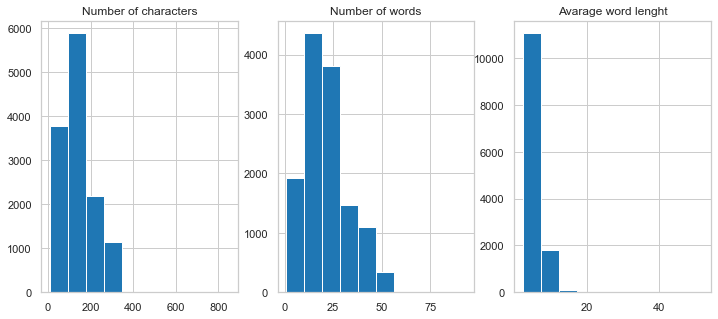

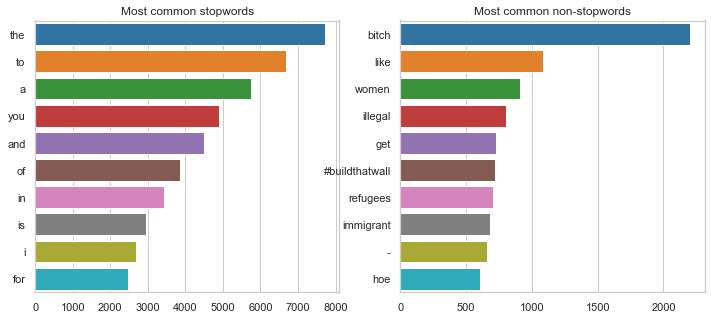

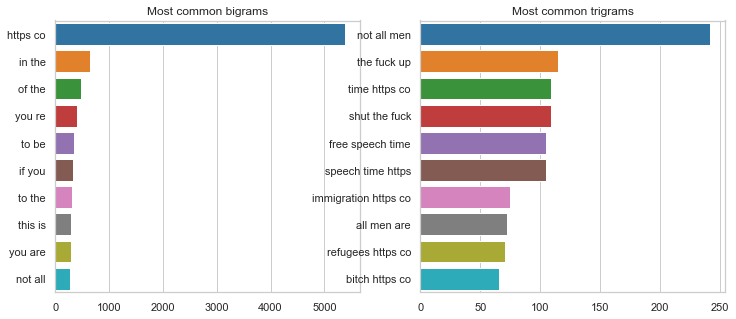

In [11]:
print("English:")
basic_statistics_plot_hateval(pd.concat([english_train, english_dev, english_test]), "english")

TRAIN:

Distribution of features:
HS: 42.03333333333333%
HS -> TR: 35.448057097541636%
HS -> AG: 41.210679355009255%
HS -> TR & AG: 12.344699973565953%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.6873333333333334, 20)
Number of tweets that contain a mention: 0.3913333333333333
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@realdonaldtrump    281  0.758007  0.122066  0.586854
@potus               93  0.860215  0.125000  0.562500
@isupport_israel     92  0.597826  0.127273  0.436364
@refugees            55  0.000000  0.000000  0.000000
@youtube             53  0.339623  0.111111  0.500000
@anncoulter          41  0.756098  0.741935  0.258065
@mailonline          36  0.527778  0.105263  0.368421
@                    35  0.485714  0.470588  0.411765
@tyrusmaina          35  0.000000  0.000000  0.000000
@housegop            32  0.906250  0.034483  0.655172

Hashtags:
Nu

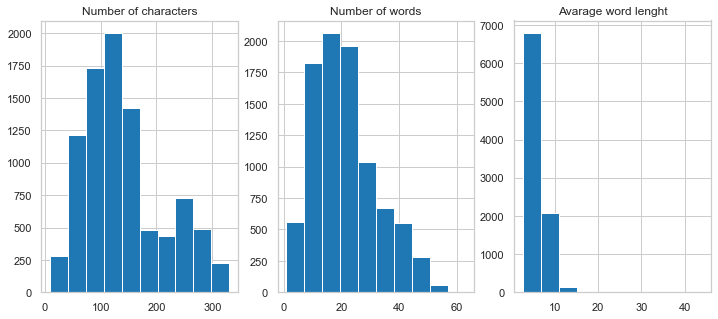

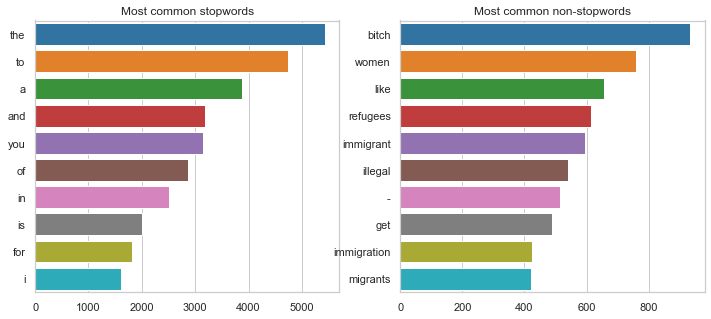

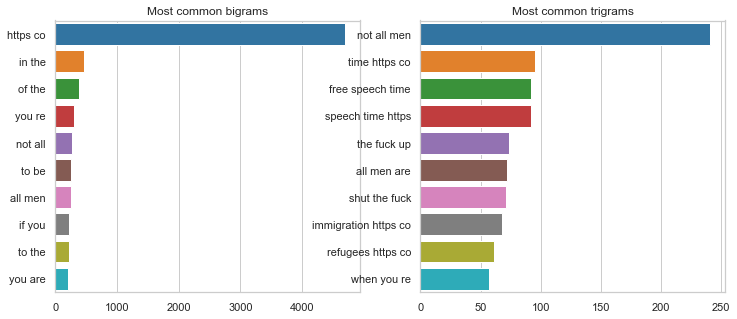



TRAIN with HS:

Distribution of features:
HS: 100.0%
HS -> TR: 35.448057097541636%
HS -> AG: 41.210679355009255%
HS -> TR & AG: 12.344699973565953%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.7869415807560137, 20)
Number of tweets that contain a mention: 0.4557229711868887
Most Common mentions:
                  Count   HS  HS -> TR  HS -> AG
Mention                                         
@realdonaldtrump    213  1.0  0.122066  0.586854
@potus               80  1.0  0.125000  0.562500
@isupport_israel     55  1.0  0.127273  0.436364
@anncoulter          31  1.0  0.741935  0.258065
@housegop            29  1.0  0.034483  0.655172
@senategop           23  1.0  0.043478  0.565217
@foxnews             21  1.0  0.333333  0.333333
@icegov              20  1.0  0.150000  0.650000
@mailonline          19  1.0  0.105263  0.368421
@youtube             18  1.0  0.111111  0.500000

Hashtags:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 1.13111287338

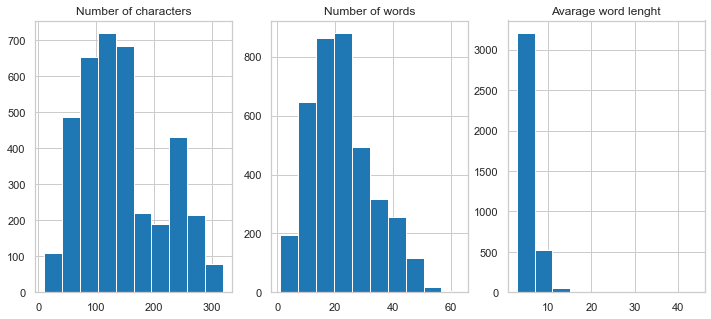

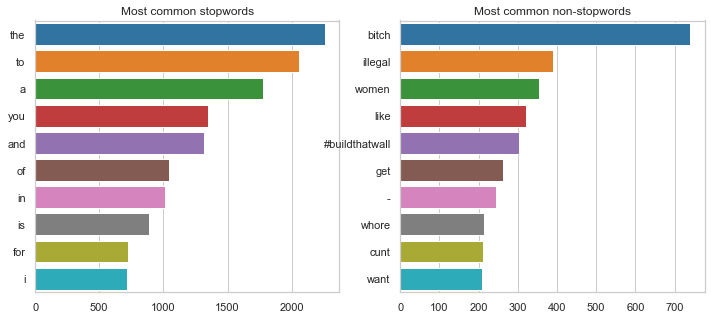

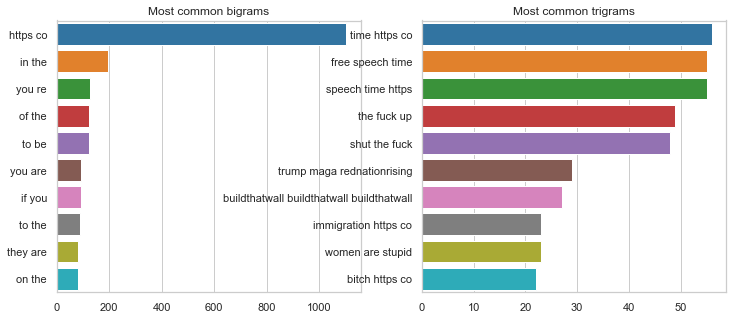



DEV:

Distribution of features:
HS: 42.7%
HS -> TR: 51.288056206088996%
HS -> AG: 47.7751756440281%
HS -> TR & AG: 25.526932084309134%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.922, 42)
Number of tweets that contain a mention: 0.504
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@anncoulter          47  0.680851  0.968750  0.218750
@realdonaldtrump     35  0.571429  0.150000  0.550000
@isupport_israel     13  0.461538  0.166667  0.500000
@potus               11  0.909091  0.000000  0.600000
@corybooker           9  0.555556  1.000000  0.000000
@senkamalaharris      9  1.000000  1.000000  0.111111
@youtube              9  0.111111  0.000000  0.000000
@donaldjtrumpjr       7  0.857143  0.833333  0.166667
@housegop             6  1.000000  0.000000  1.000000
@foxnews              5  0.800000  0.000000  0.250000

Hashtags:
Number of mentions per tweet (MIN, MEAN, MA

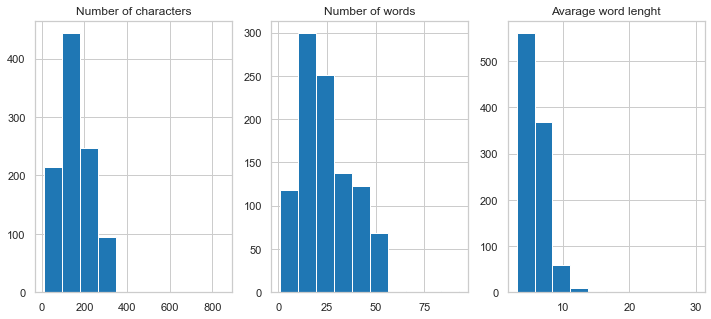

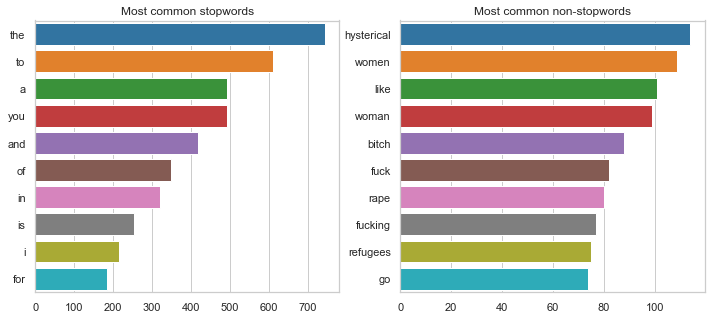

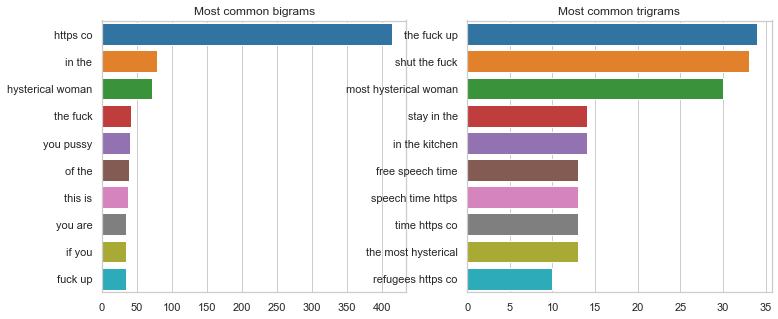



TEST:

Distribution of features:
HS: 42.0%
HS -> TR: 41.98412698412698%
HS -> AG: 47.142857142857146%
HS -> TR & AG: 14.523809523809524%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 1.0643333333333334, 40)
Number of tweets that contain a mention: 0.469
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@realdonaldtrump    233  0.304721  0.028169  0.690141
@potus               85  0.200000  0.000000  0.647059
@realjameswoods      41  0.073171  0.000000  0.333333
@foxnews             32  0.312500  0.000000  0.600000
@speakerryan         29  0.379310  0.090909  0.454545
@housegop            28  0.821429  0.043478  0.608696
@icegov              23  0.739130  0.000000  0.764706
@senategop           22  0.818182  0.000000  0.722222
@gop                 22  0.454545  0.000000  0.500000
@                    20  0.300000  0.333333  0.333333

Hashtags:
Number of mentions per tweet

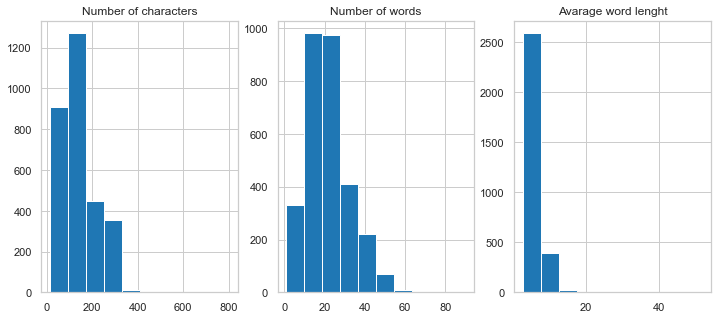

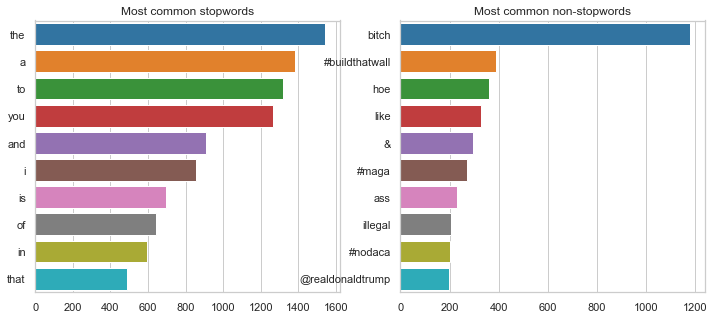

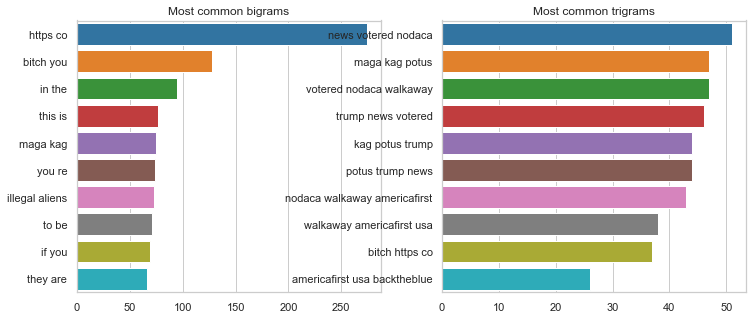

In [12]:
print("TRAIN:\n")
basic_statistics_plot_hateval(english_train, "english")
print("\n\nTRAIN with HS:\n")
basic_statistics_plot_hateval(english_train, "english", HS=True)
print("\n\nDEV:\n")
basic_statistics_plot_hateval(english_dev, "english")
print("\n\nTEST:\n")
basic_statistics_plot_hateval(english_test, "english")

#### Spanish

Spanish:
Distribution of features:
HS: 41.5%
HS -> TR: 61.66484118291347%
HS -> AG: 78.56882073749544%
HS -> TR & AG: 56.626506024096386%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.7271212121212122, 50)
Number of tweets that contain a mention: 0.4637878787878788
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@barbijaputa        104  0.038462  0.750000  0.750000
@sanchezcastejon     65  0.523077  0.088235  0.823529
@guardiacivil        39  0.358974  0.142857  0.500000
@elmundoes           28  0.428571  0.000000  0.583333
@youtube             25  0.120000  1.000000  1.000000
@anaisbernal         22  0.000000  0.000000  0.000000
@zurine3             19  0.000000  0.000000  0.000000
@interiorgob         17  0.470588  0.125000  0.500000
@policia             17  0.470588  0.250000  0.875000
@relatofeminista     17  0.176471  0.333333  0.333333

Hashtags:
Number of mentio

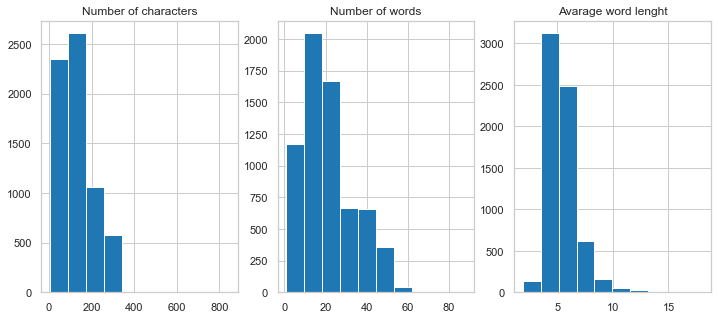

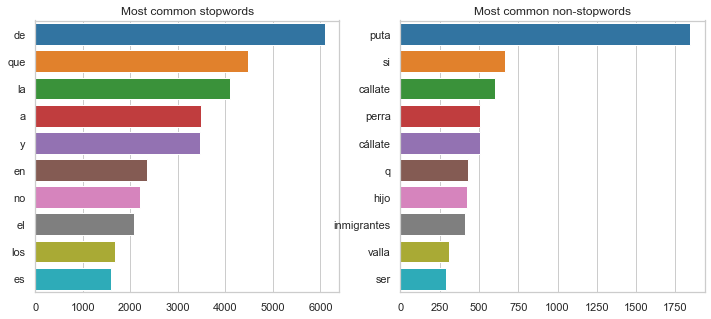

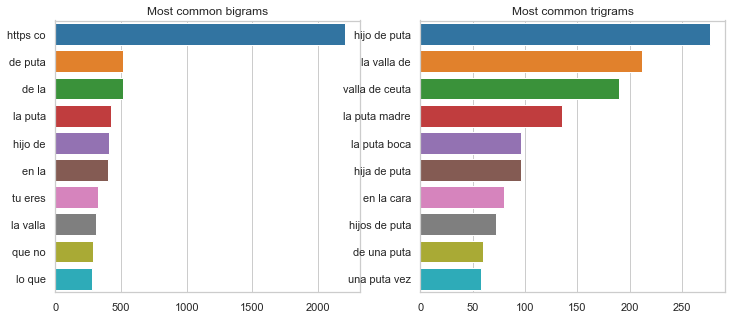

In [13]:
print("Spanish:")
basic_statistics_plot_hateval(pd.concat([spanish_train, spanish_dev, spanish_test]), "spanish")

TRAIN:

Distribution of features:
HS: 41.266666666666666%
HS -> TR: 60.796984383414106%
HS -> AG: 80.88314485729671%
HS -> TR & AG: 56.70436187399031%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.6551111111111111, 16)
Number of tweets that contain a mention: 0.4351111111111111
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@sanchezcastejon     24  0.708333  0.117647  0.941176
@youtube             23  0.043478  1.000000  1.000000
@barbijaputa         21  0.142857  0.666667  0.666667
@anaisbernal         15  0.000000  0.000000  0.000000
@zurine3             13  0.000000  0.000000  0.000000
@relatofeminista     12  0.166667  0.500000  0.500000
@leticiadolera       12  0.000000  0.000000  0.000000
@irantzuvarela       11  0.090909  0.000000  0.000000
@_eckoyg             11  0.000000  0.000000  0.000000
@                    10  0.400000  0.250000  1.000000

Hashtags:
Num

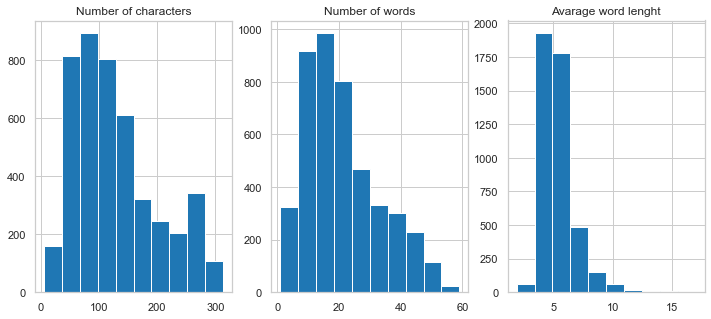

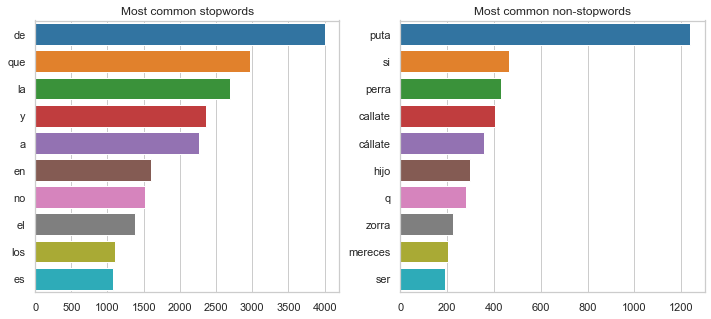

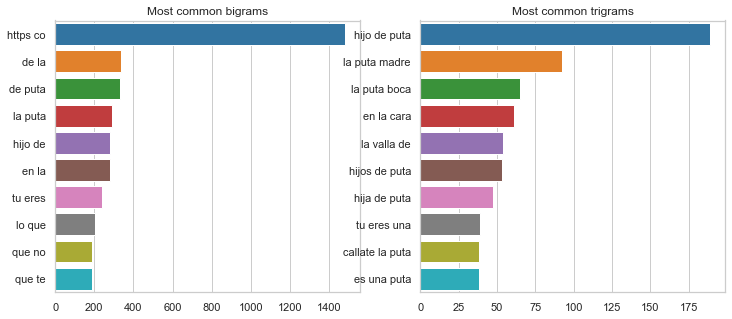



TRAIN with HS:

Distribution of features:
HS: 100.0%
HS -> TR: 60.796984383414106%
HS -> AG: 80.88314485729671%
HS -> TR & AG: 56.70436187399031%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.6806677436725902, 8)
Number of tweets that contain a mention: 0.464728056004308
Most Common mentions:
                  Count   HS  HS -> TR  HS -> AG
Mention                                         
@sanchezcastejon     17  1.0  0.117647  0.941176
@lortegadiaz          7  1.0  1.000000  1.000000
@nicolasmaduro        6  1.0  0.333333  0.833333
@lopezdoriga          6  1.0  1.000000  1.000000
@adacolau             5  1.0  0.200000  1.000000
@beeluarzola          5  1.0  1.000000  1.000000
@drodriguezven        5  1.0  0.800000  1.000000
@pablocasado_         4  1.0  0.000000  0.500000
@ahorapodemos         4  1.0  0.000000  0.500000
@salvameoficial       4  1.0  1.000000  1.000000

Hashtags:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.121163166397415

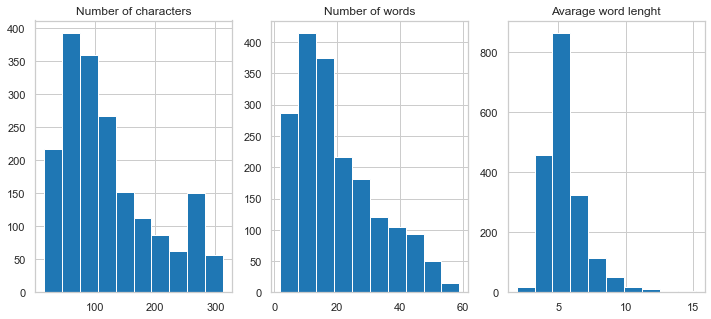

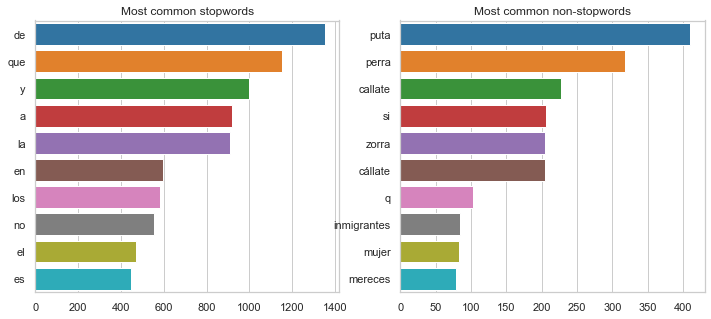

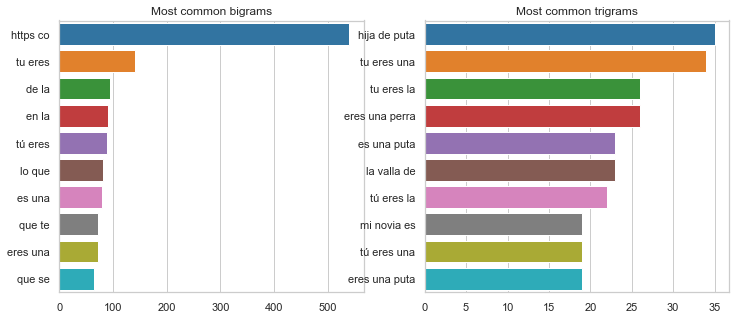



DEV:

Distribution of features:
HS: 44.4%
HS -> TR: 61.711711711711715%
HS -> AG: 79.27927927927928%
HS -> TR & AG: 57.207207207207205%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.654, 5)
Number of tweets that contain a mention: 0.444
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@zurine3              4  0.000000       0.0  0.000000
@relatofeminista      3  0.333333       0.0  0.000000
@guardiacivil         3  0.333333       0.0  1.000000
@elmundoes            3  1.000000       0.0  0.666667
@sanchezcastejon      3  0.333333       0.0  1.000000
@nicolasmaduro        3  0.000000       0.0  0.000000
@dalasreview          2  0.000000       0.0  0.000000
@lasextatv            2  0.500000       0.0  0.000000
@barbijaputa          2  0.000000       0.0  0.000000
@pablocasado_         2  0.500000       0.0  1.000000

Hashtags:
Number of mentions per tweet (MIN, MEAN, MA

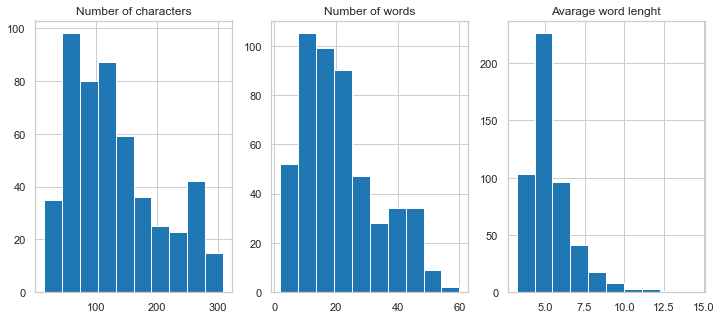

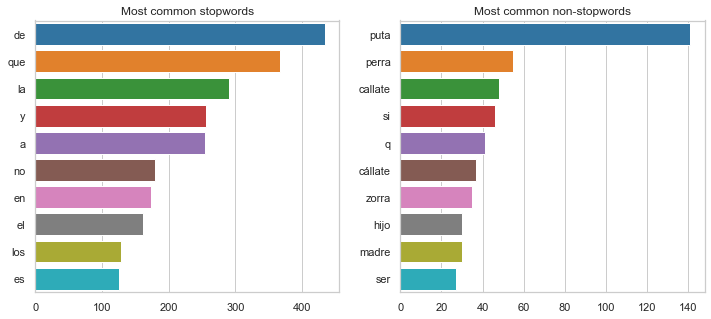

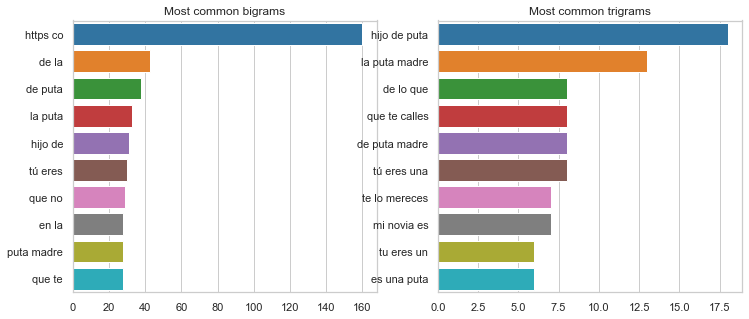



TEST:

Distribution of features:
HS: 41.25%
HS -> TR: 64.0909090909091%
HS -> AG: 71.81818181818181%
HS -> TR & AG: 56.21212121212121%
!HS & (TR | AG): 0.0%

Users:
Number of mentions per tweet (MIN, MEAN, MAX): (0, 0.9525, 50)
Number of tweets that contain a mention: 0.550625
Most Common mentions:
                  Count        HS  HS -> TR  HS -> AG
Mention                                              
@barbijaputa         81  0.012346  1.000000  1.000000
@sanchezcastejon     38  0.421053  0.062500  0.687500
@guardiacivil        31  0.290323  0.000000  0.222222
@elmundoes           18  0.333333  0.000000  0.500000
@interiorgob         13  0.461538  0.000000  0.333333
@psoe                11  0.454545  0.000000  0.800000
@abc_es              10  0.300000  0.000000  1.000000
@elisacarrio          9  1.000000  1.000000  1.000000
@vikidonda            7  0.857143  1.000000  1.000000
@vox_es               7  1.000000  0.285714  0.714286

Hashtags:
Number of mentions per tweet (MIN, MEAN

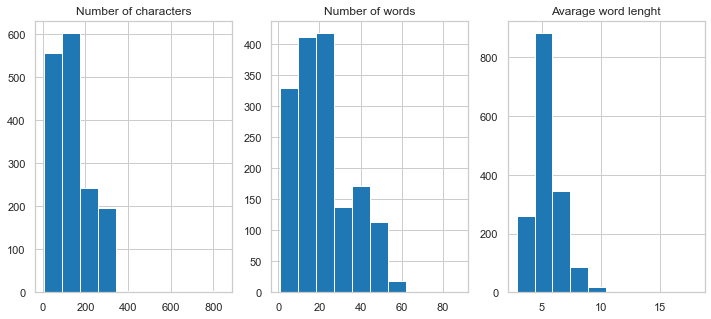

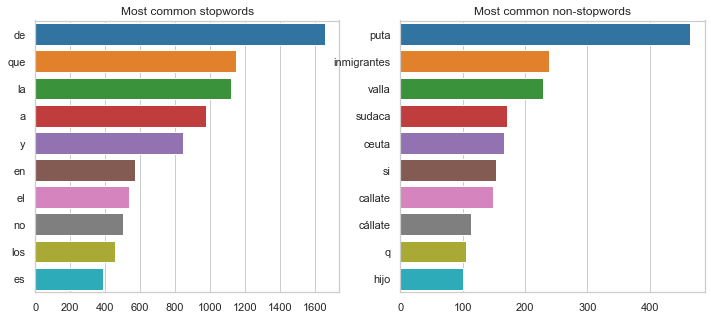

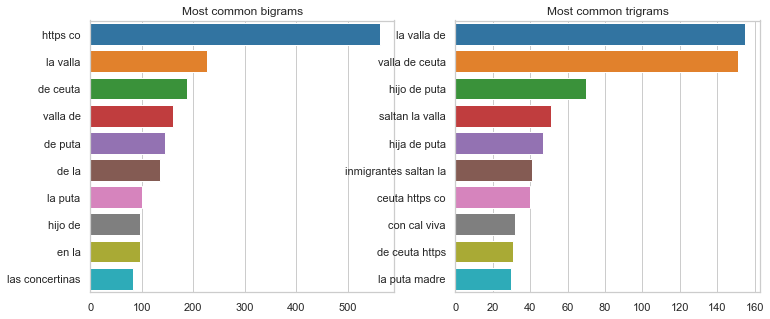

In [14]:
print("TRAIN:\n")
basic_statistics_plot_hateval(spanish_train, "spanish")
print("\n\nTRAIN with HS:\n")
basic_statistics_plot_hateval(spanish_train, "spanish", HS=True)
print("\n\nDEV:\n")
basic_statistics_plot_hateval(spanish_dev, "spanish")
print("\n\nTEST:\n")
basic_statistics_plot_hateval(spanish_test, "spanish")

### Detoxis

All dataset:
Distribution of features:
Toxicity: 31.832797427652732%
!Toxicity -> Toxicity Level (0): 100.03369272237197%
Toxicity -> Toxicity Level (1): 71.86147186147186%
Toxicity -> Toxicity Level (3): 5.6998556998557%
Toxicity -> Toxicity Level (2): 22.366522366522368%

Non-ascii:
Number of mentions per comment (MIN, MEAN, MAX): (0, 3.153881488286633, 53)
Number of comments that contain a mention: 0.7429949471750115
Most Common mentions:
         Count  toxicity    0         1          3          2
Mention                                                      
í         3880  0.324179  0.0  3.084713   9.254139   6.169426
á         2838  0.321649  0.0  3.108981   9.326944   6.217963
ó         2373  0.297060  0.0  3.366323  10.098969   6.732646
ñ         1603  0.338410  0.0  2.954995   8.864986   5.909991
é         1405  0.316911  0.0  3.155458   9.466373   6.310915
ú          665  0.331610  0.0  3.015590   9.046771   6.031180
¿          588  0.308562  0.0  3.240838   9.722513   6.481

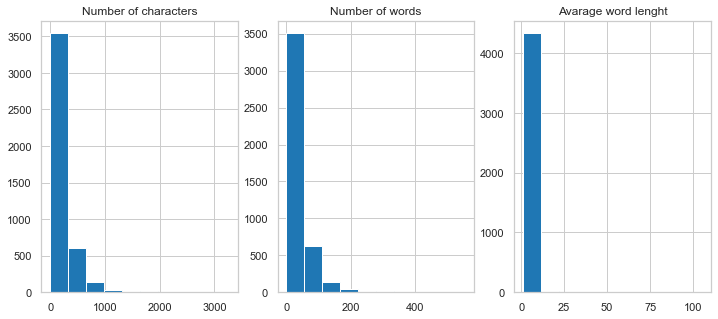

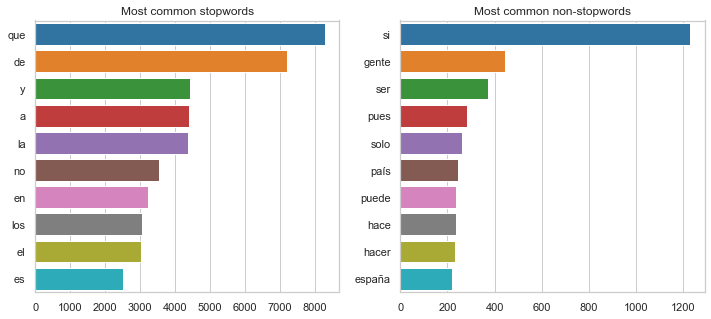

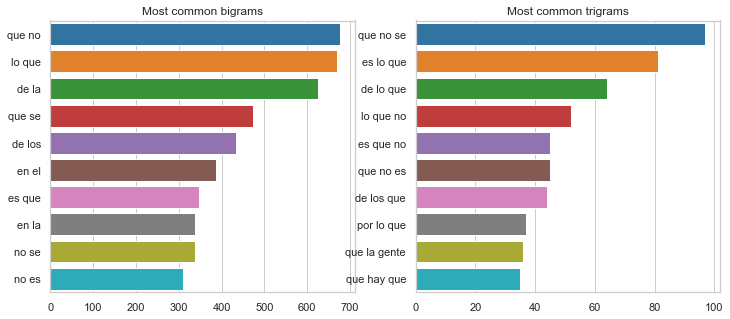

In [15]:
print("All dataset:")
basic_statistics_plot_detoxis(pd.concat([detoxis_train, detoxis_dev, detoxis_test]))

TRAIN:

Distribution of features:
Toxicity: 32.52707581227437%
!Toxicity -> Toxicity Level (0): 100.10700909577314%
Toxicity -> Toxicity Level (1): 70.9211986681465%
Toxicity -> Toxicity Level (3): 5.993340732519423%
Toxicity -> Toxicity Level (2): 22.86348501664817%

Non-ascii:
Number of mentions per comment (MIN, MEAN, MAX): (0, 3.183032490974729, 53)
Number of comments that contain a mention: 0.7451263537906138
Most Common mentions:
         Count  toxicity    0         1         3         2
Mention                                                    
í         2446  0.338103  0.0  2.957678  8.873035  5.915357
á         1876  0.352878  0.0  2.833837  8.501511  5.667674
ó         1551  0.310767  0.0  3.217842  9.653527  6.435685
ñ         1013  0.358342  0.0  2.790634  8.371901  5.581267
é          893  0.359462  0.0  2.781931  8.345794  5.563863
ú          444  0.346847  0.0  2.883117  8.649351  5.766234
¿          356  0.303371  0.0  3.296296  9.888889  6.592593
”           48  0.45

<ipython-input-10-077f87a48450>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment"] = data["comment"].apply(lambda x: x.lower())


Mean of Avarage word lenght: (1.0, 4.868255957483075, 105.0)


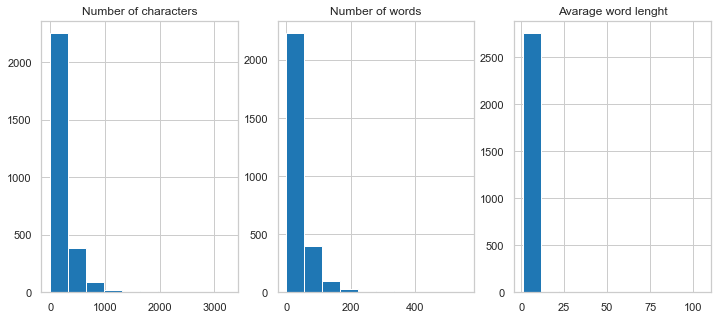

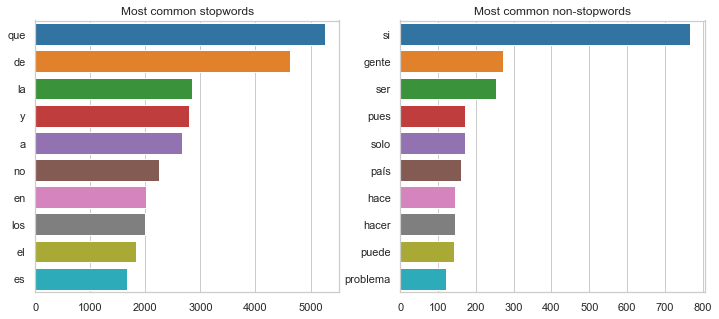

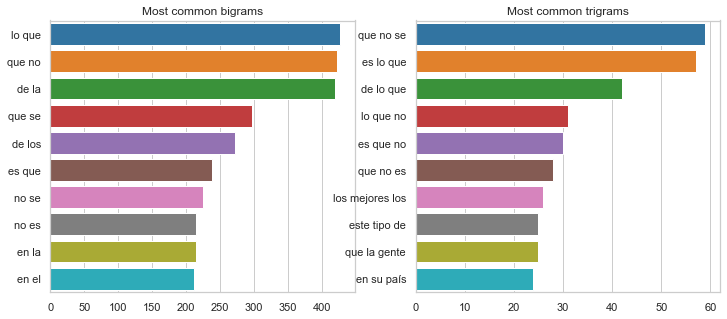



DEV:

Distribution of features:
Toxicity: 35.497835497835496%
!Toxicity -> Toxicity Level (0): 99.77628635346755%
Toxicity -> Toxicity Level (2): 25.609756097560975%
Toxicity -> Toxicity Level (1): 68.69918699186992%
Toxicity -> Toxicity Level (3): 6.097560975609756%

Non-ascii:
Number of mentions per comment (MIN, MEAN, MAX): (0, 3.1298701298701297, 52)
Number of comments that contain a mention: 0.7417027417027418
Most Common mentions:
         Count  toxicity    0          2         1         3
Mention                                                     
í          660  0.400000  0.0   5.000000  2.500000  7.500000
á          418  0.399522  0.0   5.005988  2.502994  7.508982
ó          360  0.366667  0.0   5.454545  2.727273  8.181818
ñ          225  0.444444  0.0   4.500000  2.250000  6.750000
é          218  0.376147  0.0   5.317073  2.658537  7.975610
¿          123  0.414634  0.0   4.823529  2.411765  7.235294
ú           99  0.383838  0.0   5.210526  2.605263  7.815789
”       

<ipython-input-10-077f87a48450>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment"] = data["comment"].apply(lambda x: x.lower())


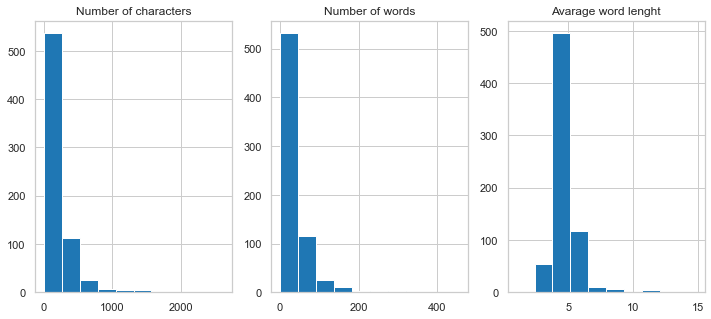

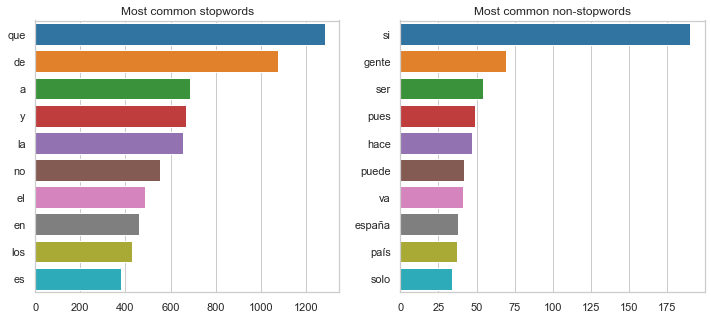

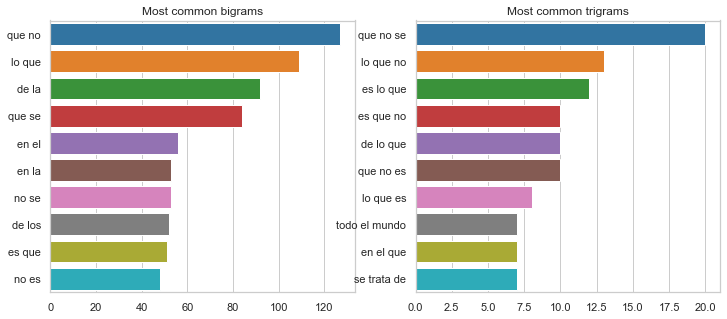



TEST:

Distribution of features:
Toxicity: 26.823793490460158%
!Toxicity -> Toxicity Level (0): 100.0%
Toxicity -> Toxicity Level (1): 78.66108786610879%
Toxicity -> Toxicity Level (2): 17.15481171548117%
Toxicity -> Toxicity Level (3): 4.184100418410042%

Non-ascii:
Number of mentions per comment (MIN, MEAN, MAX): (0, 3.0819304152637486, 47)
Number of comments that contain a mention: 0.7373737373737373
Most Common mentions:
         Count  toxicity    0         1         2          3
Mention                                                     
í          774  0.271318  0.0  3.685714  7.371429  11.057143
á          544  0.284926  0.0  3.509677  7.019355  10.529032
ó          462  0.264069  0.0  3.786885  7.573770  11.360656
ñ          365  0.378082  0.0  2.644928  5.289855   7.934783
é          294  0.278912  0.0  3.585366  7.170732  10.756098
ú          122  0.254098  0.0  3.935484  7.870968  11.806452
¿          109  0.293578  0.0  3.406250  6.812500  10.218750
¡           33  0.51

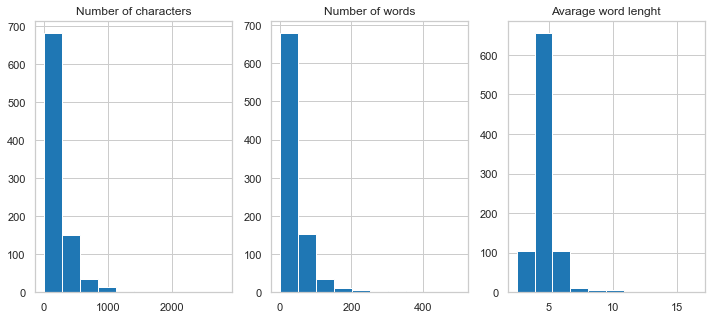

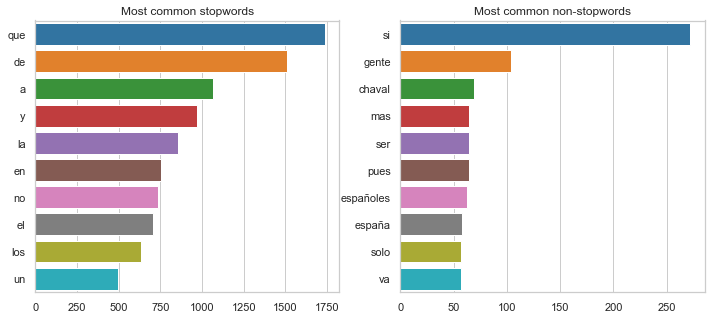

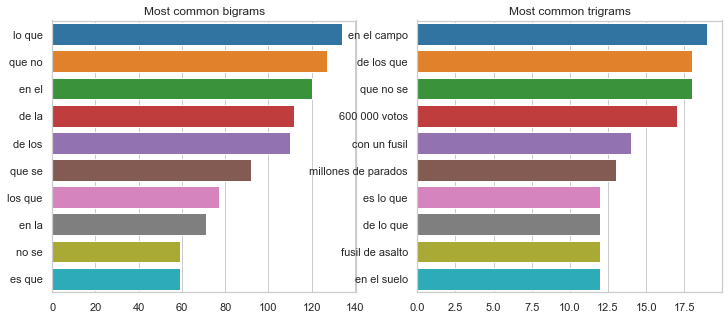

In [16]:
print("TRAIN:\n")
basic_statistics_plot_detoxis(detoxis_train)
print("\n\nDEV:\n")
basic_statistics_plot_detoxis(detoxis_dev)
print("\n\nTEST:\n")
basic_statistics_plot_detoxis(detoxis_test)

## 3. Term Frequency–Inverse Document Frequency
### Preprocessing

- Remove links
- Lowercase all characters
- Remove emojis (or replaced)
- Remove stopwords
- Correct spelling mistakes
- Remove numbers (or replace by word "number")
- Replace ”&” for "and"
- Normalize contractions
- Lemmatization
- Substitution of abbreviations
- Remove accents (Spanish)

The next cell contains two auxilar method to display a progress of any function but generic, similar to tqdm. It's mainly used for the training of tf-idf vectorizer that can take up to 2h in a i7-7700k.

In [17]:
from datetime import datetime, timedelta

def init_print_progress(n, k=10, measure_remaining_time=True, measure_avarage_time=True):
    """Inicializes the auxialiar `_print_progress()` establishing the behaviour of when
    and what should be printed.
    
    Parameters
    ----------
    n: int
        Number of iterations the auxiliar method will be called.
    k: int, default=10
        Number of iterations of when the printed data will be updated.
    measure_remaining_time: bool, default=True
        If the printed progress should display the remaining time.
    measure_avarage_time: bool, default=True
        If the remaining time should be calculated using an avarage.
        Recomended if the task load should be similar.
    """
    _print_progress._i = 1 # Number of iterations done
    _print_progress._k = k # Module of when the print will be called
    _print_progress._n = n # Total iterations to be complated
    
    _print_progress._measure_remaining_time = measure_remaining_time # If time should be tracked
    _print_progress._measure_avarage_time = measure_avarage_time # If an avarage should be used
    if measure_remaining_time:
        _print_progress._datetime = datetime.now() # Time of completion of last k iterations
        _print_progress._initialtime = _print_progress._datetime # Initial time of running
        _print_progress.avargetime = timedelta() # Avarage time of the k iterations
    
def _print_progress():
    """Auxiliar method that will track progress of a fucntion. Should be called each time
    an iterations is done. Before starting the tracking, the function `init_print_progress`
    should be called once.
    """
    _i, _k, _n = _print_progress._i, _print_progress._k, _print_progress._n
    if _i % _k == 0 or _i == _n: #Every k iterations prints or it's the last iteration
        _measure_remaining_time = _print_progress._measure_remaining_time
        if _measure_remaining_time:
            next_datetime = datetime.now()
            diff_time = next_datetime - _print_progress._datetime # Time elapsed between now and the previous k iteration
            if _print_progress._measure_remaining_time:
                _print_progress.avargetime = (_print_progress.avargetime * (_i//_k - 1) + diff_time) / (_i//_k) # Updates avarge time by adding the new elapsed time to the avarage
            else:
                _print_progress.avargetime = diff_time # Avarage time isn't tracked
            time_remaining = ((_print_progress.avargetime) / _k * (_n - _i)).total_seconds() #Calculates the time remaining
            _print_progress._datetime = next_datetime # Upadates the last time
            
            time_elapsed = (next_datetime - _print_progress._initialtime).total_seconds()  #Measures total time elapsed
            
        print(" "*100, end='\r') # Cleans the output
        print(f"{_i}/{_n} ({round(100*_i/_n, 2)}%)", end='') # Prints the current percentage of completion
        # Prints the calculated remaining time if specified in the inicialization. Also last iteration ends with '\n' leaving the percentage completion
        print(f" [time remaining: {int(time_remaining//3600)}:{int(time_remaining/60%60):02d}:{int(time_remaining%60):02d} | time elapsed: {int(time_elapsed//3600)}:{int(time_elapsed/60%60):02d}:{int(time_elapsed%60):02d}]" if _measure_remaining_time else "", end='\r' if _i < _n else '\n')
    _print_progress._i += 1 # Increments the number of iterations that had happened

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from spellchecker import SpellChecker
from pycontractions import Contractions
import json
import os.path
import pickle
import unicodedata

def load_dictonaries():
    """Loads the data inside the json files of all dictonaries.
    This way we avoid reconstructing the dictonary each instance.
    All dictionaries will be saved as atributes of the appropiate function.
    """
    with open('./data/simple_emojis.json') as f:
        replace_emojis.simple_emojis = json.load(f)
        
    with open('./data/complex_emojis.json') as f:
        replace_emojis.complex_emojis = json.load(f)
        
    with open('./data/abbreviations.json') as f:
        replace_abbreviations.abbreviations = json.load(f) 

def replace_emojis(text, language):
    """Replaces all emojis with the meaning in the dictionary.
    Extra spaces are added to both sides to avoid case where a word or another emoji aren't separated.
    """
    simple_emojis = replace_emojis.simple_emojis
    for emoji, meaning in simple_emojis.items():
        text = text.replace(emoji, f" {meaning[language]} ")
        
    complex_emojis = replace_emojis.complex_emojis
    for emoji, meaning in complex_emojis.items():
        text = text.replace(emoji, f" {meaning[language]} ")
        
    return text

def strip_accents(text):
    """Removes all accents of a string.
    """
    return ''.join(c for c in unicodedata.normalize('NFD', text)
                  if unicodedata.category(c) != 'Mn')

def replace_abbreviations(text, language):
    """Replaces all exact abbreviations with the meaning in the dictionary.
    Will try to replace exact match of the abbreviation if it's translated in the meaning dictonary.
    """
    abbreviations = replace_abbreviations.abbreviations 
    for abbreviation, meaning in abbreviations.items():
        if language in meaning:
            text = re.sub(r"\b" + abbreviation + r"\b", meaning[language], text)

    return text

def direct_replacement(data, language='en'):
    """Performs replacement or removal of diffent parts of text series. Currently does:
        - Lowercase
        - Standerization of contractions and other special characters
        - Link removal
        - Digits removal
        - Emoji replacement with it's meaning or removal in case it's not found on the dictionary
        - Removes accents
        `language` should be: 'en' and 'es'.
    """
    def _replacement(text):
        """Auxiliar method that performes the `direct_replacement()` of an input string.
        """
        # Lowercase and replace & and Standerize contractions and other special characters
        text = text.replace("’", "'").replace("‘", "'").replace("…", "...").replace("”", "\"\"").replace("“", "\"\"").lower()
        
        # Remove links
        text = re.sub(r"https?\S*", "", text)
        
        # Remove digits
        text = re.sub(r"\d+", "", text)
        
        # Replace emojis
        text = replace_emojis(text, language)
        
        # Remove emojis in case they where not replaced
        regrex_pattern = re.compile(pattern = "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags = re.UNICODE)
        text = regrex_pattern.sub(r'', text)
                          
        # Replace abbreviations
        text = replace_abbreviations(text, language)
        
        # Removes accents
        text = strip_accents(text)
        
        return text

    # First loads the dictionaries
    load_dictonaries()
    return data.apply(lambda text: _replacement(text))

def expand_contractions(data):
    """
    Expand contractions of all the dataset through the context using a deep learning model.
    Currently it's using the model of word2vec, should be downloaded with wget.
    """
    # Download link: https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 
    #TODO: If enough time, check if downloaded or wget
    cont = Contractions('./models/GoogleNews-vectors-negative300.bin')
    cont.load_models()
    
    data_expanded = list(cont.expand_texts(data, precise=False))
    return pd.Series(data_expanded, index=data.index, dtype=data.dtype, name=data.name)
    

def tokenization_text(text, language='en'):
    """
    Transforms the text into a serie of tokens that will contain only words, hashtags or users.
    Also corrects the text using Levenshtein Distance of 2. Then, lemmatises the tokens and removes the stopwords.
    `language` should be: 'en' and 'es'.
    """
    # Tokenise words without digits while ignoring punctuation, except Users and Hashtags
    tokeniser = RegexpTokenizer(r'[#@]?[^\d\W]+')
    tokens = tokeniser.tokenize(text)
    
    # Corrector with Levenshtein Distance of 2
    spell = SpellChecker(language=language, distance=2)
    tokens = [spell.correction(token) for token in tokens]
    
    # Lemmatization 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token, pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english' if language == 'en' else 'spanish')]
    
    _print_progress() # Auxiliar method to track the progress

    return keywords

# Tf-Idf vectorizers
english_vectorizer = TfidfVectorizer(analyzer=tokenization_text, max_features=3500, max_df=0.65)
spanish_vectorizer = TfidfVectorizer(analyzer=lambda text: tokenization_text(text, language='es'), max_features=3500, max_df=0.65)
detoxis_vectorizer = TfidfVectorizer(analyzer=lambda text: tokenization_text(text, language='es'), max_features=3500, max_df=0.65)

# Pipelines to generate the Tf-Idf matrix of the dataset
english_pipe = Pipeline([
    ('direct_replacement', FunctionTransformer(func=direct_replacement, validate=False)),
    ('expand_contractions', FunctionTransformer(func=expand_contractions, validate=False)),
    ('tfidfVectorizer', english_vectorizer)
])
spanish_pipe = Pipeline([
    ('direct_replacement', FunctionTransformer(func=direct_replacement, validate=False, kw_args={'language':'es'})),
    ('tfidfVectorizer', spanish_vectorizer)
])
detoxis_pipe = Pipeline([
    ('direct_replacement', FunctionTransformer(func=direct_replacement, validate=False, kw_args={'language':'es'})),
    ('tfidfVectorizer', detoxis_vectorizer)
])

### Save and load preprocessing
All data it's optimized to be stored in disk to avoid fitting the model multiple times.

In [19]:
from scipy import sparse

if not 'is_TfIDF_fitted' in globals(): #Avoids redefinition
    is_TfIDF_fitted = {} #langauge(str): if it's fitted(bool)

def load_Tfidf_processing(pipe, train_data, data, path, name, language):
    """Auxiliar method to manage fitting a tf-idf `pipe`, saving the matrix and loading in case it already exists.
    It's optimized to avoid the need of retraining the entire pipe in case it's already trained.
    Also avoid errors where the train dataset is loaded but the other subdatasets aren't (by fitting the `pipe`).
    Furthermore allows to avoid the need to retrain the entire pipeline each time.
    
    To force a fitting a file at the `path` shouldn't exist.
    """
    global is_TfIDF_fitted
    
    #Checks if matrix it's already saved
    if os.path.isfile(path):
        X_basic = sparse.load_npz(path)
        print(f"Preprocessing {name} data loaded succesfully")
    else:
        # Initializes the progress bar for training
        init_print_progress(train_data.shape[0])
        # Checks if pipe is not fitted and it's the training dataset
        if data.equals(train_data) and not is_TfIDF_fitted.get(language, False):
            X_basic = pipe.fit_transform(train_data)
            is_TfIDF_fitted[language] = True
        else:
            # Checks if pipe it's not fitted and fits it
            if not is_TfIDF_fitted.get(language, False):
                print("Pipe will be fitted first.")
                pipe.fit(train_data)
                is_TfIDF_fitted[language] = True
            
            # Initializes the progress bar
            init_print_progress(data.shape[0])
            X_basic = pipe.transform(data)

        # saves matrix on specified path
        sparse.save_npz(path, X_basic)
        
    return X_basic

#### Hateval 2019
##### English

In [20]:
train_path, dev_path, test_path = "./data/X_train_basic_english.npz", "./data/X_dev_basic_english.npz", "./data/X_test_basic_english.npz"

X_basic_train_english = load_Tfidf_processing(english_pipe, english_train['text'], english_train['text'], train_path, "train", "English")
X_basic_dev_english = load_Tfidf_processing(english_pipe, english_train['text'], english_dev['text'], dev_path, "dev", "English")
X_basic_test_english = load_Tfidf_processing(english_pipe, english_train['text'], english_test['text'], test_path, "test", "English")

Preprocessing train data loaded succesfully
Preprocessing dev data loaded succesfully
Preprocessing test data loaded succesfully


In [21]:
#Most common words of tf-idf vectorizer

if "English" in is_TfIDF_fitted:
    sorted_words = dict(sorted(english_vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True))
    with open("./data/english_vocabulary_sorted.pkl", "wb") as f:
        pickle.dump(sorted_words, f)
with open("./data/english_vocabulary_sorted.pkl", "rb") as f:   
    sorted_words = pickle.load(f)

sorted_words

{'ðy_xf_': 3499,
 'zone': 3498,
 'zero': 3497,
 'zealot': 3496,
 'yrs': 3495,
 'yr': 3494,
 'youtube': 3493,
 'youth': 3492,
 'younger': 3491,
 'young': 3490,
 'york': 3489,
 'yo': 3488,
 'yet': 3487,
 'yesterday': 3486,
 'yes': 3485,
 'yep': 3484,
 'yemen': 3483,
 'yell': 3482,
 'years': 3481,
 'year': 3480,
 'yeah': 3479,
 'yea': 3478,
 'ya': 3477,
 'xenophobic': 3476,
 'wrong': 3475,
 'write': 3474,
 'wrap': 3473,
 'wow': 3472,
 'would': 3471,
 'worthless': 3470,
 'worth': 3469,
 'worst': 3468,
 'worship': 3467,
 'worse': 3466,
 'worry': 3465,
 'worldcup': 3464,
 'world': 3463,
 'workplace': 3462,
 'workers': 3461,
 'worker': 3460,
 'work': 3459,
 'word': 3458,
 'wonderful': 3457,
 'wonder': 3456,
 'womens': 3455,
 'women': 3454,
 'woman': 3453,
 'wolf': 3452,
 'wive': 3451,
 'without': 3450,
 'within': 3449,
 'withhold': 3448,
 'witch': 3447,
 'wit': 3446,
 'wish': 3445,
 'wise': 3444,
 'wipe': 3443,
 'wink': 3442,
 'wing': 3441,
 'wine': 3440,
 'windrush': 3439,
 'win': 3438,
 'wi

In [22]:
#Columns of the tf-idf matrix

if "English" in is_TfIDF_fitted:
    with open("./data/english_vocabulary_.pkl", "wb") as f:
        pickle.dump(english_vectorizer.get_feature_names(), f)
with open("./data/english_vocabulary_.pkl", "rb") as f:   
    english_vectorizer_features = pickle.load(f)

english_vectorizer_features

['#abolishice',
 '#americafirst',
 '#americansfirst',
 '#asylumseekers',
 '#backtheblue',
 '#bansanctuarycities',
 '#blacktwitter',
 '#bluewave',
 '#borderpatrol',
 '#boycottnfl',
 '#boycottnike',
 '#buildthatwall',
 '#buildthedamnwall',
 '#buildthewall',
 '#buildthewallnow',
 '#burundi',
 '#cdnpoli',
 '#climatechange',
 '#closetheborders',
 '#deathpenalty',
 '#declassifyfisa',
 '#deportallofthem',
 '#deportationsequalpublicsafety',
 '#deportillegals',
 '#deportthemall',
 '#donaldtrump',
 '#drainthedeepstate',
 '#draintheswamp',
 '#endchainmigration',
 '#enddaca',
 '#endillegalbirthrightcitizenship',
 '#endsanctuarycities',
 '#endvisalottery',
 '#enforceuslaws',
 '#familiesbelongtogether',
 '#familiesbelongtogethermarch',
 '#favoritepresident',
 '#feminismiscancer',
 '#foxnews',
 '#fridaymotivation',
 '#greatawakening',
 '#greencardsfordaca',
 '#heretostay',
 '#hostileenvironment',
 '#humanrights',
 '#humantrafficking',
 '#ilgov',
 '#illegalalien',
 '#illegalaliens',
 '#illegalimmigran

##### Spanish

In [23]:
train_path, dev_path, test_path = "./data/X_train_basic_spanish.npz", "./data/X_dev_basic_spanish.npz", "./data/X_test_basic_spanish.npz"

X_basic_train_spanish = load_Tfidf_processing(spanish_pipe, spanish_train['text'], spanish_train['text'], train_path, "train", "Spanish")
X_basic_dev_spanish = load_Tfidf_processing(spanish_pipe, spanish_train['text'], spanish_dev['text'], dev_path, "dev", "Spanish")
X_basic_test_spanish = load_Tfidf_processing(spanish_pipe, spanish_train['text'], spanish_test['text'], test_path, "test", "Spanish")

Preprocessing train data loaded succesfully
Preprocessing dev data loaded succesfully
Preprocessing test data loaded succesfully


In [24]:
#Most common words of tf-idf vectorizer

if "Spanish" in is_TfIDF_fitted:
    sorted_words = dict(sorted(spanish_vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True))
    with open("./data/spanish_vocabulary_sorted.pkl", "wb") as f:
        pickle.dump(sorted_words, f)
with open("./data/spanish_vocabulary_sorted.pkl", "rb") as f:   
    sorted_words = pickle.load(f)

sorted_words

{'zorra': 3499,
 'zona': 3498,
 'zapatero': 3497,
 'youtube': 3496,
 'your': 3495,
 'you': 3494,
 'yemen': 3493,
 'yegua': 3492,
 'yaaaa': 3491,
 'xenófobo': 3490,
 'xenofobia': 3489,
 'xd': 3488,
 'x': 3487,
 'wow': 3486,
 'with': 3485,
 'whatsapp': 3484,
 'wey': 3483,
 'weon': 3482,
 'we': 3481,
 'war': 3480,
 'want': 3479,
 'vuelvo': 3478,
 'vuelven': 3477,
 'vuelve': 3476,
 'vuelvan': 3475,
 'vuelva': 3474,
 'vuelto': 3473,
 'vuelta': 3472,
 'vs': 3471,
 'voz': 3470,
 'voy': 3469,
 'vox': 3468,
 'voto': 3467,
 'votar': 3466,
 'votantes': 3465,
 'votando': 3464,
 'vos': 3463,
 'vomito': 3462,
 'vomitando': 3461,
 'volvio': 3460,
 'volver': 3459,
 'volar': 3458,
 'voces': 3457,
 'vivo': 3456,
 'vivir': 3455,
 'vivimos': 3454,
 'viviendo': 3453,
 'vives': 3452,
 'viven': 3451,
 'vive': 3450,
 'viva': 3449,
 'visto': 3448,
 'viste': 3447,
 'vista': 3446,
 'visitan': 3445,
 'visita': 3444,
 'visa': 3443,
 'virgen': 3442,
 'violentos': 3441,
 'violentamente': 3440,
 'violenta': 3439,
 'v

In [25]:
if "Spanish" in is_TfIDF_fitted:
    with open("./data/spanish_vocabulary_.pkl", "wb") as f:
        pickle.dump(spanish_vectorizer.get_feature_names(), f)
with open("./data/spanish_vocabulary_.pkl", "rb") as f:   
    spanish_vectorizer_features = pickle.load(f)

spanish_vectorizer_features

['#defiendeespana',
 '#eleccionesgeneralesya',
 '#eleccionesya',
 '#finalgh',
 '#hacemuchoque',
 '#lomasleido',
 '#moromierdas',
 '#otdirectod',
 '#sanchezdimision',
 '#stopinvasion',
 '#todasputas',
 '@_brix__',
 '@_eckoyg',
 '@abc_es',
 '@adacolau',
 '@ahorapodemos',
 '@albert_rivera',
 '@albiol_xg',
 '@anaisbernal',
 '@antonioadan',
 '@as_tomasroncero',
 '@ash_london',
 '@aurelionuno',
 '@auronplay',
 '@barbijaputa',
 '@beeluarzola',
 '@bts_twt',
 '@dalasreview',
 '@dcabellor',
 '@deluxesabado',
 '@drodriguezven',
 '@el_pais',
 '@elchiringuitotv',
 '@eldiarioes',
 '@elisacarrio',
 '@elmundoes',
 '@elperiodico',
 '@ertenembaum',
 '@faunafeminazi',
 '@flor_vigna',
 '@gabrielrufian',
 '@guardiacivil',
 '@hectorbecerrilr',
 '@interiorgob',
 '@irantzuvarela',
 '@jlozanoa',
 '@joseameadek',
 '@juandedios_p',
 '@juliamengo',
 '@kimberlyloaiza_',
 '@la_patilla',
 '@leticiadolera',
 '@lopezdoriga',
 '@lopezobrador_',
 '@lortegadiaz',
 '@marianorajoy',
 '@mashirafael',
 '@nestorreverol',
 '@n

Method to add extra features to the tf-idf matrix. Found early on that it didn't bring any performance increase by checking the weight of this features on ridge and random forest. This test can be obseved as a markdown cell in the section ###Chack relevance of the extra data in the predicition.

In [26]:
from sklearn.preprocessing import StandardScaler

def extra_data(data):
    """Generates extra data from the text to create new features. 
    Currently it just counts the number of uppercase letters and the number of uppercase words.
    """
    uppercase_leters = data.apply(lambda text: sum(1 for c in text if c.isupper()))
    uppercase_words = data.apply(lambda text: sum(1 for word in text.split() if word.isupper()))
    
    return np.c_[(uppercase_leters, uppercase_words)]

extra_pipe = Pipeline([
    ('extra_data', FunctionTransformer(func=extra_data, validate=False)),
    ('sparse',  FunctionTransformer(func=lambda data: sparse.csr_matrix(data), validate=False))
])

# Calculates the extra data for both train and dev datasets
X_extra_train_english = extra_pipe.fit_transform(english_train['text'])
X_extra_dev_english = extra_pipe.transform(english_dev['text'])
X_extra_test_english = extra_pipe.transform(english_test['text'])

X_extra_train_spanish = extra_pipe.fit_transform(spanish_train['text'])
X_extra_dev_spanish = extra_pipe.transform(spanish_dev['text'])
X_extra_test_spanish = extra_pipe.transform(spanish_test['text'])

In [27]:
# Joins the Tf-Idf matrix and the extra data
X_train_english = X_basic_train_english #sparse.hstack((X_basic_train_english, X_extra_train_english))
X_dev_english = X_basic_dev_english #sparse.hstack((X_basic_dev_english, X_extra_dev_english))
X_test_english = X_basic_test_english #sparse.hstack((X_basic_test_english, X_extra_test_english))

X_train_spanish = X_basic_train_spanish #sparse.hstack((X_basic_train_spanish, X_extra_train_spanish))
X_dev_spanish = X_basic_dev_spanish #sparse.hstack((X_basic_dev_spanish, X_extra_dev_spanish))
X_test_spanish = X_basic_test_spanish #sparse.hstack((X_basic_test_spanish, X_extra_test_spanish))

#### Detoxis

In [28]:
train_path, dev_path, test_path = "./data/X_train_basic_detoxis.npz", "./data/X_dev_basic_detoxis.npz", "./data/X_test_basic_detoxis.npz"

X_basic_train_detoxis = load_Tfidf_processing(detoxis_pipe, detoxis_train['comment'], detoxis_train['comment'], train_path, "train", "Detoxis")
X_basic_dev_detoxis = load_Tfidf_processing(detoxis_pipe, detoxis_train['comment'], detoxis_dev['comment'], dev_path, "dev", "Detoxis")
X_basic_test_detoxis = load_Tfidf_processing(detoxis_pipe, detoxis_train['comment'], detoxis_test['comment'], test_path, "test", "Detoxis")

Preprocessing train data loaded succesfully
Preprocessing dev data loaded succesfully
Preprocessing test data loaded succesfully


In [29]:
#Most common words of tf-idf vectorizer

if "Detoxis" in is_TfIDF_fitted:
    sorted_words = dict(sorted(detoxis_vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True))
    with open("./data/detoxis_vocabulary_sorted.pkl", "wb") as f:
        pickle.dump(sorted_words, f)
with open("./data/detoxis_vocabulary_sorted.pkl", "rb") as f:   
    sorted_words = pickle.load(f)

sorted_words

{'zumos': 3499,
 'zumo': 3498,
 'zona': 3497,
 'zeus': 3496,
 'zaraza': 3495,
 'zapatillas': 3494,
 'youtube': 3493,
 'youth': 3492,
 'yihadistas': 3491,
 'yihadista': 3490,
 'yendo': 3489,
 'xxi': 3488,
 'xx': 3487,
 'xenófobo': 3486,
 'xenofobia': 3485,
 'x': 3484,
 'wow': 3483,
 'wikipedia': 3482,
 'wiki': 3481,
 'wifi': 3480,
 'wfoxoebbhd': 3479,
 'welcome': 3478,
 'web': 3477,
 'wc': 3476,
 'watch': 3475,
 'vulnerables': 3474,
 'vuelvo': 3473,
 'vuelven': 3472,
 'vuelve': 3471,
 'vuelvan': 3470,
 'vuelva': 3469,
 'vueltas': 3468,
 'vuelta': 3467,
 'voy': 3466,
 'vox': 3465,
 'votos': 3464,
 'voto': 3463,
 'vote': 3462,
 'votar': 3461,
 'votantes': 3460,
 'votante': 3459,
 'votando': 3458,
 'votan': 3457,
 'votado': 3456,
 'vota': 3455,
 'vos': 3454,
 'vomitas': 3453,
 'vomita': 3452,
 'volver': 3451,
 'voluntariamente': 3450,
 'voluntad': 3449,
 'voces': 3448,
 'vivo': 3447,
 'vivir': 3446,
 'vivimos': 3445,
 'viviendo': 3444,
 'viviendas': 3443,
 'vivienda': 3442,
 'vivido': 3441

In [30]:
if "Detoxis" in is_TfIDF_fitted:
    with open("./data/detoxis_vocabulary_.pkl", "wb") as f:
        pickle.dump(detoxis_vectorizer.get_feature_names(), f)
with open("./data/detoxis_vocabulary_.pkl", "rb") as f:   
    detoxis_vectorizer_features = pickle.load(f)

detoxis_vectorizer_features

['_',
 'abajo',
 'abandona',
 'abarca',
 'abc',
 'abertzale',
 'abierta',
 'abiertos',
 'abogado',
 'aborigen',
 'aborto',
 'abrir',
 'absoluta',
 'absolutamente',
 'absoluto',
 'absurdo',
 'abuela',
 'abuelo',
 'abuelos',
 'abusan',
 'abusar',
 'abuso',
 'abusos',
 'aca',
 'acaba',
 'acababa',
 'acaban',
 'acabar',
 'acabaran',
 'acabas',
 'acabe',
 'acaben',
 'acabo',
 'acaso',
 'acceso',
 'accidentes',
 'acciones',
 'acción',
 'aceptan',
 'aceptar',
 'acerca',
 'acogemos',
 'acogen',
 'acoger',
 'acogida',
 'acojan',
 'acompañados',
 'actitud',
 'actitudes',
 'activa',
 'activamente',
 'actividad',
 'activo',
 'acto',
 'actos',
 'actua',
 'actual',
 'actualidad',
 'actuan',
 'actuando',
 'actuar',
 'actue',
 'acuerden',
 'acuerdo',
 'acuerdos',
 'acusación',
 'acusado',
 'acusados',
 'acusar',
 'adaptarse',
 'adelante',
 'ademas',
 'administración',
 'administrativa',
 'adoctrinamiento',
 'adolescente',
 'adultos',
 'africa',
 'africanos',
 'afrontar',
 'agencia',
 'agentes',
 'agra

In [31]:
# Joins the Tf-Idf matrix and the extra data

X_train_detoxis = X_basic_train_detoxis #sparse.hstack((X_basic_train_spanish, X_extra_train_spanish))
X_dev_detoxis = X_basic_dev_detoxis #sparse.hstack((X_basic_dev_spanish, X_extra_dev_spanish))
X_test_detoxis = X_basic_test_detoxis #sparse.hstack((X_basic_test_spanish, X_extra_test_spanish))

## 4. Save results

Method to save results, to facilitate comparishons between results through the usage of an external notebook (Results).
First all ground truth of the dataset is saved.

In [32]:
import pandas as pd
from enum import Enum

metadata_file = "./results/metadata.pkl"
dataset_types =  Enum("dataset_types", "train development test")

def save_results(y_pred, index, name, task, language, dataset_type, group=None, description=None, truth=False, filename=None):
    """Auxiliar method to save predictions and extra data through pickle. All extra information will be stored though a metadata file.
    Some atributes will be used to generate the path where the prediction is stored.
    
    The metadata file will store:
    - Path: where the prediction is stored.
    - Name: name of the model.
    - Description: extra information of the prediction. For example, 'the model parameters'.
    - Dataset type: enum value of the types of datasets.
    - Groud Truth: if the path contains the truth and not a prediction.
    - Group: model group (used in path). Example, 'best_traditional'.
    - Task: name of the task (used in path). Example, 'hateval2019/task1'.
    - Language: language of the task (used in path).
    
    - `filename`: name of the file (used in path).
    """
    
    path = f"./results/{task}/{language}/{dataset_type.name}{'/' + group if group is not None else ''}/{name if filename is None else filename}.pkl"
    
    directory = "/".join(path.split("/")[:-1])
    # Checks if directory exists or it creates it
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Checks if metadata file exists or it builds it empty
    if os.path.exists(metadata_file):
        metadata = pd.read_pickle(metadata_file)
    else:
        metadata = pd.DataFrame({
            "Path": pd.Series([], dtype=str),
            "Name": pd.Series([], dtype=str),
            "Description": pd.Series([], dtype=str),
            "Dataset type": pd.Categorical([], categories=dataset_types, ordered=False),
            "Groud Truth": pd.Series([], dtype=bool),
            "Group": pd.Series([], dtype=str),
            "Task": pd.Series([], dtype=str),
            "Language": pd.Series([], dtype=str),
        }).set_index("Path")
    
    # Checks if result already on metadata and removes it
    if path in metadata.index:
        metadata = remove_results(path)

    # Adds prediction to metadata
    metadata.loc[path] = {"Name": name, "Description": description, "Dataset type": dataset_type, "Groud Truth": truth, "Group": group, "Task": task, "Language": language}
    results = pd.DataFrame({"id": index, "y_pred": y_pred}).set_index("id") 
    
    # Stores results
    results.to_pickle(path)
    metadata.to_pickle(metadata_file)
    
    print("Results saved on: " + path)
    
def remove_results(path=None):
    """
    Removes prediction from specified path from the disk and the metadata.
    In case `path is None` removes from the disk all files in './results' that aren't in the metadata.
    """
    # Checks if metadata exists else does nothing
    if os.path.exists(metadata_file):
        metadata = pd.read_pickle(metadata_file)
        # If path removes file from metadata and disk
        if path is not None:
            if os.path.exists(path):
                metadata = metadata.drop(path)
                os.remove(path)
                metadata.to_pickle(metadata_file)
        else:
            # Removes files from disk if  aren't in metadata
            used_files = [os.path.normpath(f) for f in metadata.index]
            all_files = [os.path.normpath(os.path.join(dp, f)) for dp, dn, filenames in os.walk('./results') for f in filenames][1:]
            for f in all_files:
                if f not in set(used_files):
                    os.remove(f)
        return metadata

In [33]:
save_results(english_train["HS"], english_train.index, "English Train", "hateval2019/task1", "english", dataset_types.train, truth=True, filename="train_truth_task1")
save_results(english_dev["HS"], english_dev.index, "English Development", "hateval2019/task1", "english", dataset_types.development, truth=True, filename="dev_truth_task1")
save_results(english_test["HS"], english_test.index, "English Test", "hateval2019/task1", "english", dataset_types.test, truth=True, filename="test_truth_task1")

save_results(spanish_train["HS"], spanish_train.index, "Spanish Train", "hateval2019/task1", "spanish", dataset_types.train, truth=True, filename="train_truth_task1")
save_results(spanish_dev["HS"], spanish_dev.index, "Spanish Development", "hateval2019/task1", "spanish", dataset_types.development, truth=True, filename="dev_truth_task1")
save_results(spanish_test["HS"], spanish_test.index, "Spanish Test", "hateval2019/task1", "spanish", dataset_types.test, truth=True, filename="test_truth_task1")

Results saved on: ./results/hateval2019/task1/english/train/train_truth_task1.pkl
Results saved on: ./results/hateval2019/task1/english/development/dev_truth_task1.pkl
Results saved on: ./results/hateval2019/task1/english/test/test_truth_task1.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/train_truth_task1.pkl
Results saved on: ./results/hateval2019/task1/spanish/development/dev_truth_task1.pkl
Results saved on: ./results/hateval2019/task1/spanish/test/test_truth_task1.pkl


In [34]:
save_results(detoxis_train["toxicity"], range(len(detoxis_train.index)), "Detoxis Train", "detoxis/task1", "spanish", dataset_types.train, truth=True, filename="train_truth_task1")
save_results(detoxis_dev["toxicity"], range(len(detoxis_dev.index)), "Detoxis Development", "detoxis/task1", "spanish", dataset_types.development, truth=True, filename="dev_truth_task1")

# Checks if dataset contains the objective
if "toxicity" in detoxis_test:
    save_results(detoxis_test["toxicity"], range(len(detoxis_test.index)), "Detoxis Test", "detoxis/task1", "spanish", dataset_types.test, truth=True, filename="test_truth_task1")

Results saved on: ./results/detoxis/task1/spanish/train/train_truth_task1.pkl
Results saved on: ./results/detoxis/task1/spanish/development/dev_truth_task1.pkl
Results saved on: ./results/detoxis/task1/spanish/test/test_truth_task1.pkl


## 5. Classification models

In [35]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from itertools import zip_longest

def score(y_true, y_pred, f1_average):
    """Auxiliar method that scores a prediction if `y_true is not None`, else returns `None`.
    
    Returns: 
        accuracy, f1_score with `average=f1_average` and a classification report.
    """
    classification_report_results = acc = f1 = None
    if y_true is not None:
        classification_report_results = classification_report(y_true, y_pred)

        acc, f1 = accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average=f1_average, zero_division=0) 
        
    return acc, f1, classification_report_results

def print_score(y_true, y_pred, name, f1_average):
    """Prints all scores and classification report returning a dictionary with just the scores.
    Facilitating the construction of pandas DataFrame.
    """
    acc, f1, classification_report_results = score(y_true, y_pred, f1_average)

    print(name)
    print(f"F1 {f1_average}: {f1}")
    print('Accuracy: ', acc)

    print('\nClassification Report')
    print('======================================================')
    print('\n', classification_report_results)
    
    return {f"F1 {f1_average}": f1, "Accuracy": acc}

def fit_models(X, y, models):
    """Fits all `models` with the same `X` and `y`.
    `models` should be a dictonary with the model as a key and the name as a value.
    """
    for model, name in models.items():
        model.fit(X, y)
        print(f"Model {name} fitted")

def join_two_models(models, best_models):
    """Joins two `models` dictionaries by intercalating it's results.
    """
    return {x: y for two_models in zip_longest(models.items(), best_models.items(), fillvalue=(None, None)) for x, y in two_models if x is not None}


def print_scores(X, y_true, models, f1_average='macro'):
    """Prints the accuarcy and the classification report of the list of models.
    """
    results, y_preds = [], []
    for model, name in models.items():
        y_pred = model.predict(X)
        y_preds.append(y_pred)
        results.append(print_score(y_true, y_pred, name, f1_average))
    return pd.DataFrame(results, index=models.values()), pd.DataFrame(y_preds, index=models.values())

In [36]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

multinomial = MultinomialNB()
bernoulli = BernoulliNB()
ridge = RidgeClassifier(random_state=seed_val)
random_forest = RandomForestClassifier(random_state=seed_val)
dummy = DummyClassifier(strategy="prior")
mlp = MLPClassifier(early_stopping=True, random_state=seed_val) 
svc = SVC(random_state=seed_val)
adaboost = AdaBoostClassifier(random_state=seed_val)

models = {
    dummy: "Dummy Classifier",
    multinomial: "Multinomial Naive Bayes classifier",
    bernoulli: "Bernoulli Naive Bayes classifier",
    ridge: "Ridge Classifier",
    random_forest: "Random Forest classifier",
    svc: "Support Vector Classification",
    adaboost: "AdaBoost classifier",
    mlp: "Multi-layer Perceptron classifier"
}

### Hateval 2019
#### English

In [37]:
fit_models(X_train_english, english_train['HS'], models)

print("TRAIN:")
train_scores_english, train_preds_english = print_scores(X_train_english, english_train["HS"], models)

print("\n\nDEV:")
dev_scores_english, dev_preds_english = print_scores(X_dev_english, english_dev["HS"], models)

Model Dummy Classifier fitted
Model Multinomial Naive Bayes classifier fitted
Model Bernoulli Naive Bayes classifier fitted
Model Ridge Classifier fitted
Model Random Forest classifier fitted
Model Support Vector Classification fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier fitted
TRAIN:
Dummy Classifier
F1 macro: 0.3669550538088204
Accuracy:  0.5796666666666667

Classification Report

               precision    recall  f1-score   support

           0       0.58      1.00      0.73      5217
           1       0.00      0.00      0.00      3783

    accuracy                           0.58      9000
   macro avg       0.29      0.50      0.37      9000
weighted avg       0.34      0.58      0.43      9000

Multinomial Naive Bayes classifier
F1 macro: 0.8128440083283514
Accuracy:  0.8206666666666667

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.88      0.85      5217
           1       0.8

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier
F1 macro: 0.9989737648560049
Accuracy:  0.999

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5217
           1       1.00      1.00      1.00      3783

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Support Vector Classification
F1 macro: 0.9555173113702441
Accuracy:  0.9567777777777777

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.97      0.96      5217
           1       0.96      0.94      0.95      3783

    accuracy                           0.96      9000
   macro avg       0.96      0.95      0.96      9000
weighted avg       0.96      0.96      0.96      9000

AdaBoost classifier
F1 macro: 0.7640156422637805
Accuracy:  0.7787777777777778

Classification Report

               precision    recal

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Classification
F1 macro: 0.7319101712034116
Accuracy:  0.742

Classification Report

               precision    recall  f1-score   support

           0       0.75      0.82      0.78       573
           1       0.72      0.64      0.68       427

    accuracy                           0.74      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.74      0.74      1000

AdaBoost classifier
F1 macro: 0.7217901539006285
Accuracy:  0.736

Classification Report

               precision    recall  f1-score   support

           0       0.74      0.84      0.78       573
           1       0.73      0.60      0.66       427

    accuracy                           0.74      1000
   macro avg       0.74      0.72      0.72      1000
weighted avg       0.74      0.74      0.73      1000

Multi-layer Perceptron classifier
F1 macro: 0.7100596644494139
Accuracy:  0.725

Classification Report

               precision    recall  f1-score   sup

In [38]:
print("TRAIN:\n", train_scores_english)
print("\n\nDEV:\n", dev_scores_english)

TRAIN:
                                     F1 macro  Accuracy
Dummy Classifier                    0.366955  0.579667
Multinomial Naive Bayes classifier  0.812844  0.820667
Bernoulli Naive Bayes classifier    0.819290  0.824444
Ridge Classifier                    0.876358  0.880667
Random Forest classifier            0.998974  0.999000
Support Vector Classification       0.955517  0.956778
AdaBoost classifier                 0.764016  0.778778
Multi-layer Perceptron classifier   0.786787  0.799889


DEV:
                                     F1 macro  Accuracy
Dummy Classifier                    0.364272     0.573
Multinomial Naive Bayes classifier  0.734869     0.742
Bernoulli Naive Bayes classifier    0.736454     0.740
Ridge Classifier                    0.710966     0.718
Random Forest classifier            0.747201     0.754
Support Vector Classification       0.731910     0.742
AdaBoost classifier                 0.721790     0.736
Multi-layer Perceptron classifier   0.710060     

#### Spanish

In [40]:
fit_models(X_train_spanish, spanish_train['HS'], models)

print("TRAIN:")
train_scores_spanish, train_preds_spanish = print_scores(X_train_spanish, spanish_train["HS"], models)

print("\n\nDEV:")
dev_scores_spanish, dev_preds_spanish = print_scores(X_dev_spanish, spanish_dev["HS"], models)

Model Dummy Classifier fitted
Model Multinomial Naive Bayes classifier fitted
Model Bernoulli Naive Bayes classifier fitted
Model Ridge Classifier fitted
Model Random Forest classifier fitted
Model Support Vector Classification fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier fitted
TRAIN:
Dummy Classifier
F1 macro: 0.37001259974800504
Accuracy:  0.5873333333333334

Classification Report

               precision    recall  f1-score   support

           0       0.59      1.00      0.74      2643
           1       0.00      0.00      0.00      1857

    accuracy                           0.59      4500
   macro avg       0.29      0.50      0.37      4500
weighted avg       0.34      0.59      0.43      4500

Multinomial Naive Bayes classifier
F1 macro: 0.8612343924272405
Accuracy:  0.87

Classification Report

               precision    recall  f1-score   support

           0       0.84      0.95      0.90      2643
           1       0.92      0.75  

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.9977777777777778

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2643
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

Support Vector Classification
F1 macro: 0.9756835918383328
Accuracy:  0.9764444444444444

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2643
           1       0.97      0.97      0.97      1857

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500

AdaBoost classifier
F1 macro: 0.7732658386776186
Accuracy:  0.7871111111111111

Classification Report

               precision    recall  f1-score   support

           0      

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi-layer Perceptron classifier
F1 macro: 0.7486420540235663
Accuracy:  0.754

Classification Report

               precision    recall  f1-score   support

           0       0.76      0.81      0.79       278
           1       0.74      0.68      0.71       222

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



In [41]:
print("TRAIN:\n", train_scores_spanish)
print("\n\nDEV:\n", dev_scores_spanish)

TRAIN:
                                     F1 macro  Accuracy
Dummy Classifier                    0.370013  0.587333
Multinomial Naive Bayes classifier  0.861234  0.870000
Bernoulli Naive Bayes classifier    0.875823  0.880222
Ridge Classifier                    0.941793  0.943778
Random Forest classifier            0.997709  0.997778
Support Vector Classification       0.975684  0.976444
AdaBoost classifier                 0.773266  0.787111
Multi-layer Perceptron classifier   0.900000  0.904000


DEV:
                                     F1 macro  Accuracy
Dummy Classifier                    0.357326     0.556
Multinomial Naive Bayes classifier  0.732047     0.748
Bernoulli Naive Bayes classifier    0.764136     0.768
Ridge Classifier                    0.740153     0.746
Random Forest classifier            0.777514     0.782
Support Vector Classification       0.751590     0.760
AdaBoost classifier                 0.751590     0.760
Multi-layer Perceptron classifier   0.748642     

### Detoxis

In [42]:
fit_models(X_train_detoxis, detoxis_train['toxicity'], models)

print("TRAIN:")
train_scores_detoxis, train_preds_detoxis = print_scores(X_train_detoxis, detoxis_train['toxicity'], models, f1_average='binary')

print("\n\nDEV:")
dev_scores_detoxis, dev_preds_detoxis = print_scores(X_dev_detoxis, detoxis_dev['toxicity'], models, f1_average='binary')

Model Dummy Classifier fitted
Model Multinomial Naive Bayes classifier fitted
Model Bernoulli Naive Bayes classifier fitted
Model Ridge Classifier fitted
Model Random Forest classifier fitted
Model Support Vector Classification fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier fitted
TRAIN:
Dummy Classifier
F1 binary: 0.0
Accuracy:  0.6747292418772564

Classification Report

               precision    recall  f1-score   support

           0       0.67      1.00      0.81      1869
           1       0.00      0.00      0.00       901

    accuracy                           0.67      2770
   macro avg       0.34      0.50      0.40      2770
weighted avg       0.46      0.67      0.54      2770

Multinomial Naive Bayes classifier
F1 binary: 0.27011494252873564
Accuracy:  0.7249097472924187

Classification Report

               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1869
           1       0.99      0.16 

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier
F1 binary: 0.9779785431959345
Accuracy:  0.9859205776173285

Classification Report

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1869
           1       1.00      0.96      0.98       901

    accuracy                           0.99      2770
   macro avg       0.99      0.98      0.98      2770
weighted avg       0.99      0.99      0.99      2770

Support Vector Classification
F1 binary: 0.8661219358893777
Accuracy:  0.9231046931407942

Classification Report

               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1869
           1       1.00      0.76      0.87       901

    accuracy                           0.92      2770
   macro avg       0.95      0.88      0.91      2770
weighted avg       0.93      0.92      0.92      2770

AdaBoost classifier
F1 binary: 0.3043478260869565
Accuracy:  0.7111913357400722

Classification Report

               pr

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dummy Classifier
F1 binary: 0.0
Accuracy:  0.645021645021645

Classification Report

               precision    recall  f1-score   support

           0       0.65      1.00      0.78       447
           1       0.00      0.00      0.00       246

    accuracy                           0.65       693
   macro avg       0.32      0.50      0.39       693
weighted avg       0.42      0.65      0.51       693

Multinomial Naive Bayes classifier
F1 binary: 0.0316205533596838
Accuracy:  0.6464646464646465

Classification Report

               precision    recall  f1-score   support

           0       0.65      0.99      0.78       447
           1       0.57      0.02      0.03       246

    accuracy                           0.65       693
   macro avg       0.61      0.50      0.41       693
weighted avg       0.62      0.65      0.52       693

Bernoulli Naive Bayes classifier
F1 binary: 0.21604938271604937
Accuracy:  0.6334776334776335

Classification Report

               precisi

In [43]:
print("TRAIN:\n", train_scores_detoxis)
print("\n\nDEV:\n", dev_scores_detoxis)

TRAIN:
                                     F1 binary  Accuracy
Dummy Classifier                     0.000000  0.674729
Multinomial Naive Bayes classifier   0.270115  0.724910
Bernoulli Naive Bayes classifier     0.663455  0.823466
Ridge Classifier                     0.824952  0.900722
Random Forest classifier             0.977979  0.985921
Support Vector Classification        0.866122  0.923105
AdaBoost classifier                  0.304348  0.711191
Multi-layer Perceptron classifier    0.037037  0.680866


DEV:
                                     F1 binary  Accuracy
Dummy Classifier                     0.000000  0.645022
Multinomial Naive Bayes classifier   0.031621  0.646465
Bernoulli Naive Bayes classifier     0.216049  0.633478
Ridge Classifier                     0.260388  0.614719
Random Forest classifier             0.153846  0.619048
Support Vector Classification        0.023810  0.645022
AdaBoost classifier                  0.169811  0.619048
Multi-layer Perceptron classifie

### Chack relevance of the extra data in the predicition

```python
print(ridge.coef_.max(), ridge.coef_.min())
print(ridge.coef_[0, -2:])

print(random_forest.feature_importances_.max(), random_forest.feature_importances_.min())
print(random_forest.feature_importances_[-2:])
```

## 6. Searching the best hyperparameters

This section can be ignored and just observe the results. 
Execution can take more than 24h with a i7-7700k. 
Auxiliar methods can be executed if you want to execute the grid search on SBERT section. 
Brief mention that the results of Multi-layer Perception classifier are stored on disk and can be loaded again. 

In [68]:
from sklearn.model_selection import GridSearchCV

def plot_gridsearch(results, feature, model_name):
    """Plots a bidimensional graph with y-axis mean score and x-axis feature for a gridsearchCV.
    Where there are two horizontal lines (test and train) that represent the mean score overe the feature.
    There also a region in the test line that represent the standard desviation.
    Furthemore a cross will map the maximum of the test line.
    Also prints the score and feature value
    """
    plt.figure(figsize=(13, 13))
    plt.title(model_name, fontsize=16)

    plt.xlabel(feature)
    plt.ylabel("Score")

    ax = plt.gca()

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results['param_' + feature].data, dtype=float)

    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = (results[f'mean_{sample}_score'])
        sample_score_std = (results[f'std_{sample}_score'])
        ax.fill_between(X_axis, sample_score_mean - sample_score_std, sample_score_mean + sample_score_std, alpha=0.1 if sample == 'test' else 0)
        ax.plot(X_axis, sample_score_mean, style, alpha=1 if sample == 'test' else 0.7, label=f"({sample})")

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score =  (results['mean_test_score'][best_index])

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [best_score, best_score], linestyle='-.',  marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate(f"{best_score:0.2}", (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    
    print(f"Best {feature}: {X_axis[best_index]} ({best_score})")
    plt.show()

def grid_search(model, X, y, param_grid, name, cv=10, k=10, scoring='f1_macro'):
    """Auxiliar method to perform the grid search and print the results.
    If `param_grid` contains just one parameter and it doesn't contain any string plots the results through `plot_gridsearch()`.
    
    Returns:
        - Sorted DataFrame of the k best results with parameters as index
        - Model with the parameteres that got the best score
    """
    gridsearch = GridSearchCV(model, param_grid=param_grid, scoring=scoring, return_train_score=True, n_jobs=-2, cv=cv, verbose=10)
    
    gridsearch.fit(X, y)
    
    df_gridsearch = pd.DataFrame(gridsearch.cv_results_)[['params','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']].sort_values('mean_test_score', ascending=False).iloc[:k]

    parameters = df_gridsearch["params"].apply(pd.Series)
    df_gridsearch = pd.concat([parameters, df_gridsearch.drop("params", axis=1)], axis=1)
    df_gridsearch = df_gridsearch.set_index(df_gridsearch.columns[:-4].to_list())
    if len(param_grid) == 1 and not any(type(i) == str for i in list(param_grid.values())[0]):
        plot_gridsearch(gridsearch.cv_results_, list(param_grid.keys())[0], name)
        
    return df_gridsearch, gridsearch.best_estimator_

### Multinomial Naive Bayes classifier
#### Hateval 2019
##### English

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.7513148009015775 (0.7014868415758487)


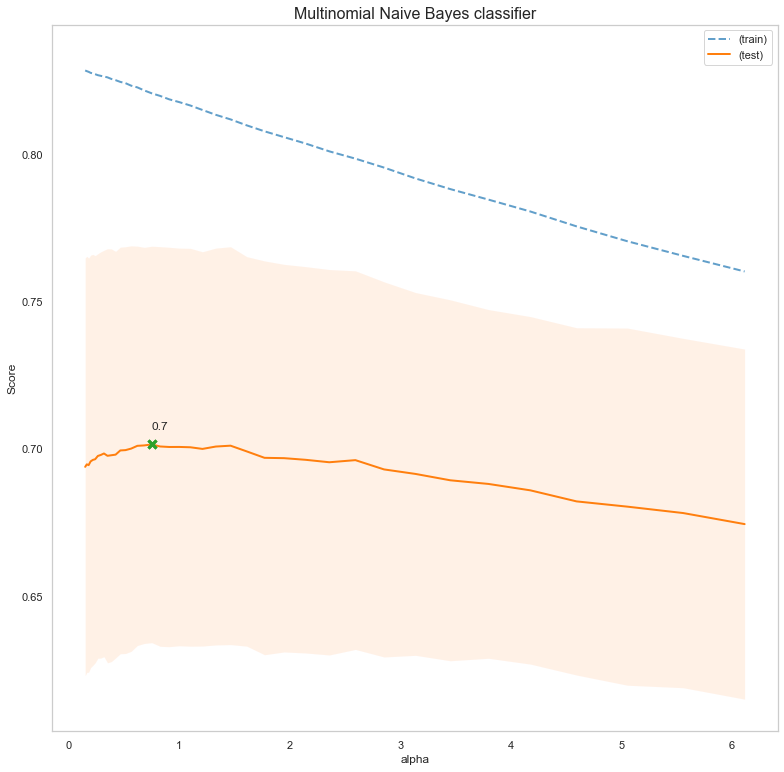

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.751315         0.701487        0.067272          0.820631         0.004834
0.683013         0.701153        0.067217          0.821615         0.004536
1.464100         0.701065        0.067516          0.811786         0.006086
0.620921         0.701015        0.067765          0.822652         0.004513
0.826446         0.700794        0.067817          0.819762         0.005038
1.331000         0.700772        0.067344          0.813337         0.006256
1.000000         0.700636        0.067474          0.817651         0.005536
0.909091         0.700623        0.067775          0.818594         0.005147
1.100000         0.700527        0.067512          0.816504         0.005808
0.564474         0.700070        0.068808          0.823235         0.004516

In [44]:
param_grid = {'alpha': [1.1 ** (i) for i in range(-20,20)]}

grid_search(multinomial, X_train_english, english_train['HS'], param_grid, models[multinomial])[0]

##### Spanish

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.5131581182307065 (0.7453663162205253)


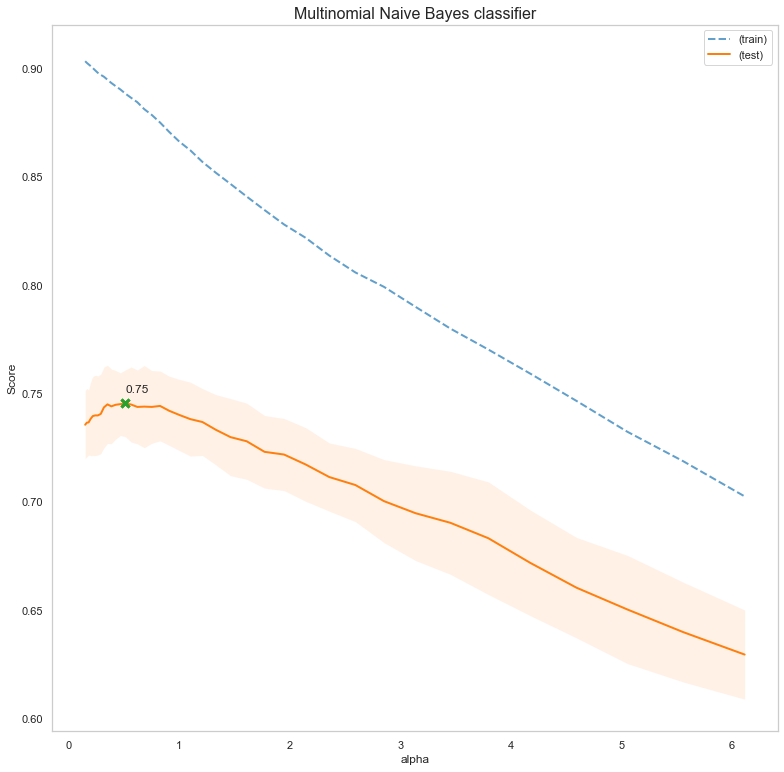

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.513158         0.745366        0.015456          0.888207         0.002230
0.466507         0.745014        0.014468          0.890183         0.001998
0.350494         0.744914        0.018049          0.894649         0.002172
0.564474         0.744835        0.017298          0.886303         0.001901
0.424098         0.744724        0.015847          0.891705         0.001896
0.826446         0.744187        0.016119          0.874899         0.002004
0.385543         0.743997        0.017213          0.893134         0.001888
0.683013         0.743871        0.018979          0.881082         0.002503
0.751315         0.743737        0.016788          0.878404         0.001972
0.620921         0.743730        0.017043          0.884259         0.002147

In [45]:
param_grid = {'alpha': [1.1 ** (i) for i in range(-20,20)]}

grid_search(multinomial, X_train_spanish, spanish_train['HS'], param_grid, models[multinomial])[0]

#### Detoxis

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.018014398509481985 (0.2121097497103812)


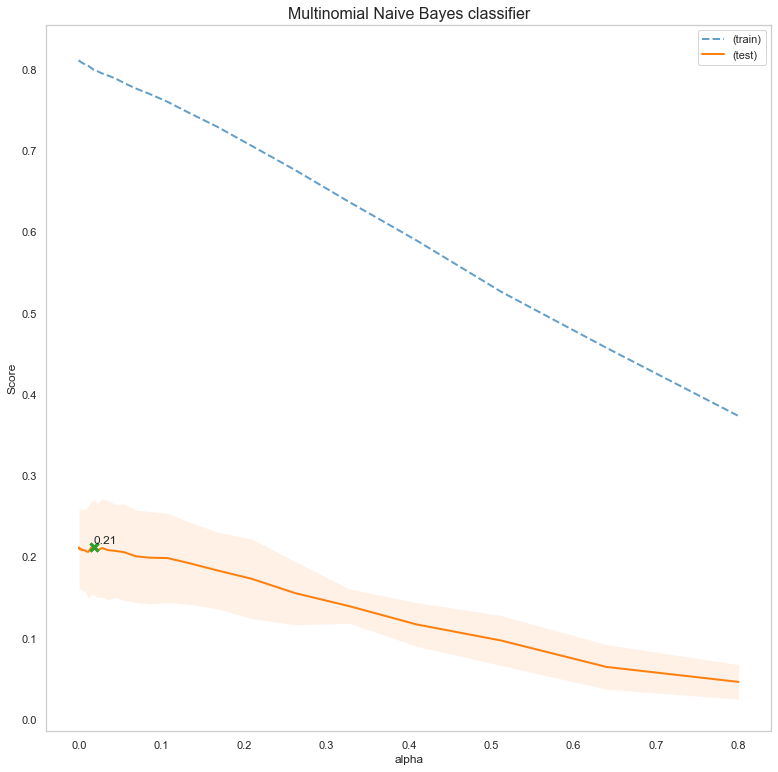

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.018014         0.212110        0.058353          0.798799         0.006937
0.000133         0.211446        0.052346          0.810524         0.004427
0.000166         0.211446        0.052346          0.810440         0.004338
0.000208         0.211446        0.052346          0.810440         0.004338
0.028147         0.210837        0.060518          0.794448         0.006814
0.014412         0.210828        0.057545          0.801521         0.006679
0.000634         0.210493        0.050130          0.809905         0.004793
0.000792         0.210493        0.050130          0.809589         0.004688
0.000990         0.210493        0.050130          0.809420         0.004618
0.001238         0.210281        0.049789          0.809194         0.004583

In [46]:
param_grid = {'alpha': [1.25 ** (i) for i in range(-40,0)]}

grid_search(multinomial, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[multinomial], scoring="f1")[0]

### Bernoulli Naive Bayes classifier
#### Hateval 2019
##### English

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 1.7715610000000008 (0.7227260138980351)


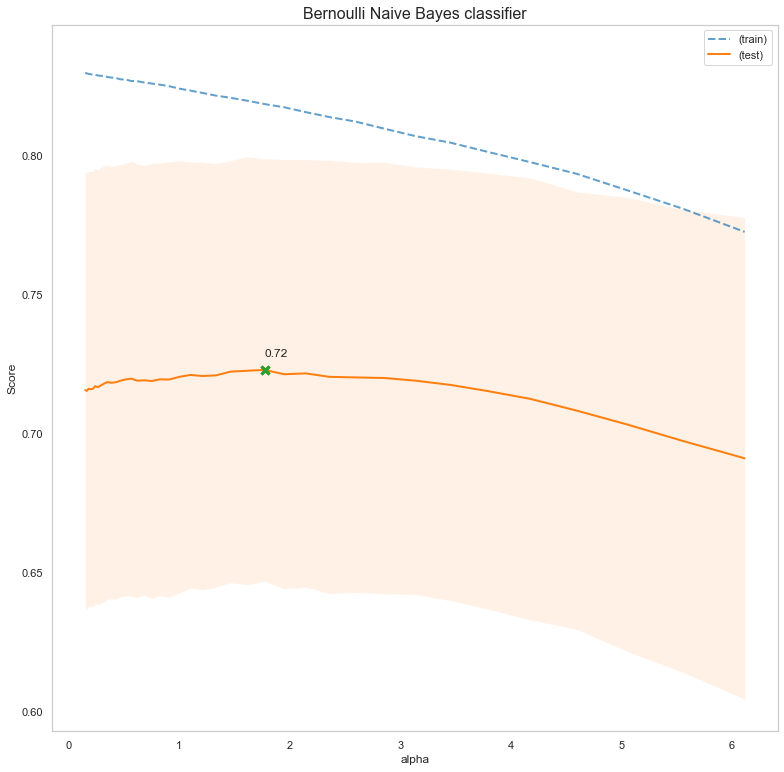

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
1.771561         0.722726        0.076033          0.818372         0.005703
1.610510         0.722415        0.076967          0.819611         0.005731
1.464100         0.722113        0.075947          0.820634         0.005620
2.143589         0.721474        0.076933          0.815479         0.006543
1.948717         0.721172        0.077243          0.817233         0.006070
1.100000         0.720907        0.076673          0.823226         0.005376
1.331000         0.720756        0.076187          0.821414         0.005606
1.210000         0.720535        0.076934          0.822381         0.005744
2.357948         0.720243        0.077926          0.813702         0.006339
1.000000         0.720228        0.077757          0.823918         0.005224

In [47]:
param_grid = {'alpha': [1.1 ** (i) for i in range(-20,20)]}

grid_search(bernoulli, X_train_english, english_train['HS'], param_grid, models[bernoulli])[0]

##### Spanish

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.3504938994813922 (0.7667059385707182)


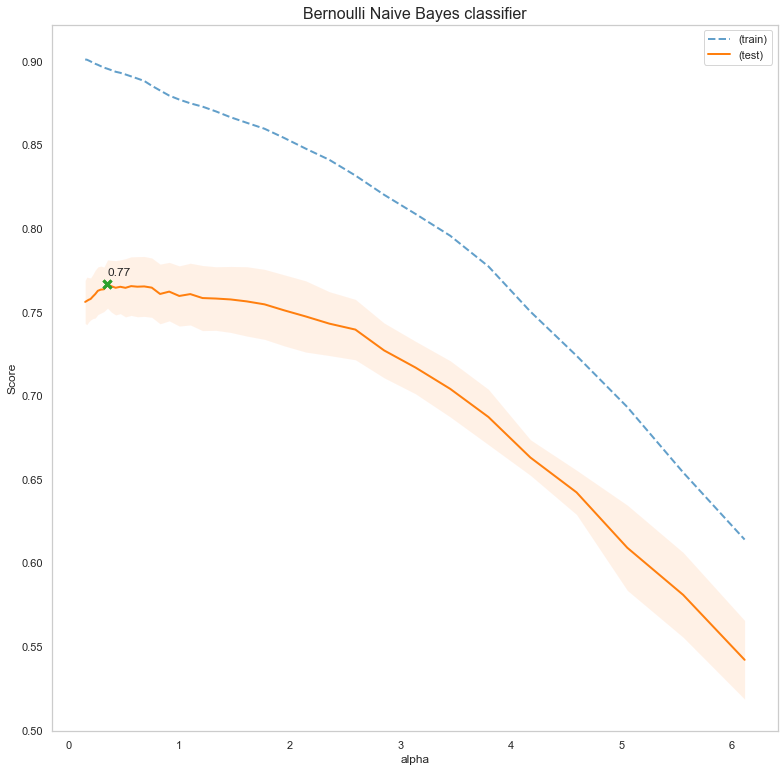

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.350494         0.766706        0.014440          0.895452         0.001761
0.564474         0.765472        0.017522          0.890910         0.001926
0.385543         0.765420        0.015508          0.894639         0.001845
0.683013         0.765291        0.017922          0.888178         0.002395
0.620921         0.765136        0.017994          0.889618         0.002081
0.466507         0.765084        0.016092          0.893035         0.002057
0.751315         0.764567        0.017753          0.885298         0.002618
0.424098         0.764493        0.016244          0.893675         0.002171
0.513158         0.764458        0.017403          0.892050         0.001961
0.318631         0.763582        0.013314          0.896150         0.001881

In [48]:
param_grid = {'alpha': [1.1 ** (i) for i in range(-20,20)]}

grid_search(bernoulli, X_train_spanish, spanish_train['HS'], param_grid, models[bernoulli])[0]

#### Detoxis

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.0549755813888 (0.37396803881846274)


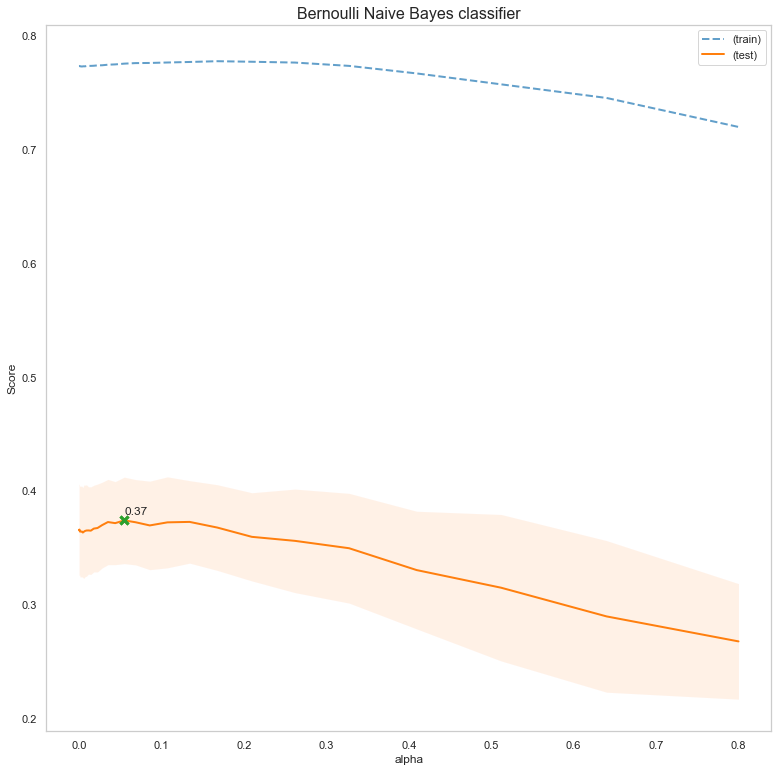

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.054976         0.373968        0.038020          0.775283         0.004079
0.134218         0.372647        0.036256          0.776746         0.004597
0.035184         0.372519        0.037489          0.774343         0.003441
0.068719         0.372335        0.037499          0.775755         0.004202
0.107374         0.372250        0.039972          0.776283         0.004494
0.043980         0.371557        0.036507          0.774616         0.003717
0.028147         0.369839        0.037677          0.773852         0.003649
0.085899         0.369545        0.038909          0.775884         0.003813
0.167772         0.367681        0.037657          0.777423         0.003393
0.022518         0.367275        0.038623          0.773749         0.004105

In [49]:
param_grid = {'alpha': [1.25 ** (i) for i in range(-40,0)]}

grid_search(bernoulli, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[bernoulli], scoring='f1')[0]

### Ridge Classifier
#### Hateval 2019
##### English

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 3.452271214393104 (0.7183431842341136)


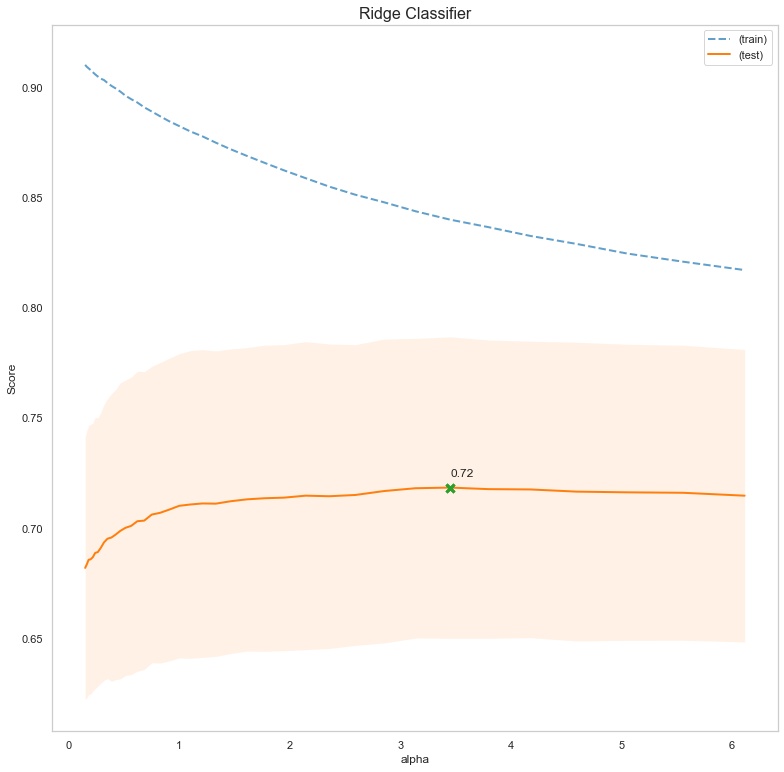

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
3.452271         0.718343        0.068453          0.839986         0.005759
3.138428         0.718055        0.068028          0.843808         0.005543
3.797498         0.717643        0.067739          0.836602         0.006362
4.177248         0.717500        0.067315          0.832614         0.006273
2.853117         0.716776        0.068995          0.847891         0.005070
4.594973         0.716510        0.067834          0.828989         0.006260
5.054470         0.716191        0.067249          0.824603         0.006484
5.559917         0.715986        0.067010          0.820906         0.006700
2.593742         0.714990        0.068298          0.851317         0.004822
2.143589         0.714679        0.069932          0.858840         0.004043

In [50]:
param_grid = {'alpha': [1.1 ** (i) for i in range(-20,20)]}

grid_search(ridge, X_train_english, english_train['HS'], param_grid, models[ridge])[0]

##### Spanish

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 2.1435888100000016 (0.7725686786888216)


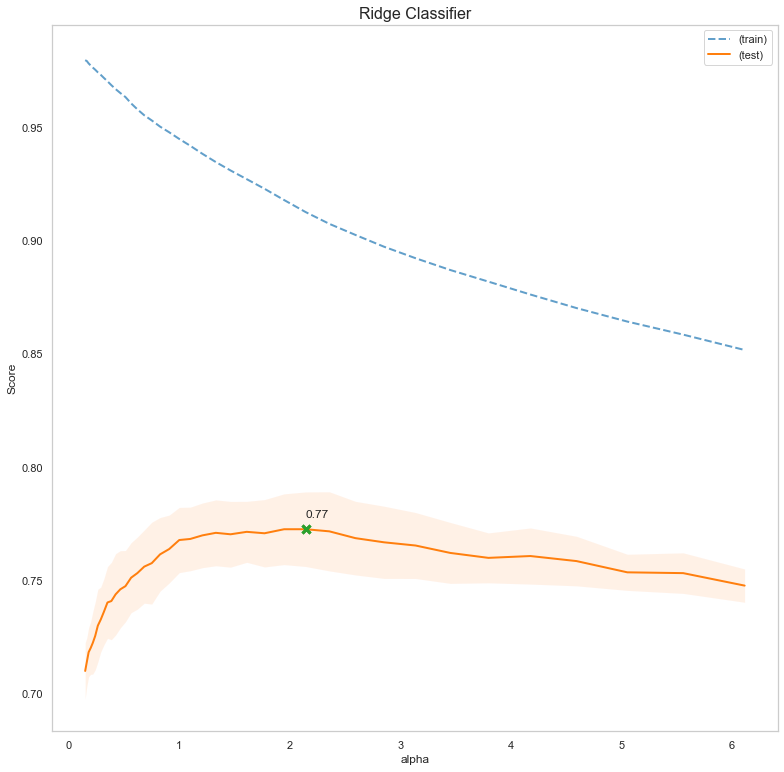

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
2.143589         0.772569        0.016461          0.912519         0.001879
1.948717         0.772561        0.015622          0.917836         0.001618
2.357948         0.771632        0.017468          0.907326         0.001605
1.610510         0.771417        0.013462          0.927047         0.001489
1.331000         0.770978        0.014546          0.934585         0.001781
1.771561         0.770783        0.014872          0.922799         0.001360
1.464100         0.770332        0.014515          0.930880         0.001465
1.210000         0.769862        0.014277          0.938220         0.001760
2.593742         0.768632        0.016250          0.902441         0.001379
1.100000         0.768278        0.014037          0.941761         0.001778

In [51]:
param_grid = {'alpha': [1.1 ** (i) for i in range(-20,20)]}

grid_search(ridge, X_train_spanish, spanish_train['HS'], param_grid, models[ridge])[0]

#### Detoxis

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.0003245185536584267 (0.36148084393385843)


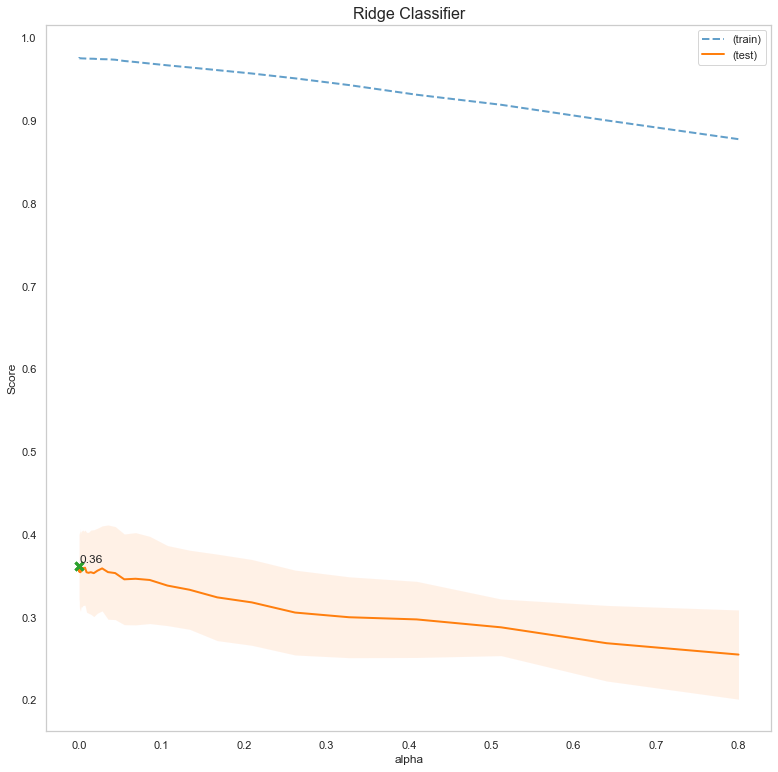

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.000325         0.361481        0.040122          0.975332         0.001558
0.000406         0.360960        0.040458          0.975278         0.001516
0.000166         0.360560        0.039474          0.975341         0.001569
0.000260         0.360391        0.041774          0.975335         0.001559
0.000208         0.359940        0.040777          0.975326         0.001552
0.007379         0.359681        0.045486          0.974795         0.001543
0.000133         0.359652        0.038757          0.975274         0.001539
0.004722         0.359474        0.045673          0.974863         0.001527
0.005903         0.358914        0.044772          0.974853         0.001559
0.028147         0.358784        0.051364          0.973958         0.001628

In [52]:
param_grid = {'alpha': [1.25 ** (i) for i in range(-40,0)]}

grid_search(ridge, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[ridge], scoring='f1')[0]

### Random Forest classifier
#### Hateval 2019
##### English

In [53]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2 ** (i) for i in range(1,10)] + [None],
    'n_estimators': [2 ** (i) for i in range(1,10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

random_forest_CV_english, random_forest_CV_english_model = grid_search(random_forest, X_train_english, english_train['HS'], param_grid, models[random_forest], cv=5)
random_forest_CV_english

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


mean_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                    
True      512.0     1                5                 512                  0.719123   
          NaN       1                5                 512                  0.719123   
          256.0     1                5                 512                  0.718477   
                                     10                512                  0.717941   
          NaN       1                2                 64                   0.717873   
          512.0     1                2                 64                   0.717873   
          NaN       1                2                 256                  0.717815   
          512.0     1                2                 256                  0.717815   
          128.0     1                5                 512                  0.717733   
          256.0     1                2                 64                   0.717577   

                                                                     std_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      512.0     1                5                 512                 0.080775   
          NaN       1                5                 512                 0.080775   
          256.0     1                5                 512                 0.079501   
                                     10                512                 0.080617   
          NaN       1                2                 64                  0.079240   
          512.0     1                2                 64                  0.079240   
          NaN       1                2                 256                 0.079230   
          512.0     1                2                 256                 0.079230   
          128.0     1                5                 512                 0.076591   
          256.0     1                2                 64                  0.083117   

                                                                     mean_train_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                     
True      512.0     1                5                 512                   0.998461   
          NaN       1                5                 512                   0.998461   
          256.0     1                5                 512                   0.998289   
                                     10                512                   0.995752   
          NaN       1                2                 64                    0.999002   
          512.0     1                2                 64                    0.999002   
          NaN       1                2                 256                   0.999002   
          512.0     1                2                 256                   0.999002   
          128.0     1                5                 512                   0.975865   
          256.0     1                2                 64                    0.998774   

                                                                     std_train_score  
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      512.0     1                5                 512                  0.000445  
          NaN       1                5                 512                  0.000445  
          256.0     1                5                 512                  0.000393  
                                     10                512                  0.000718  
          NaN       1                2                 64                   0.000156  
          512.0     1                2                 64                   0.000156  
          NaN       1                2                 256                  0.000156  
          512.0     1                2                 256                  0.000156  
          128.0     1       

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best max_features: 0.16777216 (0.7255734924210404)


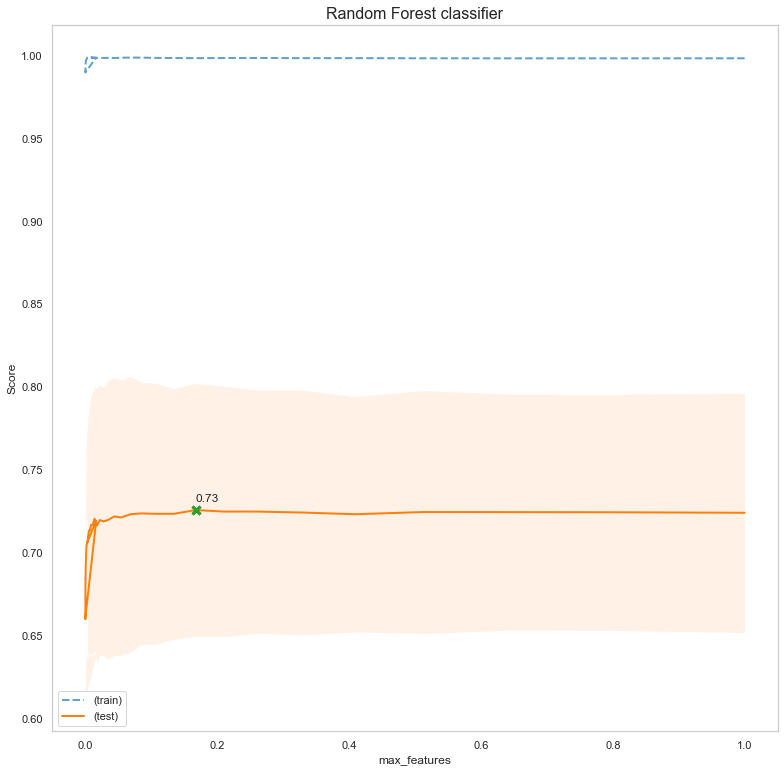

RandomForestClassifier(max_depth=512, max_features=0.16777216,
                       min_samples_split=5, n_estimators=512, random_state=42)


mean_test_score  std_test_score  mean_train_score  \
max_features                                                      
0.167772             0.725573        0.076471          0.998261   
0.209715             0.724682        0.075664          0.998318   
0.262144             0.724666        0.073430          0.998375   
0.512000             0.724390        0.073298          0.998175   
0.640000             0.724353        0.071300          0.998147   
0.800000             0.724250        0.071324          0.998147   
0.327680             0.724104        0.073936          0.998261   
1.000000             0.723934        0.072188          0.998175   
0.085899             0.723563        0.079147          0.998575   
0.107374             0.723322        0.078745          0.998403   

              std_train_score  
max_features                   
0.167772             0.000489  
0.209715             0.000330  
0.262144             0.000367  
0.512000             0.000397  
0.640000             0.000325  
0.800000             0.000312  
0.327680             0.000354  
1.000000             0.000436  
0.085899             0.000349  
0.107374             0.000397

In [54]:
param_grid = {'max_features': [1.25 ** (-i) for i in range(40)] + [X_train_english.shape[1] ** 0.5 / X_train_english.shape[1], np.log2(X_train_english.shape[1]) / X_train_english.shape[1]]} # last two = sqrt and log2

random_forest_CV_english_2, random_forest_CV_english_model_2 = grid_search(random_forest_CV_english_model, X_train_english, english_train['HS'], param_grid, models[random_forest], cv=5)

print(random_forest_CV_english_model_2)
random_forest_CV_english_2

##### Spanish

In [55]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2 ** (i) for i in range(1,10)] + [None],
    'n_estimators': [2 ** (i) for i in range(1,10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

random_forest_CV_spanish, random_forest_CV_spanish_model = grid_search(random_forest, X_train_spanish, spanish_train['HS'], param_grid, models[random_forest], cv=5)
random_forest_CV_spanish

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


mean_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                    
True      256.0     1                10                512                  0.774393   
          NaN       1                5                 512                  0.773921   
          512.0     1                5                 512                  0.773921   
          NaN       1                10                512                  0.773852   
          512.0     1                10                512                  0.773852   
          256.0     1                5                 64                   0.773342   
                                                       512                  0.773304   
          128.0     1                5                 512                  0.773276   
                                     10                512                  0.773252   
          256.0     1                2                 512                  0.773085   

                                                                     std_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      256.0     1                10                512                 0.006684   
          NaN       1                5                 512                 0.004762   
          512.0     1                5                 512                 0.004762   
          NaN       1                10                512                 0.006397   
          512.0     1                10                512                 0.006397   
          256.0     1                5                 64                  0.009831   
                                                       512                 0.004460   
          128.0     1                5                 512                 0.007974   
                                     10                512                 0.006569   
          256.0     1                2                 512                 0.004301   

                                                                     mean_train_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                     
True      256.0     1                10                512                   0.993415   
          NaN       1                5                 512                   0.996907   
          512.0     1                5                 512                   0.996907   
          NaN       1                10                512                   0.993587   
          512.0     1                10                512                   0.993587   
          256.0     1                5                 64                    0.995417   
                                                       512                   0.996621   
          128.0     1                5                 512                   0.973248   
                                     10                512                   0.966515   
          256.0     1                2                 512                   0.997823   

                                                                     std_train_score  
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      256.0     1                10                512                  0.001390  
          NaN       1                5                 512                  0.000458  
          512.0     1                5                 512                  0.000458  
          NaN       1                10                512                  0.000821  
          512.0     1                10                512                  0.000821  
          256.0     1                5                 64                   0.000725  
                                                       512                  0.000711  
          128.0     1                5                 512                  0.000952  
                            

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best max_features: 0.1073741824 (0.7814236728619182)


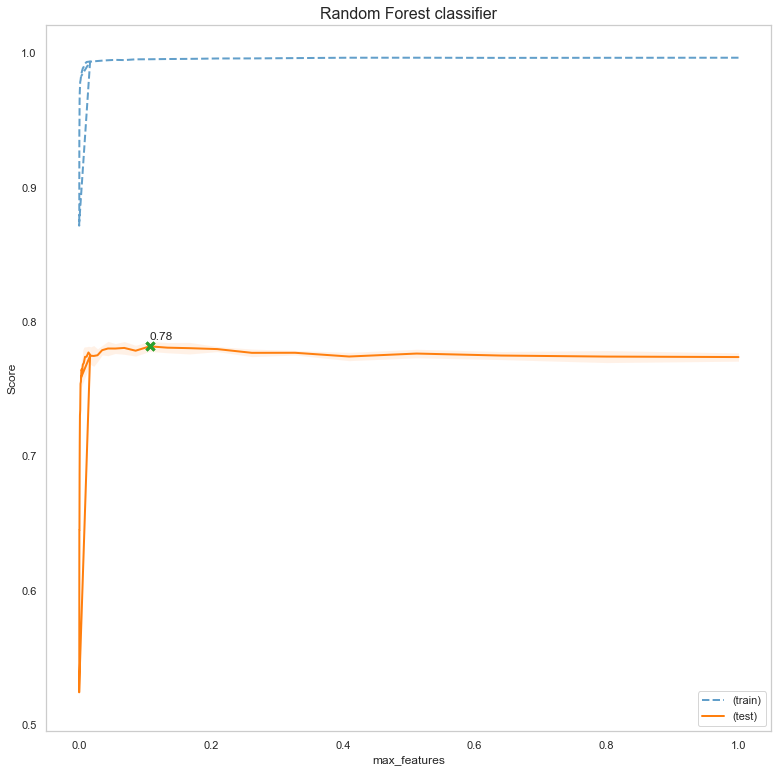

RandomForestClassifier(max_depth=256, max_features=0.1073741824,
                       min_samples_split=10, n_estimators=512, random_state=42)


mean_test_score  std_test_score  mean_train_score  \
max_features                                                      
0.107374             0.781424        0.003779          0.995133   
0.134218             0.780449        0.003819          0.995304   
0.068719             0.780255        0.004735          0.994504   
0.167772             0.780072        0.004320          0.995418   
0.043980             0.779832        0.005361          0.994389   
0.054976             0.779797        0.003687          0.994675   
0.209715             0.779391        0.001895          0.995704   
0.035184             0.778574        0.003512          0.994104   
0.085899             0.778189        0.004015          0.995075   
0.014412             0.776870        0.004619          0.993300   

              std_train_score  
max_features                   
0.107374             0.001227  
0.134218             0.000759  
0.068719             0.001011  
0.167772             0.000867  
0.043980             0.000560  
0.054976             0.001094  
0.209715             0.000724  
0.035184             0.001336  
0.085899             0.000636  
0.014412             0.001194

In [56]:
param_grid = {'max_features': [1.25 ** (-i) for i in range(40)] + [X_train_spanish.shape[1] ** 0.5 / X_train_spanish.shape[1], np.log2(X_train_spanish.shape[1]) / X_train_spanish.shape[1]]} # last two = sqrt and log2

random_forest_CV_spanish_2, random_forest_CV_spanish_model_2 = grid_search(random_forest_CV_spanish_model, X_train_spanish, spanish_train['HS'], param_grid, models[random_forest], cv=5)

print(random_forest_CV_spanish_model_2)
random_forest_CV_spanish_2

#### Detoxis

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2 ** (i) for i in range(1,10)] + [None],
    'n_estimators': [2 ** (i) for i in range(1,10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

random_forest_CV_detoxis, random_forest_CV_detoxis_model = grid_search(random_forest, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[random_forest], cv=5, scoring='f1')
random_forest_CV_detoxis

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


mean_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                    
True      128.0     1                2                 2                    0.285333   
                                     5                 2                    0.279855   
                    2                5                 2                    0.272260   
          256.0     1                5                 2                    0.269781   
                    2                2                 2                    0.269696   
          NaN       2                2                 2                    0.269276   
          512.0     2                2                 2                    0.269276   
          128.0     2                10                2                    0.268926   
          256.0     1                2                 2                    0.267779   
          128.0     2                2                 2                    0.266652   

                                                                     std_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      128.0     1                2                 2                   0.035310   
                                     5                 2                   0.023137   
                    2                5                 2                   0.042296   
          256.0     1                5                 2                   0.025766   
                    2                2                 2                   0.027174   
          NaN       2                2                 2                   0.026528   
          512.0     2                2                 2                   0.026528   
          128.0     2                10                2                   0.026360   
          256.0     1                2                 2                   0.015716   
          128.0     2                2                 2                   0.031031   

                                                                     mean_train_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                     
True      128.0     1                2                 2                     0.728670   
                                     5                 2                     0.698322   
                    2                5                 2                     0.618286   
          256.0     1                5                 2                     0.751155   
                    2                2                 2                     0.650336   
          NaN       2                2                 2                     0.650022   
          512.0     2                2                 2                     0.650022   
          128.0     2                10                2                     0.615647   
          256.0     1                2                 2                     0.763044   
          128.0     2                2                 2                     0.617344   

                                                                     std_train_score  
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      128.0     1                2                 2                    0.008121  
                                     5                 2                    0.008564  
                    2                5                 2                    0.012393  
          256.0     1                5                 2                    0.015952  
                    2                2                 2                    0.015622  
          NaN       2                2                 2                    0.015174  
          512.0     2                2                 2                    0.015174  
          128.0     2                10                2                    0.014589  
          256.0     1       

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best max_features: 0.64 (0.33598709734403714)


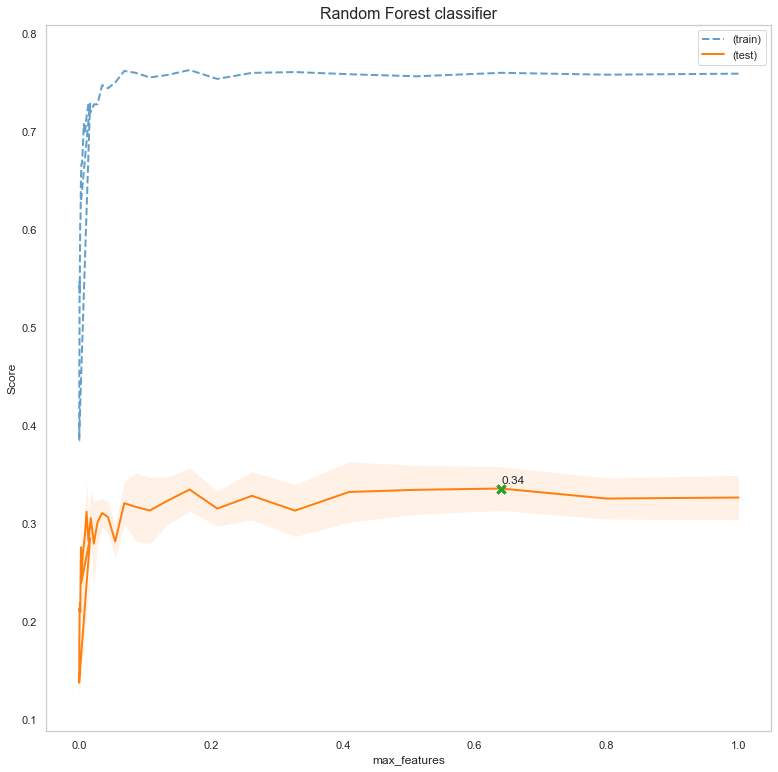

RandomForestClassifier(max_depth=128, max_features=0.64, n_estimators=2,
                       random_state=42)


mean_test_score  std_test_score  mean_train_score  \
max_features                                                      
0.640000             0.335987        0.022440          0.760100   
0.167772             0.334960        0.022140          0.762973   
0.512000             0.334680        0.024956          0.756543   
0.409600             0.332477        0.030808          0.758664   
0.262144             0.328534        0.024707          0.760024   
1.000000             0.326811        0.022596          0.759247   
0.800000             0.325760        0.020925          0.758210   
0.134218             0.323503        0.024248          0.757917   
0.068719             0.321015        0.021532          0.762004   
0.085899             0.317328        0.034455          0.760107   

              std_train_score  
max_features                   
0.640000             0.003807  
0.167772             0.013529  
0.512000             0.010522  
0.409600             0.009215  
0.262144             0.007815  
1.000000             0.008522  
0.800000             0.003567  
0.134218             0.007817  
0.068719             0.009257  
0.085899             0.014992

In [58]:
param_grid = {'max_features': [1.25 ** (-i) for i in range(40)] + [X_train_detoxis.shape[1] ** 0.5 / X_train_detoxis.shape[1], np.log2(X_train_detoxis.shape[1]) / X_train_detoxis.shape[1]]} # last two = sqrt and log2

random_forest_CV_detoxis_2, random_forest_CV_detoxis_model_2 = grid_search(random_forest_CV_detoxis_model, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[random_forest], cv=5, scoring='f1')

print(random_forest_CV_detoxis_model_2)
random_forest_CV_detoxis_2

### Support Vector Classification
#### Hateval 2019
##### English

In [59]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1.25 ** i for i in range(30)]}

svc_CV_english, svc_CV_english_model = grid_search(svc, X_train_english, english_train['HS'], param_grid, models[svc], cv=10)
svc_CV_english

Fitting 10 folds for each of 90 candidates, totalling 900 fits


mean_test_score  std_test_score  mean_train_score  \
C          kernel                                                       
1.250000   rbf             0.726501        0.071586          0.977406   
1.562500   rbf             0.724744        0.072809          0.988844   
1.000000   sigmoid         0.724149        0.064920          0.807207   
1.953125   rbf             0.723778        0.072917          0.995036   
3.814697   rbf             0.723606        0.072747          0.998416   
7.450581   rbf             0.723545        0.071834          0.998936   
2.441406   rbf             0.723501        0.073265          0.997112   
264.697796 rbf             0.723311        0.071779          0.998986   
108.420217 rbf             0.723311        0.071779          0.998986   
330.872245 rbf             0.723311        0.071779          0.998986   

                    std_train_score  
C          kernel                    
1.250000   rbf             0.001105  
1.562500   rbf             0.000916  
1.000000   sigmoid         0.006778  
1.953125   rbf             0.000527  
3.814697   rbf             0.000214  
7.450581   rbf             0.000116  
2.441406   rbf             0.000512  
264.697796 rbf             0.000113  
108.420217 rbf             0.000113  
330.872245 rbf             0.000113

In [60]:
param_grid = {'gamma': [1.25 ** (-i) for i in range(30)] + ['scale', 'auto']}
 
svc_CV_english_2, svc_CV_english_model_2 = grid_search(svc_CV_english_model, X_train_english, english_train['HS'], param_grid, models[svc])

print(svc_CV_english_model_2)
svc_CV_english_2

Fitting 10 folds for each of 32 candidates, totalling 320 fits
SVC(C=1.25, gamma=0.8, random_state=42)


mean_test_score  std_test_score  mean_train_score  std_train_score
gamma                                                                         
0.8                0.727099        0.067732          0.956420         0.002129
1.0                0.726560        0.071305          0.976949         0.000969
scale              0.726501        0.071586          0.977406         0.001105
0.512              0.726306        0.065241          0.911593         0.003174
0.64               0.726292        0.064982          0.934259         0.003841
0.4096             0.725371        0.065391          0.889574         0.004288
0.32768            0.724312        0.066310          0.869239         0.004772
0.262144           0.720780        0.067190          0.850889         0.005755
0.2097152          0.718499        0.065537          0.834804         0.006635
0.16777216         0.714328        0.063552          0.820191         0.006964

##### Spanish

In [61]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1.25 ** i for i in range(30)]}

svc_CV_spanish, svc_CV_spanish_model = grid_search(svc, X_train_spanish, spanish_train['HS'], param_grid, models[svc], cv=10)
svc_CV_spanish

Fitting 10 folds for each of 90 candidates, totalling 900 fits


mean_test_score  std_test_score  mean_train_score  \
C         kernel                                                       
1.250000  linear          0.775618        0.014071          0.921543   
1.000000  linear          0.775566        0.012053          0.911683   
          sigmoid         0.774807        0.014823          0.853859   
1.953125  rbf             0.774313        0.013629          0.994122   
1.562500  linear          0.773647        0.015074          0.930233   
3.051758  rbf             0.773639        0.011450          0.996385   
2.441406  rbf             0.773634        0.012360          0.995647   
18.189894 rbf             0.773376        0.012342          0.997530   
1.562500  rbf             0.773333        0.016019          0.991682   
11.641532 rbf             0.773120        0.011754          0.997327   

                   std_train_score  
C         kernel                    
1.250000  linear          0.001834  
1.000000  linear          0.001358  
          sigmoid         0.003133  
1.953125  rbf             0.000562  
1.562500  linear          0.001939  
3.051758  rbf             0.000356  
2.441406  rbf             0.000562  
18.189894 rbf             0.000229  
1.562500  rbf             0.000811  
11.641532 rbf             0.000261

In [62]:
param_grid = {'gamma': [1.25 ** (-i) for i in range(30)] + ['scale', 'auto']}
 
svc_CV_spanish_2, svc_CV_spanish_model_2 = grid_search(svc_CV_spanish_model, X_train_spanish, spanish_train['HS'], param_grid, models[svc])

print(svc_CV_spanish_model_2)
svc_CV_spanish_2

Fitting 10 folds for each of 32 candidates, totalling 320 fits
SVC(C=1.25, gamma=1.0, kernel='linear', random_state=42)


mean_test_score  std_test_score  mean_train_score  \
gamma                                                                      
1.0                           0.775618        0.014071          0.921543   
0.8                           0.775618        0.014071          0.921543   
scale                         0.775618        0.014071          0.921543   
0.0015474250491067253         0.775618        0.014071          0.921543   
0.0019342813113834066         0.775618        0.014071          0.921543   
0.0024178516392292584         0.775618        0.014071          0.921543   
0.003022314549036573          0.775618        0.014071          0.921543   
0.0037778931862957163         0.775618        0.014071          0.921543   
0.004722366482869645          0.775618        0.014071          0.921543   
0.005902958103587056          0.775618        0.014071          0.921543   

                       std_train_score  
gamma                                   
1.0                           0.001834  
0.8                           0.001834  
scale                         0.001834  
0.0015474250491067253         0.001834  
0.0019342813113834066         0.001834  
0.0024178516392292584         0.001834  
0.003022314549036573          0.001834  
0.0037778931862957163         0.001834  
0.004722366482869645          0.001834  
0.005902958103587056          0.001834

#### Detoxis

In [63]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1.25 ** i for i in range(30)]}

svc_CV_detoxis, svc_CV_detoxis_model = grid_search(svc, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[svc], cv=10, scoring='f1')
svc_CV_detoxis

Fitting 10 folds for each of 90 candidates, totalling 900 fits


mean_test_score  std_test_score  mean_train_score  \
C          kernel                                                       
516.987883 sigmoid         0.350775        0.053764          0.705466   
108.420217 sigmoid         0.345834        0.072939          0.698778   
646.234854 sigmoid         0.345772        0.070460          0.705889   
44.408921  sigmoid         0.345414        0.064209          0.685620   
69.388939  sigmoid         0.344551        0.065580          0.690763   
135.525272 sigmoid         0.344216        0.060039          0.697785   
211.758237 sigmoid         0.343807        0.070588          0.701865   
28.421709  linear          0.343081        0.056687          0.973022   
35.527137  sigmoid         0.343032        0.061292          0.684242   
55.511151  sigmoid         0.342975        0.077909          0.692377   

                    std_train_score  
C          kernel                    
516.987883 sigmoid         0.005769  
108.420217 sigmoid         0.008600  
646.234854 sigmoid         0.009392  
44.408921  sigmoid         0.011771  
69.388939  sigmoid         0.005751  
135.525272 sigmoid         0.010125  
211.758237 sigmoid         0.006455  
28.421709  linear          0.001862  
35.527137  sigmoid         0.007863  
55.511151  sigmoid         0.009037

In [64]:
param_grid = {'gamma': [1.25 ** (-i) for i in range(30)] + ['scale', 'auto']}
 
svc_CV_detoxis_2, svc_CV_detoxis_model_2 = grid_search(svc_CV_detoxis_model, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[svc], scoring='f1')

print(svc_CV_detoxis_model_2)
svc_CV_detoxis_2

Fitting 10 folds for each of 32 candidates, totalling 320 fits
SVC(C=516.9878828456423, gamma=0.64, kernel='sigmoid', random_state=42)


mean_test_score  std_test_score  mean_train_score  \
gamma                                                            
0.64                0.363865        0.051136          0.918140   
0.512               0.361712        0.057790          0.950910   
0.4096              0.359875        0.058926          0.963818   
0.8                 0.352765        0.056183          0.834241   
scale               0.350775        0.053764          0.705466   
0.262144            0.350653        0.070101          0.970834   
0.32768             0.350170        0.066680          0.968122   
0.16777216          0.349187        0.058799          0.973248   
1.0                 0.347860        0.074140          0.714433   
0.134217728         0.345476        0.053333          0.973876   

             std_train_score  
gamma                         
0.64                0.004000  
0.512               0.002908  
0.4096              0.002814  
0.8                 0.008925  
scale               0.005769  
0.262144            0.002223  
0.32768             0.002281  
0.16777216          0.001586  
1.0                 0.007797  
0.134217728         0.001430

### AdaBoost Classifier
#### Hateval 2019
##### English

In [65]:
param_grid = {'algorithm': ['SAMME.R'],
              'n_estimators': [2 ** (i) for i in range(1,10)],
              'learning_rate': [0.1 * (i) for i in range(5,25)],
              }

grid_search(adaboost, X_train_english, english_train['HS'], param_grid, models[adaboost])[0]

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


mean_test_score  std_test_score  \
algorithm learning_rate n_estimators                                    
SAMME.R   0.8           64                   0.717412        0.064715   
          0.9           64                   0.715334        0.067457   
                        128                  0.713314        0.073640   
          1.0           64                   0.711796        0.069932   
          0.5           256                  0.710992        0.074955   
          0.6           256                  0.710913        0.071202   
          0.7           256                  0.710192        0.072122   
          1.2           128                  0.709909        0.079654   
          1.3           32                   0.709887        0.067447   
          0.8           128                  0.709213        0.075784   

                                      mean_train_score  std_train_score  
algorithm learning_rate n_estimators                                     
SAMME.R   0.8           64                    0.773285         0.006549  
          0.9           64                    0.775534         0.007039  
                        128                   0.796082         0.006328  
          1.0           64                    0.776204         0.007665  
          0.5           256                   0.810821         0.006011  
          0.6           256                   0.817219         0.005367  
          0.7           256                   0.822514         0.003965  
          1.2           128                   0.798044         0.007389  
          1.3           32                    0.756896         0.006954  
          0.8           128                   0.793335         0.006353

##### Spanish

In [66]:
param_grid = {'algorithm': ['SAMME.R'],
              'n_estimators': [2 ** (i) for i in range(1,10)],
              'learning_rate': [0.1 * (i) for i in range(5,25)],
              }

grid_search(adaboost, X_train_spanish, spanish_train['HS'], param_grid, models[adaboost])[0]

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


mean_test_score  std_test_score  \
algorithm learning_rate n_estimators                                    
SAMME.R   0.6           256                  0.759999        0.014248   
          0.5           512                  0.759450        0.014438   
          0.7           256                  0.758244        0.012742   
          0.5           256                  0.756527        0.010930   
          0.9           256                  0.756281        0.013066   
          0.8           256                  0.753713        0.014243   
                        128                  0.753687        0.011210   
          0.9           128                  0.752842        0.011440   
          0.6           128                  0.752496        0.014593   
                        512                  0.752085        0.018028   

                                      mean_train_score  std_train_score  
algorithm learning_rate n_estimators                                     
SAMME.R   0.6           256                   0.858179         0.001561  
          0.5           512                   0.911786         0.003294  
          0.7           256                   0.864795         0.002050  
          0.5           256                   0.852132         0.001887  
          0.9           256                   0.869744         0.002381  
          0.8           256                   0.869984         0.003071  
                        128                   0.820249         0.002287  
          0.9           128                   0.821178         0.003646  
          0.6           128                   0.811374         0.003471  
                        512                   0.921760         0.002841

#### Detoxis

In [67]:
param_grid = {'algorithm': ['SAMME.R'],
              'n_estimators': [2 ** (i) for i in range(1,15)],
              'learning_rate': [0.1 * (i) for i in range(15,35)],
              }

grid_search(adaboost, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[adaboost], scoring='f1')[0]

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


mean_test_score  std_test_score  \
algorithm learning_rate n_estimators                                    
SAMME.R   2.7           8                    0.492219        0.002017   
                        32                   0.492219        0.002017   
                        16384                0.492219        0.002017   
                        8192                 0.492219        0.002017   
                        4096                 0.492219        0.002017   
                        2048                 0.492219        0.002017   
                        1024                 0.492219        0.002017   
                        512                  0.492219        0.002017   
                        256                  0.492219        0.002017   
                        128                  0.492219        0.002017   

                                      mean_train_score  std_train_score  
algorithm learning_rate n_estimators                                     
SAMME.R   2.7           8                     0.492411         0.002350  
                        32                    0.492515         0.002099  
                        16384                 0.492515         0.002099  
                        8192                  0.492515         0.002099  
                        4096                  0.492515         0.002099  
                        2048                  0.492515         0.002099  
                        1024                  0.492515         0.002099  
                        512                   0.492515         0.002099  
                        256                   0.492515         0.002099  
                        128                   0.492515         0.002099

### MLP Classifier
#### Hateval 2019
##### English

In [68]:
param_grid = {
    'hidden_layer_sizes': [(512, 128, 32), (256, 256, 256), (512, 64), (256, 256), (1024,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

mlp_CV_english, mlp_CV_english_model = grid_search(mlp, X_train_english, english_train['HS'], param_grid, models[mlp], cv=10)
mlp_CV_english

Fitting 10 folds for each of 18 candidates, totalling 180 fits


mean_test_score  std_test_score  \
activation hidden_layer_sizes                                    
relu       (512, 64)                  0.718126        0.078011   
logistic   (512, 128, 32)             0.716651        0.070109   
           (512, 64)                  0.712641        0.076065   
relu       (1024,)                    0.711550        0.073014   
tanh       (512, 64)                  0.710819        0.074901   
logistic   (256, 256)                 0.710664        0.081407   
           (256, 256, 256)            0.710284        0.073938   
relu       (256, 256, 256)            0.710002        0.077266   
           (512, 128, 32)             0.708905        0.071527   
           (256,)                     0.708289        0.073195   

                               mean_train_score  std_train_score  
activation hidden_layer_sizes                                     
relu       (512, 64)                   0.879453         0.003947  
logistic   (512, 128, 32)              0.843529         0.028662  
           (512, 64)                   0.848837         0.019370  
relu       (1024,)                     0.852006         0.030222  
tanh       (512, 64)                   0.833732         0.018805  
logistic   (256, 256)                  0.836190         0.017041  
           (256, 256, 256)             0.849479         0.026646  
relu       (256, 256, 256)             0.860020         0.050117  
           (512, 128, 32)              0.871247         0.055864  
           (256,)                      0.852861         0.023934

In [69]:
param_grid = {
    'solver': ['adam'],
    'beta_1': [0.9 + 0.025 * i for i in range(-3, 4)],
    'beta_2': [0.999 + 0.00025 * i for i in range(-3, 4)],
    'epsilon': [1e-8 + 25e-10 * i for i in range(-3, 4)]
}

mlp_CV_english_2, mlp_CV_english_model_2 = grid_search(mlp_CV_english_model, X_train_english, english_train['HS'], param_grid, models[mlp], cv=5)

mlp_CV_english_model_2

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


MLPClassifier(beta_1=0.85, beta_2=0.9985, early_stopping=True, epsilon=5e-09,
              hidden_layer_sizes=(512, 64), random_state=42)

In [70]:
import pickle
path = "./data/gridsearch_mlp_english.pkl"

if 'mlp_CV_english' in globals():
    mlp_CV_english_2.to_pickle(path)
    
mlp_CV_english_2 = pd.read_pickle(path)
mlp_CV_english_2

mean_test_score  std_test_score  \
beta_1 beta_2  epsilon      solver                                    
0.850  0.99850 5.000000e-09 adam           0.708274        0.058489   
       0.99900 1.500000e-08 adam           0.708236        0.058939   
       0.99950 1.250000e-08 adam           0.708088        0.058905   
       0.99975 7.500000e-09 adam           0.707965        0.059058   
               1.000000e-08 adam           0.707743        0.058983   
0.825  0.99950 1.750000e-08 adam           0.706383        0.057385   
       0.99875 7.500000e-09 adam           0.705795        0.057892   
0.850  0.99875 2.500000e-09 adam           0.705421        0.061715   
       0.99925 2.500000e-09 adam           0.705237        0.061590   
       0.99825 7.500000e-09 adam           0.705061        0.061461   

                                    mean_train_score  std_train_score  
beta_1 beta_2  epsilon      solver                                     
0.850  0.99850 5.000000e-09 adam            0.867607         0.019253  
       0.99900 1.500000e-08 adam            0.868181         0.019598  
       0.99950 1.250000e-08 adam            0.868463         0.019492  
       0.99975 7.500000e-09 adam            0.868463         0.019581  
               1.000000e-08 adam            0.868196         0.019842  
0.825  0.99950 1.750000e-08 adam            0.871083         0.019328  
       0.99875 7.500000e-09 adam            0.870221         0.018587  
0.850  0.99875 2.500000e-09 adam            0.852266         0.030209  
       0.99925 2.500000e-09 adam            0.852574         0.030296  
       0.99825 7.500000e-09 adam            0.851744         0.030747

##### Spanish

In [71]:
param_grid = {
    'hidden_layer_sizes': [(512, 128, 32), (256, 256, 256), (512, 64), (256, 256), (1024,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

mlp_CV_spanish, mlp_CV_spanish_model = grid_search(mlp, X_train_spanish, spanish_train['HS'], param_grid, models[mlp], cv=10)
mlp_CV_spanish

Fitting 10 folds for each of 18 candidates, totalling 180 fits


mean_test_score  std_test_score  \
activation hidden_layer_sizes                                    
relu       (512, 128, 32)             0.770182        0.020908   
logistic   (256, 256, 256)            0.767729        0.016562   
relu       (256, 256, 256)            0.766304        0.015601   
logistic   (512, 64)                  0.762637        0.014075   
tanh       (512, 64)                  0.761908        0.014519   
relu       (256, 256)                 0.761362        0.012920   
logistic   (512, 128, 32)             0.761099        0.013740   
relu       (1024,)                    0.760498        0.015048   
           (512, 64)                  0.760386        0.015511   
logistic   (1024,)                    0.758818        0.014314   

                               mean_train_score  std_train_score  
activation hidden_layer_sizes                                     
relu       (512, 128, 32)              0.913879         0.003838  
logistic   (256, 256, 256)             0.908697         0.020657  
relu       (256, 256, 256)             0.904933         0.014941  
logistic   (512, 64)                   0.912643         0.017833  
tanh       (512, 64)                   0.902691         0.014257  
relu       (256, 256)                  0.931402         0.016888  
logistic   (512, 128, 32)              0.902893         0.025643  
relu       (1024,)                     0.923198         0.017054  
           (512, 64)                   0.931870         0.016787  
logistic   (1024,)                     0.910930         0.012128

In [72]:
param_grid = {
    'solver': ['adam'],
    'beta_1': [0.9 + 0.025 * i for i in range(-3, 4)],
    'beta_2': [0.999 + 0.00025 * i for i in range(-3, 4)],
    'epsilon': [1e-8 + 25e-10 * i for i in range(-3, 4)]
}

mlp_CV_spanish_2, mlp_CV_spanish_model_2 = grid_search(mlp_CV_spanish_model, X_train_spanish, spanish_train['HS'], param_grid, models[mlp], cv=5)
mlp_CV_spanish_model_2

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


MLPClassifier(beta_1=0.85, beta_2=0.99925, early_stopping=True,
              epsilon=7.500000000000001e-09, hidden_layer_sizes=(512, 128, 32),
              random_state=42)

In [73]:
import pickle
path = "./data/gridsearch_mlp_spanish.pkl"

if 'mlp_CV_spanish' in globals():
    mlp_CV_spanish_2.to_pickle(path)
    
mlp_CV_spanish_2 = pd.read_pickle(path)
mlp_CV_spanish_2

mean_test_score  std_test_score  \
beta_1 beta_2  epsilon      solver                                    
0.850  0.99925 7.500000e-09 adam           0.770838        0.013041   
0.825  0.99900 1.250000e-08 adam           0.770724        0.012959   
0.850  0.99900 7.500000e-09 adam           0.770414        0.012768   
0.825  0.99875 5.000000e-09 adam           0.770343        0.012806   
       0.99825 1.500000e-08 adam           0.770304        0.012453   
       0.99850 5.000000e-09 adam           0.770255        0.010865   
0.850  0.99950 5.000000e-09 adam           0.770239        0.013057   
       0.99875 1.000000e-08 adam           0.770181        0.011919   
0.825  0.99875 7.500000e-09 adam           0.770133        0.012548   
0.850  0.99850 1.000000e-08 adam           0.770132        0.012339   

                                    mean_train_score  std_train_score  
beta_1 beta_2  epsilon      solver                                     
0.850  0.99925 7.500000e-09 adam            0.918857         0.001774  
0.825  0.99900 1.250000e-08 adam            0.921185         0.001960  
0.850  0.99900 7.500000e-09 adam            0.918804         0.001575  
0.825  0.99875 5.000000e-09 adam            0.920941         0.001511  
       0.99825 1.500000e-08 adam            0.921295         0.001738  
       0.99850 5.000000e-09 adam            0.920997         0.001678  
0.850  0.99950 5.000000e-09 adam            0.919087         0.001858  
       0.99875 1.000000e-08 adam            0.918626         0.001704  
0.825  0.99875 7.500000e-09 adam            0.920543         0.001478  
0.850  0.99850 1.000000e-08 adam            0.918968         0.001768

#### Detoxis

In [74]:
param_grid = {
    'hidden_layer_sizes': [(512, 128, 32), (256, 256, 256), (512, 64), (256, 256), (1024,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

mlp_CV_detoxis, mlp_CV_detoxis_model = grid_search(mlp, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[mlp], cv=10, scoring='f1')
mlp_CV_detoxis

Fitting 10 folds for each of 18 candidates, totalling 180 fits


mean_test_score  std_test_score  \
activation hidden_layer_sizes                                    
relu       (512, 64)                  0.022870        0.035621   
           (1024,)                    0.020747        0.038369   
tanh       (1024,)                    0.014815        0.044444   
           (256, 256, 256)            0.010246        0.020974   
logistic   (256, 256)                 0.004372        0.008744   
           (1024,)                    0.002174        0.006522   
relu       (256,)                     0.002128        0.006383   
           (256, 256)                 0.002128        0.006383   
tanh       (256,)                     0.000000        0.000000   
relu       (256, 256, 256)            0.000000        0.000000   

                               mean_train_score  std_train_score  
activation hidden_layer_sizes                                     
relu       (512, 64)                   0.233737         0.357041  
           (1024,)                     0.176427         0.278954  
tanh       (1024,)                     0.061730         0.185191  
           (256, 256, 256)             0.074683         0.149926  
logistic   (256, 256)                  0.032821         0.070721  
           (1024,)                     0.027347         0.054867  
relu       (256,)                      0.015891         0.047673  
           (256, 256)                  0.074808         0.224424  
tanh       (256,)                      0.000000         0.000000  
relu       (256, 256, 256)             0.000000         0.000000

In [75]:
param_grid = {
    'solver': ['adam'],
    'beta_1': [0.9 + 0.025 * i for i in range(-3, 4)],
    'beta_2': [0.999 + 0.00025 * i for i in range(-3, 4)],
    'epsilon': [1e-8 + 25e-10 * i for i in range(-3, 4)]
}

mlp_CV_detoxis_2, mlp_CV_detoxis_model_2 = grid_search(mlp_CV_detoxis_model, X_train_detoxis, detoxis_train['toxicity'], param_grid, models[mlp], cv=5, scoring='f1')
mlp_CV_detoxis_model_2

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


MLPClassifier(beta_1=0.9750000000000001, beta_2=0.99825, early_stopping=True,
              epsilon=7.500000000000001e-09, hidden_layer_sizes=(512, 64),
              random_state=42)

In [76]:
import pickle
path = "./data/gridsearch_mlp_detoxis.pkl"

if 'mlp_CV_detoxis' in globals():
    mlp_CV_detoxis_2.to_pickle(path)
    
mlp_CV_detoxis_2 = pd.read_pickle(path)
mlp_CV_detoxis_2

mean_test_score  std_test_score  \
beta_1 beta_2  epsilon      solver                                    
0.975  0.99825 7.500000e-09 adam           0.029848        0.054367   
0.850  0.99900 1.500000e-08 adam           0.028444        0.056889   
       0.99825 1.250000e-08 adam           0.028444        0.056889   
               1.500000e-08 adam           0.028444        0.056889   
               1.750000e-08 adam           0.028444        0.056889   
       0.99850 1.000000e-08 adam           0.028444        0.056889   
               1.250000e-08 adam           0.028444        0.056889   
               1.750000e-08 adam           0.028444        0.056889   
       0.99875 7.500000e-09 adam           0.028444        0.056889   
               1.000000e-08 adam           0.028444        0.056889   

                                    mean_train_score  std_train_score  
beta_1 beta_2  epsilon      solver                                     
0.975  0.99825 7.500000e-09 adam            0.218830         0.320594  
0.850  0.99900 1.500000e-08 adam            0.168019         0.336038  
       0.99825 1.250000e-08 adam            0.168388         0.336775  
               1.500000e-08 adam            0.167834         0.335669  
               1.750000e-08 adam            0.168203         0.336407  
       0.99850 1.000000e-08 adam            0.168388         0.336775  
               1.250000e-08 adam            0.168388         0.336775  
               1.750000e-08 adam            0.168203         0.336407  
       0.99875 7.500000e-09 adam            0.168019         0.336038  
               1.000000e-08 adam            0.168571         0.337143

## 7. Best Models
Creates Models with best hyperparameters of the grid search cross-validation. Then stores predictions from both the base model and the model with the best hyperparameters.
### Hateval 2019
#### English

In [77]:
#Dummy is same
best_multinomial_english = MultinomialNB(alpha=0.75)
best_bernoulli_english = BernoulliNB(alpha=1.75)
best_ridge_english = RidgeClassifier(alpha=3.5, random_state=seed_val)
best_random_forest_english = RandomForestClassifier(bootstrap=True, max_depth=512, min_samples_leaf=1, min_samples_split=5, n_estimators=512, max_features=0.15, random_state=seed_val)
best_svc_english = SVC(C=1.25, kernel='rbf', gamma=0.8, random_state=seed_val)
best_adaboost_english = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.8, n_estimators=64, random_state=seed_val)
best_mlp_english = MLPClassifier(solver='adam', beta_1=0.85, beta_2=0.9985, epsilon=5e-09, activation='relu', hidden_layer_sizes=(512, 64), early_stopping=True, random_state=seed_val)

best_models_english = {
    best_multinomial_english: models[multinomial] + " (best)",
    best_bernoulli_english: models[bernoulli] + " (best)",
    best_ridge_english: models[ridge] + " (best)",
    best_random_forest_english: models[random_forest] + " (best)",
    best_svc_english: models[svc] + " (best)",
    best_adaboost_english: models[adaboost] + " (best)",
    best_mlp_english: models[mlp] + " (best)"
}

all_models_english = join_two_models(models, best_models_english)
fit_models(X_train_english, english_train['HS'], all_models_english)

print("\n\nTRAIN:")
all_train_scores_english, all_train_preds_english = print_scores(X_train_english, english_train["HS"], all_models_english)

print("\n\nDEV:")
all_dev_scores_english, all_dev_preds_english = print_scores(X_dev_english, english_dev["HS"], all_models_english)

print("\n\nTEST:")
all_test_scores_english, all_test_preds_english = print_scores(X_test_english, english_test["HS"], all_models_english)

Model Dummy Classifier fitted
Model Multinomial Naive Bayes classifier (best) fitted
Model Multinomial Naive Bayes classifier fitted
Model Bernoulli Naive Bayes classifier (best) fitted
Model Bernoulli Naive Bayes classifier fitted
Model Ridge Classifier (best) fitted
Model Ridge Classifier fitted
Model Random Forest classifier (best) fitted
Model Random Forest classifier fitted
Model Support Vector Classification (best) fitted
Model Support Vector Classification fitted
Model AdaBoost classifier (best) fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier (best) fitted
Model Multi-layer Perceptron classifier fitted


TRAIN:
Dummy Classifier
F1 macro: 0.3669550538088204
Accuracy:  0.5796666666666667

Classification Report

               precision    recall  f1-score   support

           0       0.58      1.00      0.73      5217
           1       0.00      0.00      0.00      3783

    accuracy                           0.58      9000
   macro avg       0.29

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier (best)
F1 macro: 0.9977190608856654
Accuracy:  0.9977777777777778

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5217
           1       1.00      1.00      1.00      3783

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Random Forest classifier
F1 macro: 0.9989737648560049
Accuracy:  0.999

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5217
           1       1.00      1.00      1.00      3783

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Support Vector Classification (best)
F1 macro: 0.9540676206890405
Accuracy:  0.9553333333333334

Classification Report

              

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier
F1 macro: 0.7472007103043456
Accuracy:  0.754

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.80      0.79       573
           1       0.72      0.69      0.71       427

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

Support Vector Classification (best)
F1 macro: 0.7335580533627453
Accuracy:  0.742

Classification Report

               precision    recall  f1-score   support

           0       0.76      0.80      0.78       573
           1       0.71      0.66      0.69       427

    accuracy                           0.74      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.74      0.74      1000

Support Vector Classification
F1 macro: 0.7319101712034116
Accuracy:  0.742

Classification Report

               precision    recall  f1-sco

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy:  0.5133333333333333

Classification Report

               precision    recall  f1-score   support

           0       0.74      0.25      0.37      1740
           1       0.46      0.88      0.60      1260

    accuracy                           0.51      3000
   macro avg       0.60      0.56      0.49      3000
weighted avg       0.62      0.51      0.47      3000

Random Forest classifier (best)
F1 macro: 0.3934586620420424
Accuracy:  0.457

Classification Report

               precision    recall  f1-score   support

           0       0.69      0.11      0.20      1740
           1       0.43      0.93      0.59      1260

    accuracy                           0.46      3000
   macro avg       0.56      0.52      0.39      3000
weighted avg       0.58      0.46      0.36      3000

Random Forest classifier
F1 macro: 0.3962673573134772
Accuracy:  0.45566666666666666

Classification Report

               precision    recall  f1-score   support

           0       0.6

In [78]:
print("TRAIN:\n", all_train_scores_english)
print("\n\nDEV:\n", all_dev_scores_english)
print("\n\nTEST:\n", all_test_scores_english)

TRAIN:
                                            F1 macro  Accuracy
Dummy Classifier                           0.366955  0.579667
Multinomial Naive Bayes classifier (best)  0.816215  0.823444
Multinomial Naive Bayes classifier         0.812844  0.820667
Bernoulli Naive Bayes classifier (best)    0.813650  0.819778
Bernoulli Naive Bayes classifier           0.819290  0.824444
Ridge Classifier (best)                    0.833684  0.841556
Ridge Classifier                           0.876358  0.880667
Random Forest classifier (best)            0.997719  0.997778
Random Forest classifier                   0.998974  0.999000
Support Vector Classification (best)       0.954068  0.955333
Support Vector Classification              0.955517  0.956778
AdaBoost classifier (best)                 0.771026  0.785222
AdaBoost classifier                        0.764016  0.778778
Multi-layer Perceptron classifier (best)   0.812004  0.820111
Multi-layer Perceptron classifier          0.786787  0.799889


#### Spanish

In [79]:
#Dummy is same
best_multinomial_spanish = MultinomialNB(alpha=0.5)
best_bernoulli_spanish = BernoulliNB(alpha=0.35)
best_ridge_spanish = RidgeClassifier(alpha=2.15, random_state=seed_val)
best_random_forest_spanish = RandomForestClassifier(bootstrap=True, max_depth=256, min_samples_leaf=1, min_samples_split=10, n_estimators=512, max_features=0.1, random_state=seed_val)
best_svc_spanish = SVC(C=1.25, kernel='linear', gamma=1.0, random_state=seed_val)
best_adaboost_spanish = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.6, n_estimators=256, random_state=seed_val)
best_mlp_spanish = MLPClassifier(solver='adam', beta_1=0.85, beta_2=0.99925, epsilon=7.5e-09, activation='relu', hidden_layer_sizes=(512, 128, 32), early_stopping=True, random_state=seed_val)

best_models_spanish = {
    best_multinomial_spanish: models[multinomial] + " (best)",
    best_bernoulli_spanish: models[bernoulli] + " (best)",
    best_ridge_spanish: models[ridge] + " (best)",
    best_random_forest_spanish: models[random_forest] + " (best)",
    best_svc_spanish: models[svc] + " (best)",
    best_adaboost_spanish: models[adaboost] + " (best)",
    best_mlp_spanish: models[mlp] + " (best)"
}

all_models_spanish = join_two_models(models, best_models_spanish)
fit_models(X_train_spanish, spanish_train['HS'], all_models_spanish)

print("\n\nTRAIN:")
all_train_scores_spanish, all_train_preds_spanish = print_scores(X_train_spanish, spanish_train["HS"], all_models_spanish)

print("\n\nDEV:")
all_dev_scores_spanish, all_dev_preds_spanish = print_scores(X_dev_spanish, spanish_dev["HS"], all_models_spanish)

print("\n\nTEST:")
all_test_scores_spanish, all_test_preds_spanish = print_scores(X_test_spanish, spanish_test["HS"], all_models_spanish)

Model Dummy Classifier fitted
Model Multinomial Naive Bayes classifier (best) fitted
Model Multinomial Naive Bayes classifier fitted
Model Bernoulli Naive Bayes classifier (best) fitted
Model Bernoulli Naive Bayes classifier fitted
Model Ridge Classifier (best) fitted
Model Ridge Classifier fitted
Model Random Forest classifier (best) fitted
Model Random Forest classifier fitted
Model Support Vector Classification (best) fitted
Model Support Vector Classification fitted
Model AdaBoost classifier (best) fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier (best) fitted
Model Multi-layer Perceptron classifier fitted


TRAIN:
Dummy Classifier
F1 macro: 0.37001259974800504
Accuracy:  0.5873333333333334

Classification Report

               precision    recall  f1-score   support

           0       0.59      1.00      0.74      2643
           1       0.00      0.00      0.00      1857

    accuracy                           0.59      4500
   macro avg       0.2

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier (best)
F1 macro: 0.9956459547023461
Accuracy:  0.9957777777777778

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2643
           1       0.99      1.00      0.99      1857

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

Random Forest classifier
F1 macro: 0.9977085798307364
Accuracy:  0.9977777777777778

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2643
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

Support Vector Classification (best)
F1 macro: 0.9194830556563793
Accuracy:  0.9222222222222223

Classification Report

 

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Classification (best)
F1 macro: 0.7473265519040166
Accuracy:  0.752

Classification Report

               precision    recall  f1-score   support

           0       0.77      0.80      0.78       278
           1       0.73      0.69      0.71       222

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500

Support Vector Classification
F1 macro: 0.7515898251192369
Accuracy:  0.76

Classification Report

               precision    recall  f1-score   support

           0       0.75      0.85      0.80       278
           1       0.77      0.65      0.71       222

    accuracy                           0.76       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.76      0.76       500

AdaBoost classifier (best)
F1 macro: 0.7369243164142785
Accuracy:  0.744

Classification Report

               precision    recall  f1-sc

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier (best)
F1 macro: 0.6836164102588489
Accuracy:  0.688125

Classification Report

               precision    recall  f1-score   support

           0       0.76      0.69      0.72       940
           1       0.61      0.69      0.65       660

    accuracy                           0.69      1600
   macro avg       0.68      0.69      0.68      1600
weighted avg       0.70      0.69      0.69      1600

Random Forest classifier
F1 macro: 0.6899299299299299
Accuracy:  0.6975

Classification Report

               precision    recall  f1-score   support

           0       0.75      0.73      0.74       940
           1       0.63      0.66      0.64       660

    accuracy                           0.70      1600
   macro avg       0.69      0.69      0.69      1600
weighted avg       0.70      0.70      0.70      1600

Support Vector Classification (best)
F1 macro: 0.6940648906139171
Accuracy:  0.69875

Classification Report

               precision    recall

In [80]:
print("TRAIN:\n", all_train_scores_spanish)
print("\n\nDEV:\n", all_dev_scores_spanish)
print("\n\nTEST:\n", all_test_scores_spanish)

TRAIN:
                                            F1 macro  Accuracy
Dummy Classifier                           0.370013  0.587333
Multinomial Naive Bayes classifier (best)  0.883609  0.889333
Multinomial Naive Bayes classifier         0.861234  0.870000
Bernoulli Naive Bayes classifier (best)    0.889693  0.892889
Bernoulli Naive Bayes classifier           0.875823  0.880222
Ridge Classifier (best)                    0.907662  0.911556
Ridge Classifier                           0.941793  0.943778
Random Forest classifier (best)            0.995646  0.995778
Random Forest classifier                   0.997709  0.997778
Support Vector Classification (best)       0.919483  0.922222
Support Vector Classification              0.975684  0.976444
AdaBoost classifier (best)                 0.854340  0.861333
AdaBoost classifier                        0.773266  0.787111
Multi-layer Perceptron classifier (best)   0.926308  0.928667
Multi-layer Perceptron classifier          0.900000  0.904000


In [81]:
for name, y_pred in all_train_preds_english.iterrows():
    save_results(y_pred, english_train.index, name, "hateval2019/task1", "english", dataset_types.train, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_english.iterrows():
    save_results(y_pred, english_dev.index, name, "hateval2019/task1", "english", dataset_types.development, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_english.iterrows():
    save_results(y_pred, english_test.index, name, "hateval2019/task1", "english", dataset_types.test, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))

Results saved on: ./results/hateval2019/task1/english/train/traditional/dummy_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional_best/multinomial_naive_bayes_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional/multinomial_naive_bayes_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional_best/bernoulli_naive_bayes_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional/bernoulli_naive_bayes_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional_best/ridge_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional/ridge_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional_best/random_forest_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/traditional/random_forest_classifier.pkl
Results saved on: ./results/hat

In [82]:
for name, y_pred in all_train_preds_spanish.iterrows():
    save_results(y_pred, spanish_train.index, name, "hateval2019/task1", "spanish", dataset_types.train, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_spanish.iterrows():
    save_results(y_pred, spanish_dev.index, name, "hateval2019/task1", "spanish", dataset_types.development, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_spanish.iterrows():
    save_results(y_pred, spanish_test.index, name, "hateval2019/task1", "spanish", dataset_types.test, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))

Results saved on: ./results/hateval2019/task1/spanish/train/traditional/dummy_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional_best/multinomial_naive_bayes_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional/multinomial_naive_bayes_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional_best/bernoulli_naive_bayes_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional/bernoulli_naive_bayes_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional_best/ridge_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional/ridge_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional_best/random_forest_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/traditional/random_forest_classifier.pkl
Results saved on: ./results/hat

### Detoxis

In [83]:
best_dummy_detoxis = DummyClassifier(strategy='constant', constant=1)
best_multinomial_detoxis = MultinomialNB(alpha=0.015)
best_bernoulli_detoxis = BernoulliNB(alpha=0.05)
best_ridge_detoxis = RidgeClassifier(alpha=0.15, random_state=seed_val)
best_random_forest_detoxis = RandomForestClassifier(bootstrap=True, max_depth=128, min_samples_leaf=1, min_samples_split=5, n_estimators=2, max_features=0.6, random_state=seed_val)
best_svc_detoxis = SVC(C=500, kernel='sigmoid', gamma=0.64, random_state=seed_val)
best_adaboost_detoxis = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=2.7, n_estimators=32, random_state=seed_val)
best_mlp_detoxis = MLPClassifier(solver='adam', beta_1=0.975, beta_2=0.99825, epsilon=7.500000e-09, activation='relu', hidden_layer_sizes=(512, 64), early_stopping=True, random_state=seed_val)

best_models_detoxis = {
    best_dummy_detoxis: models[dummy] + " (best)",
    best_multinomial_detoxis: models[multinomial] + " (best)",
    best_bernoulli_detoxis: models[bernoulli] + " (best)",
    best_ridge_detoxis: models[ridge] + " (best)",
    best_random_forest_detoxis: models[random_forest] + " (best)",
    best_svc_detoxis: models[svc] + " (best)",
    best_adaboost_detoxis: models[adaboost] + " (best)",
    best_mlp_detoxis: models[mlp] + " (best)"
}

all_models_detoxis = join_two_models(models, best_models_detoxis)
fit_models(X_train_detoxis, detoxis_train['toxicity'], all_models_detoxis)

print("\n\nTRAIN:")
all_train_scores_detoxis, all_train_preds_detoxis = print_scores(X_train_detoxis, detoxis_train['toxicity'], all_models_detoxis, f1_average='binary')

print("\n\nDEV:")
all_dev_scores_detoxis, all_dev_preds_detoxis = print_scores(X_dev_detoxis, detoxis_dev['toxicity'], all_models_detoxis, f1_average='binary')

print("\n\nTEST:")
all_test_scores_detoxis, all_test_preds_detoxis = print_scores(X_test_detoxis, detoxis_test['toxicity'] if 'toxicity' in detoxis_test else None, all_models_detoxis, f1_average='binary')

Model Dummy Classifier fitted
Model Dummy Classifier (best) fitted
Model Multinomial Naive Bayes classifier fitted
Model Multinomial Naive Bayes classifier (best) fitted
Model Bernoulli Naive Bayes classifier fitted
Model Bernoulli Naive Bayes classifier (best) fitted
Model Ridge Classifier fitted
Model Ridge Classifier (best) fitted
Model Random Forest classifier fitted
Model Random Forest classifier (best) fitted
Model Support Vector Classification fitted
Model Support Vector Classification (best) fitted
Model AdaBoost classifier fitted
Model AdaBoost classifier (best) fitted
Model Multi-layer Perceptron classifier fitted
Model Multi-layer Perceptron classifier (best) fitted


TRAIN:
Dummy Classifier
F1 binary: 0.0
Accuracy:  0.6747292418772564

Classification Report

               precision    recall  f1-score   support

           0       0.67      1.00      0.81      1869
           1       0.00      0.00      0.00       901

    accuracy                           0.67      2770


C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\

Random Forest classifier
F1 binary: 0.9779785431959345
Accuracy:  0.9859205776173285

Classification Report

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1869
           1       1.00      0.96      0.98       901

    accuracy                           0.99      2770
   macro avg       0.99      0.98      0.98      2770
weighted avg       0.99      0.99      0.99      2770

Random Forest classifier (best)
F1 binary: 0.7264094955489615
Accuracy:  0.8335740072202166

Classification Report

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1869
           1       0.78      0.68      0.73       901

    accuracy                           0.83      2770
   macro avg       0.82      0.79      0.80      2770
weighted avg       0.83      0.83      0.83      2770

Support Vector Classification
F1 binary: 0.8661219358893777
Accuracy:  0.9231046931407942

Classification Report

     

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\



DEV:
Dummy Classifier
F1 binary: 0.0
Accuracy:  0.645021645021645

Classification Report

               precision    recall  f1-score   support

           0       0.65      1.00      0.78       447
           1       0.00      0.00      0.00       246

    accuracy                           0.65       693
   macro avg       0.32      0.50      0.39       693
weighted avg       0.42      0.65      0.51       693

Dummy Classifier (best)
F1 binary: 0.5239616613418531
Accuracy:  0.354978354978355

Classification Report

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       447
           1       0.35      1.00      0.52       246

    accuracy                           0.35       693
   macro avg       0.18      0.50      0.26       693
weighted avg       0.13      0.35      0.19       693

Multinomial Naive Bayes classifier
F1 binary: 0.0316205533596838
Accuracy:  0.6464646464646465

Classification Report

               precision  

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\

 0.26823793490460157

Classification Report

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       652
           1       0.27      1.00      0.42       239

    accuracy                           0.27       891
   macro avg       0.13      0.50      0.21       891
weighted avg       0.07      0.27      0.11       891

Multinomial Naive Bayes classifier
F1 binary: 0.023715415019762844
Accuracy:  0.7227833894500562

Classification Report

               precision    recall  f1-score   support

           0       0.73      0.98      0.84       652
           1       0.21      0.01      0.02       239

    accuracy                           0.72       891
   macro avg       0.47      0.50      0.43       891
weighted avg       0.59      0.72      0.62       891

Multinomial Naive Bayes classifier (best)
F1 binary: 0.18181818181818182
Accuracy:  0.6565656565656566

Classification Report

               precision    recall  f1-score   supp

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
print("TRAIN:\n", all_train_scores_detoxis)
print("\n\nDEV:\n", all_dev_scores_detoxis)
print("\n\nTEST:\n", all_test_scores_detoxis)

TRAIN:
                                            F1 binary  Accuracy
Dummy Classifier                            0.000000  0.674729
Dummy Classifier (best)                     0.490874  0.325271
Multinomial Naive Bayes classifier          0.270115  0.724910
Multinomial Naive Bayes classifier (best)   0.772487  0.875812
Bernoulli Naive Bayes classifier            0.663455  0.823466
Bernoulli Naive Bayes classifier (best)     0.761407  0.818773
Ridge Classifier                            0.824952  0.900722
Ridge Classifier (best)                     0.957216  0.972924
Random Forest classifier                    0.977979  0.985921
Random Forest classifier (best)             0.726409  0.833574
Support Vector Classification               0.866122  0.923105
Support Vector Classification (best)        0.886621  0.927798
AdaBoost classifier                         0.304348  0.711191
AdaBoost classifier (best)                  0.492619  0.329964
Multi-layer Perceptron classifier           0.0

In [85]:
for name, y_pred in all_train_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_train.index)), name, "detoxis/task1", "spanish", dataset_types.train, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_dev.index)), name, "detoxis/task1", "spanish", dataset_types.development, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_test.index)), name, "detoxis/task1", "spanish", dataset_types.test, group="traditional" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))

Results saved on: ./results/detoxis/task1/spanish/train/traditional/dummy_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional_best/dummy_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional/multinomial_naive_bayes_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional_best/multinomial_naive_bayes_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional/bernoulli_naive_bayes_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional_best/bernoulli_naive_bayes_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional/ridge_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional_best/ridge_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional/random_forest_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/traditional_best/ra

## 8. Neural Networks

In [44]:
from transformers import BertPreTrainedModel, BertModel, get_linear_schedule_with_warmup
from transformers.modeling_outputs import SequenceClassifierOutput

from torch import nn
from torch.nn import CrossEntropyLoss, MSELoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, SubsetRandomSampler

from sklearn.model_selection import StratifiedKFold

import random
import datetime
import time

import smote_variants as sv
import logging

# Disables smote_variants logging to avoid spam during training.
logger = logging.getLogger('smote_variants')
logging.disable()

def preprocessing_nn(data, language='en'):
    """Generic neural network preprocessing. Uses method `direct_replacement()` of TF-IDF preprocessing secion. 
    Moreover, removes hastags and users because model tokenizers have difficulties tokenizing these words.
    """
    return direct_replacement(data.apply(lambda text: re.sub(r"[@#]\w+", "", text)), language=language)

def preprocessing_gpt2(data, language='en'):
    """Special neural network preprocessing for the GPT-2 model. Similar to `preprocessing_nn()` but replacing users, hashtags and links with a word.
    These is neccesery becouse if not some inputs are empty and model can't tokenize it.
    """
    return direct_replacement(data.apply(lambda text: re.sub(r"@\w+", "user", text)).apply(lambda text: re.sub(r"#\w+", "hashtag", text)).apply(lambda text: re.sub(r"https?\S*", "link", text)), language=language)

class AvaragePooler(nn.Module):
    """Modified pooler module of Bert Pooler of transformers library.
    This version allows to avarage the two last layers instead of using [CLS] token output for classification.
    """
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.activation = nn.Tanh()

    def forward(self, hidden_states):
        # We "pool" the model by simply taking the hidden state corresponding
        # to the first token.
        
        #first_token_tensor = torch.stack(hidden_states[-2:]).mean(0)[:, 0] #Avarage two last CLS layers
        #first_token_tensor = hidden_states[-1][:, -2:].mean(1) #Avarage two last tokens
        first_token_tensor = torch.stack(hidden_states[-2:]).mean(0).mean(1) #Avarage all two last layers

        pooled_output = self.dense(first_token_tensor)
        pooled_output = self.activation(pooled_output)
        return pooled_output

class BertForSequenceClassificationAvarage(BertPreTrainedModel):
    """Modified BertForSequenceClassification module of transformers library.
    This version is modified so the `forward()` function uses the modified pooler instead of the output of the standard pooler.
    """
    
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.bert = BertModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        self.pooler = AvaragePooler(config)

        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, labels=None, output_attentions=None, output_hidden_states=None, return_dict=None,):
        r"""
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=True,
            return_dict=return_dict,
        )

        pooled_output = self.pooler(outputs[2])
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            if self.num_labels == 1:
                #  We are doing regression
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

class SmotePooler(nn.Module):
    """Modified pooler module of Bert Pooler of transformers library.
    This version uses the [TKN] output to oversample it through smote.
    Checks whatever there are labels or if it's training or there at least two unique labels to oversample it.
    If any of the conditions is `False` the module behaves as the original.
    Modified so labels are passed as input on the `forward()` function.
    """
    
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.activation = nn.Tanh()

    def forward(self, hidden_states, labels):
        # We "pool" the model by simply taking the hidden state corresponding
        # to the first token.
        first_token_tensor = hidden_states[:, 0]
        tokens_ov, labels_ov = first_token_tensor, labels
        
        if labels is not None and self.training and len(labels.unique()) > 2:
            oversampler = sv.SMOTE_TomekLinks(random_state=seed_val)
            
            tokens_ov, labels_ov = first_token_tensor.detach().to('cpu').numpy(), labels.detach().to('cpu').numpy()
            tokens_ov, labels_ov = oversampler.sample(tokens_ov, labels_ov)
            tokens_ov, labels_ov = torch.tensor(tokens_ov, dtype=first_token_tensor.dtype, requires_grad=True).to(first_token_tensor.device), torch.tensor(labels_ov, dtype=labels.dtype).to(labels.device)
        
        pooled_output = self.dense(tokens_ov)
        pooled_output = self.activation(pooled_output)
        return pooled_output, labels_ov

class BertForSequenceClassificationSmote(BertPreTrainedModel):
    """Modified BertForSequenceClassification module of transformers library.
    This version is modified so the `forward()` function uses the modified pooler instead of the output of the standard pooler.
    Also replaces the original input labels with the oversampled labels (if applies). 
    """

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.bert = BertModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
        self.pooler = SmotePooler(config)

        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, labels=None, output_attentions=None, output_hidden_states=None, return_dict=None,):
        r"""
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        pooled_output, labels = self.pooler(outputs[0], labels)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        loss = None
        if labels is not None:
            if self.num_labels == 1:
                #  We are doing regression
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )
    
def print_example_nn(tokenizer, orig_text, nn_text):
    """Auxiliar method to print an example of the tokenized text of both the orginal text (`orig_text`) and the text after preprocessing (`nn_text`).
    """

    # Print the original sentence.
    print(' Original: ', orig_text)
    # Print the sentence split into tokens.
    print('Tokenized: ', tokenizer.tokenize(orig_text))
    # Print the sentence mapped to token ids.
    print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(orig_text)))


    # Print the original sentence.
    print('\n Preprocessed: ', nn_text)
    # Print the sentence split into tokens.
    print('Tokenized: ', tokenizer.tokenize(nn_text))
    # Print the sentence mapped to token ids.
    print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(nn_text)))
    
def measure_max_length(tokenizer, list_datasets, add_special_tokens=True):
    """Auxiliar method for measuring the max lenght that the model will need for processing the `list_datasets`.
    Will return the minimun between the tokenizer max length and the max lenght of the list of datasets.
    """

    max_len = 0

    for text in np.hstack(list_datasets):
        input_ids = tokenizer.encode(text, add_special_tokens=add_special_tokens)
        
        # Update the maximum sentence length.
        max_len = max(max_len, len(input_ids))

    print('Max token length: ', max_len)
    print('Model max token length: ', tokenizer.model_max_length)
    
    return min(tokenizer.model_max_length, max_len)

def generate_dataset(tokenizer, X, y, max_length, add_special_tokens=True):
    """
    Method to tokenize a dataset to a tensor dataset.
    In case `y=None` the returned dataset will not contain labels.
    """

    # Tokenize all of the sentences and map the tokens to thier word IDs.
    input_ids = []
    attention_masks = []

    for text in X:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=add_special_tokens,
                            max_length = max_length,
                            padding='max_length',
                            return_attention_mask=True,
                            return_tensors='pt',
                            truncation=True
                       )

        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])

        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    
    # Checks if there are any labels to return them or not
    if y is None:
        return TensorDataset(input_ids, attention_masks)

    labels = torch.tensor(y.values)
    return TensorDataset(input_ids, attention_masks, labels)

def format_time(elapsed):
    """Takes a time in seconds and returns a string hh:mm:ss.
    To facilitate printing the elpased time druing training.
    """
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

def train(model, train_dataset, validation_dataset, optimizer, batch_size, epochs, device, f1_average='macro', trial=None):
    """Trains a model while performing a validation each epoch while printing relevant information.
    Creates a RandomSample for training and a SequentialSampler for validation.
    Calls main function `train_with_dataloader()`.
    Returns a pandas DataFrame containing statistics related with the training.
    """
    
    # Create the DataLoaders for our training and validation sets.
    # We'll take training samples in random order. 
    train_dataloader = DataLoader(
                train_dataset,  # The training samples.
                sampler = RandomSampler(train_dataset), # Select batches randomly
                batch_size = batch_size # Trains with this batch size.
            )

    # For validation the order doesn't matter, so we'll just read them sequentially.
    validation_dataloader = DataLoader(
                validation_dataset, # The validation samples.
                sampler = SequentialSampler(validation_dataset), # Pull out batches sequentially.
                batch_size = batch_size # Evaluate with this batch size.
            )
    
    return train_with_dataloader(model, train_dataloader, validation_dataloader, optimizer, batch_size, epochs, device, f1_average=f1_average, trial=trial)


def train_with_dataloader(model, train_dataloader, validation_dataloader, optimizer, batch_size, epochs, device, f1_average='macro', trial=None):
    """Trains a model while performing a validation each epoch while printing relevant information.
    Auxiliar method to `train()` to allow usage of non default dataloaders.
    Returns a list of dictionaries containing statistics related with the training.
    """
    
    # Sends model to device
    model.to(device)

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)    

    # Set the seed value all over the place to make this reproducible.
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    # Statas of the training
    training_stats = []
    # Initial time of the run
    total_t0 = time.time()

    for epoch_i in range(0, epochs):

        print(f"\n======== Epoch {epoch_i + 1} / {epochs} ========\nTraining...")

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode.
        model.train()

        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print(f"  Batch {step:>5}  of  {len(train_dataloader):>5}.    Elapsed: {elapsed}.")

            # Unpack this training batch from our dataloader.
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Always clear any previously calculated gradients before performing a backward pass.
            model.zero_grad()        

            # Perform a forward pass (evaluate the model on this training batch).
            output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = output.loss
            logits = output.logits

            # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. 
            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print(f"\n  Average training loss: {avg_train_loss:.2f}")
        print(f"  Training epcoh took: {training_time}")
        
        print("\nRunning Validation...")

        # Measure how long the validation takes.
        t0 = time.time()

        # Put the model in evaluation mode
        model.eval()

        # Tracking variables 
        total_eval_loss = 0
        nb_eval_steps = 0
        predictions, true_labels = [], []

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Evaluates model without calculating gradient
            with torch.no_grad():        
                output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
                loss = output.loss
                logits = output.logits

            total_eval_loss += loss

            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            
            true_labels.append(label_ids)
            predictions.append(logits)

        # Constructs prediction and truth from the outputs
        y_true = np.hstack(true_labels)
        y_pred = np.vstack(predictions).argmax(axis=1)
            
        # Scores the prediction of validation
        accuracy, f1, _ = score(y_true, y_pred, f1_average)
        print(f"  Accuracy: {accuracy:.2f}")
        print(f"  F1 {f1_average:}: {f1:.2f}")

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur': accuracy,
                'Valid. F1': f1,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )
        
        # Checks if a optuna trial is being performed
        if trial is not None:
            trial.report(f1, epoch_i)

            # Handle pruning based on the intermediate value.
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

    print("\nTraining complete!")
    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
    
    return training_stats

def stats_training(training_stats):
    """
    Plots a graph of the training loss and validation loss across epochs.
    Returns a pandas DataFrame to visualize all trianing data.
    """

    df_stats = pd.DataFrame(data=training_stats)

    # Use the 'epoch' as the row index.
    df_stats = df_stats.set_index('epoch')
    
    # Use plot styling from seaborn.
    sns.set(style='darkgrid')

    # Increase the plot size and font size.
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (12,6)

    # Plot the learning curve.
    plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
    plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

    # Label the plot.
    plt.title("Training & Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.xticks(df_stats.index)

    plt.show()

    # Display the table.
    return df_stats

def evaluate(model, dataset, device, batch_size, model_name, f1_average='macro', _print_score=True):
    """Evaluates a model given a dataset.
    Creates a SequentialSampler for the dataset.
    Calls main function `evaluate_with_dataloader()`.
    Returns the prediction and the truth (can be None).
    """
    dataloader = DataLoader(
            dataset, # The validation samples.
            sampler = SequentialSampler(dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
    return evaluate_with_dataloader(model, dataloader, device, batch_size, model_name, f1_average=f1_average, _print_score=_print_score)[0]

def evaluate_with_dataloader(model, dataloader, device, batch_size, model_name, f1_average='macro', _print_score=True):
    """Evaluates a model given a dataloader.
    Auxiliar method to `evaluate()` to allow usage of non default dataloader.
    Returns the prediction and the truth (can be None).
    """

    # Sends model to device
    model.to(device)
    
    # Put model in evaluation mode
    model.eval()

    # Tracking variables 
    predictions, true_labels = [], []
    
    # Checks if dataset contains ground truth
    contains_labels = len(dataloader.dataset.tensors) >= 3

    # Predict 
    for batch in dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader depending if batch contains labels
        if contains_labels:
            b_input_ids, b_input_mask, b_labels = batch
        else:
            (b_input_ids, b_input_mask), b_labels = batch, None

        # Telling the model not to compute or store gradients, saving memory and 
        # speeding up prediction
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          outputs = model(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

        logits = outputs.logits

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        if contains_labels:
            label_ids = b_labels.to('cpu').numpy()
            true_labels.append(label_ids)

        # Store predictions and true labels
        predictions.append(logits)
        
    # Creates ground truth
    if contains_labels:
        y_true = np.hstack(true_labels)
    else:
        y_true = None

    y_pred = np.vstack(predictions).argmax(axis=1)
   
    # Checks if want to print
    if _print_score:
        print_score(y_true, y_pred, model_name, f1_average)
    
    return y_pred, y_true

def cross_validation(generate_model_optimizer, dataset, batch_size, epochs, device, model_name, k_folds=5, f1_average='macro'):
    """Performs a Stratified KFold cross validation given a model and optimizer generator function.
    Each fold creates a new model and optimizer and evaluates the training and validation results.
    Returns two dataframes containg the accuracy and f1 scores of both training and validation.
    """
    
    # Lists containg scores
    train, val = [], []
    kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed_val)
    
    # Each iteration returns two list of indexs for training and validation
    for i_fold, (train_ids, val_ids) in enumerate(kfold.split(dataset, dataset.tensors[2])):
        
        print(f" FOLD {i_fold + 1}")
        print("--------------------------------\n")

        # Contructs two subset dataloaders that are randomly chosen from the ids. 
        train_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(train_ids))
        val_loader = DataLoader(dataset, batch_size=batch_size, sampler=SubsetRandomSampler(val_ids))
        
        # Generates new model and optimizer
        model, optimizer = generate_model_optimizer()
        
        # Trains model and prints stats
        training_stats = train_with_dataloader(model, train_loader, val_loader, optimizer, batch_size, epochs, device, f1_average=f1_average)
        stats_training(training_stats)
        
        # Gets the predictions and truth of both subdatasets
        y_pred_train, y_true_train = evaluate_with_dataloader(model, train_loader, device, batch_size, f"Train {model_name}", f1_average=f1_average)
        y_pred_dev, y_true_dev = evaluate_with_dataloader(model, val_loader, device, batch_size, f"Dev {model_name}", f1_average=f1_average)
        
        # Append scores to the tracking lists
        acc, f1, _ = score(y_true_train, y_pred_train, f1_average)
        train.append({f"F1 {f1_average}": f1, "Accuracy": acc})
        
        acc, f1, _ = score(y_true_dev, y_pred_dev, f1_average)
        val.append({f"F1 {f1_average}": f1, "Accuracy": acc})
        
    return pd.DataFrame(train), pd.DataFrame(val)

def stats_cv(train_scores, val_scores):
    """Auxiliar method that aggreages the stats of `cross_validation()` function and joins both results.
    Returns a dataFrame containg the maan and standard desviation of the results.
    """
    # Aggreagtes scores to a meand and std
    train_scores = train_scores.agg(["mean", "std"]).transpose()
    val_scores = val_scores.agg(["mean", "std"]).transpose()

    # Renames columns to indicate the dataset
    train_scores.columns = ["Train " + col for col in train_scores.columns]
    val_scores.columns = ["Validation " + col for col in val_scores.columns]

    # Joins the datasets and prints std with ± symbol
    joined_data = pd.concat([train_scores, val_scores], axis=1)
    return joined_data.style.format({column: lambda x: f"±{x:.2f}" for column in joined_data.columns if "std" in column})

### Nueral Networks datasets

In [45]:
X_train_english_nn = preprocessing_nn(english_train.text)
X_dev_english_nn = preprocessing_nn(english_dev.text)
X_test_english_nn = preprocessing_nn(english_test.text)

X_train_spanish_nn = preprocessing_nn(spanish_train.text, language="es")
X_dev_spanish_nn = preprocessing_nn(spanish_dev.text, language="es")
X_test_spanish_nn = preprocessing_nn(spanish_test.text, language="es")

X_train_detoxis_nn = preprocessing_nn(detoxis_train.comment, language="es")
X_dev_detoxis_nn = preprocessing_nn(detoxis_dev.comment, language="es")
X_test_detoxis_nn = preprocessing_nn(detoxis_test.comment, language="es")

## 9. BERT
### Hateval 2019
#### English

In [88]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

#model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassificationAvarage.from_pretrained('bert-base-uncased')
model = BertForSequenceClassificationSmote.from_pretrained('bert-base-uncased')

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [89]:
from transformers import AdamW

print_example_nn(tokenizer, english_train.text.iloc[0], X_train_english_nn.iloc[0])

max_length_english = measure_max_length(tokenizer, [X_train_english_nn, X_dev_english_nn, X_test_english_nn])

english_train_english_bert = generate_dataset(tokenizer, X_train_english_nn, english_train["HS"], max_length_english)
english_dev_english_bert = generate_dataset(tokenizer, X_dev_english_nn, english_dev["HS"], max_length_english)
english_test_english_bert = generate_dataset(tokenizer, X_test_english_nn, english_test["HS"], max_length_english)

device = torch.device('cuda:0')

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # learning_rate - default is 5e-5
                  eps = 1e-8 # epsilon  - default is 1e-8
                )

batch_size = 32
epochs = 3

 Original:  Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike
Tokenized:  ['hu', '##rra', '##y', ',', 'saving', 'us', '$', '$', '$', 'in', 'so', 'many', 'ways', '@', 'pot', '##us', '@', 'real', '##don', '##ald', '##trum', '##p', '#', 'lock', '##the', '##mu', '##p', '#', 'build', '##the', '##wall', '#', 'end', '##da', '##ca', '#', 'boycott', '##n', '##fl', '#', 'boycott', '##nik', '##e']
Token IDs:  [15876, 11335, 2100, 1010, 7494, 2149, 1002, 1002, 1002, 1999, 2061, 2116, 3971, 1030, 8962, 2271, 1030, 2613, 5280, 19058, 24456, 2361, 1001, 5843, 10760, 12274, 2361, 1001, 3857, 10760, 9628, 1001, 2203, 2850, 3540, 1001, 17757, 2078, 10258, 1001, 17757, 8238, 2063]

 Preprocessed:  hurray, saving us $$$ in significant other many ways       
Tokenized:  ['hu', '##rra', '##y', ',', 'saving', 'us', '$', '$', '$', 'in', 'significant', 'other', 'many', 'ways']
Token IDs:  [15876, 11335, 2100, 1010, 7494, 2149, 1002, 1002, 

In [90]:
training_stats = train(model, english_train_english_bert, english_dev_english_bert, optimizer, batch_size, epochs, device)


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:16.
  Batch    80  of    282.    Elapsed: 0:00:32.
  Batch   120  of    282.    Elapsed: 0:00:47.
  Batch   160  of    282.    Elapsed: 0:01:03.
  Batch   200  of    282.    Elapsed: 0:01:18.
  Batch   240  of    282.    Elapsed: 0:01:33.
  Batch   280  of    282.    Elapsed: 0:01:49.

  Average training loss: 0.52
  Training epcoh took: 0:01:49

Running Validation...
  Accuracy: 0.75
  F1 macro: 0.75
  Validation Loss: 0.51
  Validation took: 0:00:04

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:15.
  Batch    80  of    282.    Elapsed: 0:00:31.
  Batch   120  of    282.    Elapsed: 0:00:46.
  Batch   160  of    282.    Elapsed: 0:01:02.
  Batch   200  of    282.    Elapsed: 0:01:17.
  Batch   240  of    282.    Elapsed: 0:01:33.
  Batch   280  of    282.    Elapsed: 0:01:49.

  Average training loss: 0.37
  Training epcoh took: 0:01:49

Running Validation...
 

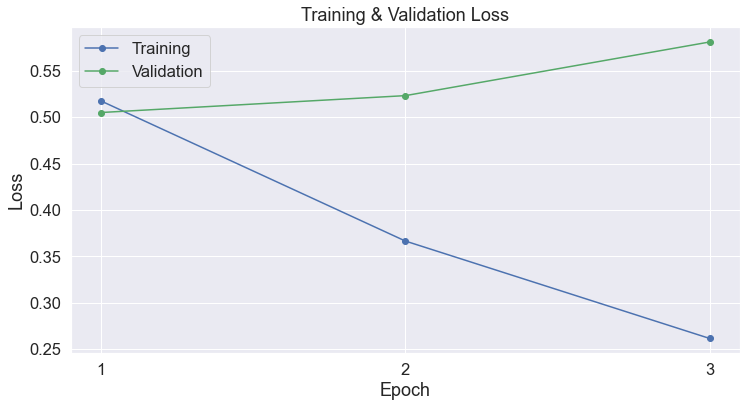

Bert Train
F1 macro: 0.9352700304682579
Accuracy:  0.9366666666666666

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.93      0.94      5217
           1       0.91      0.94      0.93      3783

    accuracy                           0.94      9000
   macro avg       0.93      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000

Bert Dev
F1 macro: 0.7477992723355897
Accuracy:  0.749

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.71      0.77       573
           1       0.67      0.80      0.73       427

    accuracy                           0.75      1000
   macro avg       0.75      0.76      0.75      1000
weighted avg       0.76      0.75      0.75      1000

Bert Test
F1 macro: 0.5965216691194063
Accuracy:  0.608

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.38  

Training Loss                      Valid. Loss  Valid. Accur  \
epoch                                                                 
1           0.517660  tensor(0.5052, device='cuda:0')         0.752   
2           0.366646  tensor(0.5234, device='cuda:0')         0.747   
3           0.261624  tensor(0.5812, device='cuda:0')         0.749   

       Valid. F1 Training Time Validation Time  
epoch                                           
1       0.749288       0:01:49         0:00:04  
2       0.745159       0:01:49         0:00:04  
3       0.747799       0:01:50         0:00:04

In [91]:
df_stats = stats_training(training_stats)

y_pred_train_english_bert = evaluate(model, english_train_english_bert, device, batch_size, "Bert Train")
y_pred_dev_english_bert = evaluate(model, english_dev_english_bert, device, batch_size, "Bert Dev")
y_pred_test_english_bert = evaluate(model, english_test_english_bert, device, batch_size, "Bert Test")

df_stats

In [92]:
description = """Pretrained model with bert-base-uncased checkpoint (12 layers). Trained 3 epochs with a batch size of 32 and using AdamW optimizer with lr=2e-5 and eps=1e-8.
Hastags and user have been removed from input text, followed by the same procedure as in method direct_replacement().
Bert Pooler layer smotes uses SMOTE_TomekLinks to oversample embeddings of [CLS] token before inputting into the classification layer."""
#Bert Pooler layer is modified to use the avarage of the last 2 layers instead of just [CLS]."""

save_results(y_pred_train_english_bert, english_train.index, "Bert SMOTE_TomekLinks", "hateval2019/task1", "english", dataset_types.train, group="deep_learning", filename="bert-avarage-smote-tomeklinks", description=description)
save_results(y_pred_dev_english_bert, english_dev.index, "Bert SMOTE_TomekLinks", "hateval2019/task1", "english", dataset_types.development, group="deep_learning", filename="bert-avarage-smote-tomeklinks", description=description)
save_results(y_pred_test_english_bert, english_test.index, "Bert SMOTE_TomekLinks", "hateval2019/task1", "english", dataset_types.test, group="deep_learning", filename="bert-avarage-smote-tomeklinks", description=description)

Results saved on: ./results/hateval2019/task1/english/train/deep_learning/bert-avarage-smote-tomeklinks.pkl
Results saved on: ./results/hateval2019/task1/english/development/deep_learning/bert-avarage-smote-tomeklinks.pkl
Results saved on: ./results/hateval2019/task1/english/test/deep_learning/bert-avarage-smote-tomeklinks.pkl


#### Spanish

In [93]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

#model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased')
model = BertForSequenceClassificationAvarage.from_pretrained('bert-base-multilingual-uncased')
#model = BertForSequenceClassificationSmote.from_pretrained('bert-base-multilingual-uncased')

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

In [94]:
from transformers import AdamW

print_example_nn(tokenizer, spanish_train.text.iloc[0], X_train_spanish_nn.iloc[0])

max_length_spanish = measure_max_length(tokenizer, [X_train_spanish_nn, X_dev_spanish_nn, X_test_spanish_nn])

spanish_train_bert = generate_dataset(tokenizer, X_train_spanish_nn, spanish_train["HS"], max_length_spanish)
spanish_dev_bert = generate_dataset(tokenizer, X_dev_spanish_nn, spanish_dev["HS"], max_length_spanish)
spanish_test_bert = generate_dataset(tokenizer, X_test_spanish_nn, spanish_test["HS"],max_length_spanish)

device = torch.device('cuda:0')

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # learning_rate - default is 5e-5
                  eps = 1e-8 # epsilon  - default is 1e-8.
                )

batch_size = 16
epochs = 3

 Original:  Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Tokenized:  ['easy', '##jet', 'quiere', 'du', '##pli', '##car', 'el', 'numero', 'de', 'mujeres', 'piloto', "'", 'vera', '##s', 'tu', 'para', 'apa', '##rca', '##r', 'el', 'avion', '.', '.', 'http', ':', '/', '/', 't', '.', 'co', '/', '46', '##nul', '##km', '##0', '##9', '##x']
Token IDs:  [24806, 17996, 63644, 10169, 64422, 15740, 10117, 11855, 10102, 20594, 33525, 112, 17140, 10107, 10689, 10239, 20986, 30470, 10131, 10117, 25361, 119, 119, 10635, 131, 120, 120, 162, 119, 10348, 120, 11703, 42668, 22782, 10995, 11518, 10661]

 Preprocessed:  easyjet quiere duplicar el numero de mujeres piloto' veras tu para aparcar el avion.. 
Tokenized:  ['easy', '##jet', 'quiere', 'du', '##pli', '##car', 'el', 'numero', 'de', 'mujeres', 'piloto', "'", 'vera', '##s', 'tu', 'para', 'apa', '##rca', '##r', 'el', 'avion', '.', '.']
Token IDs:  [24806, 17996, 63644, 10169, 64422, 15740, 

In [95]:
training_stats = train(model, spanish_train_bert, spanish_dev_bert, optimizer, batch_size, epochs, device)


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:14.
  Batch    80  of    282.    Elapsed: 0:00:28.
  Batch   120  of    282.    Elapsed: 0:00:42.
  Batch   160  of    282.    Elapsed: 0:00:56.
  Batch   200  of    282.    Elapsed: 0:01:10.
  Batch   240  of    282.    Elapsed: 0:01:24.
  Batch   280  of    282.    Elapsed: 0:01:38.

  Average training loss: 0.50
  Training epcoh took: 0:01:38

Running Validation...
  Accuracy: 0.80
  F1 macro: 0.80
  Validation Loss: 0.51
  Validation took: 0:00:03

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    282.    Elapsed: 0:00:14.
  Batch    80  of    282.    Elapsed: 0:00:28.
  Batch   120  of    282.    Elapsed: 0:00:42.
  Batch   160  of    282.    Elapsed: 0:00:55.
  Batch   200  of    282.    Elapsed: 0:01:09.
  Batch   240  of    282.    Elapsed: 0:01:23.
  Batch   280  of    282.    Elapsed: 0:01:37.

  Average training loss: 0.31
  Training epcoh took: 0:01:37

Running Validation...
 

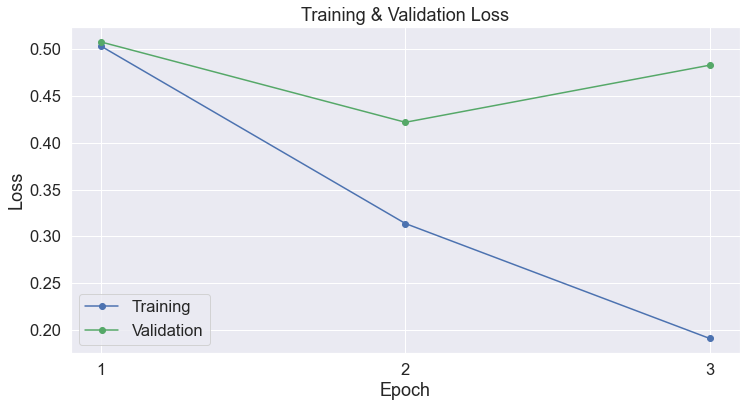

Bert Train
F1 macro: 0.9652250943040535
Accuracy:  0.9662222222222222

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2643
           1       0.95      0.97      0.96      1857

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500

Bert Dev
F1 macro: 0.8279178054458953
Accuracy:  0.83

Classification Report

               precision    recall  f1-score   support

           0       0.85      0.85      0.85       278
           1       0.81      0.81      0.81       222

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500

Bert Test
F1 macro: 0.7540755800903425
Accuracy:  0.755625

Classification Report

               precision    recall  f1-score   support

           0       0.85      0.71

Training Loss                      Valid. Loss  Valid. Accur  \
epoch                                                                 
1           0.502946  tensor(0.5074, device='cuda:0')         0.798   
2           0.313700  tensor(0.4217, device='cuda:0')         0.820   
3           0.191064  tensor(0.4826, device='cuda:0')         0.830   

       Valid. F1 Training Time Validation Time  
epoch                                           
1       0.797863       0:01:38         0:00:03  
2       0.819928       0:01:37         0:00:03  
3       0.827918       0:01:38         0:00:03

In [96]:
df_stats = stats_training(training_stats)

y_pred_train_spanish_bert = evaluate(model, spanish_train_bert, device, batch_size, "Bert Train")
y_pred_dev_spanish_bert = evaluate(model, spanish_dev_bert, device, batch_size, "Bert Dev")
y_pred_test_spanish_bert = evaluate(model, spanish_test_bert, device, batch_size, "Bert Test")

df_stats

In [97]:
description = """Pretrained model with bert-base-multilingual-uncased checkpoint (12 layers). Trained 3 epochs with a batch size of 16 and using AdamW optimizer with lr=2e-5 and eps=1e-8.
Hastags and user have been removed from input text, followed by the same procedure as in method direct_replacement().
Bert Pooler layer is modified to use the avarage of the last 2 layers instead of just [CLS]."""
#Bert Pooler layer smotes uses SMOTE_TomekLinks to oversample embeddings of [CLS] token before inputting into the classification layer."""  bert-smote-tomeklinks
#Bert Pooler layer is modified to use the avarage of the last 2 layers instead of just [CLS].""" bert-avarage-2layers

save_results(y_pred_train_spanish_bert, spanish_train.index, "Bert Avarage", "hateval2019/task1", "spanish", dataset_types.train, group="deep_learning", filename="bert-avarage-2layers", description=description)
save_results(y_pred_dev_spanish_bert, spanish_dev.index, "Bert Avarage", "hateval2019/task1", "spanish", dataset_types.development, group="deep_learning", filename="bert-avarage-2layers", description=description)
save_results(y_pred_test_spanish_bert, spanish_test.index, "Bert Avarage", "hateval2019/task1", "spanish", dataset_types.test, group="deep_learning", filename="bert-avarage-2layers", description=description)

Results saved on: ./results/hateval2019/task1/spanish/train/deep_learning/bert-avarage-2layers.pkl
Results saved on: ./results/hateval2019/task1/spanish/development/deep_learning/bert-avarage-2layers.pkl
Results saved on: ./results/hateval2019/task1/spanish/test/deep_learning/bert-avarage-2layers.pkl


### Detoxis

In [45]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased')
#model = BertForSequenceClassificationAvarage.from_pretrained('bert-base-multilingual-uncased')

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

In [46]:
from transformers import AdamW

print_example_nn(tokenizer, detoxis_train.comment.iloc[0], X_train_detoxis_nn.iloc[0])

max_length_detoxis = measure_max_length(tokenizer, [X_train_detoxis_nn, X_dev_detoxis_nn, X_test_detoxis_nn])

detoxis_train_bert = generate_dataset(tokenizer, X_train_detoxis_nn, detoxis_train["toxicity"], max_length_detoxis)
detoxis_dev_bert = generate_dataset(tokenizer, X_dev_detoxis_nn, detoxis_dev["toxicity"], max_length_detoxis)
detoxis_test_bert = generate_dataset(tokenizer, X_test_detoxis_nn,  detoxis_test['toxicity'] if 'toxicity' in detoxis_test else None, max_length_detoxis)

device = torch.device('cuda:0')


"""optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # learning_rate - default is 5e-5
                  eps = 4e-7 # epsilon  - default is 1e-8
                )"""
pretrained = model.bert.parameters()
# Get names of pretrained parameters (including `bert.` prefix)
pretrained_names = [f'bert.{k}' for (k, v) in model.bert.named_parameters()]
new_params = [v for k, v in model.named_parameters() if k not in pretrained_names]

optimizer = AdamW([{'params': pretrained}, {'params': new_params, 'lr': 1e-3}], lr=2e-5, eps=4e-7)


batch_size = 4
epochs = 2

 Original:  luego hay un juicio en el que, si no ha habido agresión, multan al chaval por faltas leves: unos 8 euros día durante 90 días. la anciana no ve un duro por ser falta leve, aparte de tener que costearse un abogado: unos 500 euros mínimo. sin comerlo ni beberlo has tenido que costearte 500 euros por dar un escarmiento al chaval.
Tokenized:  ['luego', 'hay', 'un', 'juicio', 'en', 'el', 'que', ',', 'si', 'no', 'ha', 'hab', '##ido', 'ag', '##resion', ',', 'multa', '##n', 'al', 'cha', '##val', 'por', 'falta', '##s', 'leve', '##s', ':', 'unos', '8', 'euros', 'dia', 'durante', '90', 'dias', '.', 'la', 'anc', '##iana', 'no', 've', 'un', 'duro', 'por', 'ser', 'falta', 'leve', ',', 'aparte', 'de', 'tener', 'que', 'coste', '##arse', 'un', 'abogado', ':', 'unos', '500', 'euros', 'minimo', '.', 'sin', 'comer', '##lo', 'ni', 'bebe', '##rlo', 'has', 'tenido', 'que', 'coste', '##arte', '500', 'euros', 'por', 'dar', 'un', 'es', '##car', '##miento', 'al', 'cha', '##val', '.']
Token IDs:  [1551

In [100]:
training_stats = train(model, detoxis_train_bert, detoxis_dev_bert, optimizer, batch_size, epochs, device, f1_average='binary')


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:29.
  Batch   120  of    693.    Elapsed: 0:00:43.
  Batch   160  of    693.    Elapsed: 0:00:58.
  Batch   200  of    693.    Elapsed: 0:01:12.
  Batch   240  of    693.    Elapsed: 0:01:26.
  Batch   280  of    693.    Elapsed: 0:01:41.
  Batch   320  of    693.    Elapsed: 0:01:55.
  Batch   360  of    693.    Elapsed: 0:02:09.
  Batch   400  of    693.    Elapsed: 0:02:24.
  Batch   440  of    693.    Elapsed: 0:02:38.
  Batch   480  of    693.    Elapsed: 0:02:53.
  Batch   520  of    693.    Elapsed: 0:03:07.
  Batch   560  of    693.    Elapsed: 0:03:21.
  Batch   600  of    693.    Elapsed: 0:03:36.
  Batch   640  of    693.    Elapsed: 0:03:50.
  Batch   680  of    693.    Elapsed: 0:04:04.

  Average training loss: 0.62
  Training epcoh took: 0:04:09

Running Validation...
  Accuracy: 0.75
  F1 binary: 0.65
  Validation Loss: 0.51
  Validation t

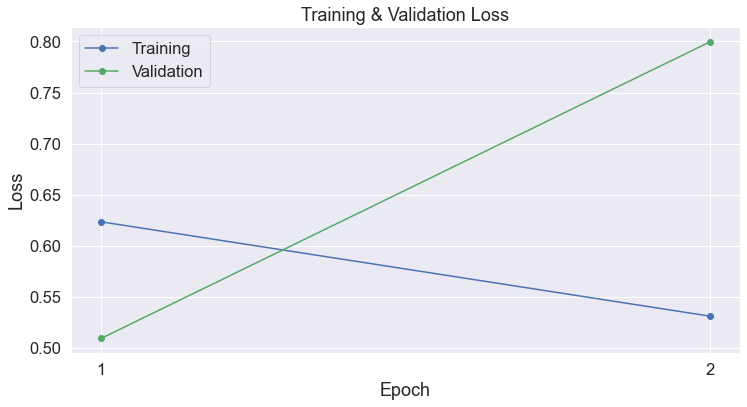

Detoxis Train
F1 binary: 0.8645771732702543
Accuracy:  0.9173285198555957

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1869
           1       0.93      0.81      0.86       901

    accuracy                           0.92      2770
   macro avg       0.92      0.89      0.90      2770
weighted avg       0.92      0.92      0.92      2770

Detoxis Dev
F1 binary: 0.6477541371158392
Accuracy:  0.784992784992785

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.91      0.85       447
           1       0.77      0.56      0.65       246

    accuracy                           0.78       693
   macro avg       0.78      0.73      0.75       693
weighted avg       0.78      0.78      0.78       693

Detoxis Test
F1 binary: 0.515695067264574
Accuracy:  0.7575757575757576

Classification Report

               precision    recall  f1-score   support


Training Loss                      Valid. Loss  Valid. Accur  \
epoch                                                                 
1           0.623372  tensor(0.5091, device='cuda:0')      0.750361   
2           0.530966  tensor(0.7995, device='cuda:0')      0.784993   

       Valid. F1 Training Time Validation Time  
epoch                                           
1       0.653307       0:04:09         0:00:18  
2       0.647754       0:04:11         0:00:18

In [101]:
df_stats = stats_training(training_stats)

y_pred_train_detoxis_bert = evaluate(model, detoxis_train_bert, device, batch_size, "Detoxis Train", f1_average='binary')
y_pred_dev_detoxis_bert = evaluate(model, detoxis_dev_bert, device, batch_size, "Detoxis Dev", f1_average='binary')
y_pred_test_detoxis_bert = evaluate(model, detoxis_test_bert, device, batch_size, "Detoxis Test", f1_average='binary')

df_stats

In [102]:
description = """Pretrained model with bert-base-multilingual-uncased checkpoint (12 layers). Trained 2 epochs with a batch size of 4 and using AdamW optimizer with lr=2e-5 for the pretained model,
lr=1e-3 for the new model and eps=4e-7. Hastags and user have been removed from input text, followed by the same procedure as in method direct_replacement().
Bert Pooler layer is modified to use the avarage of the last 2 layers instead of just [CLS]."""

save_results(y_pred_train_detoxis_bert, range(len(detoxis_train.index)), "Bert Avarage (2 epochs| differnt lr)", "detoxis/task1", "spanish", dataset_types.train, group="deep_learning", filename="bert-avarage-lr-2", description=description)
save_results(y_pred_dev_detoxis_bert, range(len(detoxis_dev.index)), "Bert Avarage (2 epochs| differnt lr)", "detoxis/task1", "spanish", dataset_types.development, group="deep_learning", filename="bert-avarage-lr-2", description=description)
save_results(y_pred_test_detoxis_bert, range(len(detoxis_test.index)), "Bert Avarage (2 epochs| differnt lr)", "detoxis/task1", "spanish", dataset_types.test, group="deep_learning", filename="bert-avarage-lr-2", description=description)

Results saved on: ./results/detoxis/task1/spanish/train/deep_learning/bert-avarage-lr-2.pkl
Results saved on: ./results/detoxis/task1/spanish/development/deep_learning/bert-avarage-lr-2.pkl
Results saved on: ./results/detoxis/task1/spanish/test/deep_learning/bert-avarage-lr-2.pkl


### Cross validation
#### Detoxis

In [47]:
X_all_train_detoxis_nn = X_train_detoxis_nn.append(X_dev_detoxis_nn).reset_index(drop=True)
detoxis_all_train = detoxis_train.append(detoxis_dev).reset_index(drop=True)

detoxis_all_train_bert = generate_dataset(tokenizer, X_all_train_detoxis_nn, detoxis_all_train["toxicity"], max_length_detoxis)

if "optimizer" in globals():
    params = optimizer.param_groups[0]
    if "initial_lr" in params:
        lr = params["initial_lr"]
    else:
        lr = params["lr"]
    eps = params["eps"]
    del optimizer
if "model" in globals():
    del model
torch.cuda.empty_cache()

def generate_model_and_optimizer():
    model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased').cuda()
    return model, AdamW(model.parameters(), lr=lr, eps=eps)

 FOLD 1
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:15.
  Batch    80  of    693.    Elapsed: 0:00:30.
  Batch   120  of    693.    Elapsed: 0:00:45.
  Batch   160  of    693.    Elapsed: 0:01:00.
  Batch   200  of    693.    Elapsed: 0:01:15.
  Batch   240  of    693.    Elapsed: 0:01:31.
  Batch   280  of    693.    Elapsed: 0:01:46.
  Batch   320  of    693.    Elapsed: 0:02:01.
  Batch   360  of    693.    Elapsed: 0:02:16.
  Batch   400  of    693.    Elapsed: 0:02:31.
  Batch   440  of    693.    Elapsed: 0:02:46.
  Batch   480  of    693.    Elapsed: 0:03:01.
  Batch   520  of    693.    Elapsed: 0:03:16.
  Batch   560  of    693.    Elapsed: 0:03:31.
  Batch   600  of    693.    Elapsed: 0:03:46.
  Batch   640  of    693.    Elapsed: 0:04:02.
  Batch   680  of    693.    Elapsed: 0:04:17.

  Average training loss: 0.60
  Training epcoh took: 0:04:21

Running Validation...
  Accuracy: 0.74
  F1 binary: 0

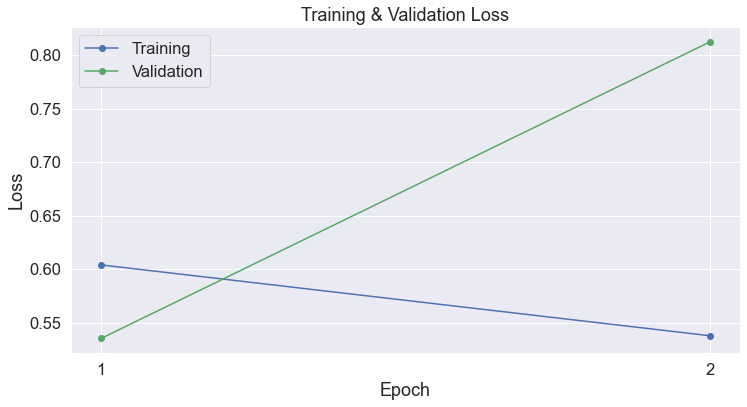

Train Detoxis
F1 binary: 0.8145114101813926
Accuracy:  0.8855595667870036

Classification Report

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1852
           1       0.88      0.76      0.81       918

    accuracy                           0.89      2770
   macro avg       0.88      0.85      0.87      2770
weighted avg       0.89      0.89      0.88      2770

Dev Detoxis
F1 binary: 0.5885167464114833
Accuracy:  0.7518037518037518

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.86      0.82       464
           1       0.65      0.54      0.59       229

    accuracy                           0.75       693
   macro avg       0.72      0.70      0.71       693
weighted avg       0.74      0.75      0.75       693

 FOLD 2
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:15.
  Batch    80  of 

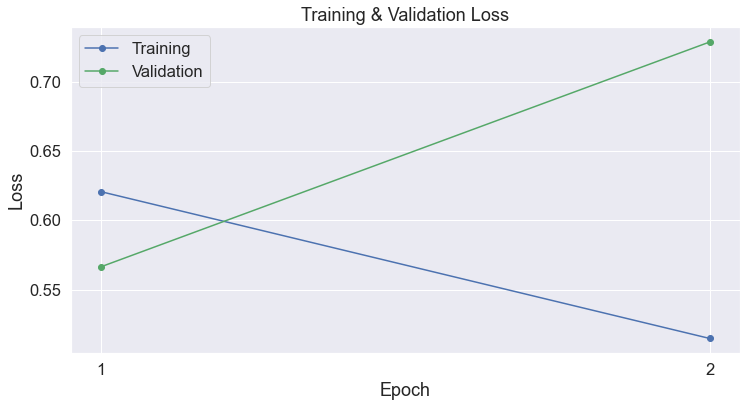

Train Detoxis
F1 binary: 0.7819641754169241
Accuracy:  0.8725631768953068

Classification Report

               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1853
           1       0.90      0.69      0.78       917

    accuracy                           0.87      2770
   macro avg       0.88      0.83      0.85      2770
weighted avg       0.88      0.87      0.87      2770

Dev Detoxis
F1 binary: 0.5078534031413614
Accuracy:  0.7287157287157288

Classification Report

               precision    recall  f1-score   support

           0       0.75      0.88      0.81       463
           1       0.64      0.42      0.51       230

    accuracy                           0.73       693
   macro avg       0.70      0.65      0.66       693
weighted avg       0.72      0.73      0.71       693

 FOLD 3
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:15.
  Batch    80  of 

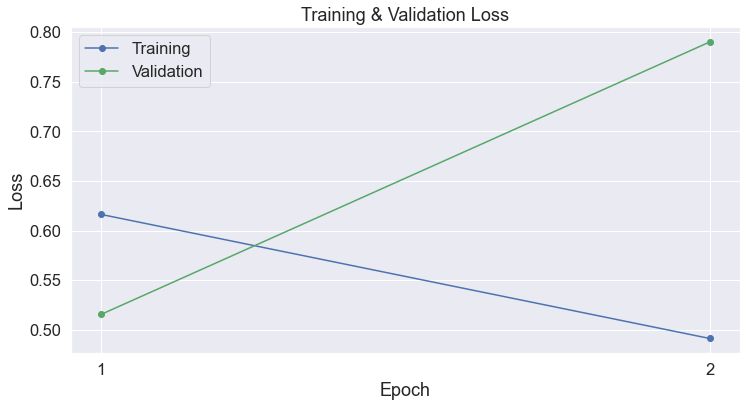

Train Detoxis
F1 binary: 0.8125
Accuracy:  0.8895306859205776

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1853
           1       0.93      0.72      0.81       917

    accuracy                           0.89      2770
   macro avg       0.90      0.85      0.87      2770
weighted avg       0.89      0.89      0.89      2770

Dev Detoxis
F1 binary: 0.5916870415647921
Accuracy:  0.759018759018759

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.87      0.83       463
           1       0.68      0.53      0.59       230

    accuracy                           0.76       693
   macro avg       0.73      0.70      0.71       693
weighted avg       0.75      0.76      0.75       693

 FOLD 4
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    El

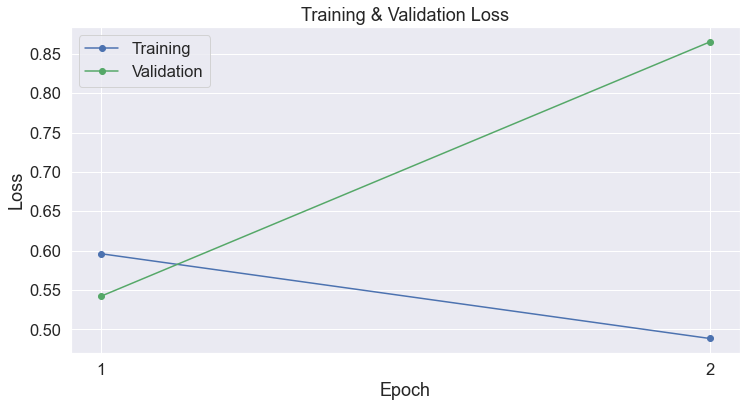

Train Detoxis
F1 binary: 0.8466042154566745
Accuracy:  0.9054492962829304

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1853
           1       0.92      0.79      0.85       918

    accuracy                           0.91      2771
   macro avg       0.91      0.88      0.89      2771
weighted avg       0.91      0.91      0.90      2771

Dev Detoxis
F1 binary: 0.5811138014527845
Accuracy:  0.75

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.86      0.82       463
           1       0.65      0.52      0.58       229

    accuracy                           0.75       692
   macro avg       0.72      0.69      0.70       692
weighted avg       0.74      0.75      0.74       692

 FOLD 5
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Ela

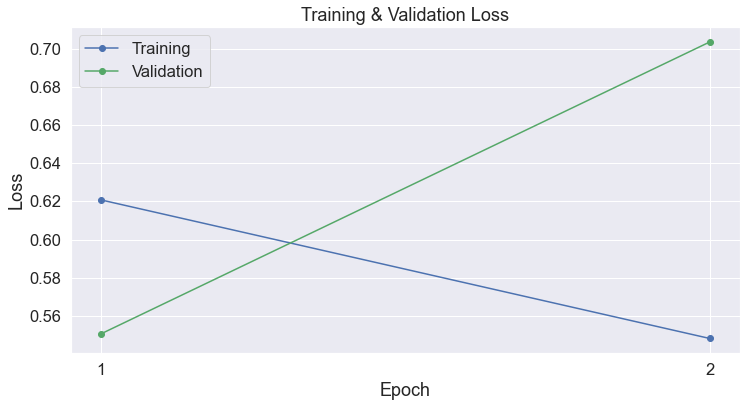

Train Detoxis
F1 binary: 0.7832835820895524
Accuracy:  0.8690003608805486

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1853
           1       0.87      0.71      0.78       918

    accuracy                           0.87      2771
   macro avg       0.87      0.83      0.84      2771
weighted avg       0.87      0.87      0.87      2771

Dev Detoxis
F1 binary: 0.6231155778894472
Accuracy:  0.7832369942196532

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.90      0.85       463
           1       0.73      0.54      0.62       229

    accuracy                           0.78       692
   macro avg       0.77      0.72      0.74       692
weighted avg       0.78      0.78      0.77       692



In [48]:
train_scores, test_scores = cross_validation(generate_model_and_optimizer, detoxis_all_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')

In [49]:
# 2 Epoch + all train data
stats_cv(train_scores, test_scores)

 FOLD 1
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:56.
  Batch   200  of    554.    Elapsed: 0:01:10.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:21.
  Batch   440  of    554.    Elapsed: 0:02:35.
  Batch   480  of    554.    Elapsed: 0:02:49.
  Batch   520  of    554.    Elapsed: 0:03:03.

  Average training loss: 0.61
  Training epcoh took: 0:03:15

Running Validation...
  Accuracy: 0.72
  F1 binary: 0.29
  Validation Loss: 0.60
  Validation took: 0:00:14

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

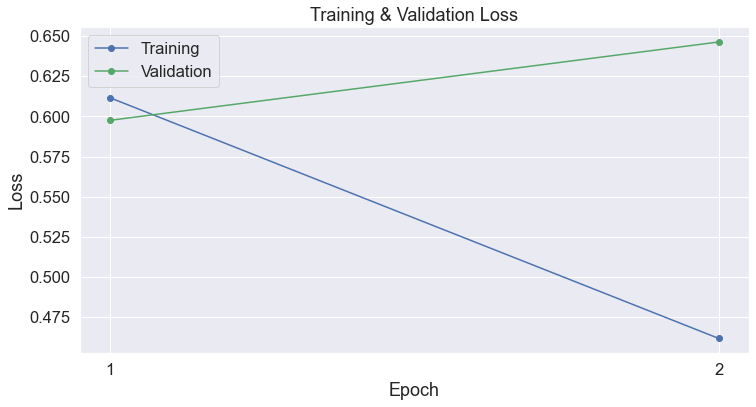

Train Detoxis
F1 binary: 0.8033794162826421
Accuracy:  0.8844765342960289

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1495
           1       0.90      0.73      0.80       721

    accuracy                           0.88      2216
   macro avg       0.89      0.84      0.86      2216
weighted avg       0.89      0.88      0.88      2216

Dev Detoxis
F1 binary: 0.5049180327868852
Accuracy:  0.7274368231046932

Classification Report

               precision    recall  f1-score   support

           0       0.76      0.87      0.81       374
           1       0.62      0.43      0.50       180

    accuracy                           0.73       554
   macro avg       0.69      0.65      0.66       554
weighted avg       0.71      0.73      0.71       554

 FOLD 2
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

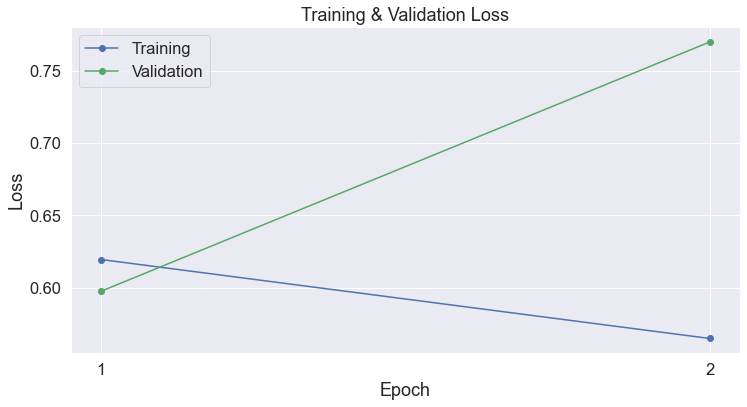

Train Detoxis
F1 binary: 0.7584000000000001
Accuracy:  0.8637184115523465

Classification Report

               precision    recall  f1-score   support

           0       0.85      0.96      0.91      1495
           1       0.90      0.66      0.76       721

    accuracy                           0.86      2216
   macro avg       0.87      0.81      0.83      2216
weighted avg       0.87      0.86      0.86      2216

Dev Detoxis
F1 binary: 0.5298013245033112
Accuracy:  0.7436823104693141

Classification Report

               precision    recall  f1-score   support

           0       0.77      0.89      0.82       374
           1       0.66      0.44      0.53       180

    accuracy                           0.74       554
   macro avg       0.71      0.67      0.68       554
weighted avg       0.73      0.74      0.73       554

 FOLD 3
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

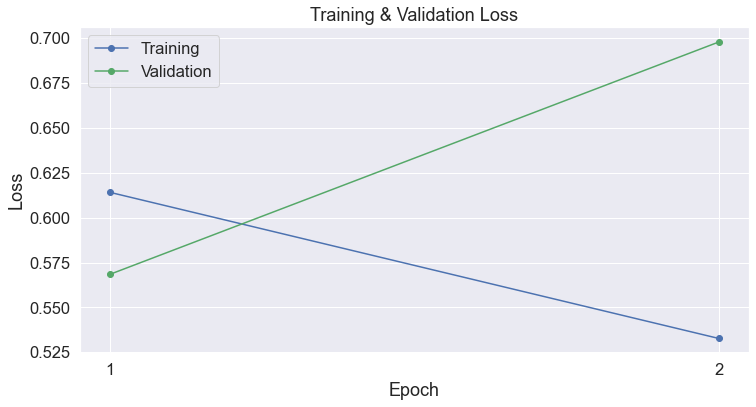

Train Detoxis
F1 binary: 0.7972972972972974
Accuracy:  0.878158844765343

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1495
           1       0.87      0.74      0.80       721

    accuracy                           0.88      2216
   macro avg       0.88      0.84      0.86      2216
weighted avg       0.88      0.88      0.88      2216

Dev Detoxis
F1 binary: 0.5294117647058824
Accuracy:  0.740072202166065

Classification Report

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       374
           1       0.64      0.45      0.53       180

    accuracy                           0.74       554
   macro avg       0.71      0.66      0.67       554
weighted avg       0.73      0.74      0.73       554

 FOLD 4
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of   

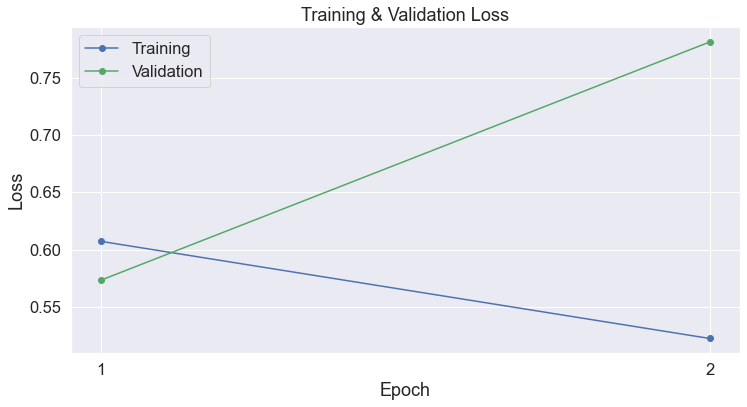

Train Detoxis
F1 binary: 0.7975174553917767
Accuracy:  0.8822202166064982

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1495
           1       0.90      0.71      0.80       721

    accuracy                           0.88      2216
   macro avg       0.89      0.84      0.86      2216
weighted avg       0.88      0.88      0.88      2216

Dev Detoxis
F1 binary: 0.5945945945945946
Accuracy:  0.7563176895306859

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       374
           1       0.65      0.55      0.59       180

    accuracy                           0.76       554
   macro avg       0.72      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554

 FOLD 5
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

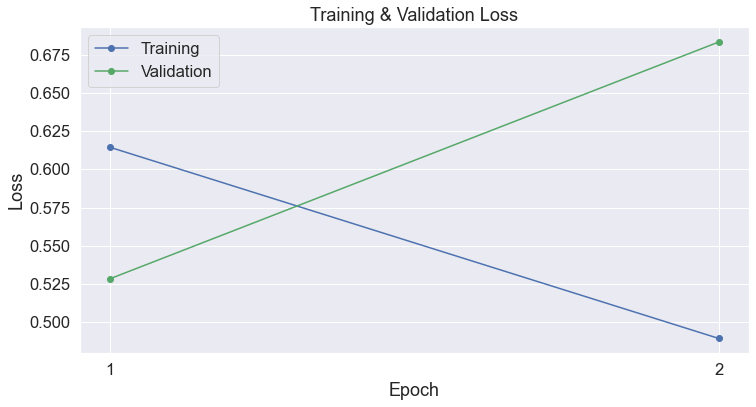

Train Detoxis
F1 binary: 0.8425720620842572
Accuracy:  0.9038808664259927

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1496
           1       0.90      0.79      0.84       720

    accuracy                           0.90      2216
   macro avg       0.90      0.87      0.89      2216
weighted avg       0.90      0.90      0.90      2216

Dev Detoxis
F1 binary: 0.5830721003134796
Accuracy:  0.759927797833935

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.88      0.83       373
           1       0.67      0.51      0.58       181

    accuracy                           0.76       554
   macro avg       0.73      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



In [50]:
# 2 Epoch
train_scores, test_scores = cross_validation(generate_model_and_optimizer, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

In [51]:
test_scores

F1 binary  Accuracy
0   0.504918  0.727437
1   0.529801  0.743682
2   0.529412  0.740072
3   0.594595  0.756318
4   0.583072  0.759928

 FOLD 1
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of    554.    Elapsed: 0:00:31.
  Batch   120  of    554.    Elapsed: 0:00:46.
  Batch   160  of    554.    Elapsed: 0:01:01.
  Batch   200  of    554.    Elapsed: 0:01:17.
  Batch   240  of    554.    Elapsed: 0:01:32.
  Batch   280  of    554.    Elapsed: 0:01:47.
  Batch   320  of    554.    Elapsed: 0:02:03.
  Batch   360  of    554.    Elapsed: 0:02:18.
  Batch   400  of    554.    Elapsed: 0:02:33.
  Batch   440  of    554.    Elapsed: 0:02:49.
  Batch   480  of    554.    Elapsed: 0:03:04.
  Batch   520  of    554.    Elapsed: 0:03:19.

  Average training loss: 0.61
  Training epcoh took: 0:03:32

Running Validation...
  Accuracy: 0.75
  F1 binary: 0.46
  Validation Loss: 0.56
  Validation took: 0:00:15

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of    554.    Elapsed: 0:00:

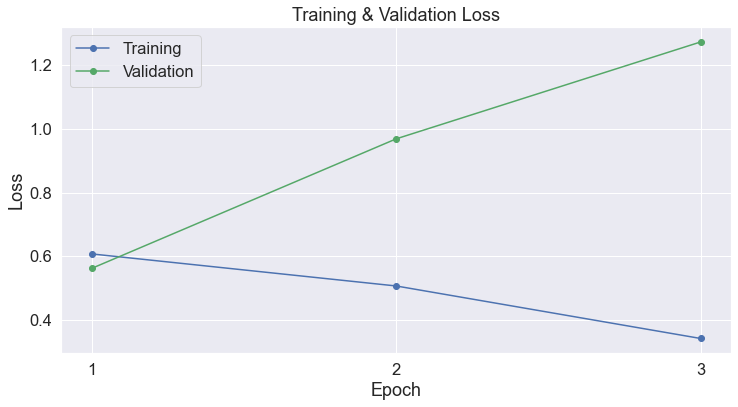

Train Detoxis
F1 binary: 0.9198012775017743
Accuracy:  0.9490072202166066

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.94      0.90      0.92       721

    accuracy                           0.95      2216
   macro avg       0.95      0.94      0.94      2216
weighted avg       0.95      0.95      0.95      2216

Dev Detoxis
F1 binary: 0.5578635014836796
Accuracy:  0.7310469314079422

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.83      0.81       374
           1       0.60      0.52      0.56       180

    accuracy                           0.73       554
   macro avg       0.69      0.68      0.68       554
weighted avg       0.72      0.73      0.73       554

 FOLD 2
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of 

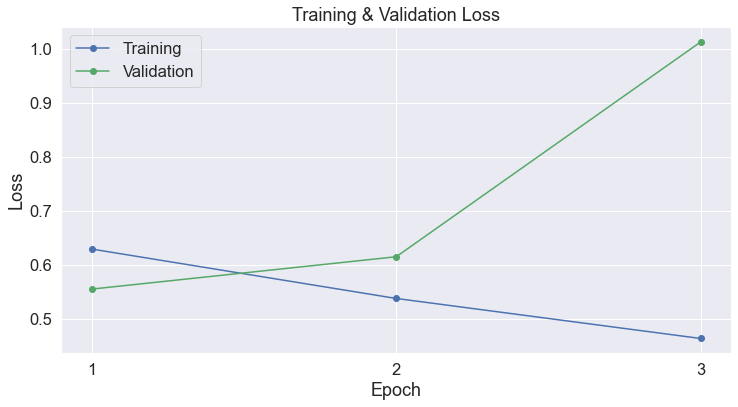

Train Detoxis
F1 binary: 0.8454404945904173
Accuracy:  0.9097472924187726

Classification Report

               precision    recall  f1-score   support

           0       0.89      0.98      0.94      1495
           1       0.95      0.76      0.85       721

    accuracy                           0.91      2216
   macro avg       0.92      0.87      0.89      2216
weighted avg       0.91      0.91      0.91      2216

Dev Detoxis
F1 binary: 0.5555555555555556
Accuracy:  0.7545126353790613

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       374
           1       0.67      0.47      0.56       180

    accuracy                           0.75       554
   macro avg       0.73      0.68      0.69       554
weighted avg       0.74      0.75      0.74       554

 FOLD 3
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

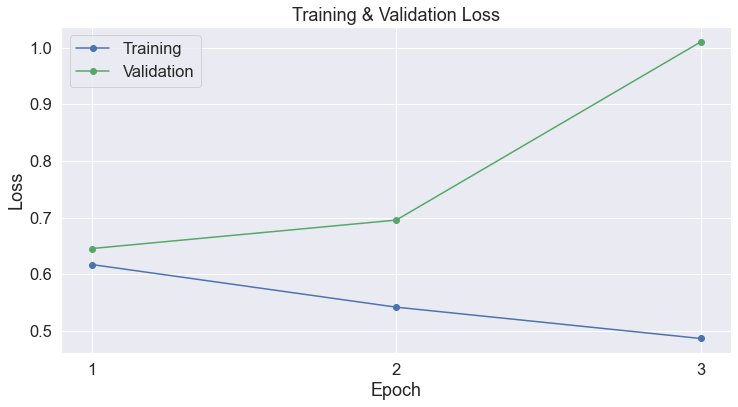

Train Detoxis
F1 binary: 0.8393393393393394
Accuracy:  0.9034296028880866

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1495
           1       0.91      0.78      0.84       721

    accuracy                           0.90      2216
   macro avg       0.91      0.87      0.89      2216
weighted avg       0.90      0.90      0.90      2216

Dev Detoxis
F1 binary: 0.5476923076923076
Accuracy:  0.7346570397111913

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.85      0.81       374
           1       0.61      0.49      0.55       180

    accuracy                           0.73       554
   macro avg       0.70      0.67      0.68       554
weighted avg       0.72      0.73      0.73       554

 FOLD 4
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

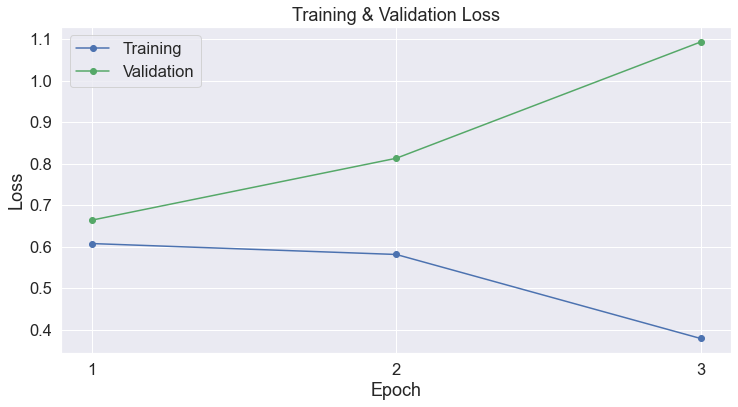

Train Detoxis
F1 binary: 0.9100071994240461
Accuracy:  0.9435920577617328

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1495
           1       0.95      0.88      0.91       721

    accuracy                           0.94      2216
   macro avg       0.94      0.93      0.93      2216
weighted avg       0.94      0.94      0.94      2216

Dev Detoxis
F1 binary: 0.6189111747851003
Accuracy:  0.759927797833935

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.84      0.82       374
           1       0.64      0.60      0.62       180

    accuracy                           0.76       554
   macro avg       0.73      0.72      0.72       554
weighted avg       0.76      0.76      0.76       554

 FOLD 5
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of  

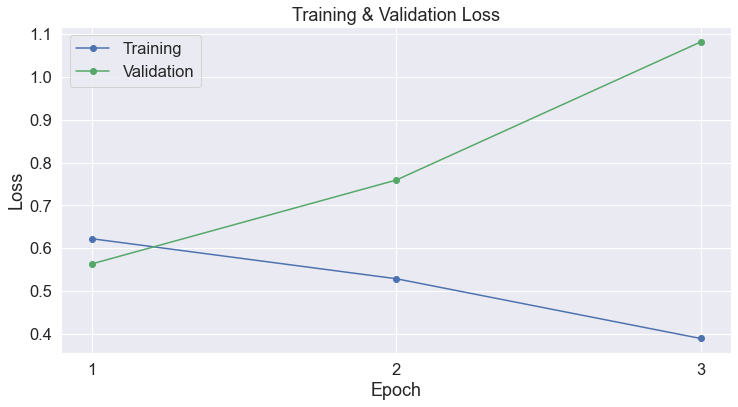

Train Detoxis
F1 binary: 0.9048656499636891
Accuracy:  0.9408844765342961

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1496
           1       0.95      0.87      0.90       720

    accuracy                           0.94      2216
   macro avg       0.94      0.92      0.93      2216
weighted avg       0.94      0.94      0.94      2216

Dev Detoxis
F1 binary: 0.5784615384615384
Accuracy:  0.7527075812274369

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.87      0.83       373
           1       0.65      0.52      0.58       181

    accuracy                           0.75       554
   macro avg       0.72      0.69      0.70       554
weighted avg       0.74      0.75      0.74       554



In [52]:
# 3 Epoch
epochs = 3
train_scores, test_scores = cross_validation(generate_model_and_optimizer, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

 FOLD 1
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:56.
  Batch   200  of    554.    Elapsed: 0:01:11.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:21.
  Batch   440  of    554.    Elapsed: 0:02:35.
  Batch   480  of    554.    Elapsed: 0:02:49.
  Batch   520  of    554.    Elapsed: 0:03:03.

  Average training loss: 0.63
  Training epcoh took: 0:03:15

Running Validation...
  Accuracy: 0.71
  F1 binary: 0.30
  Validation Loss: 0.57
  Validation took: 0:00:14

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

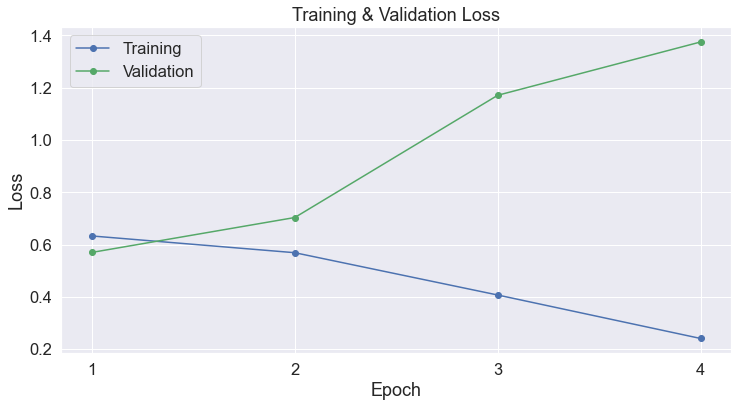

Train Detoxis
F1 binary: 0.9634317862165963
Accuracy:  0.9765342960288809

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1495
           1       0.98      0.95      0.96       721

    accuracy                           0.98      2216
   macro avg       0.98      0.97      0.97      2216
weighted avg       0.98      0.98      0.98      2216

Dev Detoxis
F1 binary: 0.6011560693641618
Accuracy:  0.7509025270758123

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.83      0.82       374
           1       0.63      0.58      0.60       180

    accuracy                           0.75       554
   macro avg       0.72      0.71      0.71       554
weighted avg       0.75      0.75      0.75       554

 FOLD 2
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

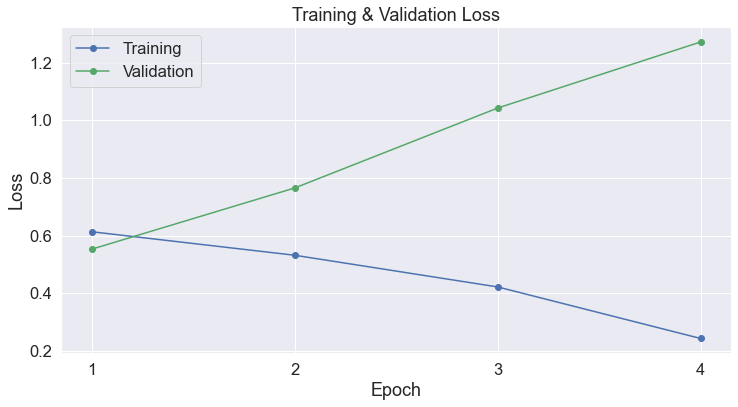

Train Detoxis
F1 binary: 0.9545454545454545
Accuracy:  0.9711191335740073

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1495
           1       0.98      0.93      0.95       721

    accuracy                           0.97      2216
   macro avg       0.97      0.96      0.97      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.6070287539936102
Accuracy:  0.7779783393501805

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.90      0.85       374
           1       0.71      0.53      0.61       180

    accuracy                           0.78       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.78      0.77       554

 FOLD 3
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of 

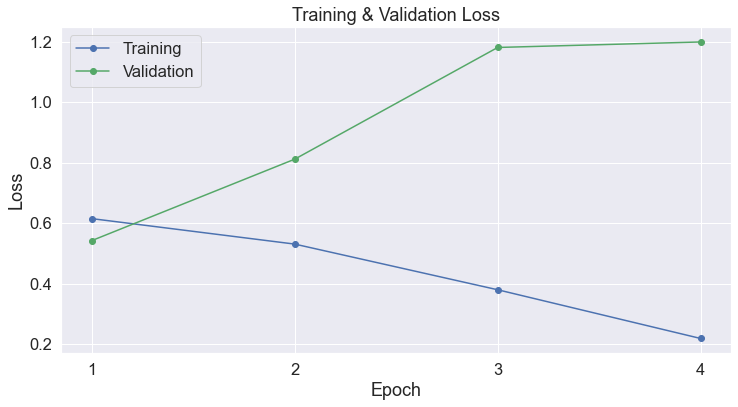

Train Detoxis
F1 binary: 0.9625970359915315
Accuracy:  0.9760830324909747

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1495
           1       0.98      0.95      0.96       721

    accuracy                           0.98      2216
   macro avg       0.98      0.97      0.97      2216
weighted avg       0.98      0.98      0.98      2216

Dev Detoxis
F1 binary: 0.5987261146496816
Accuracy:  0.7725631768953068

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.89      0.84       374
           1       0.70      0.52      0.60       180

    accuracy                           0.77       554
   macro avg       0.75      0.71      0.72       554
weighted avg       0.76      0.77      0.76       554

 FOLD 4
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

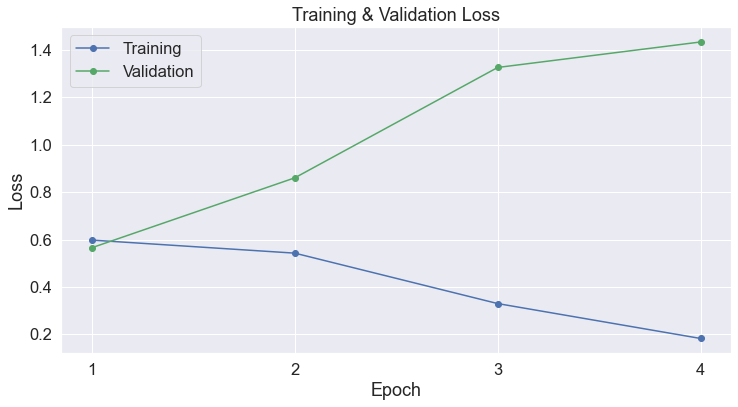

Train Detoxis
F1 binary: 0.966690290574061
Accuracy:  0.9787906137184116

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1495
           1       0.99      0.95      0.97       721

    accuracy                           0.98      2216
   macro avg       0.98      0.97      0.98      2216
weighted avg       0.98      0.98      0.98      2216

Dev Detoxis
F1 binary: 0.5930232558139535
Accuracy:  0.7472924187725631

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.83      0.82       374
           1       0.62      0.57      0.59       180

    accuracy                           0.75       554
   macro avg       0.71      0.70      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 5
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:17.
  Batch    80  of  

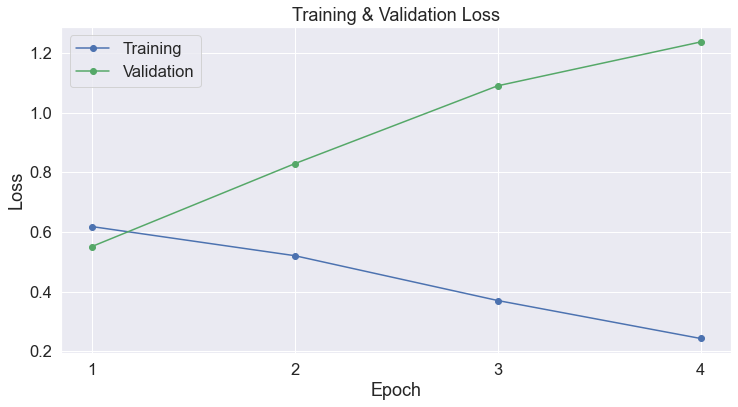

Train Detoxis
F1 binary: 0.9493219129193434
Accuracy:  0.9679602888086642

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1496
           1       0.98      0.92      0.95       720

    accuracy                           0.97      2216
   macro avg       0.97      0.96      0.96      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.572347266881029
Accuracy:  0.759927797833935

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       373
           1       0.68      0.49      0.57       181

    accuracy                           0.76       554
   macro avg       0.73      0.69      0.70       554
weighted avg       0.75      0.76      0.75       554



In [53]:
# 4 Epoch
epochs = 4
train_scores, test_scores = cross_validation(generate_model_and_optimizer, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

In [54]:
def generate_model_and_optimizer_avarage():
    model = BertForSequenceClassificationAvarage.from_pretrained('bert-base-multilingual-uncased').cuda()
    return model, AdamW(model.parameters(), lr=lr, eps=eps)

 FOLD 1
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of    554.    Elapsed: 0:00:29.
  Batch   120  of    554.    Elapsed: 0:00:44.
  Batch   160  of    554.    Elapsed: 0:00:58.
  Batch   200  of    554.    Elapsed: 0:01:13.
  Batch   240  of    554.    Elapsed: 0:01:27.
  Batch   280  of    554.    Elapsed: 0:01:42.
  Batch   320  of    554.    Elapsed: 0:01:56.
  Batch   360  of    554.    Elapsed: 0:02:11.
  Batch   400  of    554.    Elapsed: 0:02:25.
  Batch   440  of    554.    Elapsed: 0:02:40.
  Batch   480  of    554.    Elapsed: 0:02:54.
  Batch   520  of    554.    Elapsed: 0:03:09.

  Average training loss: 0.60
  Training epcoh took: 0:03:21

Running Validation...
  Accuracy: 0.74
  F1 binary: 0.52
  Validation Loss: 0.53
  Validation took: 0:00:14

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

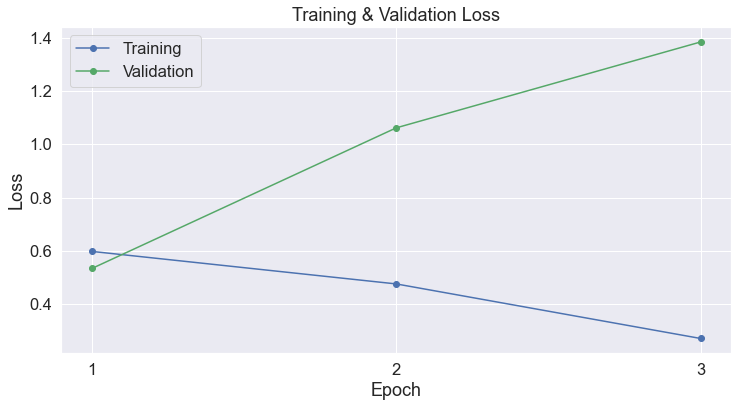

Train Detoxis
F1 binary: 0.950354609929078
Accuracy:  0.9684115523465704

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1495
           1       0.97      0.93      0.95       721

    accuracy                           0.97      2216
   macro avg       0.97      0.96      0.96      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.5681159420289854
Accuracy:  0.7310469314079422

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.82      0.80       374
           1       0.59      0.54      0.57       180

    accuracy                           0.73       554
   macro avg       0.69      0.68      0.69       554
weighted avg       0.73      0.73      0.73       554

 FOLD 2
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of  

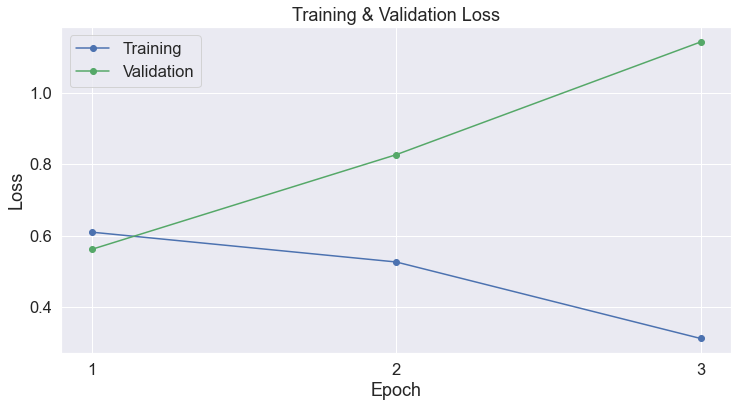

Train Detoxis
F1 binary: 0.9219547775346463
Accuracy:  0.9517148014440433

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1495
           1       0.97      0.88      0.92       721

    accuracy                           0.95      2216
   macro avg       0.96      0.93      0.94      2216
weighted avg       0.95      0.95      0.95      2216

Dev Detoxis
F1 binary: 0.5830721003134796
Accuracy:  0.759927797833935

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.88      0.83       374
           1       0.67      0.52      0.58       180

    accuracy                           0.76       554
   macro avg       0.73      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554

 FOLD 3
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of  

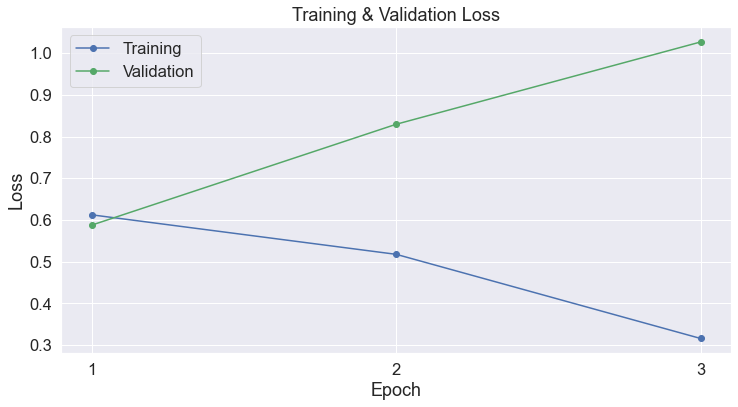

Train Detoxis
F1 binary: 0.9298998569384835
Accuracy:  0.9557761732851986

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1495
           1       0.96      0.90      0.93       721

    accuracy                           0.96      2216
   macro avg       0.96      0.94      0.95      2216
weighted avg       0.96      0.96      0.96      2216

Dev Detoxis
F1 binary: 0.5956112852664577
Accuracy:  0.7671480144404332

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.88      0.84       374
           1       0.68      0.53      0.60       180

    accuracy                           0.77       554
   macro avg       0.74      0.71      0.72       554
weighted avg       0.76      0.77      0.76       554

 FOLD 4
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of 

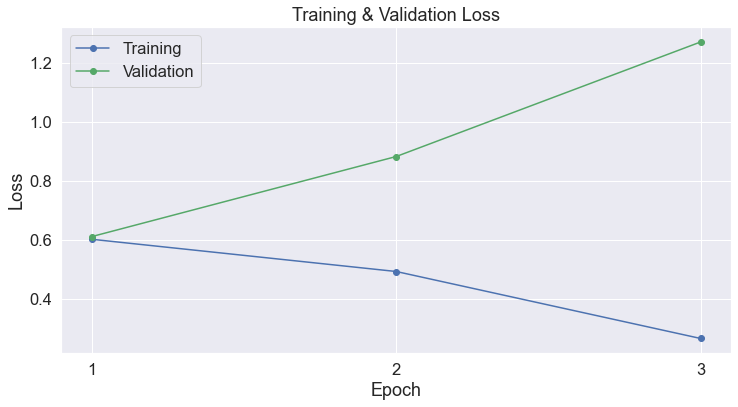

Train Detoxis
F1 binary: 0.9534717251252685
Accuracy:  0.9706678700361011

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1495
           1       0.99      0.92      0.95       721

    accuracy                           0.97      2216
   macro avg       0.97      0.96      0.97      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.5740181268882175
Accuracy:  0.7454873646209387

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       374
           1       0.63      0.53      0.57       180

    accuracy                           0.75       554
   macro avg       0.71      0.69      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 5
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:15.
  Batch    80  of 

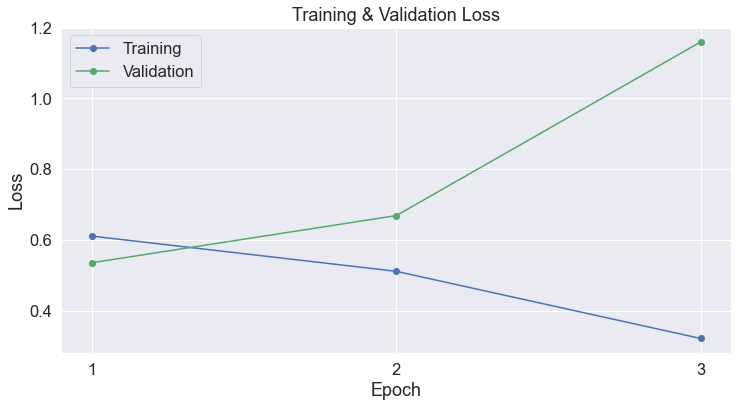

Train Detoxis
F1 binary: 0.9408410548823948
Accuracy:  0.9625451263537906

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1496
           1       0.97      0.92      0.94       720

    accuracy                           0.96      2216
   macro avg       0.96      0.95      0.96      2216
weighted avg       0.96      0.96      0.96      2216

Dev Detoxis
F1 binary: 0.6047904191616766
Accuracy:  0.7617328519855595

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       373
           1       0.66      0.56      0.60       181

    accuracy                           0.76       554
   macro avg       0.73      0.71      0.72       554
weighted avg       0.75      0.76      0.76       554



In [55]:
# 3 Epoch
epochs = 3
train_scores, test_scores = cross_validation(generate_model_and_optimizer_avarage, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

In [56]:
def generate_model_and_optimizer_avarage2():
    model = BertForSequenceClassificationAvarage.from_pretrained('bert-base-multilingual-uncased').cuda()
    
    pretrained = model.bert.parameters()
    # Get names of pretrained parameters (including `bert.` prefix)
    pretrained_names = [f'bert.{k}' for (k, v) in model.bert.named_parameters()]
    new_params = [v for k, v in model.named_parameters() if k not in pretrained_names]

    return model, AdamW([{'params': pretrained}, {'params': new_params, 'lr': 1e-3}], lr=lr, eps=eps)

 FOLD 1
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:57.
  Batch   200  of    554.    Elapsed: 0:01:11.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:21.
  Batch   440  of    554.    Elapsed: 0:02:36.
  Batch   480  of    554.    Elapsed: 0:02:50.
  Batch   520  of    554.    Elapsed: 0:03:04.

  Average training loss: 0.65
  Training epcoh took: 0:03:16

Running Validation...
  Accuracy: 0.75
  F1 binary: 0.49
  Validation Loss: 0.53
  Validation took: 0:00:14

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

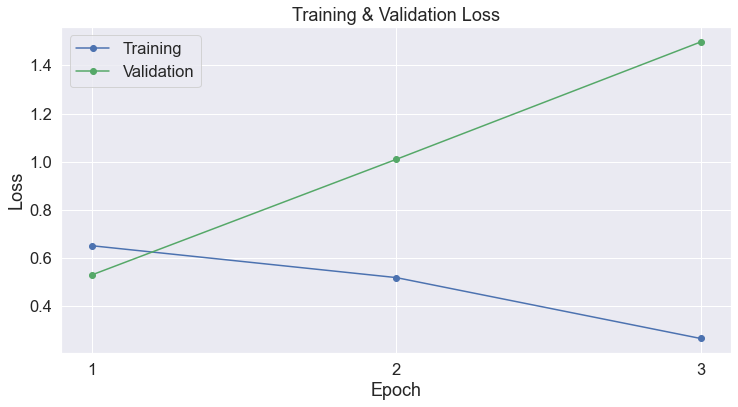

Train Detoxis
F1 binary: 0.9654199011997177
Accuracy:  0.9778880866425993

Classification Report

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1495
           1       0.98      0.95      0.97       721

    accuracy                           0.98      2216
   macro avg       0.98      0.97      0.97      2216
weighted avg       0.98      0.98      0.98      2216

Dev Detoxis
F1 binary: 0.586894586894587
Accuracy:  0.7382671480144405

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.82      0.81       374
           1       0.60      0.57      0.59       180

    accuracy                           0.74       554
   macro avg       0.70      0.70      0.70       554
weighted avg       0.74      0.74      0.74       554

 FOLD 2
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of  

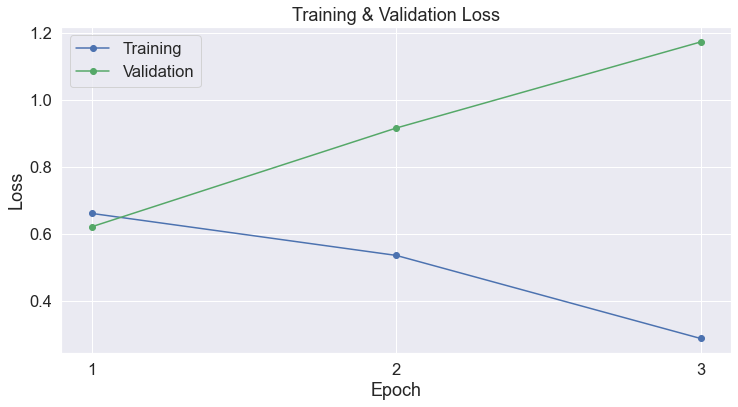

Train Detoxis
F1 binary: 0.9382716049382716
Accuracy:  0.9616425992779783

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1495
           1       0.98      0.90      0.94       721

    accuracy                           0.96      2216
   macro avg       0.97      0.94      0.96      2216
weighted avg       0.96      0.96      0.96      2216

Dev Detoxis
F1 binary: 0.5930599369085173
Accuracy:  0.7671480144404332

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.89      0.84       374
           1       0.69      0.52      0.59       180

    accuracy                           0.77       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.76      0.77      0.76       554

 FOLD 3
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

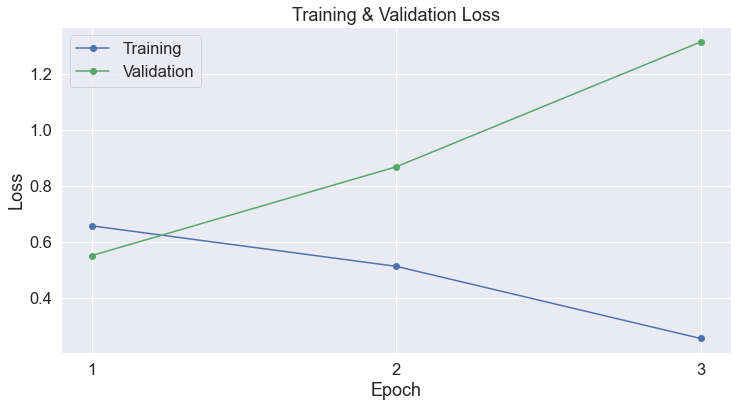

Train Detoxis
F1 binary: 0.9539568345323741
Accuracy:  0.9711191335740073

Classification Report

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1495
           1       0.99      0.92      0.95       721

    accuracy                           0.97      2216
   macro avg       0.98      0.96      0.97      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.5324232081911263
Accuracy:  0.7527075812274369

Classification Report

               precision    recall  f1-score   support

           0       0.77      0.91      0.83       374
           1       0.69      0.43      0.53       180

    accuracy                           0.75       554
   macro avg       0.73      0.67      0.68       554
weighted avg       0.74      0.75      0.73       554

 FOLD 4
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

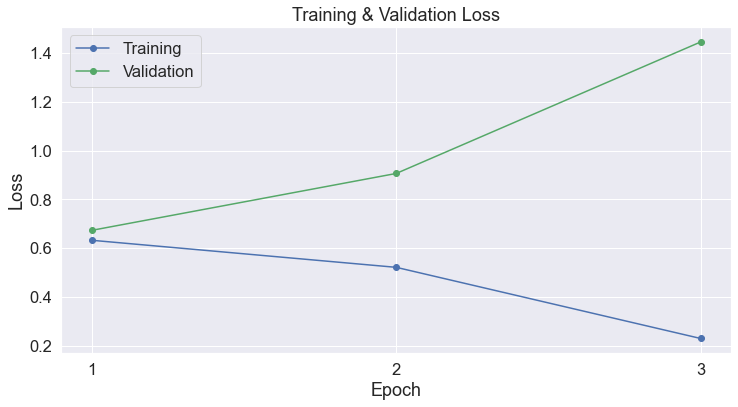

Train Detoxis
F1 binary: 0.9538239538239539
Accuracy:  0.9711191335740073

Classification Report

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1495
           1       0.99      0.92      0.95       721

    accuracy                           0.97      2216
   macro avg       0.98      0.96      0.97      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.5483870967741936
Accuracy:  0.7472924187725631

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.88      0.82       374
           1       0.65      0.47      0.55       180

    accuracy                           0.75       554
   macro avg       0.71      0.68      0.69       554
weighted avg       0.74      0.75      0.73       554

 FOLD 5
--------------------------------


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

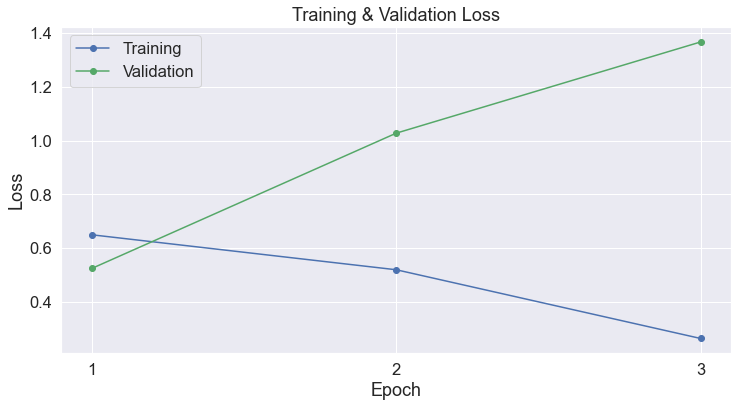

Train Detoxis
F1 binary: 0.9601139601139601
Accuracy:  0.9747292418772563

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1496
           1       0.99      0.94      0.96       720

    accuracy                           0.97      2216
   macro avg       0.98      0.96      0.97      2216
weighted avg       0.97      0.97      0.97      2216

Dev Detoxis
F1 binary: 0.5875
Accuracy:  0.7617328519855595

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.88      0.83       373
           1       0.68      0.52      0.59       181

    accuracy                           0.76       554
   macro avg       0.73      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



In [57]:
# 3 Epoch
epochs = 3
train_scores, test_scores = cross_validation(generate_model_and_optimizer_avarage2, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

 FOLD 1
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:57.
  Batch   200  of    554.    Elapsed: 0:01:11.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:21.
  Batch   440  of    554.    Elapsed: 0:02:36.
  Batch   480  of    554.    Elapsed: 0:02:50.
  Batch   520  of    554.    Elapsed: 0:03:04.

  Average training loss: 0.61
  Training epcoh took: 0:03:16

Running Validation...
  Accuracy: 0.75
  F1 binary: 0.54
  Validation Loss: 0.52
  Validation took: 0:00:14

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

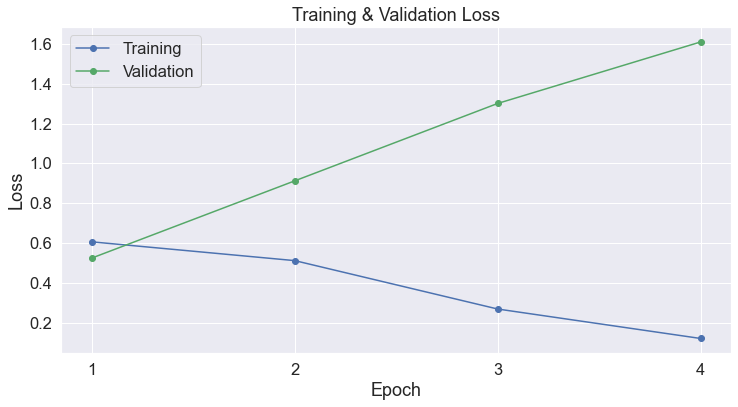

Train Detoxis
F1 binary: 0.9832402234636872
Accuracy:  0.9891696750902527

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1495
           1       0.99      0.98      0.98       721

    accuracy                           0.99      2216
   macro avg       0.99      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5780346820809249
Accuracy:  0.7364620938628159

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.82      0.81       374
           1       0.60      0.56      0.58       180

    accuracy                           0.74       554
   macro avg       0.70      0.69      0.69       554
weighted avg       0.73      0.74      0.73       554

 FOLD 2
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

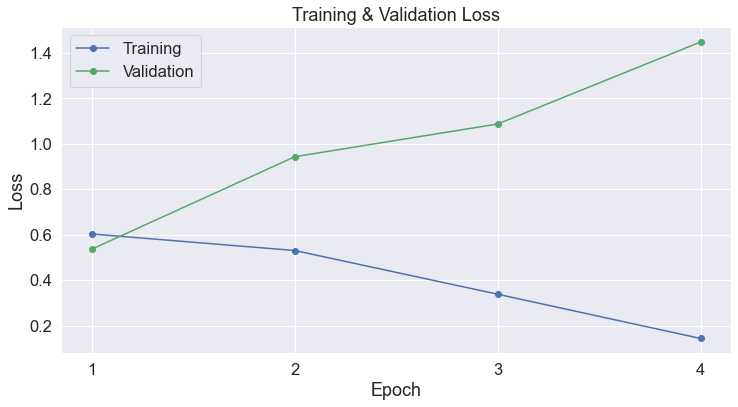

Train Detoxis
F1 binary: 0.9818181818181818
Accuracy:  0.9882671480144405

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1495
           1       0.99      0.97      0.98       721

    accuracy                           0.99      2216
   macro avg       0.99      0.98      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.6228571428571429
Accuracy:  0.7617328519855595

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.84      0.83       374
           1       0.64      0.61      0.62       180

    accuracy                           0.76       554
   macro avg       0.73      0.72      0.72       554
weighted avg       0.76      0.76      0.76       554

 FOLD 3
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

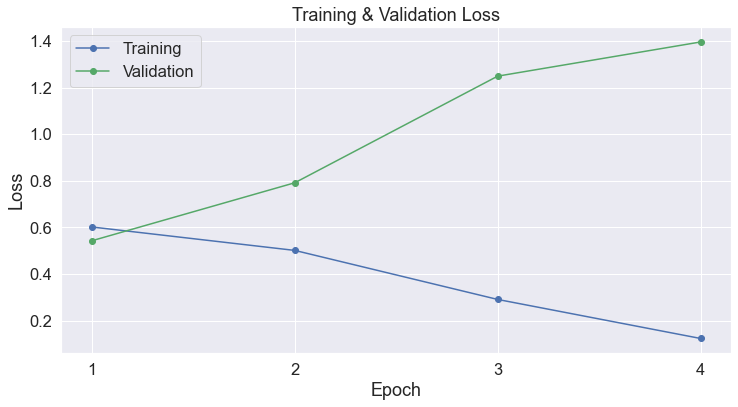

Train Detoxis
F1 binary: 0.9782150386507379
Accuracy:  0.9860108303249098

Classification Report

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1495
           1       0.99      0.97      0.98       721

    accuracy                           0.99      2216
   macro avg       0.99      0.98      0.98      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5930599369085173
Accuracy:  0.7671480144404332

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.89      0.84       374
           1       0.69      0.52      0.59       180

    accuracy                           0.77       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.76      0.77      0.76       554

 FOLD 4
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

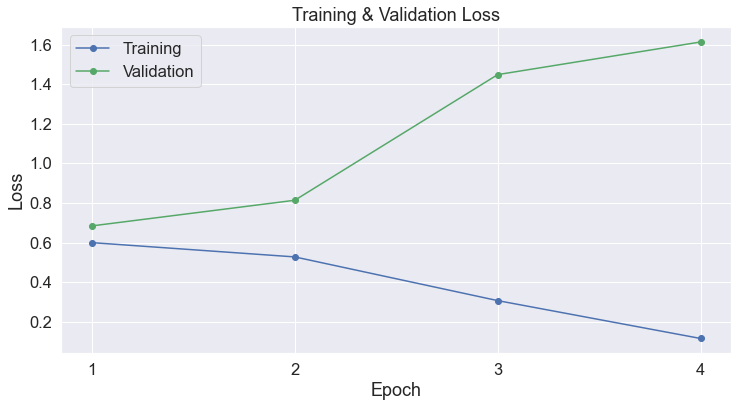

Train Detoxis
F1 binary: 0.9824314827828531
Accuracy:  0.9887184115523465

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1495
           1       1.00      0.97      0.98       721

    accuracy                           0.99      2216
   macro avg       0.99      0.98      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5850746268656716
Accuracy:  0.7490974729241877

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       374
           1       0.63      0.54      0.59       180

    accuracy                           0.75       554
   macro avg       0.71      0.70      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 5
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

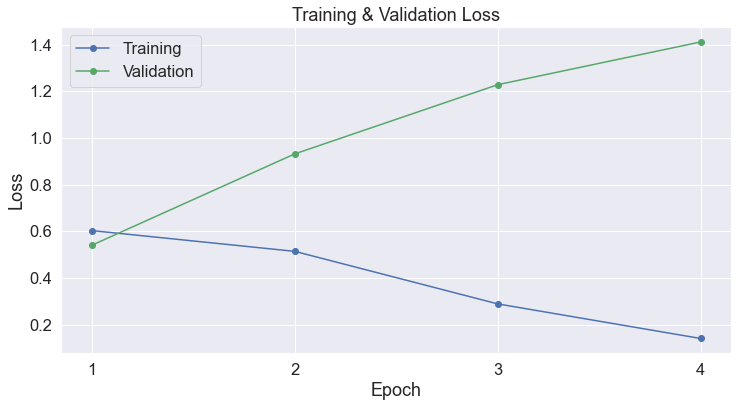

Train Detoxis
F1 binary: 0.9860139860139859
Accuracy:  0.9909747292418772

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1496
           1       0.99      0.98      0.99       720

    accuracy                           0.99      2216
   macro avg       0.99      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5914634146341463
Accuracy:  0.7581227436823105

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.87      0.83       373
           1       0.66      0.54      0.59       181

    accuracy                           0.76       554
   macro avg       0.73      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



In [58]:
# 4 Epoch
epochs = 4
train_scores, test_scores = cross_validation(generate_model_and_optimizer_avarage, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

 FOLD 1
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:57.
  Batch   200  of    554.    Elapsed: 0:01:11.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:21.
  Batch   440  of    554.    Elapsed: 0:02:36.
  Batch   480  of    554.    Elapsed: 0:02:50.
  Batch   520  of    554.    Elapsed: 0:03:04.

  Average training loss: 0.66
  Training epcoh took: 0:03:16

Running Validation...
  Accuracy: 0.73
  F1 binary: 0.42
  Validation Loss: 0.54
  Validation took: 0:00:14

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

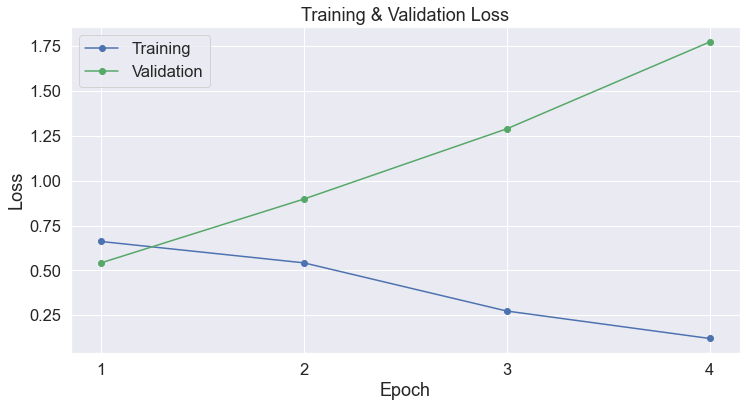

Train Detoxis
F1 binary: 0.9881533101045297
Accuracy:  0.9923285198555957

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1495
           1       0.99      0.98      0.99       721

    accuracy                           0.99      2216
   macro avg       0.99      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5739644970414202
Accuracy:  0.740072202166065

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.84      0.81       374
           1       0.61      0.54      0.57       180

    accuracy                           0.74       554
   macro avg       0.70      0.69      0.69       554
weighted avg       0.73      0.74      0.74       554

 FOLD 2
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of  

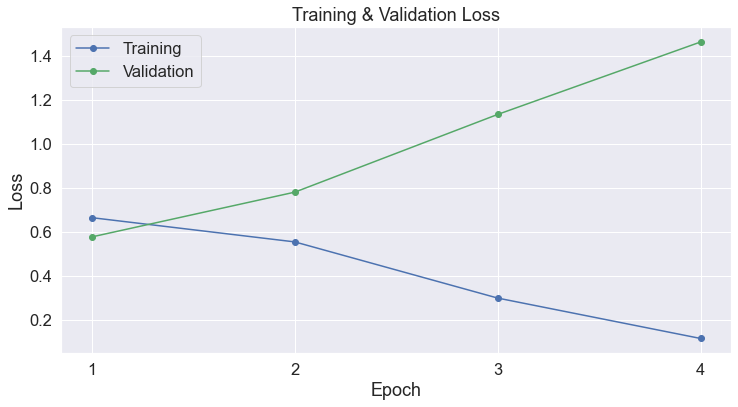

Train Detoxis
F1 binary: 0.9874125874125874
Accuracy:  0.9918772563176895

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1495
           1       1.00      0.98      0.99       721

    accuracy                           0.99      2216
   macro avg       0.99      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.6135693215339232
Accuracy:  0.7635379061371841

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       374
           1       0.65      0.58      0.61       180

    accuracy                           0.76       554
   macro avg       0.73      0.72      0.72       554
weighted avg       0.76      0.76      0.76       554

 FOLD 3
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

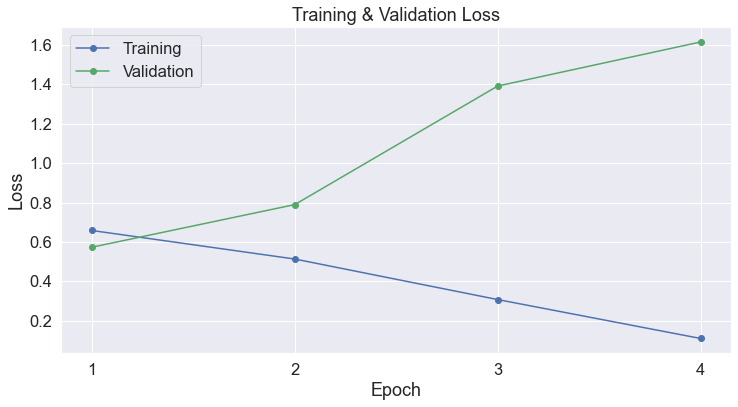

Train Detoxis
F1 binary: 0.9817415730337079
Accuracy:  0.9882671480144405

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1495
           1       0.99      0.97      0.98       721

    accuracy                           0.99      2216
   macro avg       0.99      0.98      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5521885521885522
Accuracy:  0.759927797833935

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.91      0.84       374
           1       0.70      0.46      0.55       180

    accuracy                           0.76       554
   macro avg       0.74      0.68      0.69       554
weighted avg       0.75      0.76      0.74       554

 FOLD 4
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of  

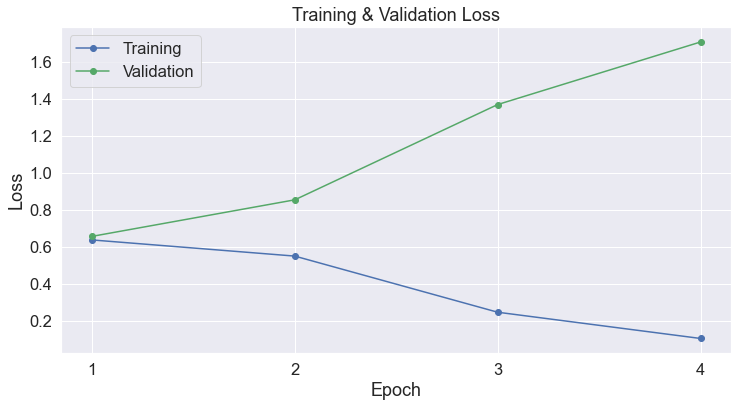

Train Detoxis
F1 binary: 0.9930167597765364
Accuracy:  0.9954873646209387

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1495
           1       1.00      0.99      0.99       721

    accuracy                           1.00      2216
   macro avg       1.00      0.99      0.99      2216
weighted avg       1.00      1.00      1.00      2216

Dev Detoxis
F1 binary: 0.5783132530120482
Accuracy:  0.7472924187725631

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       374
           1       0.63      0.53      0.58       180

    accuracy                           0.75       554
   macro avg       0.71      0.69      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 5
--------------------------------


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

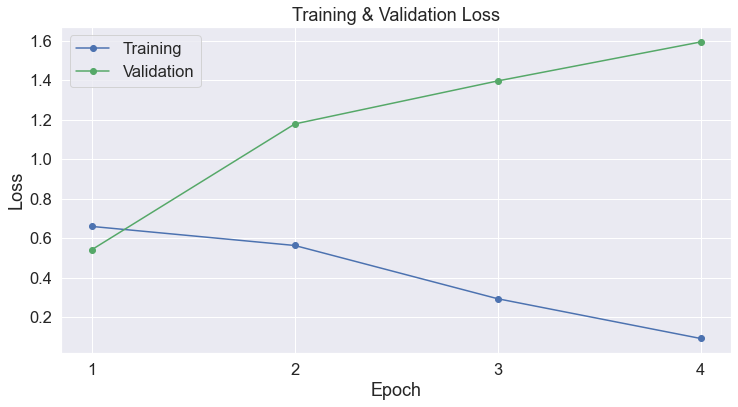

Train Detoxis
F1 binary: 0.9909027291812457
Accuracy:  0.9941335740072202

Classification Report

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1496
           1       1.00      0.98      0.99       720

    accuracy                           0.99      2216
   macro avg       1.00      0.99      0.99      2216
weighted avg       0.99      0.99      0.99      2216

Dev Detoxis
F1 binary: 0.5777777777777777
Accuracy:  0.759927797833935

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.88      0.83       373
           1       0.68      0.50      0.58       181

    accuracy                           0.76       554
   macro avg       0.73      0.69      0.71       554
weighted avg       0.75      0.76      0.75       554



In [59]:
# 4 Epoch
epochs = 4
train_scores, test_scores = cross_validation(generate_model_and_optimizer_avarage2, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

 FOLD 1
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:57.
  Batch   200  of    554.    Elapsed: 0:01:11.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:22.
  Batch   440  of    554.    Elapsed: 0:02:36.
  Batch   480  of    554.    Elapsed: 0:02:50.
  Batch   520  of    554.    Elapsed: 0:03:04.

  Average training loss: 0.60
  Training epcoh took: 0:03:16

Running Validation...
  Accuracy: 0.75
  F1 binary: 0.49
  Validation Loss: 0.55
  Validation took: 0:00:14

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

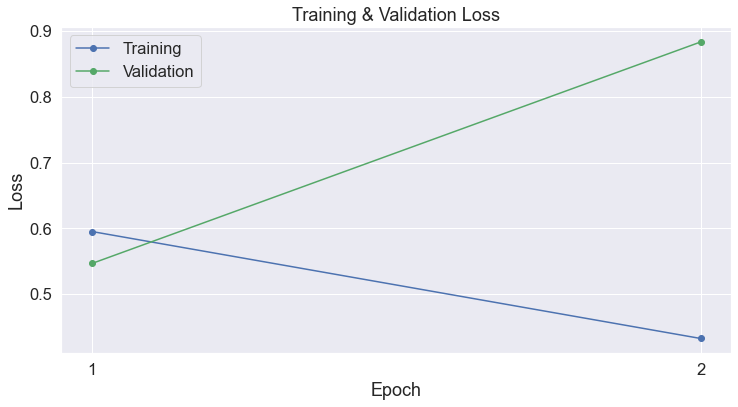

Train Detoxis
F1 binary: 0.8560775540641312
Accuracy:  0.9129061371841155

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1495
           1       0.93      0.80      0.86       721

    accuracy                           0.91      2216
   macro avg       0.92      0.88      0.90      2216
weighted avg       0.91      0.91      0.91      2216

Dev Detoxis
F1 binary: 0.5460317460317461
Accuracy:  0.7418772563176895

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.87      0.82       374
           1       0.64      0.48      0.55       180

    accuracy                           0.74       554
   macro avg       0.71      0.67      0.68       554
weighted avg       0.73      0.74      0.73       554

 FOLD 2
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

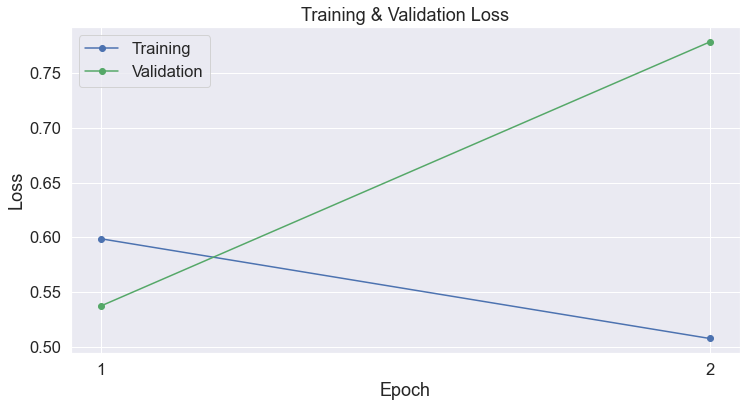

Train Detoxis
F1 binary: 0.8059236165237725
Accuracy:  0.8876353790613718

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1495
           1       0.92      0.72      0.81       721

    accuracy                           0.89      2216
   macro avg       0.90      0.84      0.86      2216
weighted avg       0.89      0.89      0.88      2216

Dev Detoxis
F1 binary: 0.5519480519480519
Accuracy:  0.7509025270758123

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       374
           1       0.66      0.47      0.55       180

    accuracy                           0.75       554
   macro avg       0.72      0.68      0.69       554
weighted avg       0.74      0.75      0.74       554

 FOLD 3
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

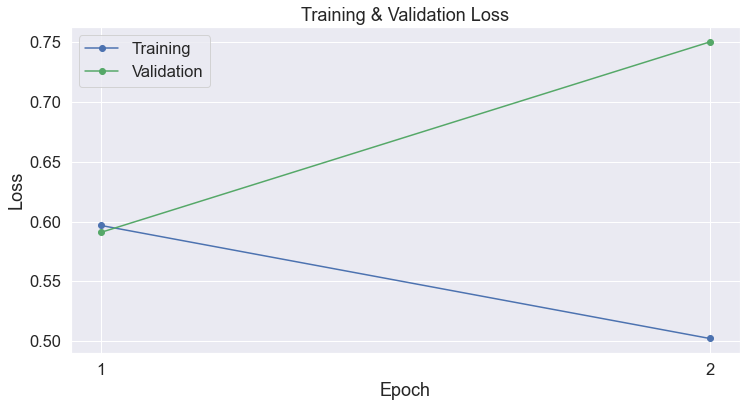

Train Detoxis
F1 binary: 0.8283582089552239
Accuracy:  0.8962093862815884

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1495
           1       0.90      0.77      0.83       721

    accuracy                           0.90      2216
   macro avg       0.90      0.86      0.88      2216
weighted avg       0.90      0.90      0.89      2216

Dev Detoxis
F1 binary: 0.554140127388535
Accuracy:  0.7472924187725631

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.87      0.82       374
           1       0.65      0.48      0.55       180

    accuracy                           0.75       554
   macro avg       0.71      0.68      0.69       554
weighted avg       0.74      0.75      0.74       554

 FOLD 4
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of  

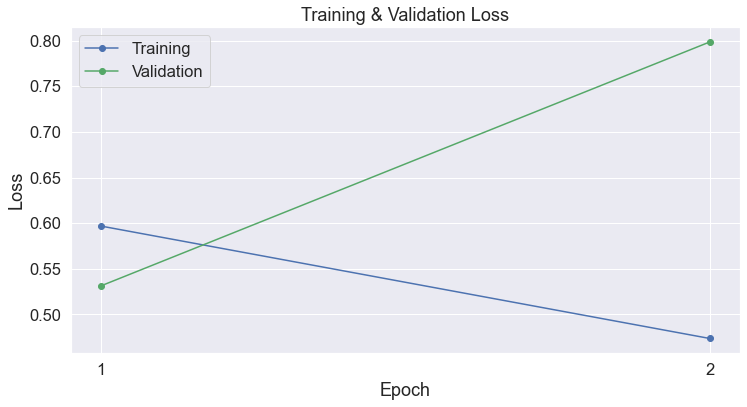

Train Detoxis
F1 binary: 0.8450074515648286
Accuracy:  0.9061371841155235

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1495
           1       0.91      0.79      0.85       721

    accuracy                           0.91      2216
   macro avg       0.91      0.88      0.89      2216
weighted avg       0.91      0.91      0.90      2216

Dev Detoxis
F1 binary: 0.5988023952095809
Accuracy:  0.7581227436823105

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       374
           1       0.65      0.56      0.60       180

    accuracy                           0.76       554
   macro avg       0.72      0.71      0.71       554
weighted avg       0.75      0.76      0.75       554

 FOLD 5
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

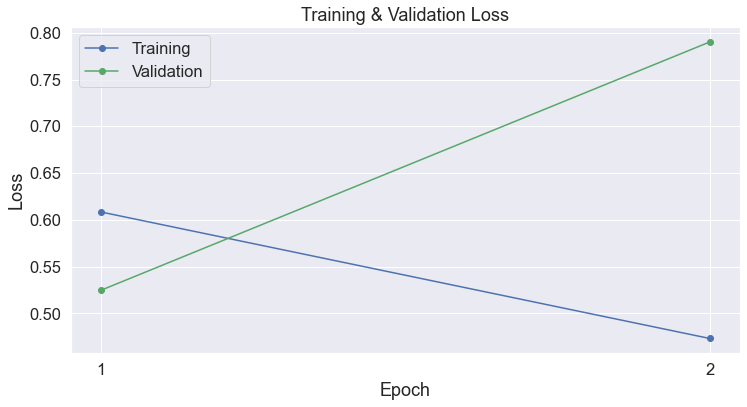

Train Detoxis
F1 binary: 0.84375
Accuracy:  0.9052346570397112

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1496
           1       0.91      0.79      0.84       720

    accuracy                           0.91      2216
   macro avg       0.91      0.87      0.89      2216
weighted avg       0.91      0.91      0.90      2216

Dev Detoxis
F1 binary: 0.577922077922078
Accuracy:  0.7653429602888087

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.90      0.84       373
           1       0.70      0.49      0.58       181

    accuracy                           0.77       554
   macro avg       0.74      0.69      0.71       554
weighted avg       0.76      0.77      0.75       554



In [60]:
# 2 Epoch
epochs = 2
train_scores, test_scores = cross_validation(generate_model_and_optimizer_avarage, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

 FOLD 1
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:28.
  Batch   120  of    554.    Elapsed: 0:00:42.
  Batch   160  of    554.    Elapsed: 0:00:57.
  Batch   200  of    554.    Elapsed: 0:01:11.
  Batch   240  of    554.    Elapsed: 0:01:25.
  Batch   280  of    554.    Elapsed: 0:01:39.
  Batch   320  of    554.    Elapsed: 0:01:53.
  Batch   360  of    554.    Elapsed: 0:02:07.
  Batch   400  of    554.    Elapsed: 0:02:21.
  Batch   440  of    554.    Elapsed: 0:02:36.
  Batch   480  of    554.    Elapsed: 0:02:50.
  Batch   520  of    554.    Elapsed: 0:03:04.

  Average training loss: 0.64
  Training epcoh took: 0:03:16

Running Validation...
  Accuracy: 0.73
  F1 binary: 0.56
  Validation Loss: 0.55
  Validation took: 0:00:14

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of    554.    Elapsed: 0:00:

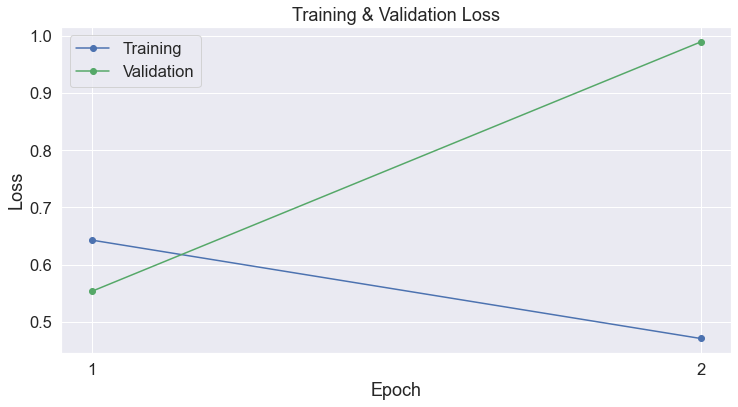

Train Detoxis
F1 binary: 0.871039056742815
Accuracy:  0.921028880866426

Classification Report

               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1495
           1       0.93      0.82      0.87       721

    accuracy                           0.92      2216
   macro avg       0.92      0.89      0.91      2216
weighted avg       0.92      0.92      0.92      2216

Dev Detoxis
F1 binary: 0.5757575757575758
Accuracy:  0.7472924187725631

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.85      0.82       374
           1       0.63      0.53      0.58       180

    accuracy                           0.75       554
   macro avg       0.71      0.69      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 2
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of   

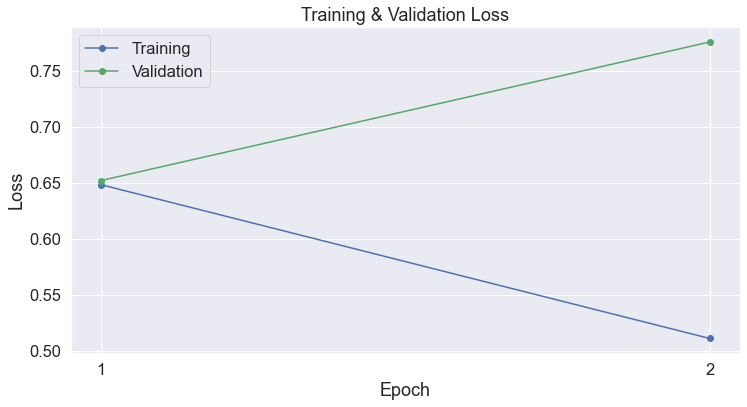

Train Detoxis
F1 binary: 0.8415466262319939
Accuracy:  0.9056859205776173

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1495
           1       0.93      0.77      0.84       721

    accuracy                           0.91      2216
   macro avg       0.91      0.87      0.89      2216
weighted avg       0.91      0.91      0.90      2216

Dev Detoxis
F1 binary: 0.5678233438485805
Accuracy:  0.7527075812274369

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.87      0.83       374
           1       0.66      0.50      0.57       180

    accuracy                           0.75       554
   macro avg       0.72      0.69      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 3
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

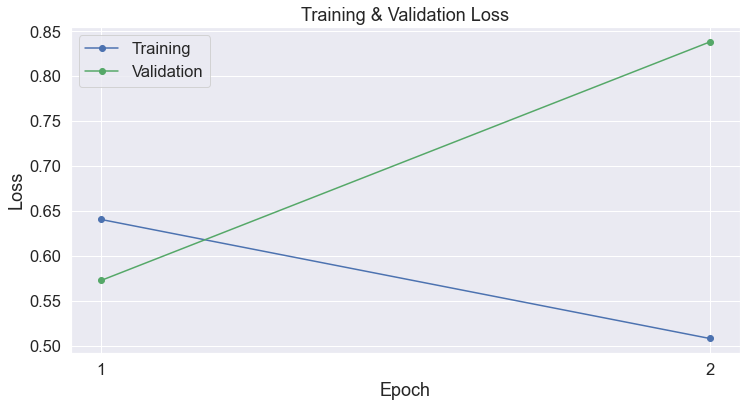

Train Detoxis
F1 binary: 0.8343653250773995
Accuracy:  0.9034296028880866

Classification Report

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1495
           1       0.94      0.75      0.83       721

    accuracy                           0.90      2216
   macro avg       0.92      0.86      0.88      2216
weighted avg       0.91      0.90      0.90      2216

Dev Detoxis
F1 binary: 0.5244755244755245
Accuracy:  0.7545126353790613

Classification Report

               precision    recall  f1-score   support

           0       0.77      0.92      0.83       374
           1       0.71      0.42      0.52       180

    accuracy                           0.75       554
   macro avg       0.74      0.67      0.68       554
weighted avg       0.75      0.75      0.73       554

 FOLD 4
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

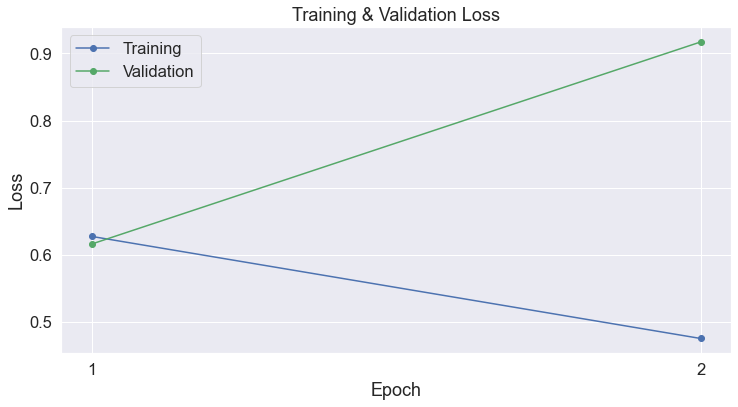

Train Detoxis
F1 binary: 0.8906942392909898
Accuracy:  0.9332129963898917

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1495
           1       0.95      0.84      0.89       721

    accuracy                           0.93      2216
   macro avg       0.94      0.91      0.92      2216
weighted avg       0.93      0.93      0.93      2216

Dev Detoxis
F1 binary: 0.5731707317073171
Accuracy:  0.7472924187725631

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.86      0.82       374
           1       0.64      0.52      0.57       180

    accuracy                           0.75       554
   macro avg       0.71      0.69      0.70       554
weighted avg       0.74      0.75      0.74       554

 FOLD 5
--------------------------------


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    554.    Elapsed: 0:00:14.
  Batch    80  of 

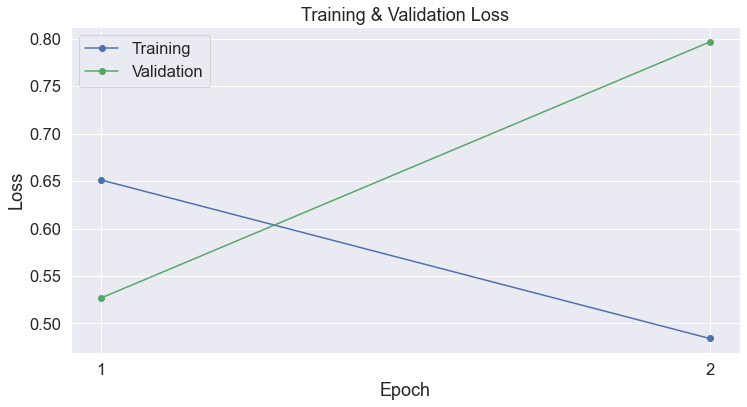

Train Detoxis
F1 binary: 0.8577912254160363
Accuracy:  0.9151624548736462

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1496
           1       0.94      0.79      0.86       720

    accuracy                           0.92      2216
   macro avg       0.92      0.88      0.90      2216
weighted avg       0.92      0.92      0.91      2216

Dev Detoxis
F1 binary: 0.584126984126984
Accuracy:  0.7635379061371841

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.89      0.83       373
           1       0.69      0.51      0.58       181

    accuracy                           0.76       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



In [61]:
# 2 Epoch
epochs = 2
train_scores, test_scores = cross_validation(generate_model_and_optimizer_avarage2, detoxis_train_bert, batch_size, epochs, device, "Detoxis", f1_average='binary')
stats_cv(train_scores, test_scores)

### Hyperparmeter search
#### Detoxis

In [63]:
import optuna

def objective(trial, model_generator, train_dataset, validation_dataset, batch_size, device, model_name, f1_average):
    
    # Creates model
    model = model_generator()
    
    lr = trial.suggest_float("lr", 1e-7, 1e-3, log=True)
    eps = trial.suggest_float("eps", 1e-10, 1e-6, log=True)
    epochs = trial.suggest_int("epochs", 2, 5)
    
    # Generate the optimizer.
    optimizer = AdamW(model.parameters(),
                  lr = lr, # learning_rate - default is 5e-5
                  eps = eps # epsilon  - default is 1e-8
                )
    
    
    train(model, train_dataset, validation_dataset, optimizer, batch_size, epochs, device, f1_average=f1_average, trial=trial)
    
    y_pred_val = evaluate(model, validation_dataset, device, batch_size, model_name, f1_average=f1_average, _print_score=False)
    y_true_val = validation_dataset.tensors[2]
    
    del optimizer
    del model
    torch.cuda.empty_cache()

    return score(y_true_val, y_pred_val, f1_average)[1]

def objective_function(model_generator, train_dataset, validation_dataset, batch_size, device, model_name, f1_average='binary'):
    return lambda trial: objective(trial, model_generator, train_dataset, validation_dataset, batch_size, device, model_name, f1_average)

In [64]:
from optuna.trial import TrialState

study = optuna.create_study(direction="maximize")

model_generator = lambda: BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased')

objective_func = objective_function(model_generator, detoxis_train_bert, detoxis_dev_bert, batch_size, device, "detoxis_hyperparameters", f1_average='binary')
study.optimize(objective_func, n_trials=100, timeout=None)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.67
  Training epcoh took: 0:03:58

Running Validation...


C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.65
  Validation took: 0:00:17

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:22.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:17.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.66
  Training epcoh took: 0:03:58

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.68
  Validation took: 0:00:17

======== Epoch 3 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.64
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:17

Training complete!
Total training took 0:12:47 (h:mm:ss)


C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



======== Epoch 1 / 5 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.61
  Training epcoh took: 0:03:59

Running Validation...
  Accuracy: 0.71
  F1 binary: 0.59
  Validation Loss: 0.55
  Validation t


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:52.
  Batch   360  of    693.    Elapsed: 0:02:06.
  Batch   400  of    693.    Elapsed: 0:02:20.
  Batch   440  of    693.    Elapsed: 0:02:34.
  Batch   480  of    693.    Elapsed: 0:02:48.
  Batch   520  of    693.    Elapsed: 0:03:02.
  Batch   560  of    693.    Elapsed: 0:03:16.
  Batch   600  of    693.    Elapsed: 0:03:30.
  Batch   640  of    693.    Elapsed: 0:03:44.
  Batch   680  of    693.    Elapsed: 0:03:58.

  Average training loss: 0.68
  Training epcoh took: 0:04:02

Running Validation...
  Accuracy: 0.63
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation t

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

======== Epoch 3 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:57.
  Batch   200  of    693.    Elapsed: 0:01:11.
  Batch   240  of    693.    Elapsed: 0:01:25.
  Batch   280  of    693.    Elapsed: 0:01:39.
  Batch   320  of    693.    Elapsed: 0:01:53.
  Batch   360  of    693.    Elapsed: 0:02:07.
  Batch   400  of    693.    Elapsed: 0:02:21.
  Batch   440  of    693.    Elapsed: 0:02:35.
  Batch   480  of    693.    Elapsed: 0:02:49.
  Batch   520  of    693.    Elapsed: 0:03:03.
  Batch   560  of    693.    Elapsed: 0:03:17.
  Batch   600  of    693.    Elapsed: 0:03:31.
  Batch   640  of    693.    Elapsed: 0:03:45.
  Batch   680  of    693.    Elapsed: 0:04:00.

  Average training loss: 0.63
  Training epcoh took: 0:04:04

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

Training complete!
Total training took 0:13:04 (h:mm:ss)


C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



======== Epoch 1 / 5 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:52.
  Batch   360  of    693.    Elapsed: 0:02:06.
  Batch   400  of    693.    Elapsed: 0:02:21.
  Batch   440  of    693.    Elapsed: 0:02:35.
  Batch   480  of    693.    Elapsed: 0:02:49.
  Batch   520  of    693.    Elapsed: 0:03:03.
  Batch   560  of    693.    Elapsed: 0:03:17.
  Batch   600  of    693.    Elapsed: 0:03:31.
  Batch   640  of    693.    Elapsed: 0:03:45.
  Batch   680  of    693.    Elapsed: 0:03:59.

  Average training loss: 0.64
  Training epcoh took: 0:04:03

Running Validation...


C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.65
  Validation took: 0:00:18

======== Epoch 2 / 5 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:01.
  Batch   560  of    693.    Elapsed: 0:03:15.
  Batch   600  of    693.    Elapsed: 0:03:29.
  Batch   640  of    693.    Elapsed: 0:03:43.
  Batch   680  of    693.    Elapsed: 0:03:56.

  Average training loss: 0.62
  Training epcoh took: 0:04:01

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:52.
  Batch   360  of    693.    Elapsed: 0:02:06.
  Batch   400  of    693.    Elapsed: 0:02:20.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:01.
  Batch   560  of    693.    Elapsed: 0:03:15.
  Batch   600  of    693.    Elapsed: 0:03:29.
  Batch   640  of    693.    Elapsed: 0:03:43.
  Batch   680  of    693.    Elapsed: 0:03:57.

  Average training loss: 0.65
  Training epcoh took: 0:04:01

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:18

======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:52.
  Batch   360  of    693.    Elapsed: 0:02:06.
  Batch   400  of    693.    Elapsed: 0:02:20.
  Batch   440  of    693.    Elapsed: 0:02:34.
  Batch   480  of    693.    Elapsed: 0:02:48.
  Batch   520  of    693.    Elapsed: 0:03:01.
  Batch   560  of    693.    Elapsed: 0:03:15.
  Batch   600  of    693.    Elapsed: 0:03:29.
  Batch   640  of    693.    Elapsed: 0:03:43.
  Batch   680  of    693.    Elapsed: 0:03:57.

  Average training loss: 0.65
  Training epcoh took: 0:04:01

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

======== Epoch 1 / 5 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:01.
  Batch   560  of    693.    Elapsed: 0:03:15.
  Batch   600  of    693.    Elapsed: 0:03:29.
  Batch   640  of    693.    Elapsed: 0:03:43.
  Batch   680  of    693.    Elapsed: 0:03:57.

  Average training loss: 0.64
  Training epcoh took: 0:04:01

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:18

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:11.
  Batch   240  of    693.    Elapsed: 0:01:25.
  Batch   280  of    693.    Elapsed: 0:01:39.
  Batch   320  of    693.    Elapsed: 0:01:53.
  Batch   360  of    693.    Elapsed: 0:02:07.
  Batch   400  of    693.    Elapsed: 0:02:21.
  Batch   440  of    693.    Elapsed: 0:02:35.
  Batch   480  of    693.    Elapsed: 0:02:49.
  Batch   520  of    693.    Elapsed: 0:03:03.
  Batch   560  of    693.    Elapsed: 0:03:17.
  Batch   600  of    693.    Elapsed: 0:03:31.
  Batch   640  of    693.    Elapsed: 0:03:45.
  Batch   680  of    693.    Elapsed: 0:03:59.

  Average training loss: 0.62
  Training epcoh took: 0:04:04

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.61
  Validation took: 0:00:18

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:52.
  Batch   360  of    693.    Elapsed: 0:02:06.
  Batch   400  of    693.    Elapsed: 0:02:20.
  Batch   440  of    693.    Elapsed: 0:02:34.
  Batch   480  of    693.    Elapsed: 0:02:48.
  Batch   520  of    693.    Elapsed: 0:03:02.
  Batch   560  of    693.    Elapsed: 0:03:16.
  Batch   600  of    693.    Elapsed: 0:03:30.
  Batch   640  of    693.    Elapsed: 0:03:43.
  Batch   680  of    693.    Elapsed: 0:03:57.

  Average training loss: 0.59
  Training epcoh took: 0:04:02

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.65
  Validation took: 0:00:18

======== Epoch 1 / 5 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.65
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:18

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.61
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:17

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.59
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.64
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.65
  Validation took: 0:00:18

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.59
  Training epcoh took: 0:03:59

Running V

  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:22.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:17.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:58.
  Batch   560  of    693.    Elapsed: 0:03:12.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:53.

  Average training loss: 0.35
  Training epcoh took: 0:03:58

Running Validation...
  Accuracy: 0.76
  F1 binary: 0.63
  Validation Loss: 1.03
  Validation took: 0:00:18

Training complete!
Total trai

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:17

======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.63
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:17

======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.61
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

======== Epoch 1 / 2 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.59
  Training epcoh took: 0:03:59

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:18

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:01.
  Batch   560  of    693.    Elapsed: 0:03:15.
  Batch   600  of    693.    Elapsed: 0:03:29.
  Batch   640  of    693.    Elapsed: 0:03:43.
  Batch   680  of    693.    Elapsed: 0:03:57.

  Average training loss: 0.60
  Training epcoh took: 0:04:01

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.61
  Validation took: 0:00:18

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:01.
  Batch   560  of    693.    Elapsed: 0:03:15.
  Batch   600  of    693.    Elapsed: 0:03:28.
  Batch   640  of    693.    Elapsed: 0:03:42.
  Batch   680  of    693.    Elapsed: 0:03:56.

  Average training loss: 0.60
  Training epcoh took: 0:04:01

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:22

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:17.
  Batch    80  of    693.    Elapsed: 0:00:34.
  Batch   120  of    693.    Elapsed: 0:00:50.
  Batch   160  of    693.    Elapsed: 0:01:07.
  Batch   200  of    693.    Elapsed: 0:01:24.
  Batch   240  of    693.    Elapsed: 0:01:40.
  Batch   280  of    693.    Elapsed: 0:01:57.
  Batch   320  of    693.    Elapsed: 0:02:14.
  Batch   360  of    693.    Elapsed: 0:02:31.
  Batch   400  of    693.    Elapsed: 0:02:47.
  Batch   440  of    693.    Elapsed: 0:03:04.
  Batch   480  of    693.    Elapsed: 0:03:21.
  Batch   520  of    693.    Elapsed: 0:03:38.
  Batch   560  of    693.    Elapsed: 0:03:54.
  Batch   600  of    693.    Elapsed: 0:04:11.
  Batch   640  of    693.    Elapsed: 0:04:28.
  Batch   680  of    693.    Elapsed: 0:04:45.

  Average training loss: 0.64
  Training epcoh took: 0:04:50

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.67
  Validation took: 0:00:22

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:17.
  Batch    80  of    693.    Elapsed: 0:00:33.
  Batch   120  of    693.    Elapsed: 0:00:50.
  Batch   160  of    693.    Elapsed: 0:01:07.
  Batch   200  of    693.    Elapsed: 0:01:24.
  Batch   240  of    693.    Elapsed: 0:01:41.
  Batch   280  of    693.    Elapsed: 0:01:58.
  Batch   320  of    693.    Elapsed: 0:02:14.
  Batch   360  of    693.    Elapsed: 0:02:31.
  Batch   400  of    693.    Elapsed: 0:02:48.
  Batch   440  of    693.    Elapsed: 0:03:05.
  Batch   480  of    693.    Elapsed: 0:03:22.
  Batch   520  of    693.    Elapsed: 0:03:38.
  Batch   560  of    693.    Elapsed: 0:03:53.
  Batch   600  of    693.    Elapsed: 0:04:07.
  Batch   640  of    693.    Elapsed: 0:04:22.
  Batch   680  of    693.    Elapsed: 0:04:37.

  Average training loss: 0.59
  Training epcoh took: 0:04:41

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:17

======== Epoch 1 / 5 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.59
  Training epcoh took: 0:03:59

Running V

  Batch    40  of    693.    Elapsed: 0:00:15.
  Batch    80  of    693.    Elapsed: 0:00:29.
  Batch   120  of    693.    Elapsed: 0:00:44.
  Batch   160  of    693.    Elapsed: 0:00:58.
  Batch   200  of    693.    Elapsed: 0:01:12.
  Batch   240  of    693.    Elapsed: 0:01:26.
  Batch   280  of    693.    Elapsed: 0:01:40.
  Batch   320  of    693.    Elapsed: 0:01:54.
  Batch   360  of    693.    Elapsed: 0:02:09.
  Batch   400  of    693.    Elapsed: 0:02:23.
  Batch   440  of    693.    Elapsed: 0:02:37.
  Batch   480  of    693.    Elapsed: 0:02:51.
  Batch   520  of    693.    Elapsed: 0:03:05.
  Batch   560  of    693.    Elapsed: 0:03:20.
  Batch   600  of    693.    Elapsed: 0:03:34.
  Batch   640  of    693.    Elapsed: 0:03:48.
  Batch   680  of    693.    Elapsed: 0:04:03.

  Average training loss: 0.54
  Training epcoh took: 0:04:08

Running Validation...
  Accuracy: 0.74
  F1 binary: 0.66
  Validation Loss: 0.74
  Validation took: 0:00:19

======== Epoch 3 / 5 ========

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:18

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:34.
  Batch   480  of    693.    Elapsed: 0:02:49.
  Batch   520  of    693.    Elapsed: 0:03:04.
  Batch   560  of    693.    Elapsed: 0:03:18.
  Batch   600  of    693.    Elapsed: 0:03:33.
  Batch   640  of    693.    Elapsed: 0:03:48.
  Batch   680  of    693.    Elapsed: 0:04:03.

  Average training loss: 0.60
  Training epcoh took: 0:04:08

Running V

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:17

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:22.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.59
  Training epcoh took: 0:03:58

Running V

  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:22.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:14.
  Batch   600  of    693.    Elapsed: 0:03:28.
  Batch   640  of    693.    Elapsed: 0:03:42.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.59
  Training epcoh took: 0:04:00

Running Validation...
  Accuracy: 0.76
  F1 binary: 0.59
  Validation Loss: 0.50
  Validation took: 0:00:17

======== Epoch 1 / 3 ========

  Batch    80  of    693.    Elapsed: 0:00:28.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.59
  Training epcoh took: 0:03:58

Running Validation...
  Accuracy: 0.73
  F1 binary: 0.60
  Validation Loss: 0.53
  Validation took: 0:00:17

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elaps

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:17

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:23.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.61
  Training epcoh took: 0:03:58

Running V

  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:22.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.61
  Training epcoh took: 0:03:58

Running Validation...
  Accuracy: 0.67
  F1 binary: 0.60
  Validation Loss: 0.63
  Validation took: 0:00:17

======== Epoch 1 / 3 ========

  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:38.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:19.
  Batch   440  of    693.    Elapsed: 0:02:33.
  Batch   480  of    693.    Elapsed: 0:02:47.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:14.
  Batch   600  of    693.    Elapsed: 0:03:28.
  Batch   640  of    693.    Elapsed: 0:03:42.
  Batch   680  of    693.    Elapsed: 0:03:56.

  Average training loss: 0.37
  Training epcoh took: 0:04:00

Running Validation...
  Accuracy: 0.77
  F1 binary: 0.65
  Validation Loss: 0.99
  Validation took: 0:00:18

======== Epoch 4 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elaps

  Batch   120  of    693.    Elapsed: 0:00:42.
  Batch   160  of    693.    Elapsed: 0:00:56.
  Batch   200  of    693.    Elapsed: 0:01:10.
  Batch   240  of    693.    Elapsed: 0:01:24.
  Batch   280  of    693.    Elapsed: 0:01:37.
  Batch   320  of    693.    Elapsed: 0:01:51.
  Batch   360  of    693.    Elapsed: 0:02:05.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:32.
  Batch   480  of    693.    Elapsed: 0:02:46.
  Batch   520  of    693.    Elapsed: 0:03:00.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:27.
  Batch   640  of    693.    Elapsed: 0:03:41.
  Batch   680  of    693.    Elapsed: 0:03:55.

  Average training loss: 0.58
  Training epcoh took: 0:03:59

Running Validation...
  Accuracy: 0.74
  F1 binary: 0.61
  Validation Loss: 0.66
  Validation took: 0:00:17

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elaps

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.65
  F1 binary: 0.00
  Validation Loss: 0.66
  Validation took: 0:00:17

======== Epoch 1 / 4 ========
Training...
  Batch    40  of    693.    Elapsed: 0:00:14.
  Batch    80  of    693.    Elapsed: 0:00:27.
  Batch   120  of    693.    Elapsed: 0:00:41.
  Batch   160  of    693.    Elapsed: 0:00:55.
  Batch   200  of    693.    Elapsed: 0:01:09.
  Batch   240  of    693.    Elapsed: 0:01:22.
  Batch   280  of    693.    Elapsed: 0:01:36.
  Batch   320  of    693.    Elapsed: 0:01:50.
  Batch   360  of    693.    Elapsed: 0:02:04.
  Batch   400  of    693.    Elapsed: 0:02:18.
  Batch   440  of    693.    Elapsed: 0:02:31.
  Batch   480  of    693.    Elapsed: 0:02:45.
  Batch   520  of    693.    Elapsed: 0:02:59.
  Batch   560  of    693.    Elapsed: 0:03:13.
  Batch   600  of    693.    Elapsed: 0:03:26.
  Batch   640  of    693.    Elapsed: 0:03:40.
  Batch   680  of    693.    Elapsed: 0:03:54.

  Average training loss: 0.59
  Training epcoh took: 0:03:58

Running V

Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  80
  Number of complete trials:  20
Best trial:
  Value:  0.6681514476614699
  Params: 
    lr: 3.0080674312984058e-05
    eps: 3.319733891702547e-07
    epochs: 2


## 10. GPT-2
### GPT-2 datasets

In [46]:
X_train_english_gpt2 = preprocessing_gpt2(english_train.text)
X_dev_english_gpt2 = preprocessing_gpt2(english_dev.text)
X_test_english_gpt2 = preprocessing_gpt2(english_test.text)

X_train_spanish_gpt2 = preprocessing_gpt2(spanish_train.text, language="es")
X_dev_spanish_gpt2 = preprocessing_gpt2(spanish_dev.text, language="es")
X_test_spanish_gpt2 = preprocessing_gpt2(spanish_test.text, language="es")

X_train_detoxis_gpt2 = preprocessing_gpt2(detoxis_train.comment, language="es")
X_dev_detoxis_gpt2 = preprocessing_gpt2(detoxis_dev.comment, language="es")
X_test_detoxis_gpt2 = preprocessing_gpt2(detoxis_test.comment, language="es")

### Hateval 2019
#### English

In [47]:
from transformers import GPT2Config, GPT2Tokenizer, GPT2ForSequenceClassification
import torch

print('Loading configuraiton...')
model_config = GPT2Config.from_pretrained('gpt2', num_labels=2)

# Get model's tokenizer.
print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# default to left padding
tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
tokenizer.pad_token = tokenizer.eos_token


# Get the actual model.
print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained('gpt2', config=model_config)

# resize model embedding to match new tokenizer
model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
model.config.pad_token_id = model.config.eos_token_id

Loading configuraiton...
Loading tokenizer...
Loading model...


In [48]:
from transformers import AdamW

print_example_nn(tokenizer, english_train.text.iloc[0], X_train_english_gpt2.iloc[0])

max_length_english = measure_max_length(tokenizer, [X_train_spanish_nn, X_dev_spanish_nn, X_test_spanish_nn], add_special_tokens=False)

english_train_gpt2 = generate_dataset(tokenizer, X_train_english_gpt2, english_train["HS"], max_length_english, add_special_tokens=False)
english_dev_gpt2 = generate_dataset(tokenizer, X_dev_english_gpt2, english_dev["HS"], max_length_english, add_special_tokens=False)
english_test_gpt2 = generate_dataset(tokenizer, X_test_english_gpt2, english_test["HS"],max_length_english, add_special_tokens=False)

device = torch.device('cuda:0')

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # learning_rate - default is 5e-5
                  eps = 1e-8 # adam_epsilon  - default is 1e-8.
                )

batch_size = 8
epochs = 4

 Original:  Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike
Tokenized:  ['Hur', 'ray', ',', 'Ġsaving', 'Ġus', 'Ġ$', '$$', 'Ġin', 'Ġso', 'Ġmany', 'Ġways', 'Ġ@', 'pot', 'us', 'Ġ@', 'realDonaldTrump', 'Ġ#', 'Lock', 'The', 'm', 'Up', 'Ġ#', 'Build', 'The', 'Wall', 'Ġ#', 'End', 'D', 'ACA', 'Ġ#', 'Boy', 'cott', 'NFL', 'Ġ#', 'Boy', 'cott', 'N', 'ike']
Token IDs:  [42633, 2433, 11, 8914, 514, 720, 13702, 287, 523, 867, 2842, 2488, 13059, 385, 2488, 28024, 1303, 25392, 464, 76, 4933, 1303, 15580, 464, 22401, 1303, 12915, 35, 26576, 1303, 26554, 14612, 32078, 1303, 26554, 14612, 45, 522]

 Preprocessed:  hurray, saving us $$$ in significant other many ways user user hashtag hashtag hashtag hashtag hashtag
Tokenized:  ['hur', 'ray', ',', 'Ġsaving', 'Ġus', 'Ġ$', '$$', 'Ġin', 'Ġsignificant', 'Ġother', 'Ġmany', 'Ġways', 'Ġuser', 'Ġuser', 'Ġhashtag', 'Ġhashtag', 'Ġhashtag', 'Ġhashtag', 'Ġhashtag']
Token IDs:  [48349, 2433, 11, 8

In [49]:
training_stats = train(model, english_train_gpt2, english_dev_gpt2, optimizer, batch_size, epochs, device)


======== Epoch 1 / 4 ========
Training...
  Batch    40  of   1125.    Elapsed: 0:00:14.
  Batch    80  of   1125.    Elapsed: 0:00:28.
  Batch   120  of   1125.    Elapsed: 0:00:42.
  Batch   160  of   1125.    Elapsed: 0:00:56.
  Batch   200  of   1125.    Elapsed: 0:01:09.
  Batch   240  of   1125.    Elapsed: 0:01:23.
  Batch   280  of   1125.    Elapsed: 0:01:37.
  Batch   320  of   1125.    Elapsed: 0:01:51.
  Batch   360  of   1125.    Elapsed: 0:02:05.
  Batch   400  of   1125.    Elapsed: 0:02:19.
  Batch   440  of   1125.    Elapsed: 0:02:33.
  Batch   480  of   1125.    Elapsed: 0:02:47.
  Batch   520  of   1125.    Elapsed: 0:03:01.
  Batch   560  of   1125.    Elapsed: 0:03:15.
  Batch   600  of   1125.    Elapsed: 0:03:29.
  Batch   640  of   1125.    Elapsed: 0:03:43.
  Batch   680  of   1125.    Elapsed: 0:03:57.
  Batch   720  of   1125.    Elapsed: 0:04:10.
  Batch   760  of   1125.    Elapsed: 0:04:24.
  Batch   800  of   1125.    Elapsed: 0:04:38.
  Batch   840  of

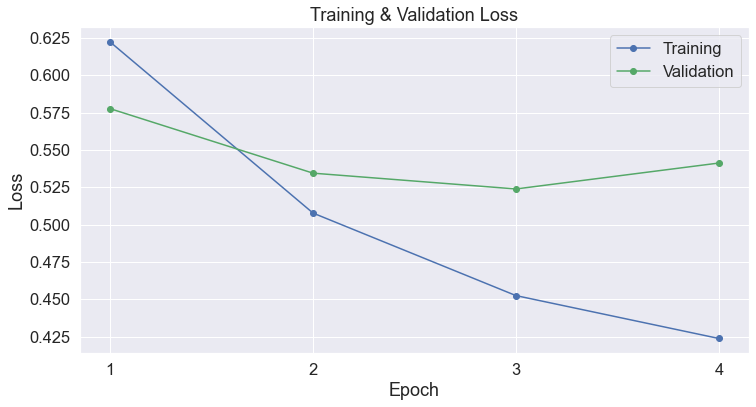

GPT2 Train
F1 macro: 0.8309502162490147
Accuracy:  0.835

Classification Report

               precision    recall  f1-score   support

           0       0.86      0.85      0.86      5217
           1       0.80      0.81      0.80      3783

    accuracy                           0.83      9000
   macro avg       0.83      0.83      0.83      9000
weighted avg       0.84      0.83      0.84      9000

GPT2 Dev
F1 macro: 0.7502832153776815
Accuracy:  0.754

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.76      0.78       573
           1       0.70      0.74      0.72       427

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000

GPT2 Test
F1 macro: 0.4520022768610339
Accuracy:  0.5006666666666667

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.17  

Training Loss                      Valid. Loss  Valid. Accur  \
epoch                                                                 
1           0.622300  tensor(0.5776, device='cuda:0')         0.714   
2           0.507691  tensor(0.5344, device='cuda:0')         0.726   
3           0.452422  tensor(0.5238, device='cuda:0')         0.746   
4           0.423705  tensor(0.5412, device='cuda:0')         0.754   

       Valid. F1 Training Time Validation Time  
epoch                                           
1       0.706866       0:06:30         0:00:13  
2       0.711252       0:06:29         0:00:13  
3       0.744018       0:06:29         0:00:13  
4       0.750283       0:06:29         0:00:13

In [50]:
df_stats = stats_training(training_stats)

y_pred_train_english_gpt2 = evaluate(model, english_train_gpt2, device, batch_size, "GPT2 Train")
y_pred_dev_english_gpt2 = evaluate(model, english_dev_gpt2, device, batch_size, "GPT2 Dev")
y_pred_test_english_gpt2 = evaluate(model, english_test_gpt2, device, batch_size, "GPT2 Test")

df_stats

In [51]:
description = """Pretrained model with gpt2 checkpoint (12 layers). Trained 4 epochs with a batch size of 16 and using AdamW optimizer with lr=2e-5 and eps=1e-8.
Hastags, users and links have been replaced with a word from input text, followed by the same procedure as in method direct_replacement()."""

save_results(y_pred_train_english_gpt2, english_train.index, "GPT2 base", "hateval2019/task1", "english", dataset_types.train, group="deep_learning", filename="gpt2", description=description)
save_results(y_pred_dev_english_gpt2, english_dev.index, "GPT2 base", "hateval2019/task1", "english", dataset_types.development, group="deep_learning", filename="gpt2", description=description)
save_results(y_pred_test_english_gpt2, english_test.index, "GPT2 base", "hateval2019/task1", "english", dataset_types.test, group="deep_learning", filename="gpt2", description=description)

Results saved on: ./results/hateval2019/task1/english/train/deep_learning/gpt2.pkl
Results saved on: ./results/hateval2019/task1/english/development/deep_learning/gpt2.pkl
Results saved on: ./results/hateval2019/task1/english/test/deep_learning/gpt2.pkl


#### Spanish

In [52]:
from transformers import GPT2Config, GPT2Tokenizer, GPT2ForSequenceClassification
import torch

print('Loading configuraiton...')
model_config = GPT2Config.from_pretrained('datificate/gpt2-small-spanish', num_labels=2)

# Get model's tokenizer.
print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained('datificate/gpt2-small-spanish')
# default to left padding
tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
tokenizer.pad_token = tokenizer.eos_token


# Get the actual model.
print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained('datificate/gpt2-small-spanish', config=model_config)

# resize model embedding to match new tokenizer
model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
model.config.pad_token_id = model.config.eos_token_id

Loading configuraiton...
Loading tokenizer...
Loading model...


In [54]:
from transformers import AdamW

print_example_nn(tokenizer, spanish_train.text.iloc[0], X_train_spanish_gpt2.iloc[0])

max_length_spanish = measure_max_length(tokenizer, [X_train_spanish_gpt2, X_dev_spanish_gpt2, X_test_spanish_gpt2], add_special_tokens=False)

spanish_train_gpt2 = generate_dataset(tokenizer, X_train_spanish_gpt2, spanish_train["HS"], max_length_spanish)
spanish_dev_gpt2 = generate_dataset(tokenizer, X_dev_spanish_gpt2, spanish_dev["HS"], max_length_spanish)
spanish_test_gpt2 = generate_dataset(tokenizer, X_test_spanish_gpt2, spanish_test["HS"], max_length_spanish)

device = torch.device('cuda:0')

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # learning_rate - default is 5e-5
                  eps = 1e-8 # adam_epsilon  - default is 1e-8.
                )

batch_size = 8
epochs = 4

 Original:  Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Tokenized:  ['E', 'as', 'y', 'jet', 'Ġquiere', 'Ġduplic', 'ar', 'Ġel', 'ĠnÃºmero', 'Ġde', 'Ġmujeres', 'Ġpiloto', "'", 'ĠVer', 'Ã¡s', 'ĠtÃº', 'Ġpara', 'Ġapar', 'car', 'Ġel', 'ĠaviÃ³n', '..', 'Ġhttp', '://', 't', '.', 'co', '/', '46', 'Nu', 'L', 'km', '09', 'x']
Token IDs:  [37, 271, 89, 36991, 6263, 17636, 268, 284, 1308, 258, 2068, 5622, 7, 3513, 393, 16120, 372, 897, 694, 284, 4971, 1470, 29480, 8481, 84, 14, 400, 15, 6861, 49360, 44, 4917, 14468, 88]

 Preprocessed:  easyjet quiere duplicar el numero de mujeres piloto' veras tu para aparcar el avion.. link
Tokenized:  ['eas', 'y', 'jet', 'Ġquiere', 'Ġduplic', 'ar', 'Ġel', 'Ġnum', 'ero', 'Ġde', 'Ġmujeres', 'Ġpiloto', "'", 'Ġver', 'as', 'Ġtu', 'Ġpara', 'Ġapar', 'car', 'Ġel', 'Ġavi', 'on', '..', 'Ġlin', 'k']
Token IDs:  [2211, 89, 36991, 6263, 17636, 268, 284, 1976, 459, 258, 2068, 5622, 7, 919, 271, 869, 372, 897, 69

In [55]:
training_stats = train(model, spanish_train_gpt2, spanish_dev_gpt2, optimizer, batch_size, epochs, device)


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    563.    Elapsed: 0:00:10.
  Batch    80  of    563.    Elapsed: 0:00:21.
  Batch   120  of    563.    Elapsed: 0:00:31.
  Batch   160  of    563.    Elapsed: 0:00:42.
  Batch   200  of    563.    Elapsed: 0:00:52.
  Batch   240  of    563.    Elapsed: 0:01:03.
  Batch   280  of    563.    Elapsed: 0:01:13.
  Batch   320  of    563.    Elapsed: 0:01:23.
  Batch   360  of    563.    Elapsed: 0:01:34.
  Batch   400  of    563.    Elapsed: 0:01:44.
  Batch   440  of    563.    Elapsed: 0:01:55.
  Batch   480  of    563.    Elapsed: 0:02:05.
  Batch   520  of    563.    Elapsed: 0:02:16.
  Batch   560  of    563.    Elapsed: 0:02:26.

  Average training loss: 0.71
  Training epcoh took: 0:02:27

Running Validation...
  Accuracy: 0.47
  F1 macro: 0.38
  Validation Loss: 0.72
  Validation took: 0:00:05

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    563.    Elapsed: 0:00:10.
  Batch    80  of    563.    Elapsed: 0

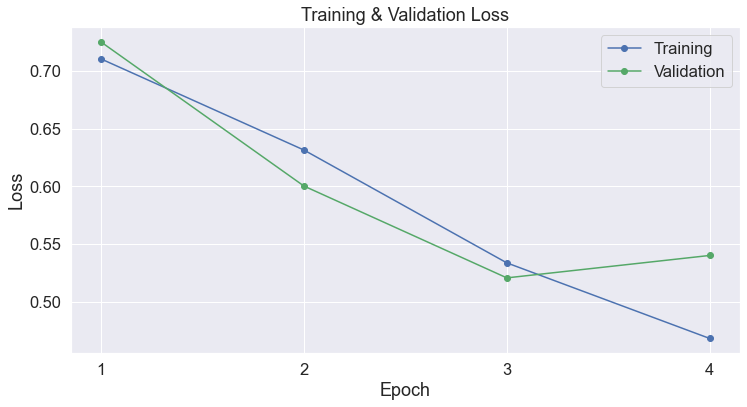

GPT2 Train
F1 macro: 0.819041726929186
Accuracy:  0.8233333333333334

Classification Report

               precision    recall  f1-score   support

           0       0.86      0.83      0.85      2643
           1       0.77      0.81      0.79      1857

    accuracy                           0.82      4500
   macro avg       0.82      0.82      0.82      4500
weighted avg       0.83      0.82      0.82      4500

GPT2 Dev
F1 macro: 0.7508479207857132
Accuracy:  0.752

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.74      0.77       278
           1       0.70      0.77      0.73       222

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500

GPT2 Test
F1 macro: 0.6786804902985766
Accuracy:  0.684375

Classification Report

               precision    recall  f1-score   support

           0       0.75      0.70

Training Loss                      Valid. Loss  Valid. Accur  \
epoch                                                                 
1           0.710182  tensor(0.7248, device='cuda:0')         0.474   
2           0.631500  tensor(0.6004, device='cuda:0')         0.684   
3           0.534040  tensor(0.5211, device='cuda:0')         0.732   
4           0.468755  tensor(0.5405, device='cuda:0')         0.752   

       Valid. F1 Training Time Validation Time  
epoch                                           
1       0.377341       0:02:27         0:00:05  
2       0.661090       0:02:27         0:00:05  
3       0.726325       0:02:27         0:00:05  
4       0.750848       0:02:27         0:00:05

In [56]:
df_stats = stats_training(training_stats)

y_pred_train_spanish_gpt2 = evaluate(model, spanish_train_gpt2, device, batch_size, "GPT2 Train")
y_pred_dev_spanish_gpt2 = evaluate(model, spanish_dev_gpt2, device, batch_size, "GPT2 Dev")
y_pred_test_spanish_gpt2 = evaluate(model, spanish_test_gpt2, device, batch_size, "GPT2 Test")

df_stats

In [57]:
description = """Pretrained model from datificate/gpt2-small-spanish checkpoint (12 layers). Trained 4 epochs with a batch size of 8 and using AdamW optimizer with lr=2e-5 and eps=1e-8.
Hastags, users and links have been replaced with a word from input text, followed by the same procedure as in method direct_replacement()."""

save_results(y_pred_train_spanish_gpt2, spanish_train.index, "GPT2 base", "hateval2019/task1", "spanish", dataset_types.train, group="deep_learning", filename="gpt2", description=description)
save_results(y_pred_dev_spanish_gpt2, spanish_dev.index, "GPT2 base", "hateval2019/task1", "spanish", dataset_types.development, group="deep_learning", filename="gpt2", description=description)
save_results(y_pred_test_spanish_gpt2, spanish_test.index, "GPT2 base", "hateval2019/task1", "spanish", dataset_types.test, group="deep_learning", filename="gpt2", description=description)

Results saved on: ./results/hateval2019/task1/spanish/train/deep_learning/gpt2.pkl
Results saved on: ./results/hateval2019/task1/spanish/development/deep_learning/gpt2.pkl
Results saved on: ./results/hateval2019/task1/spanish/test/deep_learning/gpt2.pkl


## 11. Atalaya
To run this section use tf-gpu-1.15 enviroment. Also needs to run sections 1, 2, 3, 4.

In [36]:
def preprocessing_nn(data, language='en'):
    """Generic neural network preprocessing. Uses method `direct_replacement()` of TF-IDF preprocessing secion. 
    Moreover, removes hastags and users because model tokenizers have difficulties tokenizing these words.
    """
    return direct_replacement(data.apply(lambda text: re.sub(r"[@#]\w+", "", text)), language=language)

X_train_english_nn = preprocessing_nn(english_train.text)
X_dev_english_nn = preprocessing_nn(english_dev.text)
X_test_english_nn = preprocessing_nn(english_test.text)

X_train_spanish_nn = preprocessing_nn(spanish_train.text, language="es")
X_dev_spanish_nn = preprocessing_nn(spanish_dev.text, language="es")
X_test_spanish_nn = preprocessing_nn(spanish_test.text, language="es")

X_train_detoxis_nn = preprocessing_nn(detoxis_train.comment, language="es")
X_dev_detoxis_nn = preprocessing_nn(detoxis_dev.comment, language="es")
X_test_detoxis_nn = preprocessing_nn(detoxis_test.comment, language="es")

In [37]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.python.util import deprecation
import pickle5 as pickle

# Replacament of module pickle for pickle5, to allow python < 3.8.3 to run.
pd.io.pickle.pickle = pickle

# Removal of warnings of deprecated methods in future versions
deprecation._PRINT_DEPRECATION_WARNINGS = False

elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

def ELMoEmbedding(input_text):
    return elmo(tf.reshape(tf.cast(input_text, tf.string), [-1]), signature="default", as_dict=True)["elmo"]

In [38]:
from tensorflow.keras.layers import Input, Lambda, Bidirectional, Dense, Dropout, LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.python.keras import backend as K

def build_model():
    """Reproduction of architecture that the Atalaya. Following the architecture of two inputs:
    - Input text is converted into Elmo embeding, followed by a BiLSTM with dropout and a layer composed of a dense and a dropout sublayer.
    - BoW embeding, followed by two layers of a dense and a dropout sublayer.
    All model architectural and optimizer parameters are the same as the specified on the paper.
    
    Paper title: 'Atalaya at SemEval 2019 Task 5: Robust Embeddings for TweetClassification.'
    Original authors: 'Juan Manuel Perez' and 'Franco M. Luque'.
    """
    # biLSTM-ELMo
    input_layer_elmo = Input(shape=(1,), dtype="string")
    embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ), name="Elmo_Embedding")(input_layer_elmo)
    BiLSTM = Bidirectional(LSTM(128, recurrent_dropout=0.2, dropout=0.2), name="BiLSTM")(embedding_layer)
    Dense_layer_1 = Dense(64, activation='relu')(BiLSTM)
    Dropout_layer_1 = Dropout(0.45)(Dense_layer_1)
    
    # BoW
    input_layer_bow = Input(shape=(3500,), dtype=np.float32)
    Dense_layer_2 = Dense(512, activation='relu')(input_layer_bow)
    Dropout_layer_2 = Dropout(0.2)(Dense_layer_2)
    Dense_layer_3 = Dense(64, activation='relu')(Dropout_layer_2)
    Dropout_layer_3 = Dropout(0.45)(Dense_layer_3)
    
    concatenate_layer = Concatenate()([Dropout_layer_1, Dropout_layer_3])
    output_layer = Dense(1, activation='sigmoid')(concatenate_layer)
    
    model = Model(inputs=[input_layer_elmo, input_layer_bow], outputs=output_layer, name="Atalaya")
    model.summary()
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Adam(learning_rate=35e-5, decay=0.01), metrics=['accuracy'])
    return model

def train_atalaya(model, train_nn, dev_nn, test_nn,
                  train_bow, dev_bow, test_bow,
                  train_y, dev_y, test_y, model_name, batch_size=64, epochs=25, f1_average='macro'):
    """Trains a atalaya model while saving the best models on disk. Also has EarlyStopping with patience 5.
    Prints also the scores of the predictions of the different subdatasets.
    Returns the model history and the predictions.
    """
    
    with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))) as session:
        K.set_session(session)
        session.run(tf.global_variables_initializer()) 
        session.run(tf.tables_initializer())

        random.seed(seed_val)
        np.random.seed(seed_val)
        tf.random.set_random_seed(seed_val)

        early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)
        model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./models/atalaya_"+ model_name +".h5", save_best_only=True)
        callbacks = [early_stopping_cb, model_checkpoint_cb]


        model_history = model.fit([train_nn, train_bow], train_y, epochs=epochs,
                                                shuffle=True, batch_size=batch_size, validation_data=([dev_nn, dev_bow], dev_y),
                                                callbacks=callbacks)

            
        train_prediction = (model.predict([train_nn, train_bow], batch_size=batch_size) >= 0.5)[:,0]
        dev_prediction = (model.predict([dev_nn, dev_bow], batch_size=batch_size) >= 0.5)[:,0]
        test_prediction = (model.predict([test_nn, test_bow], batch_size=batch_size) >= 0.5)[:,0]

        print_score(train_y, train_prediction, "Atalaya Train", f1_average)
        print_score(dev_y, dev_prediction, "Atalaya Dev", f1_average)
        print_score(test_y, test_prediction, "Atalaya Test", f1_average)
        
    return model_history, train_prediction, dev_prediction, test_prediction

def graph_model_history(model_history):
    """Auxiliar method tha plots two graphs one with the accuracity over each epoch and another with the loss instead.
    """

    accuracy = model_history.history['acc']
    val_accuracy = model_history.history['val_acc']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

### Hateval 2019
#### English

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "Atalaya"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3500)]       0                                            
__________________________________________________________________________________________________
Elmo_Embedding (Lambda)         (None, None, 1024)   0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          1792512     input_2[0][0]                    
____________________________________________________________________________________________

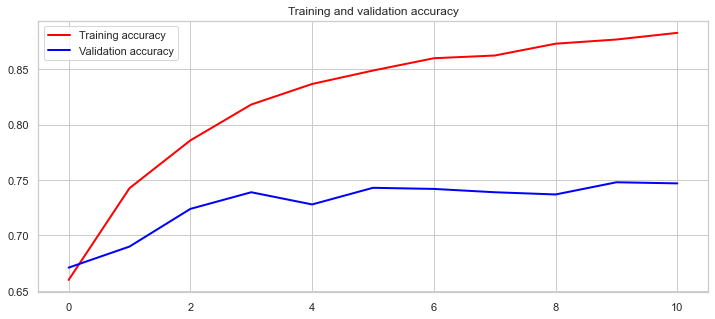

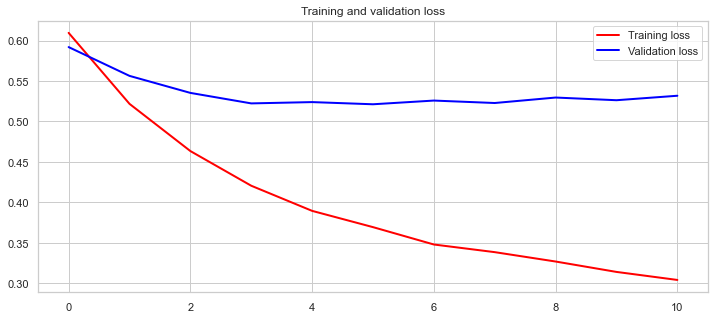

In [39]:
english_model = build_model()

model_elmo_history_english, train_prediction_english, dev_prediction_english, test_prediction_english = train_atalaya(english_model, X_train_english_nn, X_dev_english_nn, X_test_english_nn,
                                                                                                                      X_train_english, X_dev_english, X_test_english,
                                                                                                                      english_train["HS"], english_dev["HS"], english_test["HS"], "english")

graph_model_history(model_elmo_history_english)

In [40]:
description = """Reproduction of architecture that the Atalaya. Following the architecture of two inputs:
- Input text is converted into Elmo embeding, followed by a BiLSTM with dropout and a layer composed of a dense and a dropout sublayer.
- BoW embeding, followed by two layers of a dense and a dropout sublayer.
All model architectural and optimizer parameters are the same as the specified on the paper."""

save_results(train_prediction_english, english_train.index, "Atalaya", "hateval2019/task1", "english", dataset_types.train, group="deep_learning", filename="atalaya", description=description)
save_results(dev_prediction_english, english_dev.index, "Atalaya", "hateval2019/task1", "english", dataset_types.development, group="deep_learning", filename="atalaya", description=description)
save_results(test_prediction_english, english_test.index, "Atalaya", "hateval2019/task1", "english", dataset_types.test, group="deep_learning", filename="atalaya", description=description)

Results saved on: ./results/hateval2019/task1/english/train/deep_learning/atalaya.pkl
Results saved on: ./results/hateval2019/task1/english/development/deep_learning/atalaya.pkl
Results saved on: ./results/hateval2019/task1/english/test/deep_learning/atalaya.pkl


#### Spanish

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "Atalaya"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 3500)]       0                                            
__________________________________________________________________________________________________
Elmo_Embedding (Lambda)         (None, None, 1024)   0           input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 512)          1792512     input_4[0][0]                    
____________________________________________________________________________________________

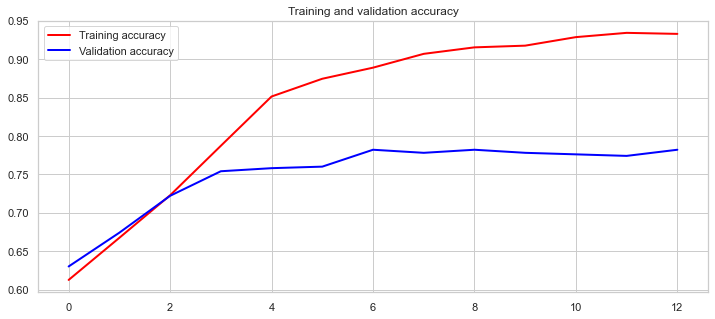

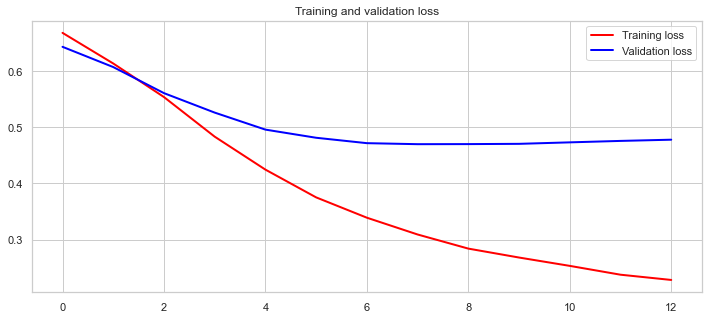

In [41]:
spanish_model = build_model()

model_elmo_history_spanish, train_prediction_spanish, dev_prediction_spanish, test_prediction_spanish = train_atalaya(spanish_model, X_train_spanish_nn, X_dev_spanish_nn, X_test_spanish_nn,
                                                                                      X_train_spanish, X_dev_spanish, X_test_spanish,
                                                                                      spanish_train["HS"], spanish_dev["HS"], spanish_test["HS"], "spanish")

graph_model_history(model_elmo_history_spanish)

In [42]:
description = """Reproduction of architecture that the Atalaya. Following the architecture of two inputs:
- Input text is converted into Elmo embeding, followed by a BiLSTM with dropout and a layer composed of a dense and a dropout sublayer.
- BoW embeding, followed by two layers of a dense and a dropout sublayer.
All model architectural and optimizer parameters are the same as the specified on the paper."""

save_results(train_prediction_spanish, spanish_train.index, "Atalaya", "hateval2019/task1", "spanish", dataset_types.train, group="deep_learning", filename="atalaya", description=description)
save_results(dev_prediction_spanish, spanish_dev.index, "Atalaya", "hateval2019/task1", "spanish", dataset_types.development, group="deep_learning", filename="atalaya", description=description)
save_results(test_prediction_spanish, spanish_test.index, "Atalaya", "hateval2019/task1", "spanish", dataset_types.test, group="deep_learning", filename="atalaya", description=description)

Results saved on: ./results/hateval2019/task1/spanish/train/deep_learning/atalaya.pkl
Results saved on: ./results/hateval2019/task1/spanish/development/deep_learning/atalaya.pkl
Results saved on: ./results/hateval2019/task1/spanish/test/deep_learning/atalaya.pkl


### Detoxis

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "Atalaya"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 3500)]       0                                            
__________________________________________________________________________________________________
Elmo_Embedding (Lambda)         (None, None, 1024)   0           input_5[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 512)          1792512     input_6[0][0]                    
____________________________________________________________________________________________

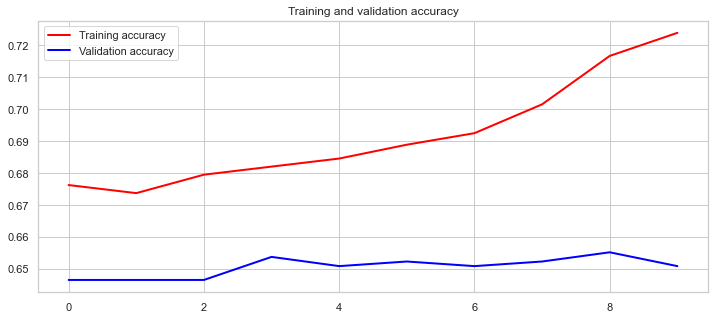

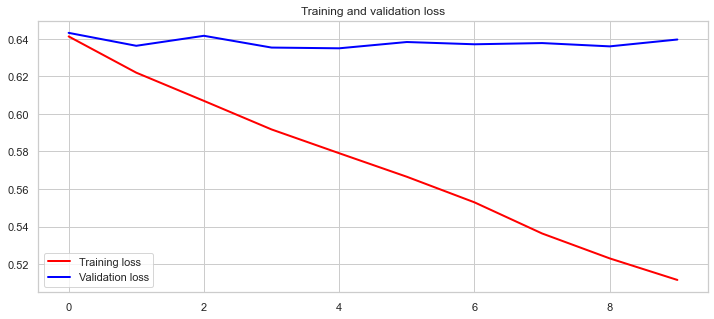

In [43]:
detoxis_model = build_model()

model_elmo_history_detoxis, train_prediction_detoxis, dev_prediction_detoxis, test_prediction_detoxis = train_atalaya(detoxis_model, X_train_detoxis_nn, X_dev_detoxis_nn, X_test_detoxis_nn,
                                                                                      X_train_detoxis, X_dev_detoxis, X_test_detoxis,
                                                                                      detoxis_train["toxicity"], detoxis_dev["toxicity"], None, "detoxis", batch_size=16, f1_average='binary')

graph_model_history(model_elmo_history_detoxis)

In [44]:
description = """Reproduction of architecture that the Atalaya. Following the architecture of two inputs:
- Input text is converted into Elmo embeding, followed by a BiLSTM with dropout and a layer composed of a dense and a dropout sublayer.
- BoW embeding, followed by two layers of a dense and a dropout sublayer.
All model architectural and optimizer parameters are the same as the specified on the paper."""

save_results(train_prediction_detoxis, range(len(detoxis_train.index)), "Atalaya", "detoxis/task1", "spanish", dataset_types.train, group="deep_learning", filename="atalaya", description=description)
save_results(dev_prediction_detoxis, range(len(detoxis_dev.index)), "Atalaya", "detoxis/task1", "spanish", dataset_types.development, group="deep_learning", filename="atalaya", description=description)
save_results(test_prediction_detoxis, range(len(detoxis_test.index)), "Atalaya", "detoxis/task1", "spanish", dataset_types.test, group="deep_learning", filename="atalaya", description=description)

Results saved on: ./results/detoxis/task1/spanish/train/deep_learning/atalaya.pkl
Results saved on: ./results/detoxis/task1/spanish/development/deep_learning/atalaya.pkl
Results saved on: ./results/detoxis/task1/spanish/test/deep_learning/atalaya.pkl


## 12. SBERT
### Encoding datasets

In [58]:
X_train_english_sbert = X_train_english_nn.reset_index(drop=True)
X_dev_english_sbert = X_dev_english_nn.reset_index(drop=True)
X_test_english_sbert = X_test_english_nn.reset_index(drop=True)

X_train_spanish_sbert = X_train_spanish_nn.reset_index(drop=True)
X_dev_spanish_sbert = X_dev_spanish_nn.reset_index(drop=True)
X_test_spanish_sbert = X_test_spanish_nn.reset_index(drop=True)

In [59]:
from sentence_transformers import SentenceTransformer

model_english = SentenceTransformer('paraphrase-mpnet-base-v2') 
model_spanish = SentenceTransformer('distiluse-base-multilingual-cased-v1')

X_train_english_embeddings = model_english.encode(X_train_english_sbert)
X_dev_english_embeddings = model_english.encode(X_dev_english_sbert)
X_test_english_embeddings = model_english.encode(X_test_english_sbert)

X_train_spanish_embeddings = model_spanish.encode(X_train_spanish_sbert)
X_dev_spanish_embeddings = model_spanish.encode(X_dev_spanish_sbert)
X_test_spanish_embeddings = model_spanish.encode(X_test_spanish_sbert)

X_train_detoxis_embeddings = model_spanish.encode(X_train_detoxis_nn)
X_dev_detoxis_embeddings = model_spanish.encode(X_dev_detoxis_nn)
X_test_detoxis_embeddings = model_spanish.encode(X_test_detoxis_nn)

### Classification models

In [60]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

ridge = RidgeClassifier(random_state=seed_val)
random_forest = RandomForestClassifier(random_state=seed_val)
mlp = MLPClassifier(early_stopping=True, random_state=seed_val) 
svc = SVC(random_state=seed_val)
adaboost = AdaBoostClassifier(random_state=seed_val)

models = {
    ridge: "Ridge Classifier",
    random_forest: "Random Forest classifier",
    svc: "Support Vector Classification",
    adaboost: "AdaBoost classifier",
    mlp: "Multi-layer Perceptron classifier"
}

#### Hateval 2019
##### English

In [61]:
fit_models(X_train_english_embeddings, english_train['HS'], models)

print("TRAIN:")
train_scores_english, train_preds_spanish = print_scores(X_train_english_embeddings, english_train["HS"], models)

print("\n\nDEV:")
dev_scores_english, dev_preds_spanish = print_scores(X_dev_english_embeddings, english_dev["HS"], models)

Model Ridge Classifier fitted
Model Random Forest classifier fitted
Model Support Vector Classification fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier fitted
TRAIN:
Ridge Classifier
F1 macro: 0.8036812417375514
Accuracy:  0.8097777777777778

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.85      0.84      5217
           1       0.79      0.75      0.77      3783

    accuracy                           0.81      9000
   macro avg       0.81      0.80      0.80      9000
weighted avg       0.81      0.81      0.81      9000

Random Forest classifier
F1 macro: 0.998973689959263
Accuracy:  0.999

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5217
           1       1.00      1.00      1.00      3783

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighte

In [62]:
print("TRAIN:\n", train_scores_english)
print("\n\nDEV:\n", dev_scores_english)

TRAIN:
                                    F1 macro  Accuracy
Ridge Classifier                   0.803681  0.809778
Random Forest classifier           0.998974  0.999000
Support Vector Classification      0.899961  0.902667
AdaBoost classifier                0.752363  0.760556
Multi-layer Perceptron classifier  0.870286  0.873667


DEV:
                                    F1 macro  Accuracy
Ridge Classifier                   0.720346     0.725
Random Forest classifier           0.700366     0.715
Support Vector Classification      0.734155     0.739
AdaBoost classifier                0.673757     0.681
Multi-layer Perceptron classifier  0.731462     0.736


##### Spanish

In [63]:
fit_models(X_train_spanish_embeddings, spanish_train['HS'], models)

print("TRAIN:")
train_scores_spanish, train_preds_spanish = print_scores(X_train_spanish_embeddings, spanish_train["HS"], models)

print("\n\nDEV:")
dev_scores_spanish, dev_preds_spanish = print_scores(X_dev_spanish_embeddings, spanish_dev["HS"], models)

Model Ridge Classifier fitted
Model Random Forest classifier fitted
Model Support Vector Classification fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier fitted
TRAIN:
Ridge Classifier
F1 macro: 0.7896975906940721
Accuracy:  0.7982222222222223

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.85      0.83      2643
           1       0.77      0.72      0.75      1857

    accuracy                           0.80      4500
   macro avg       0.79      0.79      0.79      4500
weighted avg       0.80      0.80      0.80      4500

Random Forest classifier
F1 macro: 0.9997708031186054
Accuracy:  0.9997777777777778

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2643
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00    

In [64]:
print("TRAIN:\n", train_scores_spanish)
print("\n\nDEV:\n", dev_scores_spanish)

TRAIN:
                                    F1 macro  Accuracy
Ridge Classifier                   0.789698  0.798222
Random Forest classifier           0.999771  0.999778
Support Vector Classification      0.918697  0.921778
AdaBoost classifier                0.750652  0.761556
Multi-layer Perceptron classifier  0.857652  0.863333


DEV:
                                    F1 macro  Accuracy
Ridge Classifier                   0.744065     0.748
Random Forest classifier           0.643766     0.678
Support Vector Classification      0.777252     0.782
AdaBoost classifier                0.686957     0.694
Multi-layer Perceptron classifier  0.757380     0.762


#### Detoxis

In [65]:
fit_models(X_train_detoxis_embeddings, detoxis_train['toxicity'], models)

print("\n\nTRAIN:")
train_scores_detoxis, train_preds_detoxis = print_scores(X_train_detoxis_embeddings, detoxis_train['toxicity'], models, f1_average='binary')

print("\n\nDEV:")
dev_scores_detoxis, dev_preds_detoxis = print_scores(X_dev_detoxis_embeddings, detoxis_dev['toxicity'], models, f1_average='binary')

Model Ridge Classifier fitted
Model Random Forest classifier fitted
Model Support Vector Classification fitted
Model AdaBoost classifier fitted
Model Multi-layer Perceptron classifier fitted


TRAIN:
Ridge Classifier
F1 binary: 0.6239372138652715
Accuracy:  0.7924187725631769

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1869
           1       0.76      0.53      0.62       901

    accuracy                           0.79      2770
   macro avg       0.78      0.72      0.74      2770
weighted avg       0.79      0.79      0.78      2770

Random Forest classifier
F1 binary: 0.9994447529150472
Accuracy:  0.9996389891696751

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1869
           1       1.00      1.00      1.00       901

    accuracy                           1.00      2770
   macro avg       1.00      1.00      1.00

In [66]:
print("TRAIN:\n", train_scores_detoxis)
print("\n\nDEV:\n", dev_scores_detoxis)

TRAIN:
                                    F1 binary  Accuracy
Ridge Classifier                    0.623937  0.792419
Random Forest classifier            0.999445  0.999639
Support Vector Classification       0.825336  0.901444
AdaBoost classifier                 0.624010  0.777256
Multi-layer Perceptron classifier   0.663809  0.801805


DEV:
                                    F1 binary  Accuracy
Ridge Classifier                    0.586207  0.757576
Random Forest classifier            0.288660  0.701299
Support Vector Classification       0.565333  0.764791
AdaBoost classifier                 0.501149  0.686869
Multi-layer Perceptron classifier   0.618605  0.763348


## 13. Searching the best hyperparameters (SBERT)

This section can be ignored and just observer the results. 
Execution can take more than 24h with a i7-7700k. 
Brief mention that the results of Multi-layer Perception classifier are stored on disk and can be loaded again. 

### Ridge Classifier
#### Hateval 2019
##### English

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.64 (0.7302364088558471)


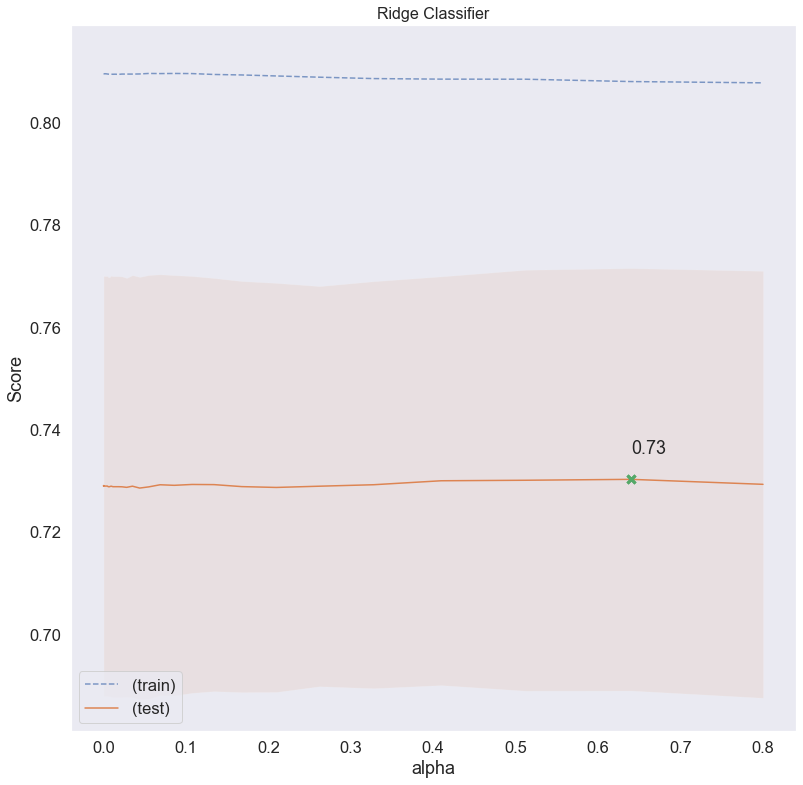

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.640000         0.730236        0.041271          0.807971         0.003514
0.512000         0.730058        0.041123          0.808430         0.003462
0.409600         0.729959        0.039931          0.808445         0.003491
0.800000         0.729263        0.041711          0.807721         0.003468
0.107374         0.729237        0.040724          0.809531         0.003290
0.134218         0.729206        0.040365          0.809357         0.003400
0.327680         0.729182        0.039760          0.808554         0.003270
0.068719         0.729177        0.041123          0.809531         0.003244
0.085899         0.729068        0.041066          0.809555         0.003228
0.000166         0.729028        0.041121          0.809475         0.003117

In [69]:
param_grid = {'alpha': [1.25 ** (i) for i in range(-40,0)]}

grid_search(ridge, X_train_english_embeddings, english_train['HS'], param_grid, models[ridge])[0]

##### Spanish

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.512 (0.7430145911432102)


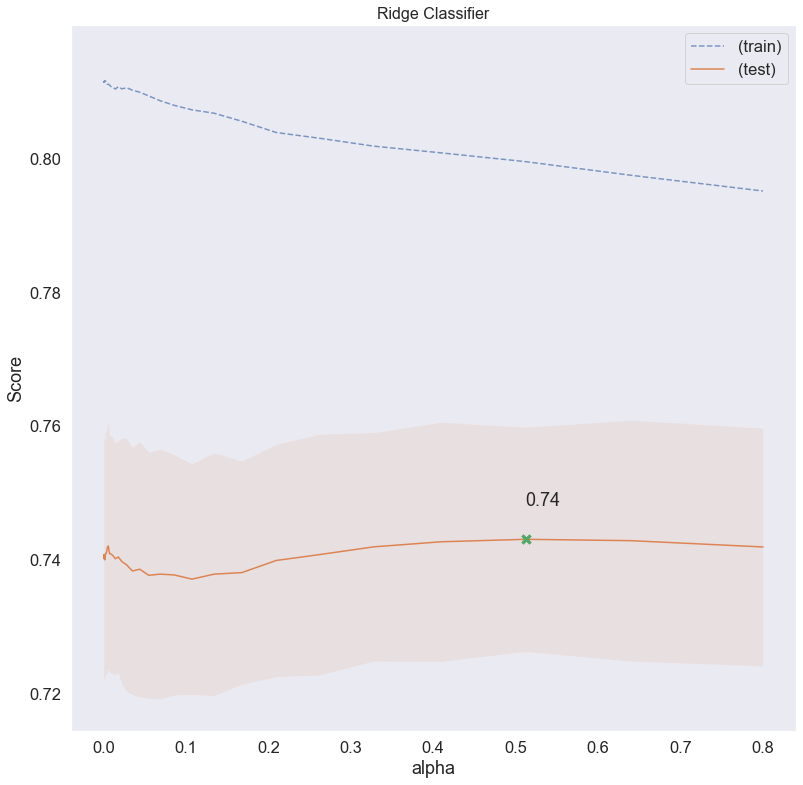

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.512000         0.743015        0.016787          0.799482         0.003195
0.640000         0.742809        0.018041          0.797439         0.002932
0.409600         0.742644        0.017905          0.800792         0.003846
0.005903         0.742006        0.018503          0.811059         0.003236
0.327680         0.741885        0.017100          0.801800         0.003863
0.800000         0.741871        0.017786          0.795091         0.003494
0.004722         0.741758        0.018522          0.811052         0.003430
0.003778         0.741088        0.018153          0.811335         0.003556
0.002418         0.740888        0.018148          0.811523         0.003487
0.003022         0.740881        0.018197          0.811461         0.003633

In [70]:
param_grid = {'alpha': [1.25 ** (i) for i in range(-40,0)]}

grid_search(ridge, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[ridge])[0]

#### Detoxis

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best alpha: 0.4096 (0.5097559148130197)


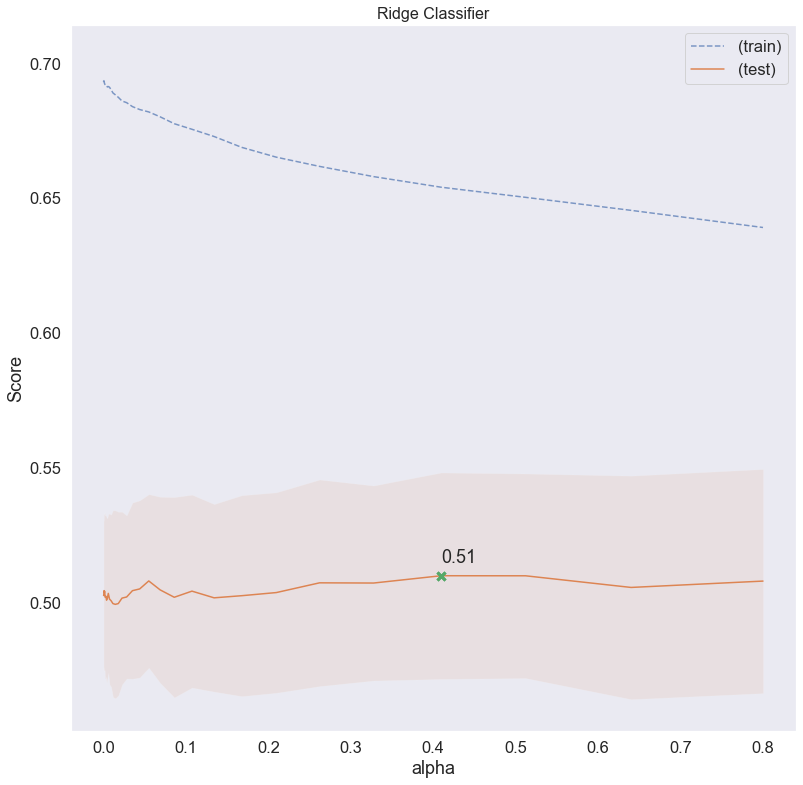

mean_test_score  std_test_score  mean_train_score  std_train_score
alpha                                                                       
0.409600         0.509756        0.038291          0.653920         0.010989
0.512000         0.509734        0.037941          0.650163         0.009808
0.054976         0.507818        0.032193          0.681854         0.010590
0.800000         0.507769        0.041570          0.638976         0.010273
0.262144         0.507123        0.038320          0.661644         0.010980
0.327680         0.507045        0.036167          0.657855         0.010585
0.640000         0.505412        0.041462          0.645334         0.010462
0.043980         0.504863        0.032847          0.682738         0.010864
0.068719         0.504517        0.034528          0.680052         0.011038
0.035184         0.504211        0.032688          0.683832         0.009799

In [71]:
param_grid = {'alpha': [1.25 ** (i) for i in range(-40,0)]}

grid_search(ridge, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[ridge], scoring='f1')[0]

### Random Forest classifier
#### Hateval 2019
##### English

In [72]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2 ** (i) for i in range(1,10)] + [None],
    'n_estimators': [2 ** (i) for i in range(1,10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

random_forest_CV_english, random_forest_CV_english_model = grid_search(random_forest, X_train_english_embeddings, english_train['HS'], param_grid, models[random_forest], cv=5)
random_forest_CV_english

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


mean_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                    
True      256.0     1                2                 256                  0.680845   
          NaN       1                2                 256                  0.680845   
          512.0     1                2                 256                  0.680845   
          128.0     1                2                 256                  0.680845   
          64.0      1                2                 256                  0.680845   
          32.0      2                5                 512                  0.680724   
                    1                2                 256                  0.680294   
          NaN       2                2                 512                  0.680268   
          128.0     2                2                 512                  0.680268   
          64.0      2                2                 512                  0.680268   

                                                                     std_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      256.0     1                2                 256                 0.046910   
          NaN       1                2                 256                 0.046910   
          512.0     1                2                 256                 0.046910   
          128.0     1                2                 256                 0.046910   
          64.0      1                2                 256                 0.046910   
          32.0      2                5                 512                 0.047764   
                    1                2                 256                 0.046288   
          NaN       2                2                 512                 0.048832   
          128.0     2                2                 512                 0.048832   
          64.0      2                2                 512                 0.048832   

                                                                     mean_train_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                     
True      256.0     1                2                 256                   0.999031   
          NaN       1                2                 256                   0.999031   
          512.0     1                2                 256                   0.999031   
          128.0     1                2                 256                   0.999031   
          64.0      1                2                 256                   0.999031   
          32.0      2                5                 512                   0.998974   
                    1                2                 256                   0.999031   
          NaN       2                2                 512                   0.999002   
          128.0     2                2                 512                   0.999002   
          64.0      2                2                 512                   0.999002   

                                                                     std_train_score  
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      256.0     1                2                 256                  0.000291  
          NaN       1                2                 256                  0.000291  
          512.0     1                2                 256                  0.000291  
          128.0     1                2                 256                  0.000291  
          64.0      1                2                 256                  0.000291  
          32.0      2                5                 512                  0.000245  
                    1                2                 256                  0.000291  
          NaN       2                2                 512                  0.000238  
          128.0     2       

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best max_features: 0.512 (0.694332109359163)


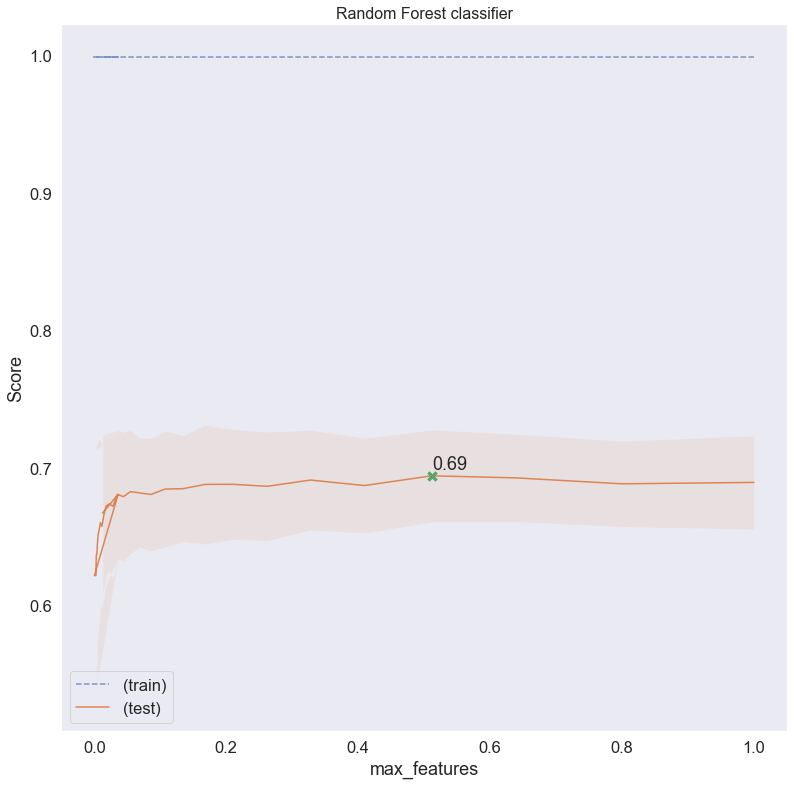

RandomForestClassifier(max_depth=64, max_features=0.512, n_estimators=256,
                       random_state=42)


mean_test_score  std_test_score  mean_train_score  \
max_features                                                      
0.512000             0.694332        0.033510          0.999031   
0.640000             0.692794        0.031875          0.999031   
0.327680             0.691231        0.036418          0.999031   
1.000000             0.689524        0.034053          0.999031   
0.800000             0.688505        0.031181          0.999031   
0.209715             0.688156        0.040028          0.999031   
0.167772             0.688062        0.043407          0.999031   
0.409600             0.687261        0.034602          0.999031   
0.262144             0.686695        0.039604          0.999031   
0.134218             0.684948        0.038734          0.999031   

              std_train_score  
max_features                   
0.512000             0.000291  
0.640000             0.000291  
0.327680             0.000291  
1.000000             0.000291  
0.800000             0.000291  
0.209715             0.000291  
0.167772             0.000291  
0.409600             0.000291  
0.262144             0.000291  
0.134218             0.000291

In [73]:
param_grid = {'max_features': [1.25 ** (-i) for i in range(40)] + [X_train_english_embeddings.shape[1] ** 0.5 / X_train_english_embeddings.shape[1], np.log2(X_train_english_embeddings.shape[1]) / X_train_english_embeddings.shape[1]]} # last two = sqrt and log2

random_forest_CV_english_2, random_forest_CV_english_model_2 = grid_search(random_forest_CV_english_model, X_train_english_embeddings, english_train['HS'], param_grid, models[random_forest], cv=5)

print(random_forest_CV_english_model_2)
random_forest_CV_english_2

##### Spanish

In [74]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2 ** (i) for i in range(1,10)] + [None],
    'n_estimators': [2 ** (i) for i in range(1,10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

random_forest_CV_spanish, random_forest_CV_spanish_model = grid_search(random_forest, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[random_forest], cv=5)
random_forest_CV_spanish

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


mean_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                    
True      256.0     1                5                 128                  0.683478   
          512.0     1                5                 128                  0.683478   
          64.0      1                5                 128                  0.683478   
          NaN       1                5                 128                  0.683478   
          128.0     1                5                 128                  0.683478   
          32.0      1                10                64                   0.682647   
          16.0      1                2                 32                   0.681815   
          32.0      1                5                 128                  0.681685   
          NaN       1                10                64                   0.680926   
          512.0     1                10                64                   0.680926   

                                                                     std_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      256.0     1                5                 128                 0.009015   
          512.0     1                5                 128                 0.009015   
          64.0      1                5                 128                 0.009015   
          NaN       1                5                 128                 0.009015   
          128.0     1                5                 128                 0.009015   
          32.0      1                10                64                  0.009486   
          16.0      1                2                 32                  0.014467   
          32.0      1                5                 128                 0.011701   
          NaN       1                10                64                  0.013626   
          512.0     1                10                64                  0.013626   

                                                                     mean_train_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                     
True      256.0     1                5                 128                   0.999828   
          512.0     1                5                 128                   0.999828   
          64.0      1                5                 128                   0.999828   
          NaN       1                5                 128                   0.999828   
          128.0     1                5                 128                   0.999828   
          32.0      1                10                64                    0.999427   
          16.0      1                2                 32                    0.999599   
          32.0      1                5                 128                   0.999828   
          NaN       1                10                64                    0.999427   
          512.0     1                10                64                    0.999427   

                                                                     std_train_score  
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      256.0     1                5                 128                  0.000140  
          512.0     1                5                 128                  0.000140  
          64.0      1                5                 128                  0.000140  
          NaN       1                5                 128                  0.000140  
          128.0     1                5                 128                  0.000140  
          32.0      1                10                64                   0.000444  
          16.0      1                2                 32                   0.000140  
          32.0      1                5                 128                  0.000140  
          NaN       1       

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best max_features: 0.64 (0.7045758061970508)


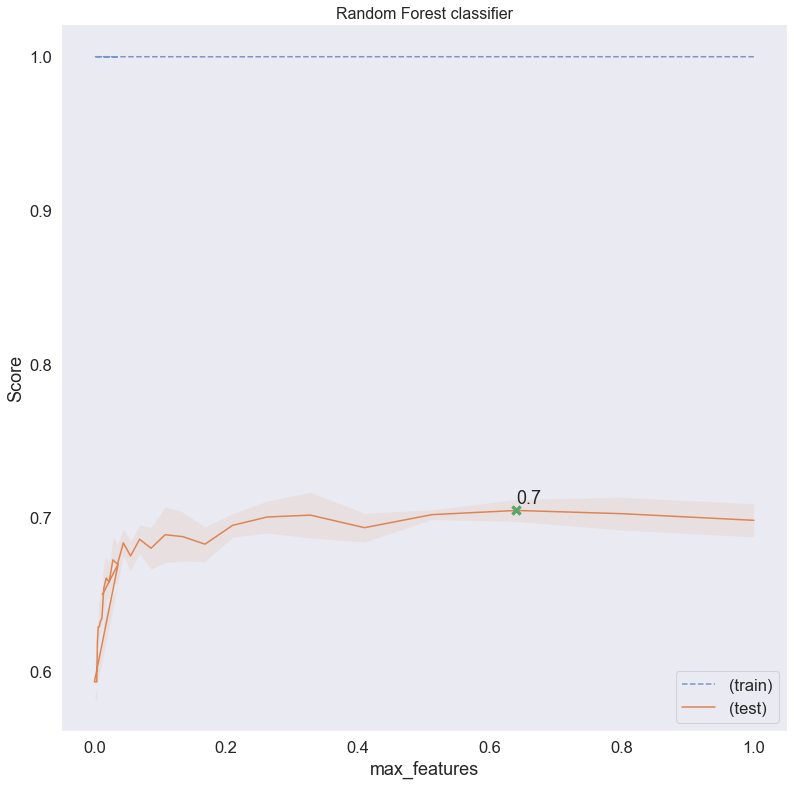

RandomForestClassifier(max_depth=64, max_features=0.64, min_samples_split=5,
                       n_estimators=128, random_state=42)


mean_test_score  std_test_score  mean_train_score  \
max_features                                                      
0.640000             0.704576        0.007307          0.999828   
0.800000             0.702474        0.010768          0.999828   
0.512000             0.701851        0.003295          0.999828   
0.327680             0.701532        0.014950          0.999828   
0.262144             0.700316        0.010544          0.999828   
1.000000             0.698157        0.010893          0.999828   
0.209715             0.694890        0.007841          0.999771   
0.409600             0.693371        0.009531          0.999828   
0.107374             0.688789        0.018292          0.999828   
0.134218             0.687532        0.016039          0.999828   

              std_train_score  
max_features                   
0.640000             0.000140  
0.800000             0.000140  
0.512000             0.000140  
0.327680             0.000140  
0.262144             0.000140  
1.000000             0.000140  
0.209715             0.000115  
0.409600             0.000140  
0.107374             0.000140  
0.134218             0.000140

In [75]:
param_grid = {'max_features': [1.25 ** (-i) for i in range(40)] + [X_train_english_embeddings.shape[1] ** 0.5 / X_train_english_embeddings.shape[1], np.log2(X_train_english_embeddings.shape[1]) / X_train_english_embeddings.shape[1]]} # last two = sqrt and log2

random_forest_CV_spanish_2, random_forest_CV_spanish_model_2 = grid_search(random_forest_CV_spanish_model, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[random_forest], cv=5)

print(random_forest_CV_spanish_model_2)
random_forest_CV_spanish_2

#### Detoxis

In [76]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2 ** (i) for i in range(1,10)] + [None],
    'n_estimators': [2 ** (i) for i in range(1,10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

random_forest_CV_detoxis, random_forest_CV_detoxis_model = grid_search(random_forest, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[random_forest], cv=5, scoring='f1')
random_forest_CV_detoxis

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


mean_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                    
True      8.0       2                2                 2                    0.370696   
                                     10                2                    0.368550   
          32.0      4                10                4                    0.364713   
          256.0     4                10                4                    0.364713   
          64.0      4                10                4                    0.364713   
          NaN       4                10                4                    0.364713   
          512.0     4                10                4                    0.364713   
          128.0     4                10                4                    0.364713   
          16.0      1                10                4                    0.363774   
          8.0       4                10                2                    0.363711   

                                                                     std_test_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      8.0       2                2                 2                   0.038319   
                                     10                2                   0.032892   
          32.0      4                10                4                   0.032033   
          256.0     4                10                4                   0.032033   
          64.0      4                10                4                   0.032033   
          NaN       4                10                4                   0.032033   
          512.0     4                10                4                   0.032033   
          128.0     4                10                4                   0.032033   
          16.0      1                10                4                   0.040428   
          8.0       4                10                2                   0.034892   

                                                                     mean_train_score  \
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                     
True      8.0       2                2                 2                     0.677505   
                                     10                2                     0.669558   
          32.0      4                10                4                     0.835924   
          256.0     4                10                4                     0.835924   
          64.0      4                10                4                     0.835924   
          NaN       4                10                4                     0.835924   
          512.0     4                10                4                     0.835924   
          128.0     4                10                4                     0.835924   
          16.0      1                10                4                     0.868980   
          8.0       4                10                2                     0.655950   

                                                                     std_train_score  
bootstrap max_depth min_samples_leaf min_samples_split n_estimators                   
True      8.0       2                2                 2                    0.024810  
                                     10                2                    0.015671  
          32.0      4                10                4                    0.005759  
          256.0     4                10                4                    0.005759  
          64.0      4                10                4                    0.005759  
          NaN       4                10                4                    0.005759  
          512.0     4                10                4                    0.005759  
          128.0     4                10                4                    0.005759  
          16.0      1       

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best max_features: 0.64 (0.4116360899283814)


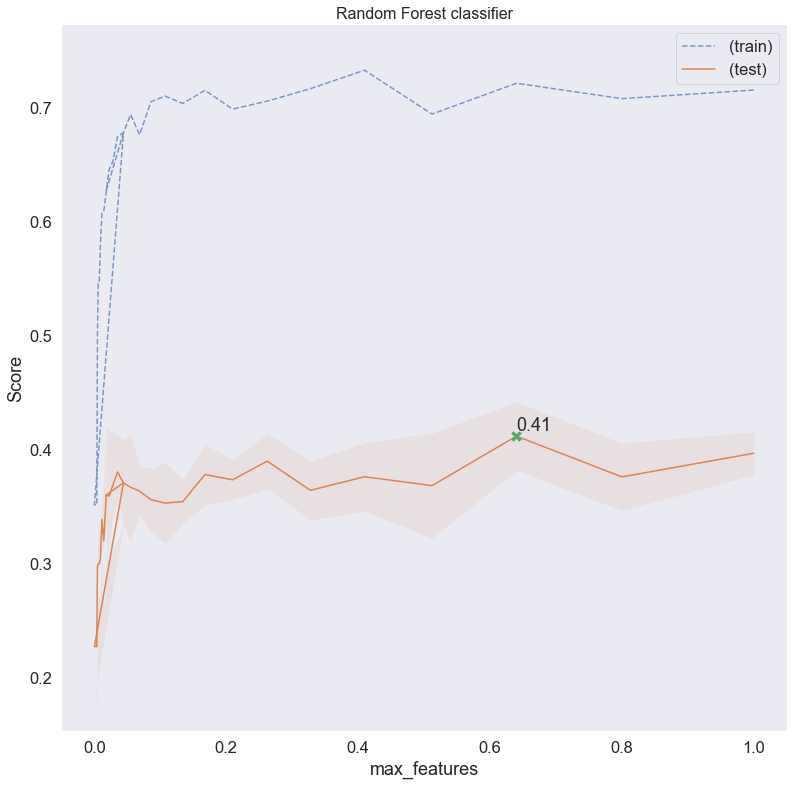

RandomForestClassifier(max_depth=8, max_features=0.64, min_samples_leaf=2,
                       n_estimators=2, random_state=42)


mean_test_score  std_test_score  mean_train_score  \
max_features                                                      
0.640000             0.411636        0.030165          0.721055   
1.000000             0.396663        0.018960          0.715097   
0.262144             0.389725        0.024456          0.705374   
0.035184             0.380207        0.023906          0.674368   
0.167772             0.377949        0.026703          0.714882   
0.409600             0.376024        0.030090          0.732492   
0.800000             0.375926        0.029698          0.707541   
0.209715             0.373389        0.017509          0.698363   
0.044194             0.370696        0.038319          0.677505   
0.043980             0.370696        0.038319          0.677505   

              std_train_score  
max_features                   
0.640000             0.008682  
1.000000             0.010119  
0.262144             0.029019  
0.035184             0.013045  
0.167772             0.009610  
0.409600             0.012032  
0.800000             0.013215  
0.209715             0.006660  
0.044194             0.024810  
0.043980             0.024810

In [77]:
param_grid = {'max_features': [1.25 ** (-i) for i in range(40)] + [X_train_detoxis_embeddings.shape[1] ** 0.5 / X_train_detoxis_embeddings.shape[1], np.log2(X_train_detoxis_embeddings.shape[1]) / X_train_detoxis_embeddings.shape[1]]} # last two = sqrt and log2

random_forest_CV_detoxis_2, random_forest_CV_detoxis_model_2 = grid_search(random_forest_CV_detoxis_model, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[random_forest], cv=5, scoring='f1')

print(random_forest_CV_detoxis_model_2)
random_forest_CV_detoxis_2

### Support Vector Classification
#### Hateval 2019
##### English

In [78]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1.25 ** i for i in range(30)]}

svc_CV_english, svc_CV_english_model = grid_search(svc, X_train_english_embeddings, english_train['HS'], param_grid, models[svc], cv=10)
svc_CV_english

Fitting 10 folds for each of 90 candidates, totalling 900 fits


mean_test_score  std_test_score  mean_train_score  \
C        kernel                                                      
1.953125 rbf            0.756777        0.047358          0.954037   
1.562500 rbf            0.755738        0.048023          0.937786   
2.441406 rbf            0.755080        0.046854          0.969698   
1.250000 rbf            0.755033        0.046791          0.918280   
1.000000 rbf            0.754536        0.046687          0.901050   
3.051758 rbf            0.753833        0.044997          0.982679   
3.814697 rbf            0.752023        0.044769          0.990156   
4.768372 rbf            0.750742        0.044015          0.995745   
5.960464 rbf            0.749306        0.042161          0.998049   
7.450581 rbf            0.746594        0.043008          0.998708   

                 std_train_score  
C        kernel                   
1.953125 rbf            0.001316  
1.562500 rbf            0.001690  
2.441406 rbf            0.001738  
1.250000 rbf            0.001938  
1.000000 rbf            0.001822  
3.051758 rbf            0.000988  
3.814697 rbf            0.000352  
4.768372 rbf            0.000393  
5.960464 rbf            0.000290  
7.450581 rbf            0.000168

In [79]:
param_grid = {'gamma': [1.25 ** (-i) for i in range(30)] + ['scale', 'auto']}
 
svc_CV_english_2, svc_CV_english_model_2 = grid_search(svc_CV_english_model, X_train_english_embeddings, english_train['HS'], param_grid, models[svc])

print(svc_CV_english_model_2)
svc_CV_english_2

Fitting 10 folds for each of 32 candidates, totalling 320 fits
SVC(C=1.953125, random_state=42)


mean_test_score  std_test_score  mean_train_score  \
gamma                                                                 
scale                    0.756777        0.047358          0.954037   
0.1073741824             0.756244        0.046773          0.957873   
0.16777216               0.756136        0.045690          0.990674   
0.134217728              0.755713        0.045450          0.979102   
0.08589934592            0.755538        0.047985          0.935186   
0.2097152                0.754701        0.045668          0.996580   
0.068719476736           0.753274        0.048467          0.909238   
0.0549755813888          0.752508        0.046995          0.885628   
0.262144                 0.751784        0.047454          0.998429   
0.04398046511104         0.751332        0.048368          0.865156   

                  std_train_score  
gamma                              
scale                    0.001316  
0.1073741824             0.001426  
0.16777216               0.000566  
0.134217728              0.000764  
0.08589934592            0.001728  
0.2097152                0.000283  
0.068719476736           0.002631  
0.0549755813888          0.002557  
0.262144                 0.000172  
0.04398046511104         0.003262

##### Spanish

In [80]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1.25 ** i for i in range(30)]}

svc_CV_spanish, svc_CV_spanish_model = grid_search(svc, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[svc], cv=10)
svc_CV_spanish

Fitting 10 folds for each of 90 candidates, totalling 900 fits


mean_test_score  std_test_score  mean_train_score  \
C        kernel                                                      
3.051758 rbf            0.782886        0.015992          0.992421   
1.953125 rbf            0.782026        0.018218          0.977632   
2.441406 rbf            0.781502        0.020489          0.986567   
4.768372 rbf            0.781251        0.018805          0.997710   
1.562500 rbf            0.781089        0.018017          0.961152   
3.814697 rbf            0.780003        0.018734          0.995828   
7.450581 rbf            0.779243        0.020796          0.998702   
5.960464 rbf            0.778980        0.019585          0.998142   
9.313226 rbf            0.778935        0.019221          0.999160   
1.250000 rbf            0.778453        0.018084          0.942034   

                 std_train_score  
C        kernel                   
3.051758 rbf            0.000566  
1.953125 rbf            0.001429  
2.441406 rbf            0.000793  
4.768372 rbf            0.000254  
1.562500 rbf            0.001479  
3.814697 rbf            0.000536  
7.450581 rbf            0.000178  
5.960464 rbf            0.000117  
9.313226 rbf            0.000163  
1.250000 rbf            0.001841

In [81]:
param_grid = {'gamma': [1.25 ** (-i) for i in range(30)] + ['scale', 'auto']}
 
svc_CV_spanish_2, svc_CV_spanish_model_2 = grid_search(svc_CV_spanish_model, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[svc])

print(svc_CV_spanish_model_2)
svc_CV_spanish_2

Fitting 10 folds for each of 32 candidates, totalling 320 fits
SVC(C=3.0517578125, random_state=42)


mean_test_score  std_test_score  mean_train_score  std_train_score
gamma                                                                         
scale              0.782886        0.015992          0.992421         0.000566
1.0                0.778487        0.019042          0.982190         0.000768
0.8                0.777873        0.019798          0.962198         0.001052
0.64               0.776074        0.023438          0.933307         0.001320
0.512              0.772048        0.021587          0.902640         0.002163
0.4096             0.766049        0.022490          0.877275         0.002841
0.32768            0.762881        0.021499          0.855299         0.002451
0.262144           0.757042        0.017850          0.836161         0.003252
0.2097152          0.752252        0.017430          0.821561         0.003063
0.16777216         0.747514        0.017260          0.808386         0.002880

#### Detoxis

In [82]:
param_grid = {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': [1.25 ** i for i in range(30)]}

svc_CV_detoxis, svc_CV_detoxis_model = grid_search(svc, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[svc], cv=10, scoring='f1')
svc_CV_detoxis

Fitting 10 folds for each of 90 candidates, totalling 900 fits


mean_test_score  std_test_score  mean_train_score  \
C          kernel                                                      
5.960464   rbf            0.533045        0.035124          0.999506   
3.814697   rbf            0.531661        0.024323          0.998394   
2.441406   rbf            0.531051        0.024301          0.987788   
7.450581   rbf            0.530907        0.035155          0.999506   
3.051758   rbf            0.530628        0.021671          0.995788   
28.421709  rbf            0.530570        0.035019          0.999506   
646.234854 rbf            0.530570        0.035019          0.999506   
9.313226   rbf            0.530570        0.035019          0.999506   
55.511151  rbf            0.530570        0.035019          0.999506   
11.641532  rbf            0.530570        0.035019          0.999506   

                   std_train_score  
C          kernel                   
5.960464   rbf            0.000247  
3.814697   rbf            0.000303  
2.441406   rbf            0.002119  
7.450581   rbf            0.000247  
3.051758   rbf            0.001328  
28.421709  rbf            0.000247  
646.234854 rbf            0.000247  
9.313226   rbf            0.000247  
55.511151  rbf            0.000247  
11.641532  rbf            0.000247

In [83]:
param_grid = {'gamma': [1.25 ** (-i) for i in range(30)] + ['scale', 'auto']}
 
svc_CV_detoxis_2, svc_CV_detoxis_model_2 = grid_search(svc_CV_detoxis_model, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[svc], scoring='f1')

print(svc_CV_detoxis_model_2)
svc_CV_detoxis_2

Fitting 10 folds for each of 32 candidates, totalling 320 fits
SVC(C=5.9604644775390625, random_state=42)


mean_test_score  std_test_score  mean_train_score  std_train_score
gamma                                                                         
scale              0.533045        0.035124          0.999506         0.000247
0.64               0.532717        0.033602          0.980814         0.002441
0.8                0.532016        0.033262          0.996410         0.001171
1.0                0.530434        0.033644          0.999012         0.000410
0.512              0.528139        0.035641          0.942958         0.002815
0.4096             0.517902        0.029374          0.887120         0.004130
0.32768            0.512779        0.029316          0.828673         0.005234
0.262144           0.500732        0.020513          0.775752         0.005735
0.2097152          0.492558        0.027227          0.728591         0.010405
0.16777216         0.488134        0.038014          0.687659         0.009588

### AdaBoost Classifier
#### Hateval 2019
##### English

In [84]:
param_grid = {'algorithm': ['SAMME.R'],
              'n_estimators': [2 ** (i) for i in range(1,10)],
              'learning_rate': [0.1 * (i) for i in range(5,25)],
              }

grid_search(adaboost, X_train_english_embeddings, english_train['HS'], param_grid, models[adaboost])[0]

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


mean_test_score  std_test_score  \
algorithm learning_rate n_estimators                                    
SAMME.R   0.5           256                  0.715078        0.041384   
          0.6           256                  0.713131        0.034891   
          0.5           512                  0.710481        0.041043   
          0.6           128                  0.710467        0.037717   
          0.5           128                  0.710112        0.041427   
          0.8           128                  0.708156        0.036391   
          0.6           512                  0.705076        0.043743   
          0.8           256                  0.704997        0.033010   
          0.7           128                  0.704901        0.038870   
                        512                  0.703911        0.039209   

                                      mean_train_score  std_train_score  
algorithm learning_rate n_estimators                                     
SAMME.R   0.5           256                   0.815431         0.003773  
          0.6           256                   0.822440         0.002619  
          0.5           512                   0.859192         0.003472  
          0.6           128                   0.787599         0.003807  
          0.5           128                   0.783591         0.003248  
          0.8           128                   0.792959         0.003941  
          0.6           512                   0.867767         0.003918  
          0.8           256                   0.829684         0.003719  
          0.7           128                   0.790282         0.003349  
                        512                   0.875948         0.003170

##### Spanish

In [85]:
param_grid = {'algorithm': ['SAMME.R'],
              'n_estimators': [2 ** (i) for i in range(1,10)],
              'learning_rate': [0.1 * (i) for i in range(5,25)],
              }

grid_search(adaboost, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[adaboost])[0]

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


mean_test_score  std_test_score  \
algorithm learning_rate n_estimators                                    
SAMME.R   0.6           512                  0.713671        0.016573   
          0.5           512                  0.711629        0.019901   
          0.7           256                  0.710967        0.022322   
          0.6           256                  0.708036        0.015343   
          0.7           512                  0.707951        0.022603   
          0.5           256                  0.707756        0.026305   
                        128                  0.706569        0.026037   
          0.8           256                  0.703593        0.022752   
          1.1           256                  0.703174        0.024514   
                        128                  0.703094        0.029271   

                                      mean_train_score  std_train_score  
algorithm learning_rate n_estimators                                     
SAMME.R   0.6           512                   0.937317         0.003779  
          0.5           512                   0.922919         0.002775  
          0.7           256                   0.874215         0.002327  
          0.6           256                   0.866870         0.002891  
          0.7           512                   0.949069         0.003232  
          0.5           256                   0.856445         0.002187  
                        128                   0.804090         0.003666  
          0.8           256                   0.881563         0.004476  
          1.1           256                   0.892746         0.003913  
                        128                   0.822794         0.004287

#### Detoxis

In [86]:
param_grid = {'algorithm': ['SAMME.R'],
              'n_estimators': [2 ** (i) for i in range(1,10)],
              'learning_rate': [0.1 * (i) for i in range(5,25)],
              }

grid_search(adaboost, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[adaboost], scoring='f1')[0]

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


mean_test_score  std_test_score  \
algorithm learning_rate n_estimators                                    
SAMME.R   0.6           256                  0.523268        0.049818   
          0.8           512                  0.511385        0.032799   
          1.0           512                  0.506880        0.046238   
                        256                  0.506506        0.041235   
          0.9           128                  0.505802        0.050687   
                        64                   0.505548        0.044983   
          1.1           128                  0.505424        0.032157   
          0.5           512                  0.505218        0.043548   
          1.0           128                  0.504491        0.042653   
          0.8           128                  0.504073        0.042597   

                                      mean_train_score  std_train_score  
algorithm learning_rate n_estimators                                     
SAMME.R   0.6           256                   0.873545         0.005049  
          0.8           512                   0.996477         0.000959  
          1.0           512                   0.999259         0.000538  
                        256                   0.931201         0.005191  
          0.9           128                   0.778209         0.007016  
                        64                    0.668641         0.009563  
          1.1           128                   0.789350         0.008398  
          0.5           512                   0.967333         0.002040  
          1.0           128                   0.784032         0.006668  
          0.8           128                   0.773010         0.006121

### MLP Classifier
#### Hateval 2019
##### English

In [87]:
param_grid = {
    'hidden_layer_sizes': [(512, 128, 32), (256, 256, 256), (512, 64), (256, 256), (1024,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

mlp_CV_english, mlp_CV_english_model = grid_search(mlp, X_train_english_embeddings, english_train['HS'], param_grid, models[mlp], cv=10)
mlp_CV_english

Fitting 10 folds for each of 18 candidates, totalling 180 fits


mean_test_score  std_test_score  \
activation hidden_layer_sizes                                    
relu       (256, 256, 256)            0.746959        0.038870   
           (1024,)                    0.746335        0.045164   
           (512, 128, 32)             0.744759        0.051998   
tanh       (512, 64)                  0.741345        0.044709   
relu       (512, 64)                  0.741011        0.048492   
tanh       (512, 128, 32)             0.740306        0.038485   
relu       (256, 256)                 0.737184        0.049816   
           (256,)                     0.736378        0.044178   
logistic   (512, 64)                  0.733230        0.043275   
tanh       (256, 256, 256)            0.732474        0.046860   

                               mean_train_score  std_train_score  
activation hidden_layer_sizes                                     
relu       (256, 256, 256)             0.882095         0.050010  
           (1024,)                     0.903863         0.038562  
           (512, 128, 32)              0.876395         0.046164  
tanh       (512, 64)                   0.847014         0.018211  
relu       (512, 64)                   0.904640         0.063506  
tanh       (512, 128, 32)              0.826083         0.032398  
relu       (256, 256)                  0.900947         0.046374  
           (256,)                      0.895981         0.049710  
logistic   (512, 64)                   0.784635         0.006161  
tanh       (256, 256, 256)             0.791111         0.018181

In [88]:
param_grid = {
    'solver': ['adam'],
    'beta_1': [0.9 + 0.025 * i for i in range(-3, 4)],
    'beta_2': [0.999 + 0.00025 * i for i in range(-3, 4)],
    'epsilon': [1e-8 + 25e-10 * i for i in range(-3, 4)]
}

mlp_CV_english_2, mlp_CV_english_model_2 = grid_search(mlp_CV_english_model, X_train_english_embeddings, english_train['HS'], param_grid, models[mlp], cv=5)

mlp_CV_english_model_2

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


MLPClassifier(beta_1=0.875, beta_2=0.99925, early_stopping=True, epsilon=5e-09,
              hidden_layer_sizes=(256, 256, 256), random_state=42)

In [89]:
import pickle
path = "./data/gridsearch_mlp_english_2_sbert.pkl"

if 'mlp_CV_english_2' in globals():
    mlp_CV_english_2.to_pickle(path)
    
mlp_CV_english_2 = pd.read_pickle(path)
mlp_CV_english_2

mean_test_score  std_test_score  \
beta_1 beta_2  epsilon      solver                                    
0.875  0.99925 5.000000e-09 adam           0.742933        0.056277   
       0.99875 7.500000e-09 adam           0.742180        0.056279   
0.900  0.99950 2.500000e-09 adam           0.740590        0.041974   
0.875  0.99850 1.500000e-08 adam           0.740068        0.061265   
0.900  0.99850 7.500000e-09 adam           0.739789        0.041365   
       0.99975 5.000000e-09 adam           0.739270        0.042663   
0.825  0.99850 1.750000e-08 adam           0.739035        0.054215   
       0.99950 1.500000e-08 adam           0.738838        0.056698   
0.900  0.99925 1.000000e-08 adam           0.738572        0.041156   
       0.99900 1.250000e-08 adam           0.738493        0.041860   

                                    mean_train_score  std_train_score  
beta_1 beta_2  epsilon      solver                                     
0.875  0.99925 5.000000e-09 adam            0.849983         0.019268  
       0.99875 7.500000e-09 adam            0.849352         0.019369  
0.900  0.99950 2.500000e-09 adam            0.855731         0.011495  
0.875  0.99850 1.500000e-08 adam            0.858419         0.023478  
0.900  0.99850 7.500000e-09 adam            0.855681         0.010296  
       0.99975 5.000000e-09 adam            0.855713         0.010813  
0.825  0.99850 1.750000e-08 adam            0.868044         0.009708  
       0.99950 1.500000e-08 adam            0.868502         0.009056  
0.900  0.99925 1.000000e-08 adam            0.856174         0.010994  
       0.99900 1.250000e-08 adam            0.862409         0.021674

##### Spanish

In [90]:
param_grid = {
    'hidden_layer_sizes': [(512, 128, 32), (256, 256, 256), (512, 64), (256, 256), (1024,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

mlp_CV_spanish, mlp_CV_spanish_model = grid_search(mlp, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[mlp], cv=10)
mlp_CV_spanish

Fitting 10 folds for each of 18 candidates, totalling 180 fits


mean_test_score  std_test_score  \
activation hidden_layer_sizes                                    
relu       (512, 64)                  0.769816        0.019378   
           (256, 256)                 0.769744        0.021899   
           (1024,)                    0.766992        0.018966   
           (512, 128, 32)             0.765393        0.018934   
           (256, 256, 256)            0.762331        0.017652   
           (256,)                     0.757102        0.018491   
logistic   (512, 64)                  0.743384        0.017932   
           (256, 256, 256)            0.742230        0.019312   
           (256, 256)                 0.741887        0.021182   
tanh       (512, 64)                  0.741205        0.020958   

                               mean_train_score  std_train_score  
activation hidden_layer_sizes                                     
relu       (512, 64)                   0.969687         0.012465  
           (256, 256)                  0.936061         0.042332  
           (1024,)                     0.885462         0.055708  
           (512, 128, 32)              0.942210         0.034446  
           (256, 256, 256)             0.894285         0.052555  
           (256,)                      0.807835         0.026293  
logistic   (512, 64)                   0.780894         0.009081  
           (256, 256, 256)             0.769408         0.004611  
           (256, 256)                  0.779831         0.008842  
tanh       (512, 64)                   0.787685         0.014648

In [91]:
param_grid = {
    'solver': ['adam'],
    'beta_1': [0.9 + 0.025 * i for i in range(-3, 4)],
    'beta_2': [0.999 + 0.00025 * i for i in range(-3, 4)],
    'epsilon': [1e-8 + 25e-10 * i for i in range(-3, 4)]
}

mlp_CV_spanish_2, mlp_CV_spanish_model_2 = grid_search(mlp_CV_spanish_model, X_train_spanish_embeddings, spanish_train['HS'], param_grid, models[mlp], cv=5)
mlp_CV_spanish_model_2

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


MLPClassifier(beta_1=0.925, beta_2=0.9985, early_stopping=True,
              epsilon=1.25e-08, hidden_layer_sizes=(512, 64), random_state=42)

In [92]:
import pickle
path = "./data/gridsearch_mlp_spanish_sbert.pkl"

if 'mlp_CV_spanish_2' in globals():
    mlp_CV_spanish_2.to_pickle(path)
    
mlp_CV_spanish_2 = pd.read_pickle(path)
mlp_CV_spanish_2

mean_test_score  std_test_score  \
beta_1 beta_2  epsilon      solver                                    
0.925  0.99850 1.250000e-08 adam           0.774669        0.008263   
0.850  0.99950 1.000000e-08 adam           0.774020        0.009631   
       0.99850 1.000000e-08 adam           0.773966        0.012630   
       0.99875 2.500000e-09 adam           0.773374        0.009271   
0.925  0.99975 1.500000e-08 adam           0.773362        0.011352   
0.825  0.99825 5.000000e-09 adam           0.773337        0.012203   
       0.99950 2.500000e-09 adam           0.773318        0.011224   
       0.99975 1.500000e-08 adam           0.773301        0.011238   
0.850  0.99925 5.000000e-09 adam           0.773266        0.013866   
               1.250000e-08 adam           0.773132        0.010018   

                                    mean_train_score  std_train_score  
beta_1 beta_2  epsilon      solver                                     
0.925  0.99850 1.250000e-08 adam            0.942267         0.029417  
0.850  0.99950 1.000000e-08 adam            0.925972         0.045876  
       0.99850 1.000000e-08 adam            0.931089         0.041095  
       0.99875 2.500000e-09 adam            0.922319         0.044801  
0.925  0.99975 1.500000e-08 adam            0.926692         0.028950  
0.825  0.99825 5.000000e-09 adam            0.922294         0.041000  
       0.99950 2.500000e-09 adam            0.914534         0.037038  
       0.99975 1.500000e-08 adam            0.920609         0.039261  
0.850  0.99925 5.000000e-09 adam            0.920637         0.045430  
               1.250000e-08 adam            0.928707         0.038219

#### Detoxis

In [93]:
param_grid = {
    'hidden_layer_sizes': [(512, 128, 32), (256, 256, 256), (512, 64), (256, 256), (1024,), (256,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

mlp_CV_detoxis, mlp_CV_detoxis_model = grid_search(mlp, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[mlp], cv=10, scoring='f1')
mlp_CV_detoxis

Fitting 10 folds for each of 18 candidates, totalling 180 fits


mean_test_score  std_test_score  \
activation hidden_layer_sizes                                    
relu       (512, 128, 32)             0.532798        0.045445   
tanh       (512, 64)                  0.531062        0.051098   
           (512, 128, 32)             0.529986        0.041768   
relu       (256, 256)                 0.525325        0.034745   
logistic   (512, 64)                  0.525070        0.050578   
relu       (256, 256, 256)            0.522639        0.048095   
tanh       (256, 256, 256)            0.521129        0.058815   
relu       (512, 64)                  0.517958        0.052503   
           (256,)                     0.512483        0.030257   
tanh       (256,)                     0.509388        0.041916   

                               mean_train_score  std_train_score  
activation hidden_layer_sizes                                     
relu       (512, 128, 32)              0.684275         0.112103  
tanh       (512, 64)                   0.609093         0.021192  
           (512, 128, 32)              0.612420         0.032725  
relu       (256, 256)                  0.694072         0.134077  
logistic   (512, 64)                   0.592284         0.019556  
relu       (256, 256, 256)             0.804880         0.140426  
tanh       (256, 256, 256)             0.607319         0.021500  
relu       (512, 64)                   0.785163         0.095149  
           (256,)                      0.631164         0.040920  
tanh       (256,)                      0.600605         0.028639

In [94]:
param_grid = {
    'solver': ['adam'],
    'beta_1': [0.9 + 0.025 * i for i in range(-3, 4)],
    'beta_2': [0.999 + 0.00025 * i for i in range(-3, 4)],
    'epsilon': [1e-8 + 25e-10 * i for i in range(-3, 4)]
}

mlp_CV_detoxis_2, mlp_CV_detoxis_model_2 = grid_search(mlp_CV_detoxis_model, X_train_detoxis_embeddings, detoxis_train['toxicity'], param_grid, models[mlp], cv=5, scoring='f1')

mlp_CV_detoxis_model_2

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


MLPClassifier(beta_1=0.9500000000000001, beta_2=0.9985, early_stopping=True,
              epsilon=5e-09, hidden_layer_sizes=(512, 128, 32),
              random_state=42)

In [95]:
import pickle
path = "./data/gridsearch_mlp_detoxis_sbert.pkl"

if 'mlp_CV_detoxis_2' in globals():
    mlp_CV_detoxis_2.to_pickle(path)
    
mlp_CV_detoxis_2 = pd.read_pickle(path)
mlp_CV_detoxis_2

mean_test_score  std_test_score  \
beta_1 beta_2  epsilon      solver                                    
0.95   0.99850 5.000000e-09 adam           0.544968        0.009048   
               2.500000e-09 adam           0.542442        0.007594   
       0.99900 2.500000e-09 adam           0.541802        0.008990   
       0.99875 5.000000e-09 adam           0.540325        0.011461   
       0.99925 2.500000e-09 adam           0.539547        0.010207   
               1.500000e-08 adam           0.539164        0.011468   
       0.99975 7.500000e-09 adam           0.537471        0.011030   
       0.99875 1.500000e-08 adam           0.537470        0.014015   
       0.99850 1.750000e-08 adam           0.537461        0.014101   
       0.99925 7.500000e-09 adam           0.536474        0.013383   

                                    mean_train_score  std_train_score  
beta_1 beta_2  epsilon      solver                                     
0.95   0.99850 5.000000e-09 adam            0.815393         0.093897  
               2.500000e-09 adam            0.816994         0.094852  
       0.99900 2.500000e-09 adam            0.815804         0.094362  
       0.99875 5.000000e-09 adam            0.828248         0.095192  
       0.99925 2.500000e-09 adam            0.812854         0.091675  
               1.500000e-08 adam            0.814830         0.093661  
       0.99975 7.500000e-09 adam            0.814983         0.092624  
       0.99875 1.500000e-08 adam            0.828104         0.096932  
       0.99850 1.750000e-08 adam            0.826732         0.096643  
       0.99925 7.500000e-09 adam            0.827780         0.096209

## 14. Best Models (SBERT)
Creates Models with best hyperparameters of the grid search cross-validation. Then stores predictions from both the base model and the model with the best hyperparameters.
### Hateval 2019
#### English

In [96]:
best_ridge_english = RidgeClassifier(alpha=0.65, random_state=seed_val)
best_random_forest_english = RandomForestClassifier(max_depth=64, max_features=0.512, n_estimators=256, random_state=seed_val)
best_svc_english = SVC(C=2, kernel='rbf', gamma=0.8, random_state=seed_val)
best_adaboost_english = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=256, random_state=42)
best_mlp_english = MLPClassifier(solver='adam', beta_1=0.875, beta_2=0.99925, epsilon=5e-09, activation='relu', hidden_layer_sizes=(256, 256, 256), early_stopping=True, random_state=seed_val)

best_models_english = {
    best_ridge_english: models[ridge] + " (best)",
    best_random_forest_english: models[random_forest] + " (best)",
    best_svc_english: models[svc] + " (best)",
    best_adaboost_english: models[adaboost] + " (best)",
    best_mlp_english: models[mlp] + " (best)"
}

all_models_english = join_two_models(models, best_models_english)
fit_models(X_train_english_embeddings, english_train['HS'], all_models_english)

print("\n\nTRAIN:")
all_train_scores_english, all_train_preds_english = print_scores(X_train_english_embeddings, english_train['HS'], all_models_english)

print("\n\nDEV:")
all_dev_scores_english, all_dev_preds_english = print_scores(X_dev_english_embeddings, english_dev['HS'], all_models_english)

print("\n\nTEST:")
all_test_scores_english, all_test_preds_english = print_scores(X_test_english_embeddings, english_test['HS'], all_models_english)

Model Ridge Classifier fitted
Model Ridge Classifier (best) fitted
Model Random Forest classifier fitted
Model Random Forest classifier (best) fitted
Model Support Vector Classification fitted
Model Support Vector Classification (best) fitted
Model AdaBoost classifier fitted
Model AdaBoost classifier (best) fitted
Model Multi-layer Perceptron classifier fitted
Model Multi-layer Perceptron classifier (best) fitted


TRAIN:
Ridge Classifier
F1 macro: 0.8036812417375514
Accuracy:  0.8097777777777778

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.85      0.84      5217
           1       0.79      0.75      0.77      3783

    accuracy                           0.81      9000
   macro avg       0.81      0.80      0.80      9000
weighted avg       0.81      0.81      0.81      9000

Ridge Classifier (best)
F1 macro: 0.8040173350050154
Accuracy:  0.8101111111111111

Classification Report

               precision    recall  f1-

AdaBoost classifier (best)
F1 macro: 0.7029552876007391
Accuracy:  0.71

Classification Report

               precision    recall  f1-score   support

           0       0.74      0.75      0.75       573
           1       0.66      0.65      0.66       427

    accuracy                           0.71      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.71      0.71      0.71      1000

Multi-layer Perceptron classifier
F1 macro: 0.7314617027769302
Accuracy:  0.736

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.76      0.77       573
           1       0.68      0.71      0.70       427

    accuracy                           0.74      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.74      0.74      0.74      1000

Multi-layer Perceptron classifier (best)
F1 macro: 0.7191555199120765
Accuracy:  0.723

Classification Report

               precision    recal

In [97]:
print("TRAIN:\n", all_train_scores_english)
print("\n\nDEV:\n", all_dev_scores_english)
print("\n\nTEST:\n", all_test_scores_english)

TRAIN:
                                           F1 macro  Accuracy
Ridge Classifier                          0.803681  0.809778
Ridge Classifier (best)                   0.804017  0.810111
Random Forest classifier                  0.998974  0.999000
Random Forest classifier (best)           0.998974  0.999000
Support Vector Classification             0.899961  0.902667
Support Vector Classification (best)      0.998974  0.999000
AdaBoost classifier                       0.752363  0.760556
AdaBoost classifier (best)                0.809685  0.816222
Multi-layer Perceptron classifier         0.870286  0.873667
Multi-layer Perceptron classifier (best)  0.783241  0.789222


DEV:
                                           F1 macro  Accuracy
Ridge Classifier                          0.720346     0.725
Ridge Classifier (best)                   0.719548     0.724
Random Forest classifier                  0.700366     0.715
Random Forest classifier (best)           0.709429     0.722
Support 

In [98]:
for name, y_pred in all_train_preds_english.iterrows():
    save_results(y_pred, english_train.index, name, "hateval2019/task1", "english", dataset_types.train, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_english.iterrows():
    save_results(y_pred, english_dev.index, name, "hateval2019/task1", "english", dataset_types.development, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_english.iterrows():
    save_results(y_pred, english_test.index, name, "hateval2019/task1", "english", dataset_types.test, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))

Results saved on: ./results/hateval2019/task1/english/train/sbert/ridge_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_best/ridge_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert/random_forest_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_best/random_forest_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert/support_vector_classification.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_best/support_vector_classification_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert/adaboost_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_best/adaboost_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert/multi-layer_perceptron_classifier.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_best/multi-layer_perceptron_classifier

#### Spanish

In [99]:
best_ridge_spanish = RidgeClassifier(alpha=0.4, random_state=seed_val)
best_random_forest_spanish = RandomForestClassifier(max_depth=32, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=128, random_state=seed_val)
best_svc_spanish = SVC(C=2.5, kernel='rbf', gamma=0.8, random_state=seed_val)
best_adaboost_spanish = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=512, random_state=42)
best_mlp_spanish = MLPClassifier(solver='adam', beta_1=0.975, beta_2=0.999, epsilon=1.500000e-08, activation='logistic', hidden_layer_sizes=(256, 256), early_stopping=True, random_state=seed_val)

best_models_spanish = {
    best_ridge_spanish: models[ridge] + " (best)",
    best_random_forest_spanish: models[random_forest] + " (best)",
    best_svc_spanish: models[svc] + " (best)",
    best_adaboost_spanish: models[adaboost] + " (best)",
    best_mlp_spanish: models[mlp] + " (best)"
}

all_models_spanish = join_two_models(models, best_models_spanish)
fit_models(X_train_spanish_embeddings, spanish_train['HS'], all_models_spanish)

print("\n\nTRAIN:")
all_train_scores_spanish, all_train_preds_spanish = print_scores(X_train_spanish_embeddings, spanish_train['HS'], all_models_spanish)

print("\n\nDEV:")
all_dev_scores_spanish, all_dev_preds_spanish = print_scores(X_dev_spanish_embeddings, spanish_dev['HS'], all_models_spanish)

print("\n\nTEST:")
all_test_scores_spanish, all_test_preds_spanish = print_scores(X_test_spanish_embeddings, spanish_test['HS'], all_models_spanish)

Model Ridge Classifier fitted
Model Ridge Classifier (best) fitted
Model Random Forest classifier fitted
Model Random Forest classifier (best) fitted
Model Support Vector Classification fitted
Model Support Vector Classification (best) fitted
Model AdaBoost classifier fitted
Model AdaBoost classifier (best) fitted
Model Multi-layer Perceptron classifier fitted
Model Multi-layer Perceptron classifier (best) fitted


TRAIN:
Ridge Classifier
F1 macro: 0.7896975906940721
Accuracy:  0.7982222222222223

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.85      0.83      2643
           1       0.77      0.72      0.75      1857

    accuracy                           0.80      4500
   macro avg       0.79      0.79      0.79      4500
weighted avg       0.80      0.80      0.80      4500

Ridge Classifier (best)
F1 macro: 0.7974166555489228
Accuracy:  0.8051111111111111

Classification Report

               precision    recall  f1-


               precision    recall  f1-score   support

           0       0.75      0.78      0.76       278
           1       0.71      0.67      0.69       222

    accuracy                           0.73       500
   macro avg       0.73      0.72      0.73       500
weighted avg       0.73      0.73      0.73       500

Multi-layer Perceptron classifier
F1 macro: 0.757379535881324
Accuracy:  0.762

Classification Report

               precision    recall  f1-score   support

           0       0.77      0.81      0.79       278
           1       0.75      0.70      0.72       222

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500

Multi-layer Perceptron classifier (best)
F1 macro: 0.7410689164447744
Accuracy:  0.746

Classification Report

               precision    recall  f1-score   support

           0       0.76      0.79      0.78       278
           1       

In [100]:
print("TRAIN:\n", all_train_scores_spanish)
print("\n\nDEV:\n", all_dev_scores_spanish)
print("\n\nTEST:\n", all_test_scores_spanish)

TRAIN:
                                           F1 macro  Accuracy
Ridge Classifier                          0.789698  0.798222
Ridge Classifier (best)                   0.797417  0.805111
Random Forest classifier                  0.999771  0.999778
Random Forest classifier (best)           0.999542  0.999556
Support Vector Classification             0.918697  0.921778
Support Vector Classification (best)      0.947420  0.949111
AdaBoost classifier                       0.750652  0.761556
AdaBoost classifier (best)                0.911686  0.914889
Multi-layer Perceptron classifier         0.857652  0.863333
Multi-layer Perceptron classifier (best)  0.782189  0.793778


DEV:
                                           F1 macro  Accuracy
Ridge Classifier                          0.744065     0.748
Ridge Classifier (best)                   0.736932     0.740
Random Forest classifier                  0.643766     0.678
Random Forest classifier (best)           0.699200     0.718
Support 

In [101]:
for name, y_pred in all_train_preds_spanish.iterrows():
    save_results(y_pred, spanish_train.index, name, "hateval2019/task1", "spanish", dataset_types.train, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_spanish.iterrows():
    save_results(y_pred, spanish_dev.index, name, "hateval2019/task1", "spanish", dataset_types.development, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_spanish.iterrows():
    save_results(y_pred, spanish_test.index, name, "hateval2019/task1", "spanish", dataset_types.test, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))

Results saved on: ./results/hateval2019/task1/spanish/train/sbert/ridge_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_best/ridge_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert/random_forest_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_best/random_forest_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert/support_vector_classification.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_best/support_vector_classification_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert/adaboost_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_best/adaboost_classifier_(best).pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert/multi-layer_perceptron_classifier.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_best/multi-layer_perceptron_classifier

### Detoxis

In [102]:
best_ridge_detoxis = RidgeClassifier(alpha=0.325, random_state=seed_val)
best_random_forest_detoxis = RandomForestClassifier(bootstrap=True, max_depth=32, min_samples_leaf=4, min_samples_split=10, n_estimators=4, max_features=0.8, random_state=seed_val)
best_svc_detoxis = SVC(C=7.5, kernel='rbf', gamma=0.8, random_state=seed_val)
best_adaboost_detoxis = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.9, n_estimators=256, random_state=42)
best_mlp_detoxis = MLPClassifier(solver='adam', beta_1=0.95, beta_2=0.99925, epsilon=2.500000e-09, activation='logistic', hidden_layer_sizes=(512, 64), early_stopping=True, random_state=seed_val)

best_models_detoxis = {
    best_ridge_detoxis: models[ridge] + " (best)",
    best_random_forest_detoxis: models[random_forest] + " (best)",
    best_svc_detoxis: models[svc] + " (best)",
    best_adaboost_detoxis: models[adaboost] + " (best)",
    best_mlp_detoxis: models[mlp] + " (best)"
}

all_models_detoxis = join_two_models(models, best_models_detoxis)
fit_models(X_train_detoxis_embeddings, detoxis_train['toxicity'], all_models_detoxis)

print("\n\nTRAIN:")
all_train_scores_detoxis, all_train_preds_detoxis = print_scores(X_train_detoxis_embeddings, detoxis_train['toxicity'], all_models_detoxis, f1_average='binary')

print("\n\nDEV:")
all_dev_scores_detoxis, all_dev_preds_detoxis = print_scores(X_dev_detoxis_embeddings, detoxis_dev['toxicity'], all_models_detoxis, f1_average='binary')

print("\n\nTEST:")
all_test_scores_detoxis, all_test_preds_detoxis = print_scores(X_test_detoxis_embeddings, detoxis_test['toxicity'] if 'toxicity' in detoxis_test else None, all_models_detoxis, f1_average='binary')

Model Ridge Classifier fitted
Model Ridge Classifier (best) fitted
Model Random Forest classifier fitted
Model Random Forest classifier (best) fitted
Model Support Vector Classification fitted
Model Support Vector Classification (best) fitted
Model AdaBoost classifier fitted
Model AdaBoost classifier (best) fitted
Model Multi-layer Perceptron classifier fitted
Model Multi-layer Perceptron classifier (best) fitted


TRAIN:
Ridge Classifier
F1 binary: 0.6239372138652715
Accuracy:  0.7924187725631769

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1869
           1       0.76      0.53      0.62       901

    accuracy                           0.79      2770
   macro avg       0.78      0.72      0.74      2770
weighted avg       0.79      0.79      0.78      2770

Ridge Classifier (best)
F1 binary: 0.6469477658904971
Accuracy:  0.7974729241877256

Classification Report

               precision    recall  f



TEST:
Ridge Classifier
F1 binary: 0.45112781954887216
Accuracy:  0.7542087542087542

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.89      0.84       652
           1       0.56      0.38      0.45       239

    accuracy                           0.75       891
   macro avg       0.68      0.63      0.65       891
weighted avg       0.73      0.75      0.74       891

Ridge Classifier (best)
F1 binary: 0.4412470023980815
Accuracy:  0.7384960718294051

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.87      0.83       652
           1       0.52      0.38      0.44       239

    accuracy                           0.74       891
   macro avg       0.66      0.63      0.64       891
weighted avg       0.72      0.74      0.73       891

Random Forest classifier
F1 binary: 0.09302325581395349
Accuracy:  0.7373737373737373

Classification Report

               p

In [103]:
print("TRAIN:\n", all_train_scores_detoxis)
print("\n\nDEV:\n", all_dev_scores_detoxis)
print("\n\nTEST:\n", all_test_scores_detoxis)

TRAIN:
                                           F1 binary  Accuracy
Ridge Classifier                           0.623937  0.792419
Ridge Classifier (best)                    0.646948  0.797473
Random Forest classifier                   0.999445  0.999639
Random Forest classifier (best)            0.856106  0.914079
Support Vector Classification              0.825336  0.901444
Support Vector Classification (best)       0.998332  0.998917
AdaBoost classifier                        0.624010  0.777256
AdaBoost classifier (best)                 0.901893  0.938267
Multi-layer Perceptron classifier          0.663809  0.801805
Multi-layer Perceptron classifier (best)   0.617331  0.781588


DEV:
                                           F1 binary  Accuracy
Ridge Classifier                           0.586207  0.757576
Ridge Classifier (best)                    0.577566  0.744589
Random Forest classifier                   0.288660  0.701299
Random Forest classifier (best)            0.416040  0

In [104]:
for name, y_pred in all_train_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_train.index)), name, "detoxis/task1", "spanish", dataset_types.train, group="sbert" + ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_dev.index)), name, "detoxis/task1", "spanish", dataset_types.development, group="sbert"+ ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_test.index)), name, "detoxis/task1", "spanish", dataset_types.test, group="sbert"+ ("_best" if "(best)" in name else ""), filename="_".join(name.lower().split(" ")))

Results saved on: ./results/detoxis/task1/spanish/train/sbert/ridge_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_best/ridge_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert/random_forest_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_best/random_forest_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert/support_vector_classification.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_best/support_vector_classification_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert/adaboost_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_best/adaboost_classifier_(best).pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert/multi-layer_perceptron_classifier.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_best/multi-layer_perceptron_classifier_(best).pkl
Results saved on: ./results/

## 15. Oversampling

In [105]:
import smote_variants as sv
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
import inspect

def train_oversample_embbedings(models, X, y):
    """Trains a list of models with the oversampled data of a list of oversamplers.
    Each iteration the original model of the list is cloned and the oversampler always uses same seed and njobs=-2 (if applicable).
    The model is fitted with the oversampled data and added to a return dictionary.
    The return dictionary conatins as keys the name of the model and the oversamplers and as values the trained model.
    """
    kargs = {"n_jobs": -2, "random_state": seed_val}

    oversamplers = [sv.polynom_fit_SMOTE, sv.ProWSyn, sv.SMOTE_IPF, sv.SMOBD, sv.G_SMOTE,
    sv.CCR, sv.LVQ_SMOTE, sv.Assembled_SMOTE, sv.SMOTE_TomekLinks]
    oversampled_models = {}
    
    for ovs in oversamplers:
        # Check which of the kwargs can be passed as parameters to the oversampler
        valid_kargs = {k:v for k,v in kargs.items() if k in inspect.getfullargspec(ovs).args}
        # Creates oversampler
        oversampler = ovs(**valid_kargs)

        # Oversamples data and fits it to the model
        X_train, y_train = oversampler.sample(X, y)
        
        for original_model in models:            
            # Clones original model
            model = sklearn.base.clone(original_model)
            model.fit(X_train, y_train)

            # Adds model to the return dictionary
            oversampled_models[model] = type(model).__name__ + " " + ovs.__name__ 
            
    return oversampled_models

### Hateval 2019
#### English

In [106]:
import warnings
warnings.filterwarnings('ignore')

test_models = [ridge, svc, mlp]
oversampled_models = train_oversample_embbedings(test_models, X_train_english_embeddings, english_train['HS'].reset_index(drop=True))

print("\n\nTRAIN:")
all_train_scores_english, all_train_preds_english = print_scores(X_train_english_embeddings, english_train['HS'], oversampled_models)

print("\n\nDEV:")
all_dev_scores_english, all_dev_preds_english = print_scores(X_dev_english_embeddings, english_dev['HS'], oversampled_models)

print("\n\nTEST:")
all_test_scores_english, all_test_preds_english = print_scores(X_test_english_embeddings, english_test['HS'], oversampled_models)



TRAIN:
RidgeClassifier polynom_fit_SMOTE
F1 macro: 0.7957839945792642
Accuracy:  0.7968888888888889

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.75      0.81      5217
           1       0.71      0.86      0.78      3783

    accuracy                           0.80      9000
   macro avg       0.80      0.81      0.80      9000
weighted avg       0.81      0.80      0.80      9000

SVC polynom_fit_SMOTE
F1 macro: 0.9180331097849277
Accuracy:  0.9201111111111111

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5217
           1       0.90      0.91      0.90      3783

    accuracy                           0.92      9000
   macro avg       0.92      0.92      0.92      9000
weighted avg       0.92      0.92      0.92      9000

MLPClassifier polynom_fit_SMOTE
F1 macro: 0.8459573034723278
Accuracy:  0.85

Classification Report

            

SVC LVQ_SMOTE
F1 macro: 0.9004114337408571
Accuracy:  0.903

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.92      0.92      5217
           1       0.89      0.88      0.88      3783

    accuracy                           0.90      9000
   macro avg       0.90      0.90      0.90      9000
weighted avg       0.90      0.90      0.90      9000

MLPClassifier LVQ_SMOTE
F1 macro: 0.7872567365420524
Accuracy:  0.7917777777777778

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      5217
           1       0.74      0.77      0.76      3783

    accuracy                           0.79      9000
   macro avg       0.79      0.79      0.79      9000
weighted avg       0.79      0.79      0.79      9000

RidgeClassifier Assembled_SMOTE
F1 macro: 0.803863178961548
Accuracy:  0.8066666666666666

Classification Report

               precision    recall  f1-

SVC SMOBD
F1 macro: 0.7383307115889186
Accuracy:  0.741

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.73      0.76       573
           1       0.68      0.75      0.71       427

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000

MLPClassifier SMOBD
F1 macro: 0.7381524033580947
Accuracy:  0.74

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.72      0.76       573
           1       0.67      0.77      0.72       427

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000

RidgeClassifier G_SMOTE
F1 macro: 0.7179504937873828
Accuracy:  0.719

Classification Report

               precision    recall  f1-score   support

           0       0.80  

SVC polynom_fit_SMOTE
F1 macro: 0.6316299473771458
Accuracy:  0.6343333333333333

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.47      0.60      1740
           1       0.54      0.86      0.66      1260

    accuracy                           0.63      3000
   macro avg       0.68      0.67      0.63      3000
weighted avg       0.70      0.63      0.63      3000

MLPClassifier polynom_fit_SMOTE
F1 macro: 0.5992157188472944
Accuracy:  0.6043333333333333

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.42      0.55      1740
           1       0.52      0.85      0.64      1260

    accuracy                           0.60      3000
   macro avg       0.66      0.64      0.60      3000
weighted avg       0.68      0.60      0.59      3000

RidgeClassifier ProWSyn
F1 macro: 0.5895876927863761
Accuracy:  0.5966666666666667

Classification Report

               pr

SVC LVQ_SMOTE
F1 macro: 0.6295292401520441
Accuracy:  0.6323333333333333

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.47      0.60      1740
           1       0.54      0.86      0.66      1260

    accuracy                           0.63      3000
   macro avg       0.68      0.66      0.63      3000
weighted avg       0.70      0.63      0.62      3000

MLPClassifier LVQ_SMOTE
F1 macro: 0.6167271187940666
Accuracy:  0.6203333333333333

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.45      0.58      1740
           1       0.53      0.85      0.65      1260

    accuracy                           0.62      3000
   macro avg       0.67      0.65      0.62      3000
weighted avg       0.69      0.62      0.61      3000

RidgeClassifier Assembled_SMOTE
F1 macro: 0.5923736109503415
Accuracy:  0.5993333333333334

Classification Report

               precision 

In [107]:
print("TRAIN:\n", all_train_scores_english)
print("\n\nDEV:\n", all_dev_scores_english)
print("\n\nTEST:\n", all_test_scores_english)

TRAIN:
                                    F1 macro  Accuracy
RidgeClassifier polynom_fit_SMOTE  0.795784  0.796889
SVC polynom_fit_SMOTE              0.918033  0.920111
MLPClassifier polynom_fit_SMOTE    0.845957  0.850000
RidgeClassifier ProWSyn            0.803509  0.806444
SVC ProWSyn                        0.907371  0.909333
...                                     ...       ...
SVC Assembled_SMOTE                0.907230  0.909000
MLPClassifier Assembled_SMOTE      0.906486  0.908333
RidgeClassifier SMOTE_TomekLinks   0.803767  0.806667
SVC SMOTE_TomekLinks               0.903757  0.905778
MLPClassifier SMOTE_TomekLinks     0.937057  0.938444

[27 rows x 2 columns]


DEV:
                                    F1 macro  Accuracy
RidgeClassifier polynom_fit_SMOTE  0.696997     0.697
SVC polynom_fit_SMOTE              0.734155     0.739
MLPClassifier polynom_fit_SMOTE    0.737152     0.741
RidgeClassifier ProWSyn            0.714757     0.716
SVC ProWSyn                        0.743114

In [108]:
for name, y_pred in all_train_preds_english.iterrows():
    save_results(y_pred, english_train.index, name, "hateval2019/task1", "english", dataset_types.train, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_english.iterrows():
    save_results(y_pred, english_dev.index, name, "hateval2019/task1", "english", dataset_types.development, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_english.iterrows():
    save_results(y_pred, english_test.index, name, "hateval2019/task1", "english", dataset_types.test, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))

Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/ridgeclassifier_polynom_fit_smote.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/svc_polynom_fit_smote.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/mlpclassifier_polynom_fit_smote.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/ridgeclassifier_prowsyn.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/svc_prowsyn.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/mlpclassifier_prowsyn.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/ridgeclassifier_smote_ipf.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/svc_smote_ipf.pkl
Results saved on: ./results/hateval2019/task1/english/train/sbert_oversampling/mlpclassifier_smote_ipf.pkl
Results saved on: ./results/hateval2019/tas

#### Spanish

In [109]:
test_models = [ridge, svc, mlp]
oversampled_models = train_oversample_embbedings(test_models, X_train_spanish_embeddings, spanish_train['HS'].reset_index(drop=True))

print("\n\nTRAIN:")
all_train_scores_spanish, all_train_preds_spanish = print_scores(X_train_spanish_embeddings, spanish_train['HS'], oversampled_models)

print("\n\nDEV:")
all_dev_scores_spanish, all_dev_preds_spanish = print_scores(X_dev_spanish_embeddings, spanish_dev['HS'], oversampled_models)

print("\n\nTEST:")
all_test_scores_spanish, all_test_preds_spanish = print_scores(X_test_spanish_embeddings, spanish_test['HS'], oversampled_models)



TRAIN:
RidgeClassifier polynom_fit_SMOTE
F1 macro: 0.7889314109901602
Accuracy:  0.7904444444444444

Classification Report

               precision    recall  f1-score   support

           0       0.88      0.74      0.81      2643
           1       0.70      0.86      0.77      1857

    accuracy                           0.79      4500
   macro avg       0.79      0.80      0.79      4500
weighted avg       0.81      0.79      0.79      4500

SVC polynom_fit_SMOTE
F1 macro: 0.9415577722129551
Accuracy:  0.9435555555555556

Classification Report

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2643
           1       0.94      0.92      0.93      1857

    accuracy                           0.94      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.94      0.94      0.94      4500

MLPClassifier polynom_fit_SMOTE
F1 macro: 0.884205907829719
Accuracy:  0.8866666666666667

Classification Report


SVC LVQ_SMOTE
F1 macro: 0.9200288807643671
Accuracy:  0.9228888888888889

Classification Report

               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2643
           1       0.92      0.89      0.90      1857

    accuracy                           0.92      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.92      0.92      0.92      4500

MLPClassifier LVQ_SMOTE
F1 macro: 0.8497829043766529
Accuracy:  0.8553333333333333

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2643
           1       0.84      0.80      0.82      1857

    accuracy                           0.86      4500
   macro avg       0.85      0.85      0.85      4500
weighted avg       0.85      0.86      0.85      4500

RidgeClassifier Assembled_SMOTE
F1 macro: 0.79378716740816
Accuracy:  0.7977777777777778

Classification Report

               precision   

SVC SMOBD
F1 macro: 0.7600689700045546
Accuracy:  0.764

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.80      0.79       278
           1       0.74      0.72      0.73       222

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500

MLPClassifier SMOBD
F1 macro: 0.7775944616977226
Accuracy:  0.78

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.79      0.80       278
           1       0.75      0.76      0.75       222

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500

RidgeClassifier G_SMOTE
F1 macro: 0.7453634085213033
Accuracy:  0.746

Classification Report

               precision    recall  f1-score   support

           0       0.81  

SVC polynom_fit_SMOTE
F1 macro: 0.7295691940679071
Accuracy:  0.7375

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.77      0.78       940
           1       0.68      0.69      0.68       660

    accuracy                           0.74      1600
   macro avg       0.73      0.73      0.73      1600
weighted avg       0.74      0.74      0.74      1600

MLPClassifier polynom_fit_SMOTE
F1 macro: 0.7236023614247792
Accuracy:  0.7275

Classification Report

               precision    recall  f1-score   support

           0       0.80      0.72      0.76       940
           1       0.65      0.74      0.69       660

    accuracy                           0.73      1600
   macro avg       0.72      0.73      0.72      1600
weighted avg       0.74      0.73      0.73      1600

RidgeClassifier ProWSyn
F1 macro: 0.6891059786796384
Accuracy:  0.691875

Classification Report

               precision    recall  f1-score   supp

SVC LVQ_SMOTE
F1 macro: 0.7350389001227371
Accuracy:  0.741875

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.77      0.78       940
           1       0.68      0.70      0.69       660

    accuracy                           0.74      1600
   macro avg       0.73      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600

MLPClassifier LVQ_SMOTE
F1 macro: 0.7269936625828396
Accuracy:  0.735

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.77      0.77       940
           1       0.68      0.68      0.68       660

    accuracy                           0.73      1600
   macro avg       0.73      0.73      0.73      1600
weighted avg       0.74      0.73      0.74      1600

RidgeClassifier Assembled_SMOTE
F1 macro: 0.6982818521494466
Accuracy:  0.700625

Classification Report

               precision    recall  f1-score   support

  

In [110]:
print("TRAIN:\n", all_train_scores_spanish)
print("\n\nDEV:\n", all_dev_scores_spanish)
print("\n\nTEST:\n", all_test_scores_spanish)

TRAIN:
                                    F1 macro  Accuracy
RidgeClassifier polynom_fit_SMOTE  0.788931  0.790444
SVC polynom_fit_SMOTE              0.941558  0.943556
MLPClassifier polynom_fit_SMOTE    0.884206  0.886667
RidgeClassifier ProWSyn            0.796908  0.800889
SVC ProWSyn                        0.933591  0.935556
...                                     ...       ...
SVC Assembled_SMOTE                0.930663  0.932667
MLPClassifier Assembled_SMOTE      0.826320  0.830000
RidgeClassifier SMOTE_TomekLinks   0.795651  0.799556
SVC SMOTE_TomekLinks               0.930504  0.932444
MLPClassifier SMOTE_TomekLinks     0.837239  0.840667

[27 rows x 2 columns]


DEV:
                                    F1 macro  Accuracy
RidgeClassifier polynom_fit_SMOTE  0.741999     0.742
SVC polynom_fit_SMOTE              0.774513     0.780
MLPClassifier polynom_fit_SMOTE    0.790792     0.792
RidgeClassifier ProWSyn            0.739295     0.740
SVC ProWSyn                        0.770585

In [111]:
for name, y_pred in all_train_preds_spanish.iterrows():
    save_results(y_pred, spanish_train.index, name, "hateval2019/task1", "spanish", dataset_types.train, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_spanish.iterrows():
    save_results(y_pred, spanish_dev.index, name, "hateval2019/task1", "spanish", dataset_types.development, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_spanish.iterrows():
    save_results(y_pred, spanish_test.index, name, "hateval2019/task1", "spanish", dataset_types.test, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
warnings.resetwarnings()

Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/ridgeclassifier_polynom_fit_smote.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/svc_polynom_fit_smote.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/mlpclassifier_polynom_fit_smote.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/ridgeclassifier_prowsyn.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/svc_prowsyn.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/mlpclassifier_prowsyn.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/ridgeclassifier_smote_ipf.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/svc_smote_ipf.pkl
Results saved on: ./results/hateval2019/task1/spanish/train/sbert_oversampling/mlpclassifier_smote_ipf.pkl
Results saved on: ./results/hateval2019/tas

### Detoxis

In [112]:
test_models = [ridge, svc, mlp]
oversampled_models = train_oversample_embbedings(test_models, X_train_detoxis_embeddings, detoxis_train['toxicity'])

print("\n\nTRAIN:")
all_train_scores_detoxis, all_train_preds_detoxis = print_scores(X_train_detoxis_embeddings, detoxis_train['toxicity'], oversampled_models, f1_average='binary')

print("\n\nDEV:")
all_dev_scores_detoxis, all_dev_preds_detoxis = print_scores(X_dev_detoxis_embeddings, detoxis_dev['toxicity'], oversampled_models, f1_average='binary')

print("\n\nTEST:")
all_test_scores_detoxis, all_test_preds_detoxis = print_scores(X_test_detoxis_embeddings, detoxis_test['toxicity'] if 'toxicity' in detoxis_test else None, oversampled_models, f1_average='binary')

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Ferran\AppData\Roaming\Python\Python38\site-packages\smote_variants\_smote_variants.py:13595: RuntimeWarning: invalid value encountered in double_scalars
  return np.arccos(numerator/denominator)




TRAIN:
RidgeClassifier polynom_fit_SMOTE
F1 binary: 0.6938569989929507
Accuracy:  0.7805054151624549

Classification Report

               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1869
           1       0.64      0.76      0.69       901

    accuracy                           0.78      2770
   macro avg       0.75      0.78      0.76      2770
weighted avg       0.80      0.78      0.78      2770

SVC polynom_fit_SMOTE
F1 binary: 0.8665425201738051
Accuracy:  0.9223826714801444

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.95      1869
           1       0.98      0.77      0.87       901

    accuracy                           0.92      2770
   macro avg       0.94      0.88      0.91      2770
weighted avg       0.93      0.92      0.92      2770

MLPClassifier polynom_fit_SMOTE
F1 binary: 0.8376362593230063
Accuracy:  0.8978339350180505

Classification Rep

SVC LVQ_SMOTE
F1 binary: 0.8516209476309227
Accuracy:  0.9140794223826715

Classification Report

               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1869
           1       0.97      0.76      0.85       901

    accuracy                           0.91      2770
   macro avg       0.93      0.87      0.90      2770
weighted avg       0.92      0.91      0.91      2770

MLPClassifier LVQ_SMOTE
F1 binary: 0.63342776203966
Accuracy:  0.7664259927797834

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1869
           1       0.65      0.62      0.63       901

    accuracy                           0.77      2770
   macro avg       0.73      0.73      0.73      2770
weighted avg       0.76      0.77      0.77      2770

RidgeClassifier Assembled_SMOTE
F1 binary: 0.692
Accuracy:  0.7776173285198555

Classification Report

               precision    recall  f

SVC SMOBD
F1 binary: 0.6201923076923077
Accuracy:  0.772005772005772

Classification Report

               precision    recall  f1-score   support

           0       0.78      0.91      0.84       447
           1       0.76      0.52      0.62       246

    accuracy                           0.77       693
   macro avg       0.77      0.72      0.73       693
weighted avg       0.77      0.77      0.76       693

MLPClassifier SMOBD
F1 binary: 0.6381322957198443
Accuracy:  0.7316017316017316

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.77      0.79       447
           1       0.61      0.67      0.64       246

    accuracy                           0.73       693
   macro avg       0.71      0.72      0.71       693
weighted avg       0.74      0.73      0.73       693

RidgeClassifier G_SMOTE
F1 binary: 0.6577437858508605
Accuracy:  0.7417027417027418

Classification Report

               precision    recall  f1-

SVC polynom_fit_SMOTE
F1 binary: 0.4173441734417344
Accuracy:  0.7586980920314254

Classification Report

               precision    recall  f1-score   support

           0       0.79      0.92      0.85       652
           1       0.59      0.32      0.42       239

    accuracy                           0.76       891
   macro avg       0.69      0.62      0.63       891
weighted avg       0.73      0.76      0.73       891

MLPClassifier polynom_fit_SMOTE
F1 binary: 0.47916666666666663
Accuracy:  0.7194163860830527

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.81      0.81       652
           1       0.48      0.48      0.48       239

    accuracy                           0.72       891
   macro avg       0.64      0.64      0.64       891
weighted avg       0.72      0.72      0.72       891

RidgeClassifier ProWSyn
F1 binary: 0.516934046345811
Accuracy:  0.6958473625140292

Classification Report

              

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC CCR
F1 binary: 0.0
Accuracy:  0.7317620650953984

Classification Report

               precision    recall  f1-score   support

           0       0.73      1.00      0.85       652
           1       0.00      0.00      0.00       239

    accuracy                           0.73       891
   macro avg       0.37      0.50      0.42       891
weighted avg       0.54      0.73      0.62       891

MLPClassifier CCR
F1 binary: 0.0321285140562249
Accuracy:  0.7295173961840629

Classification Report

               precision    recall  f1-score   support

           0       0.73      0.99      0.84       652
           1       0.40      0.02      0.03       239

    accuracy                           0.73       891
   macro avg       0.57      0.50      0.44       891
weighted avg       0.64      0.73      0.63       891

RidgeClassifier LVQ_SMOTE
F1 binary: 0.4856512141280353
Accuracy:  0.7384960718294051

Classification Report

               precision    recall  f1-score   support


In [113]:
print("TRAIN:\n", all_train_scores_detoxis)
print("\n\nDEV:\n", all_dev_scores_detoxis)
print("\n\nTEST:\n", all_test_scores_detoxis)

TRAIN:
                                    F1 binary  Accuracy
RidgeClassifier polynom_fit_SMOTE   0.693857  0.780505
SVC polynom_fit_SMOTE               0.866543  0.922383
MLPClassifier polynom_fit_SMOTE     0.837636  0.897834
RidgeClassifier ProWSyn             0.690464  0.780866
SVC ProWSyn                         0.907918  0.943321
...                                      ...       ...
SVC Assembled_SMOTE                 0.904872  0.940794
MLPClassifier Assembled_SMOTE       0.734295  0.813718
RidgeClassifier SMOTE_TomekLinks    0.694124  0.780144
SVC SMOTE_TomekLinks                0.909510  0.943321
MLPClassifier SMOTE_TomekLinks      0.938285  0.959206

[27 rows x 2 columns]


DEV:
                                    F1 binary  Accuracy
RidgeClassifier polynom_fit_SMOTE   0.649156  0.730159
SVC polynom_fit_SMOTE               0.554667  0.759019
MLPClassifier polynom_fit_SMOTE     0.597802  0.735931
RidgeClassifier ProWSyn             0.633588  0.722944
SVC ProWSyn               

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
for name, y_pred in all_train_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_train.index)), name, "detoxis/task1", "spanish", dataset_types.train, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_dev_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_dev.index)), name, "detoxis/task1", "spanish", dataset_types.development, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))
    
for name, y_pred in all_test_preds_detoxis.iterrows():
    save_results(y_pred, range(len(detoxis_test.index)), name, "detoxis/task1", "spanish", dataset_types.test, group="sbert_oversampling", filename="_".join(name.lower().split(" ")))

Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridgeclassifier_polynom_fit_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/svc_polynom_fit_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/mlpclassifier_polynom_fit_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridgeclassifier_prowsyn.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/svc_prowsyn.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/mlpclassifier_prowsyn.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridgeclassifier_smote_ipf.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/svc_smote_ipf.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/mlpclassifier_smote_ipf.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridg

C:\Users\Ferran\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridgeclassifier_lvq_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/svc_lvq_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/mlpclassifier_lvq_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridgeclassifier_assembled_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/svc_assembled_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/mlpclassifier_assembled_smote.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/ridgeclassifier_smote_tomeklinks.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/svc_smote_tomeklinks.pkl
Results saved on: ./results/detoxis/task1/spanish/train/sbert_oversampling/mlpclassifier_smote_tomeklinks.pkl
Results saved on: ./results/detoxis/task1/spanish/developm

# Detoxis Competition
Selected Models runs to participate the model competition

In [ ]:
team_name = "maia"
subtask_number = 1

In [24]:
RESULTS_PATH = "./outputs"

def write_results(labels, filename):
    with open(os.path.join(RESULTS_PATH, filename), 'w') as f:
        for i, label in enumerate(labels):
            last = ((len(labels) - 1) == i)
            f.write(f'{i}\t{label}' + '\n' * (not last))
            
def read_results(file):
    with open(os.path.join(RESULTS_PATH, file), 'r', encoding='utf-8') as f:
        lines = f.readlines()

    idxs, results = zip(*[line.rstrip().split('\t') for line in lines])
    return np.array(results)[np.argsort(np.array(idxs).astype(int))].astype(int)

In [25]:
X_all_train_detoxis_nn = X_train_detoxis_nn.append(X_dev_detoxis_nn).reset_index(drop=True)
detoxis_all_train = detoxis_train.append(detoxis_dev).reset_index(drop=True)

detoxis_all_train_bert = generate_dataset(tokenizer, X_all_train_detoxis_nn, detoxis_all_train["toxicity"], max_length_detoxis)

## 1. Bert 2 epochs, lr=2e-5 and eps=4e-7

In [26]:
training_stats = train(model, detoxis_all_train_bert, detoxis_dev_bert, optimizer, batch_size, epochs, device, f1_average='binary')
y_pred_test_detoxis_bert = evaluate(model, detoxis_test_bert, device, batch_size, "Detoxis Test", f1_average='binary')


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    866.    Elapsed: 0:00:14.
  Batch    80  of    866.    Elapsed: 0:00:28.
  Batch   120  of    866.    Elapsed: 0:00:42.
  Batch   160  of    866.    Elapsed: 0:00:56.
  Batch   200  of    866.    Elapsed: 0:01:10.
  Batch   240  of    866.    Elapsed: 0:01:24.
  Batch   280  of    866.    Elapsed: 0:01:39.
  Batch   320  of    866.    Elapsed: 0:01:53.
  Batch   360  of    866.    Elapsed: 0:02:07.
  Batch   400  of    866.    Elapsed: 0:02:21.
  Batch   440  of    866.    Elapsed: 0:02:35.
  Batch   480  of    866.    Elapsed: 0:02:49.
  Batch   520  of    866.    Elapsed: 0:03:03.
  Batch   560  of    866.    Elapsed: 0:03:18.
  Batch   600  of    866.    Elapsed: 0:03:32.
  Batch   640  of    866.    Elapsed: 0:03:46.
  Batch   680  of    866.    Elapsed: 0:04:00.
  Batch   720  of    866.    Elapsed: 0:04:14.
  Batch   760  of    866.    Elapsed: 0:04:29.
  Batch   800  of    866.    Elapsed: 0:04:43.
  Batch   840  of

In [30]:
run_number = 1
write_results(y_pred_test_detoxis_bert, f"{team_name}_subtask{subtask_number}_{run_number}.tsv")

## 2. Bert Avarage 2 epochs, new parameters lr=1e-3, pretrained lr=2e-5, eps=4e-7

In [26]:
training_stats = train(model, detoxis_all_train_bert, detoxis_dev_bert, optimizer, batch_size, epochs, device, f1_average='binary')
y_pred_test_detoxis_bert = evaluate(model, detoxis_test_bert, device, batch_size, "Detoxis Test", f1_average='binary')


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    866.    Elapsed: 0:00:14.
  Batch    80  of    866.    Elapsed: 0:00:28.
  Batch   120  of    866.    Elapsed: 0:00:42.
  Batch   160  of    866.    Elapsed: 0:00:55.
  Batch   200  of    866.    Elapsed: 0:01:09.
  Batch   240  of    866.    Elapsed: 0:01:23.
  Batch   280  of    866.    Elapsed: 0:01:37.
  Batch   320  of    866.    Elapsed: 0:01:51.
  Batch   360  of    866.    Elapsed: 0:02:05.
  Batch   400  of    866.    Elapsed: 0:02:19.
  Batch   440  of    866.    Elapsed: 0:02:33.
  Batch   480  of    866.    Elapsed: 0:02:47.
  Batch   520  of    866.    Elapsed: 0:03:01.
  Batch   560  of    866.    Elapsed: 0:03:15.
  Batch   600  of    866.    Elapsed: 0:03:28.
  Batch   640  of    866.    Elapsed: 0:03:42.
  Batch   680  of    866.    Elapsed: 0:03:56.
  Batch   720  of    866.    Elapsed: 0:04:10.
  Batch   760  of    866.    Elapsed: 0:04:24.
  Batch   800  of    866.    Elapsed: 0:04:38.
  Batch   840  of

In [27]:
run_number = 1
write_results(y_pred_test_detoxis_bert, f"{team_name}_subtask{subtask_number}_{run_number}.tsv")

## 3. Sbert Ridge SMOBD
Best hyperparmeters of Ridge Classifier through GridSearchCV

In [31]:
X_full_train_embeddings = np.vstack([X_train_detoxis_embeddings, X_dev_detoxis_embeddings])
y_full_train = np.hstack([detoxis_train.toxicity, detoxis_dev.toxicity])

In [58]:
import smote_variants as sv
from sklearn.linear_model import RidgeClassifier
    
model = RidgeClassifier(alpha=0.1, random_state=seed_val)

oversampler = sv.SMOBD(n_jobs=-2, random_state=seed_val)

X_train, y_train = oversampler.sample(X_full_train_embeddings, y_full_train)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test_embeddings)

2021-05-13 23:22:10,187:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': -2, 'random_state': 42}")


In [59]:
run_number = 2
write_results(y_pred_test, f"{team_name}_subtask{subtask_number}_{run_number}.tsv")

## 4. Sbert MLP SMOTE_TomekLinks
Best hyperparmeters of Multi-layer Perceptron classifier through GridSearchCV

In [64]:
import smote_variants as sv
from sklearn.neural_network import MLPClassifier
    
model = MLPClassifier(beta_1=0.9751, beta_2=0.9995,early_stopping=True, epsilon=1.5e-08, hidden_layer_sizes=(256, 256), random_state=seed_val)

oversampler = sv.SMOTE_TomekLinks(n_jobs=-2, random_state=seed_val)

X_train, y_train = oversampler.sample(X_full_train_embeddings, y_full_train)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test_embeddings)

2021-05-14 00:28:22,035:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': -2, 'random_state': 42}")
2021-05-14 00:28:22,036:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': -2, 'random_state': RandomState(MT19937) at 0x23603008440}")
2021-05-14 00:28:22,097:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


In [65]:
run_number = 3
write_results(y_pred_test, f"{team_name}_subtask{subtask_number}_{run_number}.tsv")

## 5. Ensemble (bagging) of all previous methods

In [28]:
results = []
for run_number in range(4):
    results.append(read_results(f"{team_name}_subtask{subtask_number}_{run_number}.tsv"))
    
# In case same number of votes, 1 wins
y_pred_test = (np.array(results).mean(axis=0) >= 0.5).astype(int)

In [29]:
run_number = 4
write_results(y_pred_test, f"{team_name}_subtask{subtask_number}_{run_number}.tsv")